In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files

In [3]:
!cp /content/drive/MyDrive/thesis.py /content

In [4]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/JPY_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222740, 4)


open    close      low     high
timestamp                                              
2020-01-01 17:00:00  108.730  108.751  108.715  108.751
2020-01-01 17:05:00  108.759  108.738  108.736  108.759
2020-01-01 17:10:00  108.738  108.728  108.590  108.750
2020-01-01 17:15:00  108.728  108.677  108.575  108.735
2020-01-01 17:20:00  108.679  108.686  108.679  108.694

In [7]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(222739, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  108.730  108.751  108.715  108.751         108.738    17   
2020-01-01 17:05:00  108.759  108.738  108.736  108.759         108.728    17   
2020-01-01 17:10:00  108.738  108.728  108.590  108.750         108.677    17   
2020-01-01 17:15:00  108.728  108.677  108.575  108.735         108.686    17   
2020-01-01 17:20:00  108.679  108.686  108.679  108.694         108.703    17   

                     day  week  momentum  avg_price  range  ohlc_price  
timestamp                                                               
2020-01-01 17:00:00    2     1    -0.021   108.7330  0.036   108.73675  
2020-01-01 17:05:00    2     1     0.021   108.7475  0.023   108.74800  
2020-01-01 17:10:00    2     1     0.010   108.6700  0.160   108.70150  
2020-01-01 17:15:00    2     1     0.051   108.6550  0.160   108.67875  
2020-01-01 17:20:00    2     1    -0.007   108.6865  0.015   108.68450

In [8]:
df=thesis.ApplyPCA(df)
df.head()

open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  108.730  108.751  108.715  108.751         108.738    17   
2020-01-01 17:05:00  108.759  108.738  108.736  108.759         108.728    17   
2020-01-01 17:10:00  108.738  108.728  108.590  108.750         108.677    17   
2020-01-01 17:15:00  108.728  108.677  108.575  108.735         108.686    17   
2020-01-01 17:20:00  108.679  108.686  108.679  108.694         108.703    17   

                     day  week  momentum  avg_price  range  ohlc_price  \
timestamp                                                                
2020-01-01 17:00:00    2     1    -0.021   108.7330  0.036   108.73675   
2020-01-01 17:05:00    2     1     0.021   108.7475  0.023   108.74800   
2020-01-01 17:10:00    2     1     0.010   108.6700  0.160   108.70150   
2020-01-01 17:15:00    2     1     0.051   108.6550  0.160   108.67875   
2020-01-01 17:20:00    2     1    -0.007   108.6865  0.015   108.68450   

                           pca  
timestamp                       
2020-01-01 17:00:00 -22.262245  
2020-01-01 17:05:00 -22.239416  
2020-01-01 17:10:00 -22.374554  
2020-01-01 17:15:00 -22.419420  
2020-01-01 17:20:00 -22.390575

In [9]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  108.730  108.715  108.751         108.738    17    2   
2020-01-01 17:05:00  108.759  108.736  108.759         108.728    17    2   
2020-01-01 17:10:00  108.738  108.590  108.750         108.677    17    2   
2020-01-01 17:15:00  108.728  108.575  108.735         108.686    17    2   
2020-01-01 17:20:00  108.679  108.679  108.694         108.703    17    2   

                     week  momentum  avg_price  range  ohlc_price        pca  
timestamp                                                                     
2020-01-01 17:00:00     1    -0.021   108.7330  0.036   108.73675 -22.262245  
2020-01-01 17:05:00     1     0.021   108.7475  0.023   108.74800 -22.239416  
2020-01-01 17:10:00     1     0.010   108.6700  0.160   108.70150 -22.374554  
2020-01-01 17:15:00     1     0.051   108.6550  0.160   108.67875

In [10]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_60_40(X,y)

133643
133643
44547
44547
44549
44549


In [11]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(133643, 12)

In [12]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [13]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [14]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(133618, 24, 12)
(44522, 24, 12)
(44524, 24, 12)


In [15]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(133618, 1)
(44522, 1)
(44524, 1)


array([[0.5609832 ],
       [0.56151724],
       [0.56144094],
       ...,
       [0.98740625],
       [0.98923826],
       [0.9867196 ]], dtype=float32)

In [16]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.5609832 , 0.56151724, 0.56144094, ..., 0.98740625, 0.98923826,
       0.9867196 ], dtype=float32)

**GRU_BiLSTM_MODEL**

In [17]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 512)          591872    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              295424    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [18]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
347/348 [============================>.] - ETA: 0s - loss: 360.0269 - mae: 2.6426 - mse: 360.0269 - root_mean_squared_error: 18.9744 - mape: 1747.6520
Epoch 1: val_mse improved from inf to 0.09375, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 51s 113ms/step - loss: 359.9649 - mae: 2.6421 - mse: 359.9649 - root_mean_squared_error: 18.9727 - mape: 1747.3585 - val_loss: 0.0938 - val_mae: 0.2350 - val_mse: 0.0938 - val_root_mean_squared_error: 0.3062 - val_mape: 5636.6348
Epoch 2/60
347/348 [============================>.] - ETA: 0s - loss: 0.0361 - mae: 0.1563 - mse: 0.0361 - root_mean_squared_error: 0.1900 - mape: 2989.0659
Epoch 2: val_mse improved from 0.09375 to 0.08144, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 39s 111ms/step - loss: 0.0361 - mae: 0.1563 - mse: 0.0361 - root_mean_squared_error: 0.1900 - mape: 2988.5544 - val_loss: 0.0814 - val_mae: 0.2676 - val_mse: 0.0814 - val_root_mean_squared_error: 0.2854 - val_mape: 9237.8926
Epoch 3/60
347/348 [============================>.] - ETA: 0s - loss: 0.0221 - mae: 0.1251 - mse: 0.0221 - root_mean_squared_error: 0.1488 - mape: 2700.3765
Epoch 3: val_mse improved from 0.08144 to 0.06760, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 38s 110ms/step - loss: 0.0221 - mae: 0.1251 - mse: 0.0221 - root_mean_squared_error: 0.1488 - mape: 2699.9167 - val_loss: 0.0676 - val_mae: 0.2427 - val_mse: 0.0676 - val_root_mean_squared_error: 0.2600 - val_mape: 8602.8818
Epoch 4/60
347/348 [============================>.] - ETA: 0s - loss: 0.0155 - mae: 0.1020 - mse: 0.0155 - root_mean_squared_error: 0.1246 - mape: 2455.2473
Epoch 4: val_mse improved from 0.06760 to 0.04087, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 38s 109ms/step - loss: 0.0155 - mae: 0.1020 - mse: 0.0155 - root_mean_squared_error: 0.1246 - mape: 2454.8284 - val_loss: 0.0409 - val_mae: 0.1860 - val_mse: 0.0409 - val_root_mean_squared_error: 0.2022 - val_mape: 7204.2578
Epoch 5/60
347/348 [============================>.] - ETA: 0s - loss: 0.0078 - mae: 0.0699 - mse: 0.0078 - root_mean_squared_error: 0.0884 - mape: 2059.6719
Epoch 5: val_mse improved from 0.04087 to 0.02639, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 38s 109ms/step - loss: 0.0078 - mae: 0.0699 - mse: 0.0078 - root_mean_squared_error: 0.0884 - mape: 2059.3196 - val_loss: 0.0264 - val_mae: 0.1459 - val_mse: 0.0264 - val_root_mean_squared_error: 0.1624 - val_mape: 5872.5767
Epoch 6/60
346/348 [============================>.] - ETA: 0s - loss: 0.0060 - mae: 0.0604 - mse: 0.0060 - root_mean_squared_error: 0.0773 - mape: 1800.6669
Epoch 6: val_mse improved from 0.02639 to 0.02346, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 38s 110ms/step - loss: 0.0060 - mae: 0.0604 - mse: 0.0060 - root_mean_squared_error: 0.0773 - mape: 1795.2151 - val_loss: 0.0235 - val_mae: 0.1378 - val_mse: 0.0235 - val_root_mean_squared_error: 0.1532 - val_mape: 5644.8218
Epoch 7/60
347/348 [============================>.] - ETA: 0s - loss: 0.0055 - mae: 0.0578 - mse: 0.0055 - root_mean_squared_error: 0.0739 - mape: 2154.6213
Epoch 7: val_mse improved from 0.02346 to 0.02200, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 39s 112ms/step - loss: 0.0055 - mae: 0.0578 - mse: 0.0055 - root_mean_squared_error: 0.0739 - mape: 2154.2532 - val_loss: 0.0220 - val_mae: 0.1342 - val_mse: 0.0220 - val_root_mean_squared_error: 0.1483 - val_mape: 5672.5337
Epoch 8/60
347/348 [============================>.] - ETA: 0s - loss: 0.0050 - mae: 0.0554 - mse: 0.0050 - root_mean_squared_error: 0.0708 - mape: 1730.5479
Epoch 8: val_mse improved from 0.02200 to 0.02050, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 38s 111ms/step - loss: 0.0050 - mae: 0.0554 - mse: 0.0050 - root_mean_squared_error: 0.0708 - mape: 1730.2523 - val_loss: 0.0205 - val_mae: 0.1287 - val_mse: 0.0205 - val_root_mean_squared_error: 0.1432 - val_mape: 5491.8447
Epoch 9/60
347/348 [============================>.] - ETA: 0s - loss: 0.0047 - mae: 0.0536 - mse: 0.0047 - root_mean_squared_error: 0.0684 - mape: 1723.9225
Epoch 9: val_mse improved from 0.02050 to 0.01934, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 38s 110ms/step - loss: 0.0047 - mae: 0.0536 - mse: 0.0047 - root_mean_squared_error: 0.0684 - mape: 1723.6287 - val_loss: 0.0193 - val_mae: 0.1251 - val_mse: 0.0193 - val_root_mean_squared_error: 0.1391 - val_mape: 5470.2505
Epoch 10/60
347/348 [============================>.] - ETA: 0s - loss: 0.0044 - mae: 0.0517 - mse: 0.0044 - root_mean_squared_error: 0.0660 - mape: 1656.3147
Epoch 10: val_mse improved from 0.01934 to 0.01791, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 38s 108ms/step - loss: 0.0044 - mae: 0.0517 - mse: 0.0044 - root_mean_squared_error: 0.0660 - mape: 1656.0321 - val_loss: 0.0179 - val_mae: 0.1197 - val_mse: 0.0179 - val_root_mean_squared_error: 0.1338 - val_mape: 5312.3096
Epoch 11/60
347/348 [============================>.] - ETA: 0s - loss: 0.0040 - mae: 0.0497 - mse: 0.0040 - root_mean_squared_error: 0.0635 - mape: 1550.6948
Epoch 11: val_mse improved from 0.01791 to 0.01652, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 38s 109ms/step - loss: 0.0040 - mae: 0.0497 - mse: 0.0040 - root_mean_squared_error: 0.0635 - mape: 1550.4303 - val_loss: 0.0165 - val_mae: 0.1155 - val_mse: 0.0165 - val_root_mean_squared_error: 0.1285 - val_mape: 5184.9219
Epoch 12/60
347/348 [============================>.] - ETA: 0s - loss: 0.0035 - mae: 0.0466 - mse: 0.0035 - root_mean_squared_error: 0.0595 - mape: 1701.4915
Epoch 12: val_mse improved from 0.01652 to 0.01479, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 39s 113ms/step - loss: 0.0035 - mae: 0.0466 - mse: 0.0035 - root_mean_squared_error: 0.0595 - mape: 1701.2003 - val_loss: 0.0148 - val_mae: 0.1083 - val_mse: 0.0148 - val_root_mean_squared_error: 0.1216 - val_mape: 5037.1841
Epoch 13/60
347/348 [============================>.] - ETA: 0s - loss: 0.0032 - mae: 0.0441 - mse: 0.0032 - root_mean_squared_error: 0.0562 - mape: 1794.6289
Epoch 13: val_mse improved from 0.01479 to 0.01267, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 38s 109ms/step - loss: 0.0032 - mae: 0.0441 - mse: 0.0032 - root_mean_squared_error: 0.0562 - mape: 1794.3220 - val_loss: 0.0127 - val_mae: 0.0996 - val_mse: 0.0127 - val_root_mean_squared_error: 0.1126 - val_mape: 4822.6040
Epoch 14/60
347/348 [============================>.] - ETA: 0s - loss: 0.0027 - mae: 0.0409 - mse: 0.0027 - root_mean_squared_error: 0.0522 - mape: 1391.3800
Epoch 14: val_mse improved from 0.01267 to 0.01066, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 38s 109ms/step - loss: 0.0027 - mae: 0.0409 - mse: 0.0027 - root_mean_squared_error: 0.0522 - mape: 1391.1421 - val_loss: 0.0107 - val_mae: 0.0914 - val_mse: 0.0107 - val_root_mean_squared_error: 0.1033 - val_mape: 4599.5425
Epoch 15/60
347/348 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0375 - mse: 0.0023 - root_mean_squared_error: 0.0479 - mape: 1329.2773
Epoch 15: val_mse improved from 0.01066 to 0.00946, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 37s 108ms/step - loss: 0.0023 - mae: 0.0375 - mse: 0.0023 - root_mean_squared_error: 0.0479 - mape: 1329.0498 - val_loss: 0.0095 - val_mae: 0.0876 - val_mse: 0.0095 - val_root_mean_squared_error: 0.0973 - val_mape: 4403.3560
Epoch 16/60
347/348 [============================>.] - ETA: 0s - loss: 0.0020 - mae: 0.0347 - mse: 0.0020 - root_mean_squared_error: 0.0442 - mape: 1463.6627
Epoch 16: val_mse improved from 0.00946 to 0.00682, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 37s 108ms/step - loss: 0.0020 - mae: 0.0347 - mse: 0.0020 - root_mean_squared_error: 0.0442 - mape: 1463.4117 - val_loss: 0.0068 - val_mae: 0.0702 - val_mse: 0.0068 - val_root_mean_squared_error: 0.0826 - val_mape: 4028.6123
Epoch 17/60
347/348 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0317 - mse: 0.0016 - root_mean_squared_error: 0.0406 - mape: 1490.4591
Epoch 17: val_mse improved from 0.00682 to 0.00575, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 38s 110ms/step - loss: 0.0016 - mae: 0.0317 - mse: 0.0016 - root_mean_squared_error: 0.0406 - mape: 1490.2037 - val_loss: 0.0058 - val_mae: 0.0644 - val_mse: 0.0058 - val_root_mean_squared_error: 0.0758 - val_mape: 3876.1162
Epoch 18/60
347/348 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0287 - mse: 0.0014 - root_mean_squared_error: 0.0368 - mape: 1392.8628
Epoch 18: val_mse improved from 0.00575 to 0.00485, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 37s 107ms/step - loss: 0.0014 - mae: 0.0287 - mse: 0.0014 - root_mean_squared_error: 0.0368 - mape: 1392.6250 - val_loss: 0.0048 - val_mae: 0.0568 - val_mse: 0.0048 - val_root_mean_squared_error: 0.0696 - val_mape: 3720.9548
Epoch 19/60
347/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0282 - mse: 0.0013 - root_mean_squared_error: 0.0361 - mape: 1195.9506
Epoch 19: val_mse improved from 0.00485 to 0.00446, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 37s 107ms/step - loss: 0.0013 - mae: 0.0282 - mse: 0.0013 - root_mean_squared_error: 0.0361 - mape: 1195.7456 - val_loss: 0.0045 - val_mae: 0.0561 - val_mse: 0.0045 - val_root_mean_squared_error: 0.0667 - val_mape: 3595.7874
Epoch 20/60
347/348 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0257 - mse: 0.0011 - root_mean_squared_error: 0.0329 - mape: 1343.9419
Epoch 20: val_mse did not improve from 0.00446
348/348 [==============================] - 12s 34ms/step - loss: 0.0011 - mae: 0.0257 - mse: 0.0011 - root_mean_squared_error: 0.0329 - mape: 1343.7112 - val_loss: 0.0045 - val_mae: 0.0561 - val_mse: 0.0045 - val_root_mean_squared_error: 0.0670 - val_mape: 3610.8911
Epoch 21/60
347/348 [============================>.] - ETA: 0s - loss: 9.3657e-04 - mae: 0.0238 - mse: 9.3657e-04 - root_mean_squared_error: 0.0306 - mape: 1304.9065
Epoch 21: val_mse improved from 0.00446 to 0.00420, saving model to /content/drive/MyDrive/mod

348/348 [==============================] - 37s 107ms/step - loss: 9.3656e-04 - mae: 0.0238 - mse: 9.3656e-04 - root_mean_squared_error: 0.0306 - mape: 1304.6829 - val_loss: 0.0042 - val_mae: 0.0543 - val_mse: 0.0042 - val_root_mean_squared_error: 0.0648 - val_mape: 3525.8743
Epoch 22/60
347/348 [============================>.] - ETA: 0s - loss: 8.1149e-04 - mae: 0.0221 - mse: 8.1149e-04 - root_mean_squared_error: 0.0285 - mape: 1193.6116
Epoch 22: val_mse improved from 0.00420 to 0.00361, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 38s 110ms/step - loss: 8.1147e-04 - mae: 0.0221 - mse: 8.1147e-04 - root_mean_squared_error: 0.0285 - mape: 1193.4070 - val_loss: 0.0036 - val_mae: 0.0502 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0601 - val_mape: 3361.6521
Epoch 23/60
347/348 [============================>.] - ETA: 0s - loss: 7.9291e-04 - mae: 0.0219 - mse: 7.9291e-04 - root_mean_squared_error: 0.0282 - mape: 1133.8829
Epoch 23: val_mse improved from 0.00361 to 0.00334, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 37s 107ms/step - loss: 7.9285e-04 - mae: 0.0219 - mse: 7.9285e-04 - root_mean_squared_error: 0.0282 - mape: 1133.6884 - val_loss: 0.0033 - val_mae: 0.0461 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0578 - val_mape: 3339.6721
Epoch 24/60
347/348 [============================>.] - ETA: 0s - loss: 6.9085e-04 - mae: 0.0204 - mse: 6.9085e-04 - root_mean_squared_error: 0.0263 - mape: 1181.5930
Epoch 24: val_mse did not improve from 0.00334
348/348 [==============================] - 12s 34ms/step - loss: 6.9082e-04 - mae: 0.0204 - mse: 6.9082e-04 - root_mean_squared_error: 0.0263 - mape: 1181.3904 - val_loss: 0.0035 - val_mae: 0.0483 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0593 - val_mape: 3358.9575
Epoch 25/60
347/348 [============================>.] - ETA: 0s - loss: 6.9169e-04 - mae: 0.0206 - mse: 6.9169e-04 - root_mean_squared_error: 0.0263 - mape: 1097.3170
Epoch 25: val_mse did not improve from 0.00334
348/348 [==============

348/348 [==============================] - 37s 107ms/step - loss: 5.6798e-04 - mae: 0.0185 - mse: 5.6798e-04 - root_mean_squared_error: 0.0238 - mape: 1107.3999 - val_loss: 0.0028 - val_mae: 0.0403 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0524 - val_mape: 3173.6436
Epoch 27/60
347/348 [============================>.] - ETA: 0s - loss: 5.6497e-04 - mae: 0.0185 - mse: 5.6497e-04 - root_mean_squared_error: 0.0238 - mape: 1172.0691
Epoch 27: val_mse did not improve from 0.00275
348/348 [==============================] - 12s 34ms/step - loss: 5.6491e-04 - mae: 0.0185 - mse: 5.6491e-04 - root_mean_squared_error: 0.0238 - mape: 1171.8680 - val_loss: 0.0029 - val_mae: 0.0429 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0540 - val_mape: 3197.8081
Epoch 28/60
347/348 [============================>.] - ETA: 0s - loss: 5.5162e-04 - mae: 0.0184 - mse: 5.5162e-04 - root_mean_squared_error: 0.0235 - mape: 1000.4614
Epoch 28: val_mse did not improve from 0.00275
348/348 [==============

348/348 [==============================] - 37s 107ms/step - loss: 4.4883e-04 - mae: 0.0164 - mse: 4.4883e-04 - root_mean_squared_error: 0.0212 - mape: 1049.8660 - val_loss: 0.0025 - val_mae: 0.0419 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0499 - val_mape: 2958.3186
Epoch 30/60
347/348 [============================>.] - ETA: 0s - loss: 4.3892e-04 - mae: 0.0163 - mse: 4.3892e-04 - root_mean_squared_error: 0.0210 - mape: 1033.1812
Epoch 30: val_mse improved from 0.00249 to 0.00227, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 38s 109ms/step - loss: 4.3888e-04 - mae: 0.0163 - mse: 4.3888e-04 - root_mean_squared_error: 0.0209 - mape: 1033.0038 - val_loss: 0.0023 - val_mae: 0.0369 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0476 - val_mape: 2971.8105
Epoch 31/60
346/348 [============================>.] - ETA: 0s - loss: 3.8148e-04 - mae: 0.0152 - mse: 3.8148e-04 - root_mean_squared_error: 0.0195 - mape: 987.2061
Epoch 31: val_mse did not improve from 0.00227
348/348 [==============================] - 12s 34ms/step - loss: 3.8119e-04 - mae: 0.0152 - mse: 3.8119e-04 - root_mean_squared_error: 0.0195 - mape: 984.2021 - val_loss: 0.0025 - val_mae: 0.0417 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0497 - val_mape: 2967.9336
Epoch 32/60
347/348 [============================>.] - ETA: 0s - loss: 4.2056e-04 - mae: 0.0161 - mse: 4.2056e-04 - root_mean_squared_error: 0.0205 - mape: 986.4203
Epoch 32: val_mse improved from 0.00227 to 0.00213, saving model to /cont

348/348 [==============================] - 38s 108ms/step - loss: 4.2054e-04 - mae: 0.0161 - mse: 4.2054e-04 - root_mean_squared_error: 0.0205 - mape: 986.2511 - val_loss: 0.0021 - val_mae: 0.0360 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0462 - val_mape: 2924.0498
Epoch 33/60
347/348 [============================>.] - ETA: 0s - loss: 3.4658e-04 - mae: 0.0145 - mse: 3.4658e-04 - root_mean_squared_error: 0.0186 - mape: 1016.6378
Epoch 33: val_mse did not improve from 0.00213
348/348 [==============================] - 12s 34ms/step - loss: 3.4671e-04 - mae: 0.0145 - mse: 3.4671e-04 - root_mean_squared_error: 0.0186 - mape: 1016.4639 - val_loss: 0.0032 - val_mae: 0.0519 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0564 - val_mape: 2979.0022
Epoch 34/60
347/348 [============================>.] - ETA: 0s - loss: 3.4269e-04 - mae: 0.0144 - mse: 3.4269e-04 - root_mean_squared_error: 0.0185 - mape: 972.5012
Epoch 34: val_mse improved from 0.00213 to 0.00202, saving model to /con

348/348 [==============================] - 37s 107ms/step - loss: 3.4267e-04 - mae: 0.0144 - mse: 3.4267e-04 - root_mean_squared_error: 0.0185 - mape: 972.3343 - val_loss: 0.0020 - val_mae: 0.0364 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0450 - val_mape: 2843.7231
Epoch 35/60
347/348 [============================>.] - ETA: 0s - loss: 3.4234e-04 - mae: 0.0144 - mse: 3.4234e-04 - root_mean_squared_error: 0.0185 - mape: 977.1339
Epoch 35: val_mse improved from 0.00202 to 0.00170, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 37s 107ms/step - loss: 3.4233e-04 - mae: 0.0144 - mse: 3.4233e-04 - root_mean_squared_error: 0.0185 - mape: 976.9662 - val_loss: 0.0017 - val_mae: 0.0314 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0412 - val_mape: 2733.1162
Epoch 36/60
347/348 [============================>.] - ETA: 0s - loss: 3.1093e-04 - mae: 0.0137 - mse: 3.1093e-04 - root_mean_squared_error: 0.0176 - mape: 1047.3762
Epoch 36: val_mse did not improve from 0.00170
348/348 [==============================] - 12s 34ms/step - loss: 3.1092e-04 - mae: 0.0137 - mse: 3.1092e-04 - root_mean_squared_error: 0.0176 - mape: 1047.1965 - val_loss: 0.0020 - val_mae: 0.0365 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0450 - val_mape: 2809.5784
Epoch 37/60
347/348 [============================>.] - ETA: 0s - loss: 3.3084e-04 - mae: 0.0142 - mse: 3.3084e-04 - root_mean_squared_error: 0.0182 - mape: 913.9633
Epoch 37: val_mse improved from 0.00170 to 0.00162, saving model to /con

348/348 [==============================] - 38s 110ms/step - loss: 3.3080e-04 - mae: 0.0142 - mse: 3.3080e-04 - root_mean_squared_error: 0.0182 - mape: 913.8063 - val_loss: 0.0016 - val_mae: 0.0301 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0402 - val_mape: 2708.2268
Epoch 38/60
347/348 [============================>.] - ETA: 0s - loss: 3.2176e-04 - mae: 0.0139 - mse: 3.2176e-04 - root_mean_squared_error: 0.0179 - mape: 889.8586
Epoch 38: val_mse improved from 0.00162 to 0.00150, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 38s 108ms/step - loss: 3.2175e-04 - mae: 0.0139 - mse: 3.2175e-04 - root_mean_squared_error: 0.0179 - mape: 889.7063 - val_loss: 0.0015 - val_mae: 0.0293 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0388 - val_mape: 2665.0420
Epoch 39/60
346/348 [============================>.] - ETA: 0s - loss: 2.5131e-04 - mae: 0.0122 - mse: 2.5131e-04 - root_mean_squared_error: 0.0159 - mape: 955.5023
Epoch 39: val_mse did not improve from 0.00150
348/348 [==============================] - 12s 34ms/step - loss: 2.5098e-04 - mae: 0.0122 - mse: 2.5098e-04 - root_mean_squared_error: 0.0158 - mape: 952.5920 - val_loss: 0.0027 - val_mae: 0.0481 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0524 - val_mape: 2735.5264
Epoch 40/60
347/348 [============================>.] - ETA: 0s - loss: 8.1112e-04 - mae: 0.0164 - mse: 8.1112e-04 - root_mean_squared_error: 0.0285 - mape: 1050.4260
Epoch 40: val_mse did not improve from 0.00150
348/348 [=================

348/348 [==============================] - 37s 107ms/step - loss: 1.6276e-04 - mae: 0.0097 - mse: 1.6276e-04 - root_mean_squared_error: 0.0128 - mape: 866.3298 - val_loss: 0.0013 - val_mae: 0.0262 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0363 - val_mape: 2586.4963
Epoch 42/60
347/348 [============================>.] - ETA: 0s - loss: 1.8832e-04 - mae: 0.0105 - mse: 1.8832e-04 - root_mean_squared_error: 0.0137 - mape: 856.0378
Epoch 42: val_mse did not improve from 0.00131
348/348 [==============================] - 12s 34ms/step - loss: 1.8832e-04 - mae: 0.0105 - mse: 1.8832e-04 - root_mean_squared_error: 0.0137 - mape: 855.8908 - val_loss: 0.0014 - val_mae: 0.0296 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0376 - val_mape: 2575.4321
Epoch 43/60
347/348 [============================>.] - ETA: 0s - loss: 2.2218e-04 - mae: 0.0116 - mse: 2.2218e-04 - root_mean_squared_error: 0.0149 - mape: 855.7326
Epoch 43: val_mse improved from 0.00131 to 0.00113, saving model to /conte

348/348 [==============================] - 37s 107ms/step - loss: 2.2218e-04 - mae: 0.0116 - mse: 2.2218e-04 - root_mean_squared_error: 0.0149 - mape: 855.5858 - val_loss: 0.0011 - val_mae: 0.0241 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0337 - val_mape: 2463.0920
Epoch 44/60
347/348 [============================>.] - ETA: 0s - loss: 2.3859e-04 - mae: 0.0121 - mse: 2.3859e-04 - root_mean_squared_error: 0.0154 - mape: 847.4655
Epoch 44: val_mse did not improve from 0.00113
348/348 [==============================] - 12s 34ms/step - loss: 2.3857e-04 - mae: 0.0121 - mse: 2.3857e-04 - root_mean_squared_error: 0.0154 - mape: 847.3199 - val_loss: 0.0017 - val_mae: 0.0360 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0415 - val_mape: 2573.1289
Epoch 45/60
348/348 [==============================] - ETA: 0s - loss: 1.9937e-04 - mae: 0.0108 - mse: 1.9937e-04 - root_mean_squared_error: 0.0141 - mape: 932.0662
Epoch 45: val_mse improved from 0.00113 to 0.00113, saving model to /conte

348/348 [==============================] - 37s 107ms/step - loss: 1.9937e-04 - mae: 0.0108 - mse: 1.9937e-04 - root_mean_squared_error: 0.0141 - mape: 932.0662 - val_loss: 0.0011 - val_mae: 0.0239 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0336 - val_mape: 2472.1526
Epoch 46/60
347/348 [============================>.] - ETA: 0s - loss: 2.2220e-04 - mae: 0.0116 - mse: 2.2220e-04 - root_mean_squared_error: 0.0149 - mape: 861.1004
Epoch 46: val_mse improved from 0.00113 to 0.00106, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 37s 107ms/step - loss: 2.2217e-04 - mae: 0.0116 - mse: 2.2217e-04 - root_mean_squared_error: 0.0149 - mape: 860.9525 - val_loss: 0.0011 - val_mae: 0.0239 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0326 - val_mape: 2435.6804
Epoch 47/60
347/348 [============================>.] - ETA: 0s - loss: 2.1068e-04 - mae: 0.0110 - mse: 2.1068e-04 - root_mean_squared_error: 0.0145 - mape: 814.2910
Epoch 47: val_mse did not improve from 0.00106
348/348 [==============================] - 12s 34ms/step - loss: 2.1066e-04 - mae: 0.0110 - mse: 2.1066e-04 - root_mean_squared_error: 0.0145 - mape: 814.1511 - val_loss: 0.0011 - val_mae: 0.0239 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0326 - val_mape: 2417.5222
Epoch 48/60
347/348 [============================>.] - ETA: 0s - loss: 1.9812e-04 - mae: 0.0109 - mse: 1.9812e-04 - root_mean_squared_error: 0.0141 - mape: 806.5876
Epoch 48: val_mse improved from 0.00106 to 0.00091, saving model to /conte

348/348 [==============================] - 37s 108ms/step - loss: 1.9811e-04 - mae: 0.0109 - mse: 1.9811e-04 - root_mean_squared_error: 0.0141 - mape: 806.4493 - val_loss: 9.0994e-04 - val_mae: 0.0218 - val_mse: 9.0994e-04 - val_root_mean_squared_error: 0.0302 - val_mape: 2331.1965
Epoch 49/60
347/348 [============================>.] - ETA: 0s - loss: 1.9331e-04 - mae: 0.0107 - mse: 1.9331e-04 - root_mean_squared_error: 0.0139 - mape: 858.2545
Epoch 49: val_mse did not improve from 0.00091
348/348 [==============================] - 12s 34ms/step - loss: 1.9329e-04 - mae: 0.0107 - mse: 1.9329e-04 - root_mean_squared_error: 0.0139 - mape: 858.1071 - val_loss: 0.0011 - val_mae: 0.0266 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0336 - val_mape: 2399.4282
Epoch 50/60
347/348 [============================>.] - ETA: 0s - loss: 1.8742e-04 - mae: 0.0105 - mse: 1.8742e-04 - root_mean_squared_error: 0.0137 - mape: 832.9908
Epoch 50: val_mse improved from 0.00091 to 0.00087, saving model t

348/348 [==============================] - 37s 107ms/step - loss: 1.8740e-04 - mae: 0.0105 - mse: 1.8740e-04 - root_mean_squared_error: 0.0137 - mape: 832.8478 - val_loss: 8.7203e-04 - val_mae: 0.0205 - val_mse: 8.7203e-04 - val_root_mean_squared_error: 0.0295 - val_mape: 2312.5728
Epoch 51/60
347/348 [============================>.] - ETA: 0s - loss: 1.9597e-04 - mae: 0.0109 - mse: 1.9597e-04 - root_mean_squared_error: 0.0140 - mape: 850.4219
Epoch 51: val_mse did not improve from 0.00087
348/348 [==============================] - 12s 34ms/step - loss: 1.9594e-04 - mae: 0.0109 - mse: 1.9594e-04 - root_mean_squared_error: 0.0140 - mape: 850.2758 - val_loss: 9.1429e-04 - val_mae: 0.0223 - val_mse: 9.1429e-04 - val_root_mean_squared_error: 0.0302 - val_mape: 2309.3789
Epoch 52/60
347/348 [============================>.] - ETA: 0s - loss: 1.9170e-04 - mae: 0.0108 - mse: 1.9170e-04 - root_mean_squared_error: 0.0138 - mape: 805.0836
Epoch 52: val_mse did not improve from 0.00087
348/348 [==

348/348 [==============================] - 37s 107ms/step - loss: 1.7316e-04 - mae: 0.0101 - mse: 1.7316e-04 - root_mean_squared_error: 0.0132 - mape: 772.6366 - val_loss: 8.0800e-04 - val_mae: 0.0206 - val_mse: 8.0800e-04 - val_root_mean_squared_error: 0.0284 - val_mape: 2257.6543
Epoch 54/60
347/348 [============================>.] - ETA: 0s - loss: 1.5990e-04 - mae: 0.0097 - mse: 1.5990e-04 - root_mean_squared_error: 0.0126 - mape: 807.7938
Epoch 54: val_mse improved from 0.00081 to 0.00077, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 37s 107ms/step - loss: 1.5989e-04 - mae: 0.0097 - mse: 1.5989e-04 - root_mean_squared_error: 0.0126 - mape: 807.6553 - val_loss: 7.7122e-04 - val_mae: 0.0189 - val_mse: 7.7122e-04 - val_root_mean_squared_error: 0.0278 - val_mape: 2253.7876
Epoch 55/60
347/348 [============================>.] - ETA: 0s - loss: 1.7936e-04 - mae: 0.0100 - mse: 1.7936e-04 - root_mean_squared_error: 0.0134 - mape: 785.5434
Epoch 55: val_mse improved from 0.00077 to 0.00073, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 37s 107ms/step - loss: 1.7934e-04 - mae: 0.0100 - mse: 1.7934e-04 - root_mean_squared_error: 0.0134 - mape: 785.4084 - val_loss: 7.3397e-04 - val_mae: 0.0190 - val_mse: 7.3397e-04 - val_root_mean_squared_error: 0.0271 - val_mape: 2268.8945
Epoch 56/60
347/348 [============================>.] - ETA: 0s - loss: 1.5091e-04 - mae: 0.0092 - mse: 1.5091e-04 - root_mean_squared_error: 0.0123 - mape: 753.6839
Epoch 56: val_mse did not improve from 0.00073
348/348 [==============================] - 12s 34ms/step - loss: 1.5115e-04 - mae: 0.0092 - mse: 1.5115e-04 - root_mean_squared_error: 0.0123 - mape: 753.5555 - val_loss: 0.0015 - val_mae: 0.0340 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0385 - val_mape: 2388.4851
Epoch 57/60
347/348 [============================>.] - ETA: 0s - loss: 1.6778e-04 - mae: 0.0099 - mse: 1.6778e-04 - root_mean_squared_error: 0.0130 - mape: 728.2475
Epoch 57: val_mse improved from 0.00073 to 0.00065, saving model t

348/348 [==============================] - 37s 107ms/step - loss: 1.6776e-04 - mae: 0.0099 - mse: 1.6776e-04 - root_mean_squared_error: 0.0130 - mape: 728.1224 - val_loss: 6.5201e-04 - val_mae: 0.0172 - val_mse: 6.5201e-04 - val_root_mean_squared_error: 0.0255 - val_mape: 2260.2419
Epoch 58/60
347/348 [============================>.] - ETA: 0s - loss: 1.5976e-04 - mae: 0.0095 - mse: 1.5976e-04 - root_mean_squared_error: 0.0126 - mape: 752.3522
Epoch 58: val_mse improved from 0.00065 to 0.00062, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 38s 110ms/step - loss: 1.5975e-04 - mae: 0.0095 - mse: 1.5975e-04 - root_mean_squared_error: 0.0126 - mape: 752.2230 - val_loss: 6.1877e-04 - val_mae: 0.0183 - val_mse: 6.1877e-04 - val_root_mean_squared_error: 0.0249 - val_mape: 2199.6248
Epoch 59/60
347/348 [============================>.] - ETA: 0s - loss: 1.1704e-04 - mae: 0.0083 - mse: 1.1704e-04 - root_mean_squared_error: 0.0108 - mape: 710.6454
Epoch 59: val_mse improved from 0.00062 to 0.00061, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 37s 106ms/step - loss: 1.1704e-04 - mae: 0.0083 - mse: 1.1704e-04 - root_mean_squared_error: 0.0108 - mape: 710.5234 - val_loss: 6.0556e-04 - val_mae: 0.0191 - val_mse: 6.0556e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 2150.9849
Epoch 60/60
347/348 [============================>.] - ETA: 0s - loss: 1.5128e-04 - mae: 0.0093 - mse: 1.5128e-04 - root_mean_squared_error: 0.0123 - mape: 732.7662
Epoch 60: val_mse did not improve from 0.00061
348/348 [==============================] - 12s 34ms/step - loss: 1.5129e-04 - mae: 0.0093 - mse: 1.5129e-04 - root_mean_squared_error: 0.0123 - mape: 732.6405 - val_loss: 6.3223e-04 - val_mae: 0.0205 - val_mse: 6.3223e-04 - val_root_mean_squared_error: 0.0251 - val_mape: 2149.1567


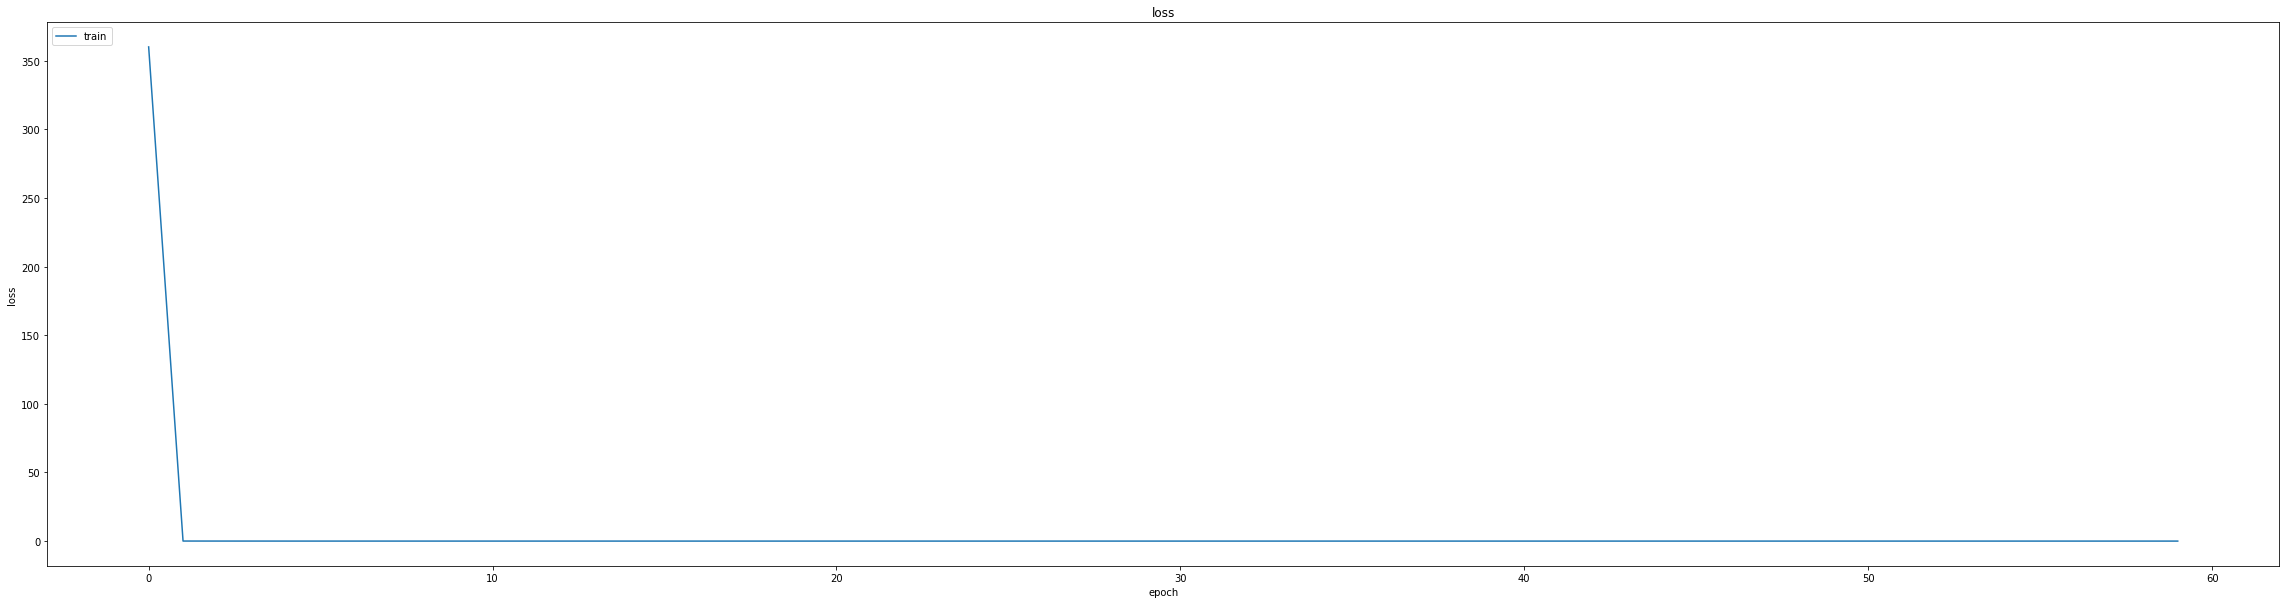

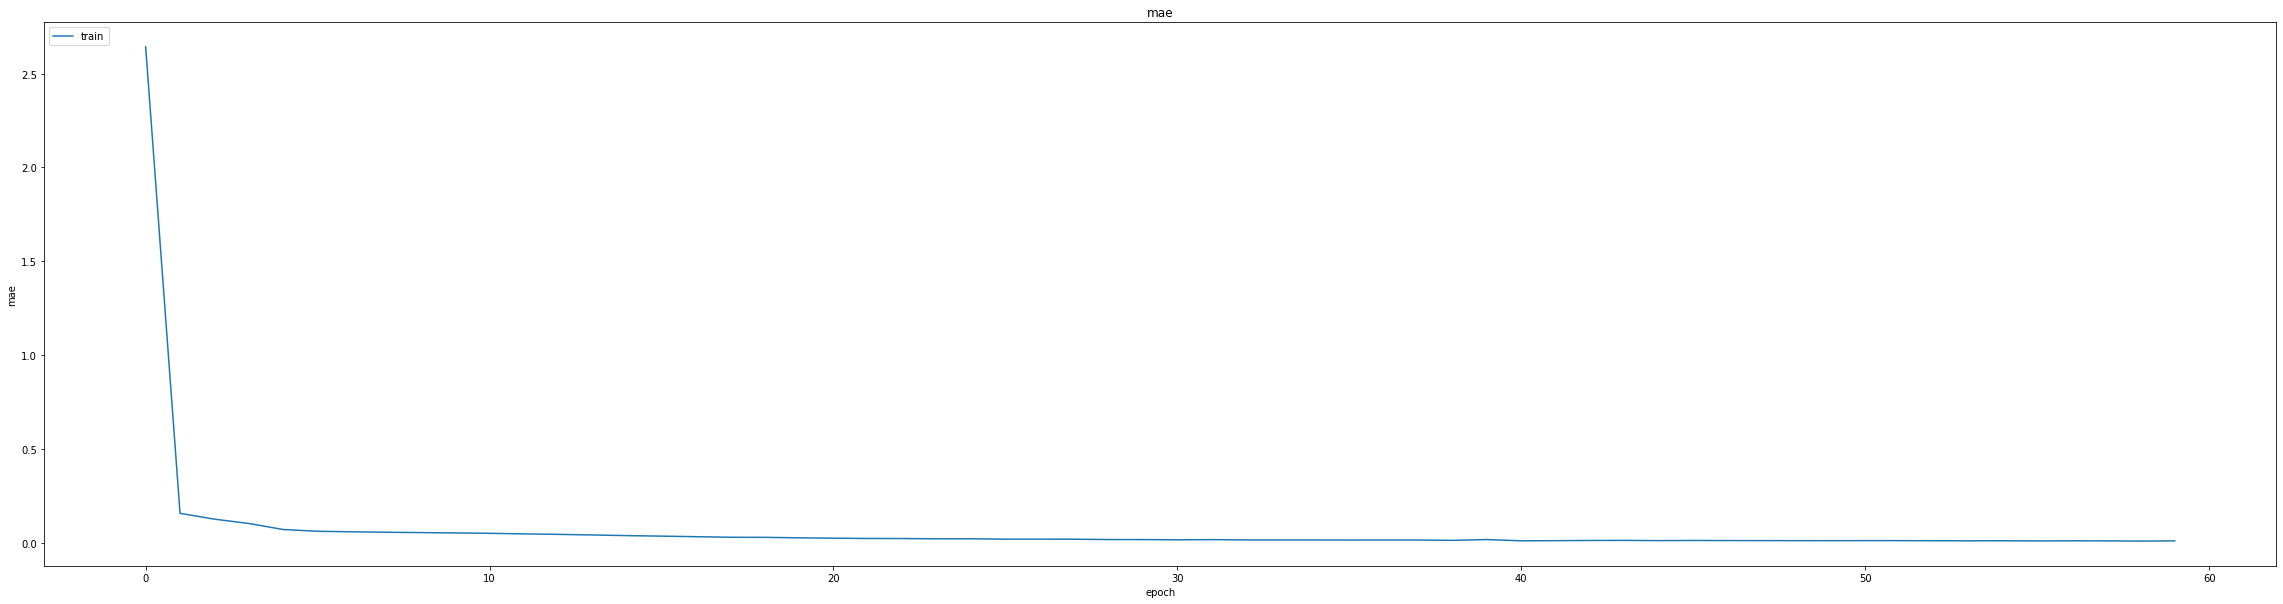

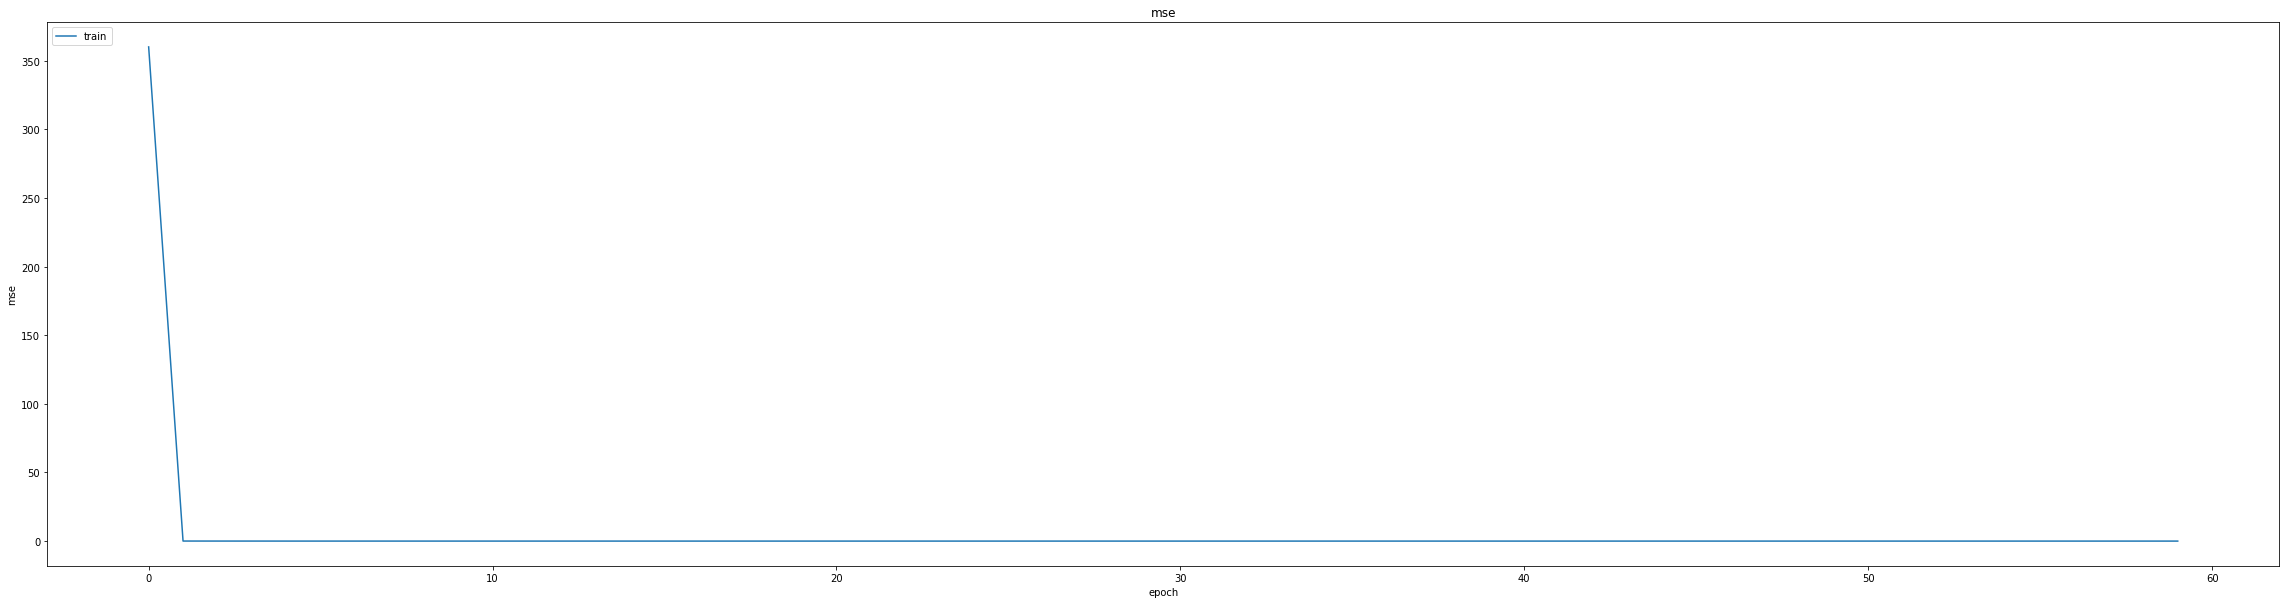

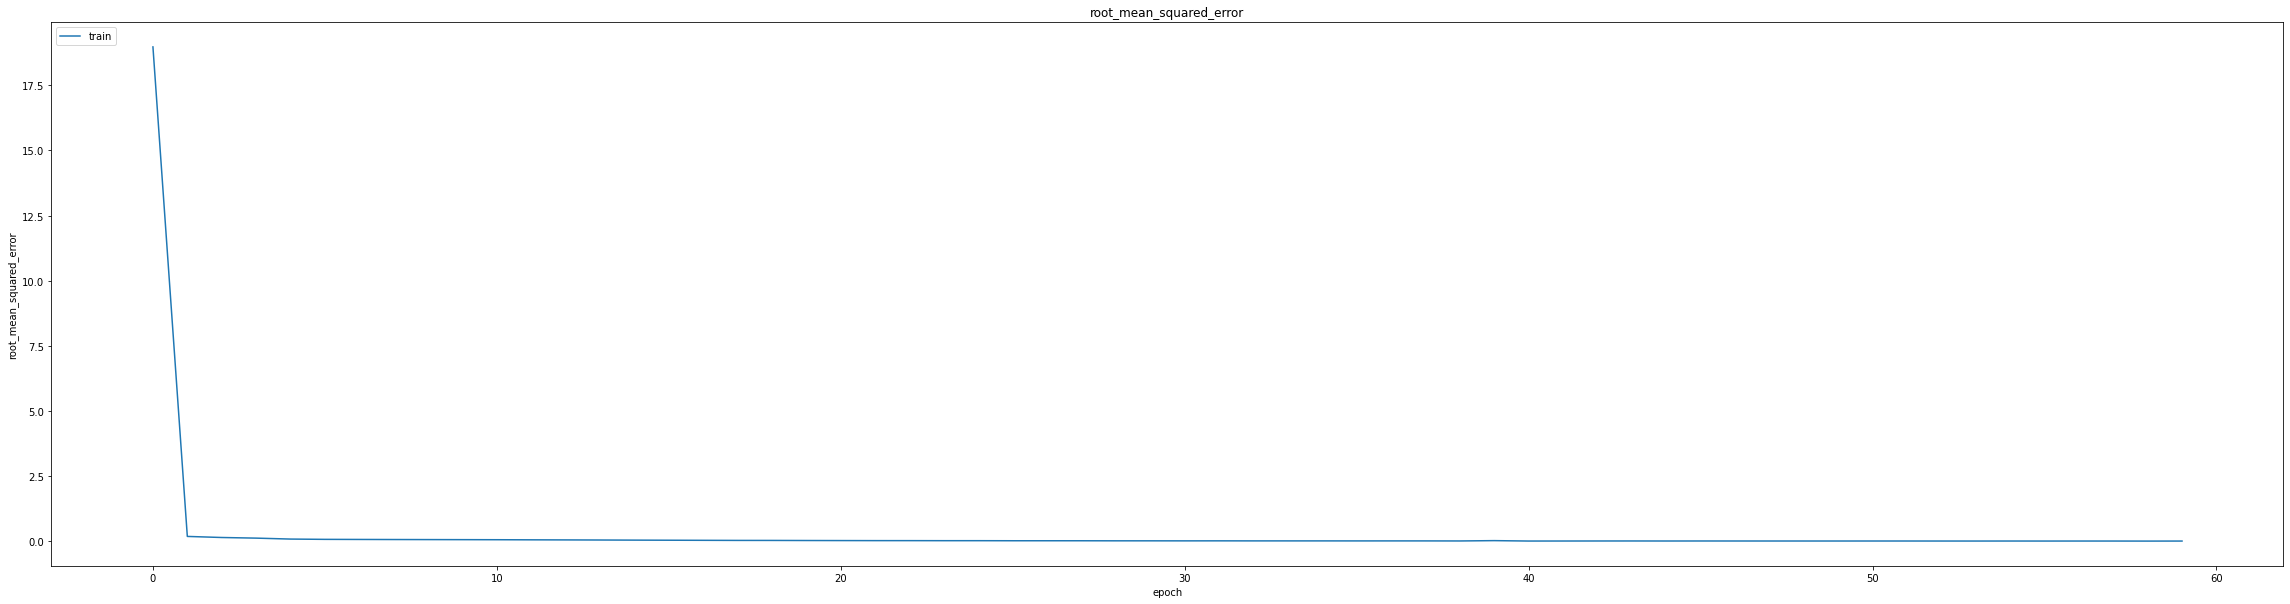

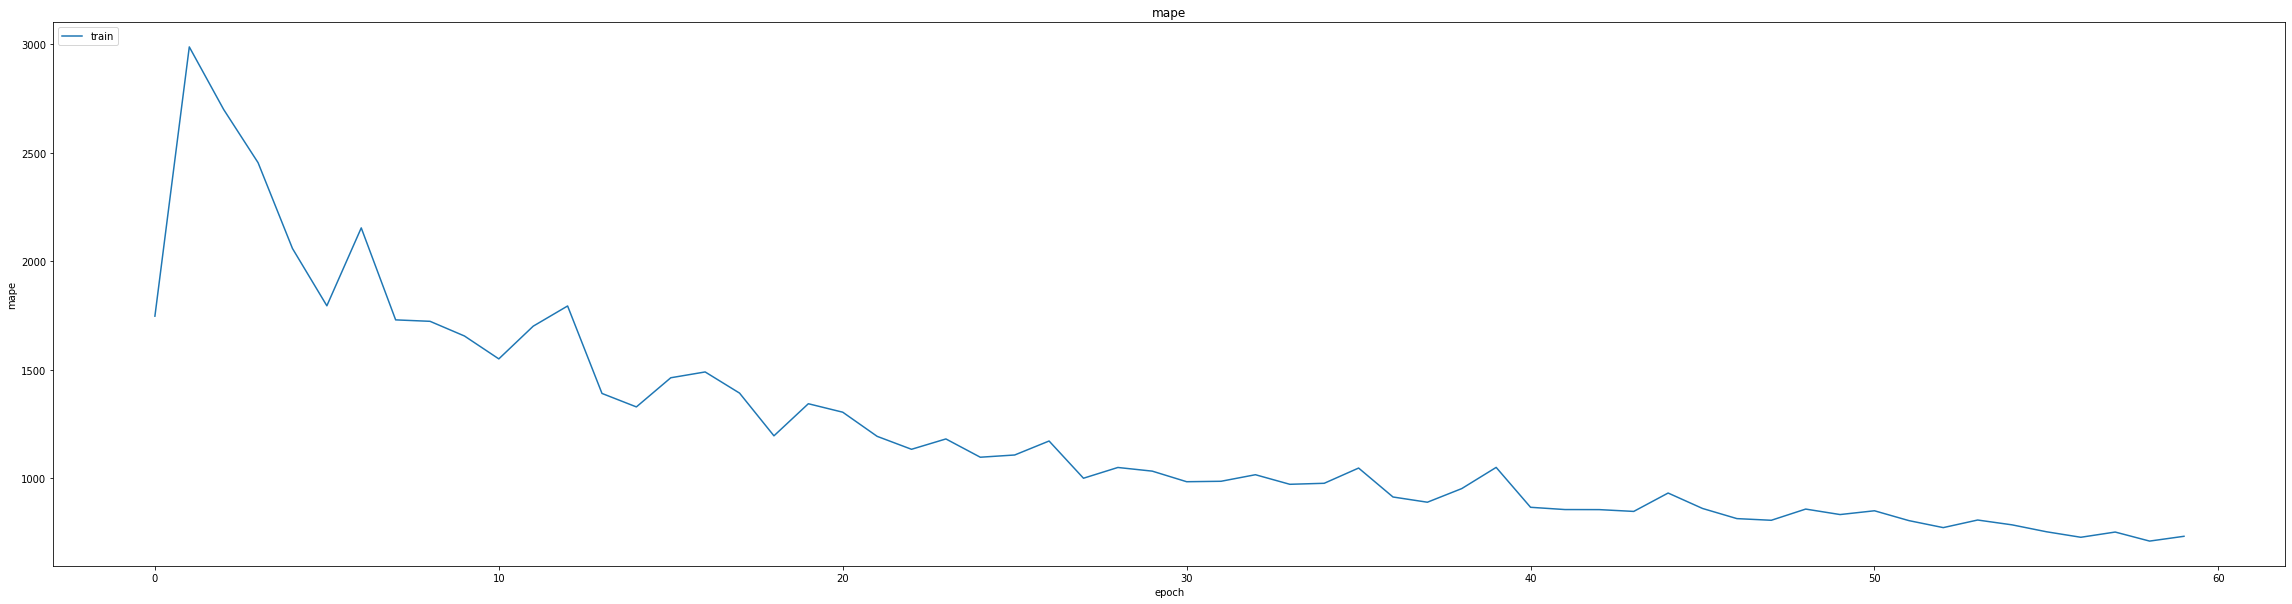

In [19]:
thesis.SummarizeHistory(history)

In [20]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01715201325714588
0.024608155712485313
1392/1392 [==============================] - 15s 9ms/step
0.9931622141678699


In [22]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [23]:
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
346/348 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0161 - mse: 0.0015 - root_mean_squared_error: 0.0389 - mape: 1100.4148
Epoch 1: val_mse did not improve from 0.00061
348/348 [==============================] - 21s 43ms/step - loss: 0.0015 - mae: 0.0161 - mse: 0.0015 - root_mean_squared_error: 0.0388 - mape: 1097.0592 - val_loss: 8.5445e-04 - val_mae: 0.0206 - val_mse: 8.5445e-04 - val_root_mean_squared_error: 0.0292 - val_mape: 2452.1711 - lr: 0.0010
Epoch 2/20
347/348 [============================>.] - ETA: 0s - loss: 5.9339e-05 - mae: 0.0059 - mse: 5.9339e-05 - root_mean_squared_error: 0.0077 - mape: 785.3982
Epoch 2: val_mse did not improve from 0.00061
348/348 [==============================] - 12s 34ms/step - loss: 5.9335e-05 - mae: 0.0059 - mse: 5.9335e-05 - root_mean_squared_error: 0.0077 - mape: 785.2632 - val_loss: 6.0765e-04 - val_mae: 0.0189 - val_mse: 6.0765e-04 - val_root_mean_squared_error: 0.0247 - val_mape: 2173.2610 - lr: 0.0010
lr c

348/348 [==============================] - 38s 110ms/step - loss: 5.1130e-05 - mae: 0.0054 - mse: 5.1130e-05 - root_mean_squared_error: 0.0072 - mape: 645.0561 - val_loss: 4.8066e-04 - val_mae: 0.0165 - val_mse: 4.8066e-04 - val_root_mean_squared_error: 0.0219 - val_mape: 2024.2146 - lr: 9.0000e-04
Epoch 4/20
347/348 [============================>.] - ETA: 0s - loss: 5.7925e-05 - mae: 0.0058 - mse: 5.7925e-05 - root_mean_squared_error: 0.0076 - mape: 604.4193
Epoch 4: val_mse did not improve from 0.00048
348/348 [==============================] - 12s 34ms/step - loss: 5.7920e-05 - mae: 0.0058 - mse: 5.7920e-05 - root_mean_squared_error: 0.0076 - mape: 604.3154 - val_loss: 6.2984e-04 - val_mae: 0.0223 - val_mse: 6.2984e-04 - val_root_mean_squared_error: 0.0251 - val_mape: 1747.1819 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
347/348 [============================>.] - ETA: 0s - loss: 6.6300e-05 - mae: 0.0062 - mse: 6.6300e-05 - root_mean_squared_error: 0.0081 - mape: 

348/348 [==============================] - 38s 108ms/step - loss: 7.2756e-05 - mae: 0.0064 - mse: 7.2756e-05 - root_mean_squared_error: 0.0085 - mape: 468.6952 - val_loss: 4.6541e-04 - val_mae: 0.0154 - val_mse: 4.6541e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 1379.2163 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/20
347/348 [============================>.] - ETA: 0s - loss: 3.5864e-05 - mae: 0.0046 - mse: 3.5864e-05 - root_mean_squared_error: 0.0060 - mape: 484.8421
Epoch 9: val_mse did not improve from 0.00047
348/348 [==============================] - 12s 33ms/step - loss: 3.5864e-05 - mae: 0.0046 - mse: 3.5864e-05 - root_mean_squared_error: 0.0060 - mape: 484.7589 - val_loss: 0.4828 - val_mae: 0.0372 - val_mse: 0.4828 - val_root_mean_squared_error: 0.6949 - val_mape: 1293.2189 - lr: 6.5610e-04
Epoch 10/20
347/348 [============================>.] - ETA: 0s - loss: 6.0174e-05 - mae: 0.0060 - mse: 6.0174e-05 - root_mean_squared_error: 0.0078 - mape: 470.421

348/348 [==============================] - 38s 108ms/step - loss: 3.3457e-05 - mae: 0.0044 - mse: 3.3457e-05 - root_mean_squared_error: 0.0058 - mape: 506.9384 - val_loss: 4.2634e-04 - val_mae: 0.0188 - val_mse: 4.2634e-04 - val_root_mean_squared_error: 0.0206 - val_mape: 1455.1208 - lr: 5.3144e-04
Epoch 14/20
347/348 [============================>.] - ETA: 0s - loss: 3.9420e-05 - mae: 0.0048 - mse: 3.9420e-05 - root_mean_squared_error: 0.0063 - mape: 511.9081
Epoch 14: val_mse did not improve from 0.00043
348/348 [==============================] - 12s 34ms/step - loss: 3.9416e-05 - mae: 0.0048 - mse: 3.9416e-05 - root_mean_squared_error: 0.0063 - mape: 511.8201 - val_loss: 6.6440e-04 - val_mae: 0.0228 - val_mse: 6.6440e-04 - val_root_mean_squared_error: 0.0258 - val_mape: 1340.8582 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/20
347/348 [============================>.] - ETA: 0s - loss: 2.7863e-05 - mae: 0.0040 - mse: 2.7863e-05 - root_mean_squared_error: 0.0053 - ma

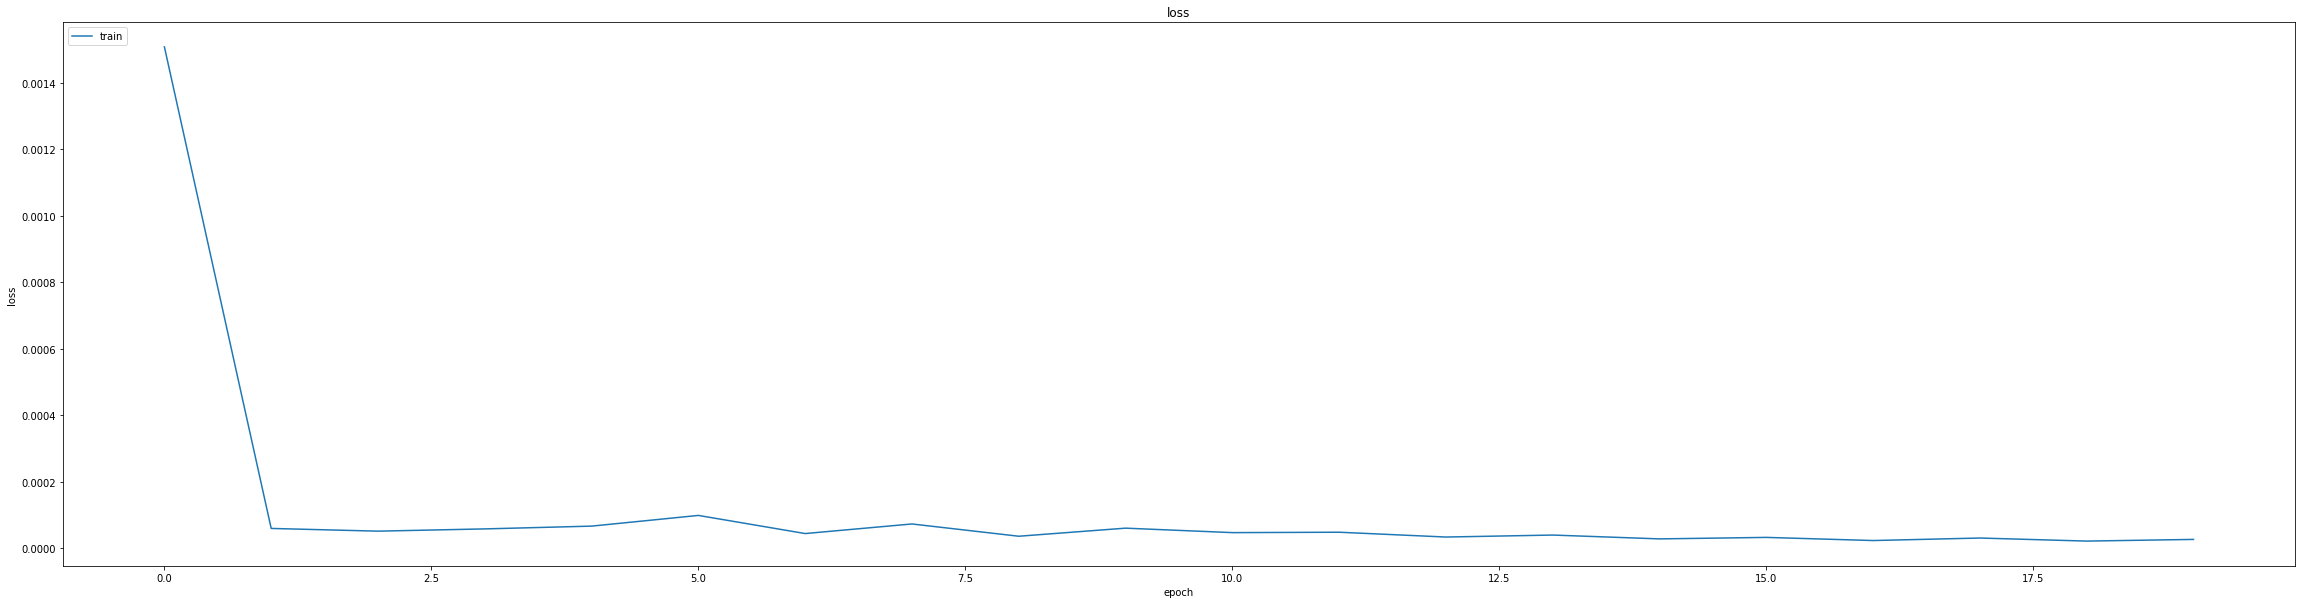

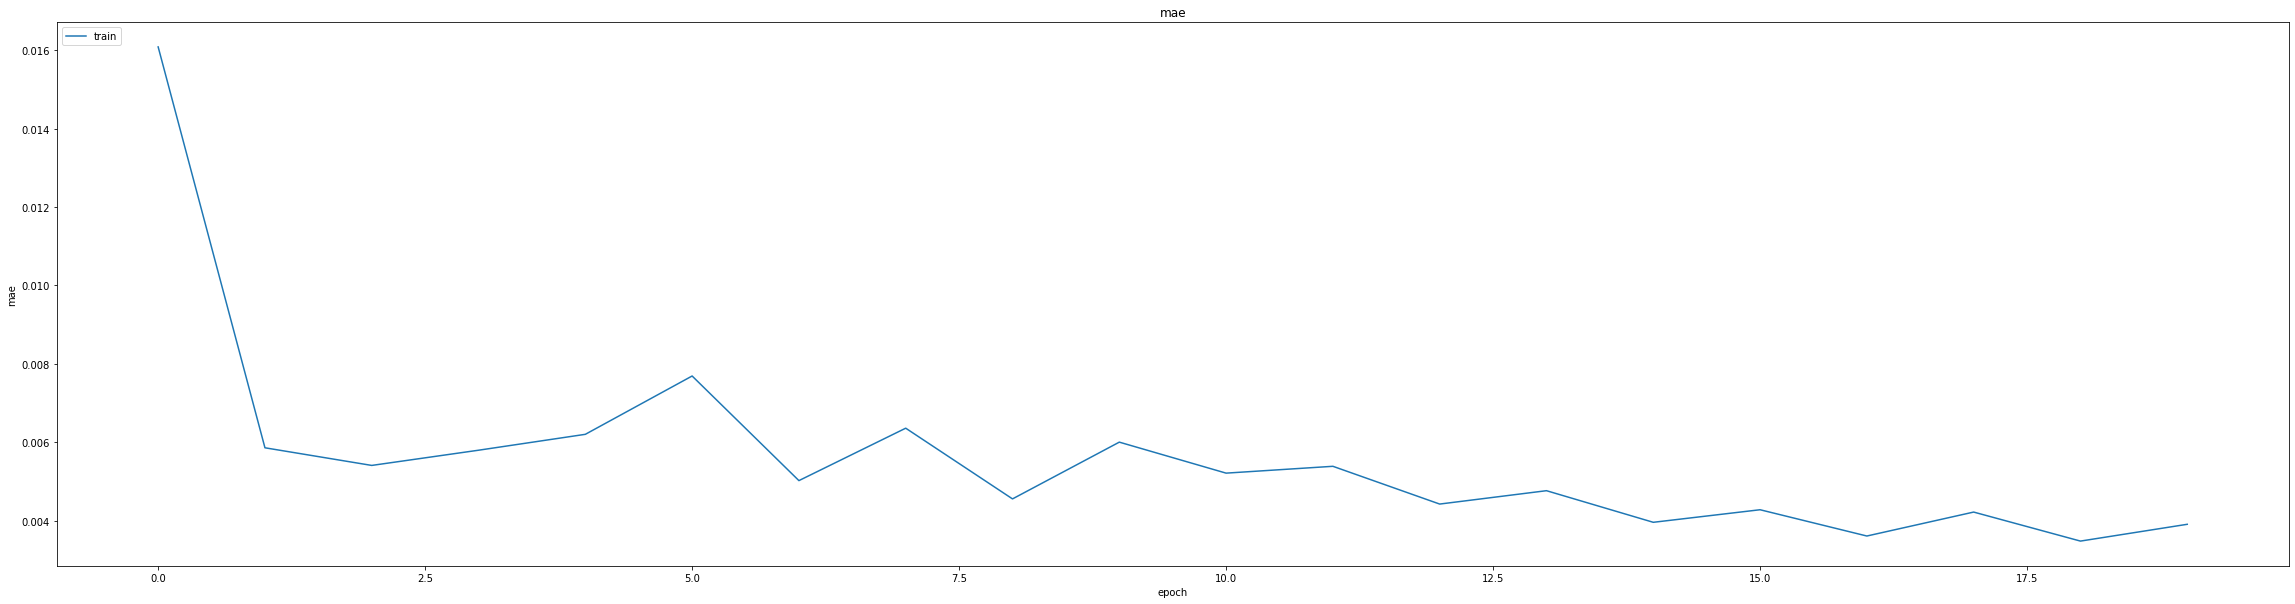

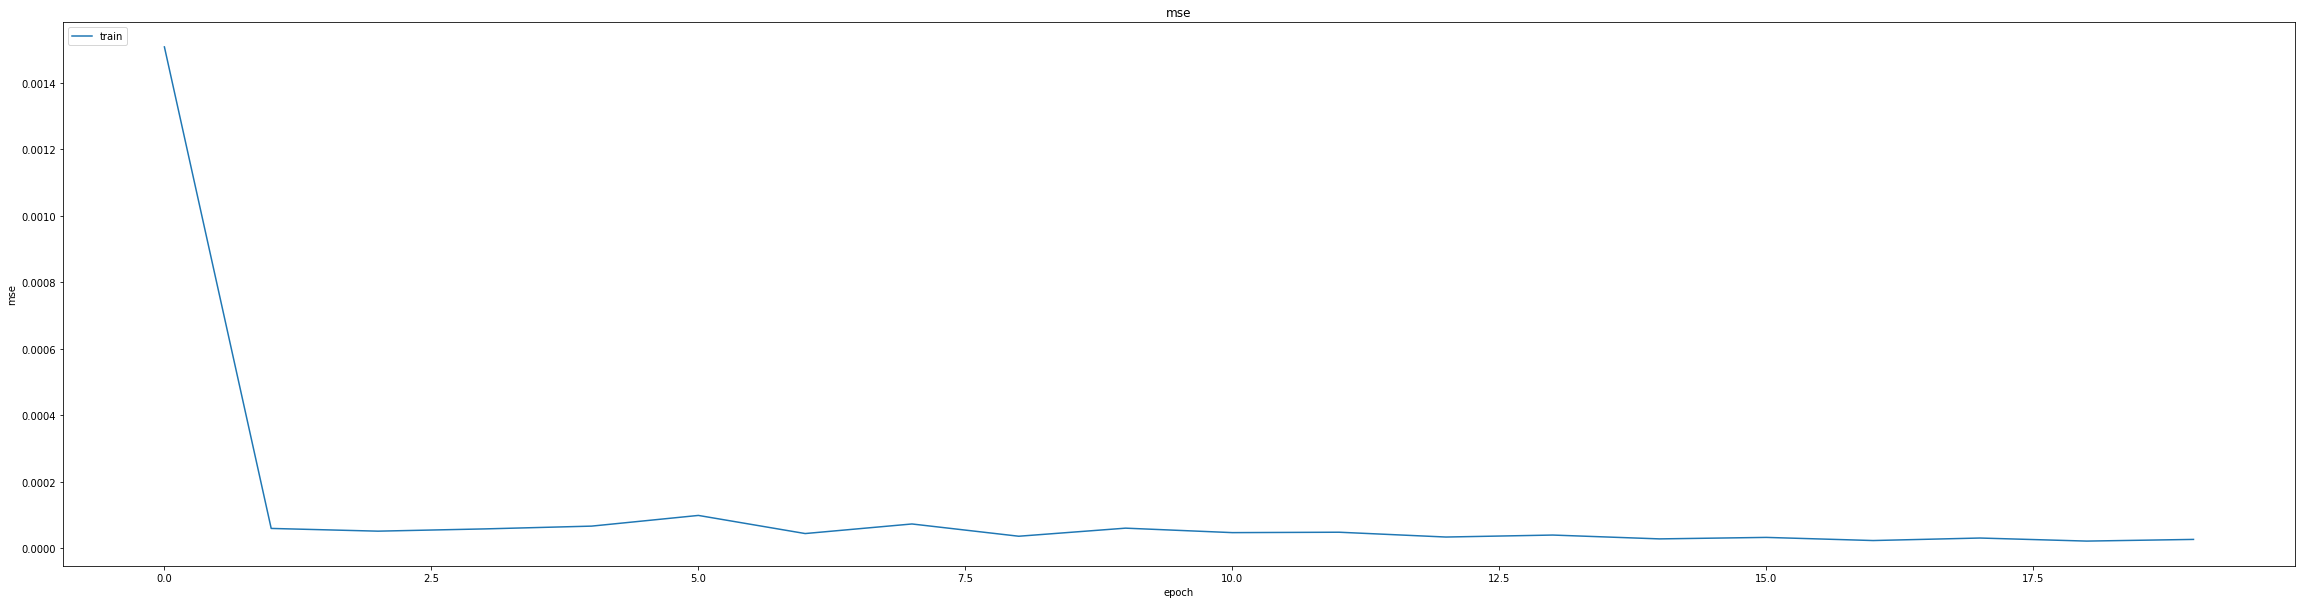

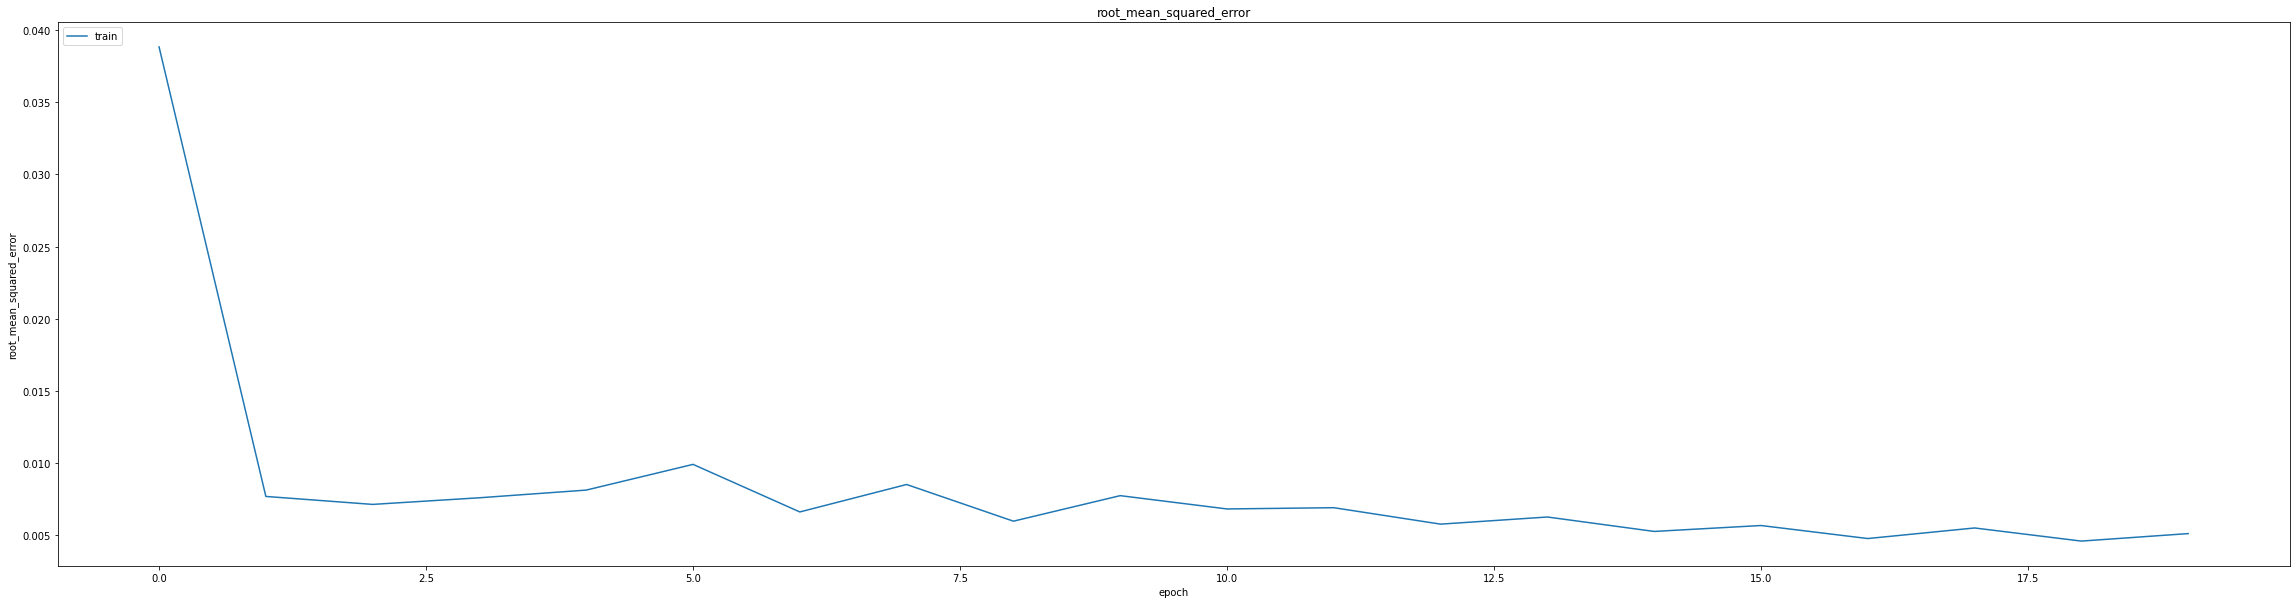

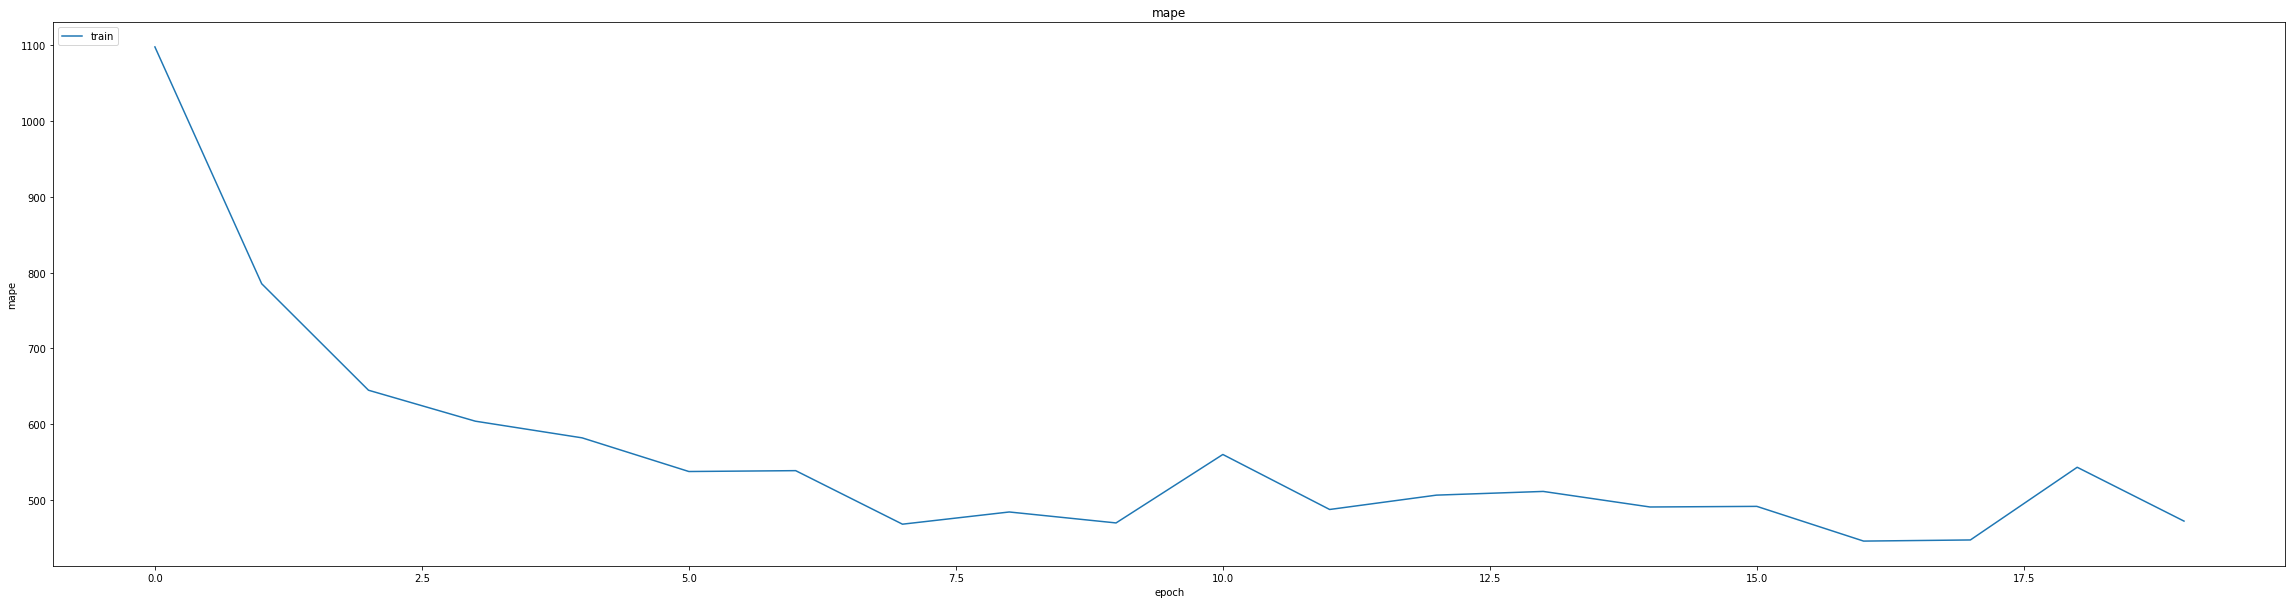

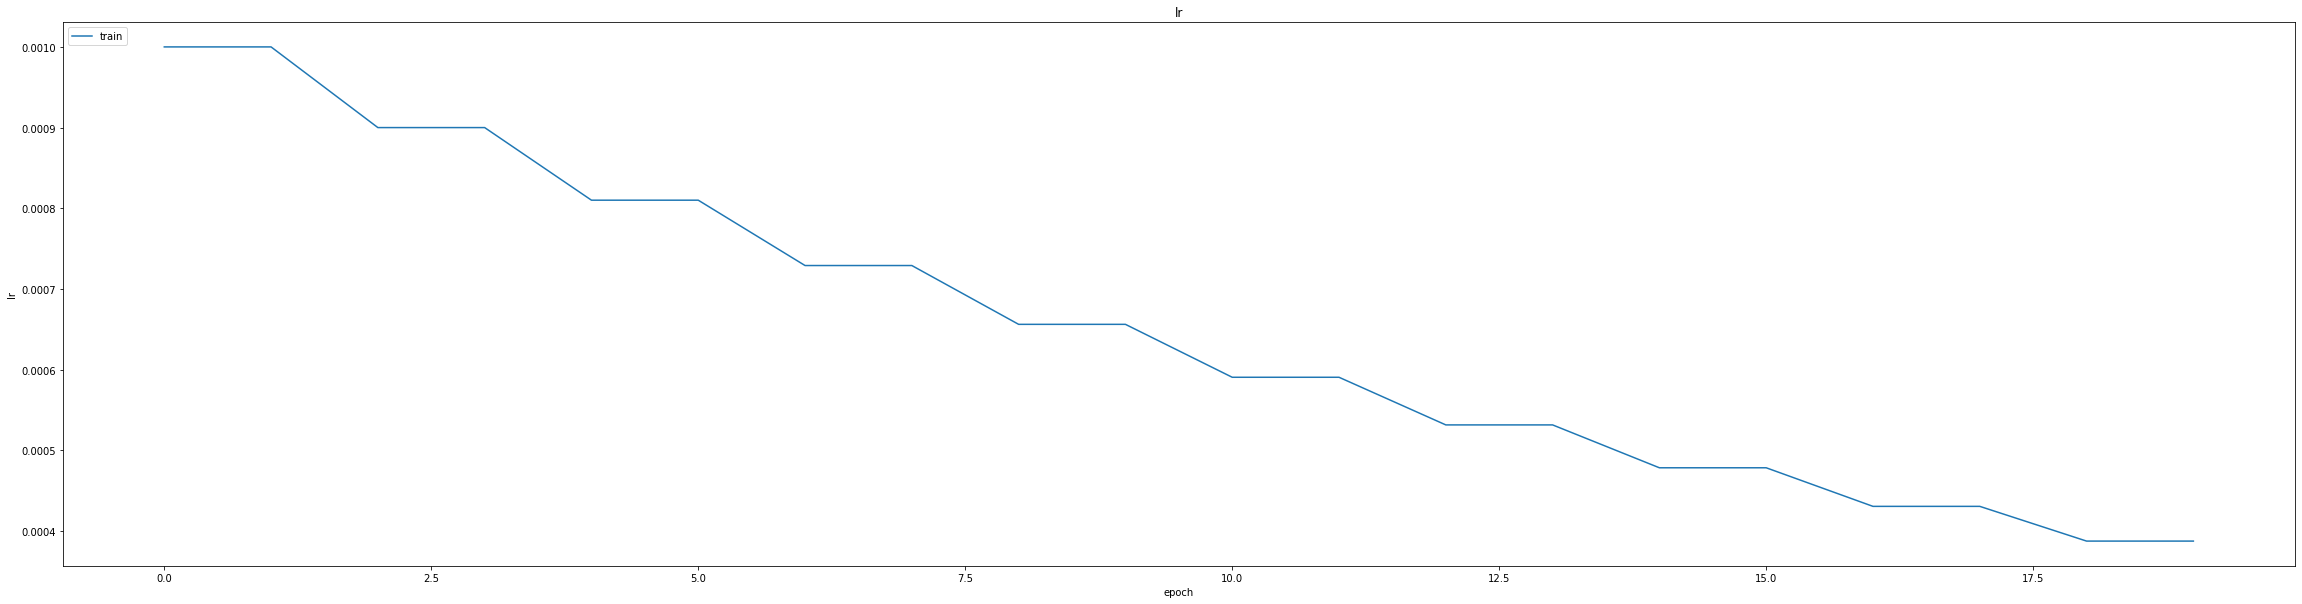

In [24]:
thesis.SummarizeHistory(history)

In [25]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.013698581606149673
0.020647965371608734
1392/1392 [==============================] - 10s 6ms/step
0.9917437535498265


1392/1392 [==============================] - 8s 6ms/step


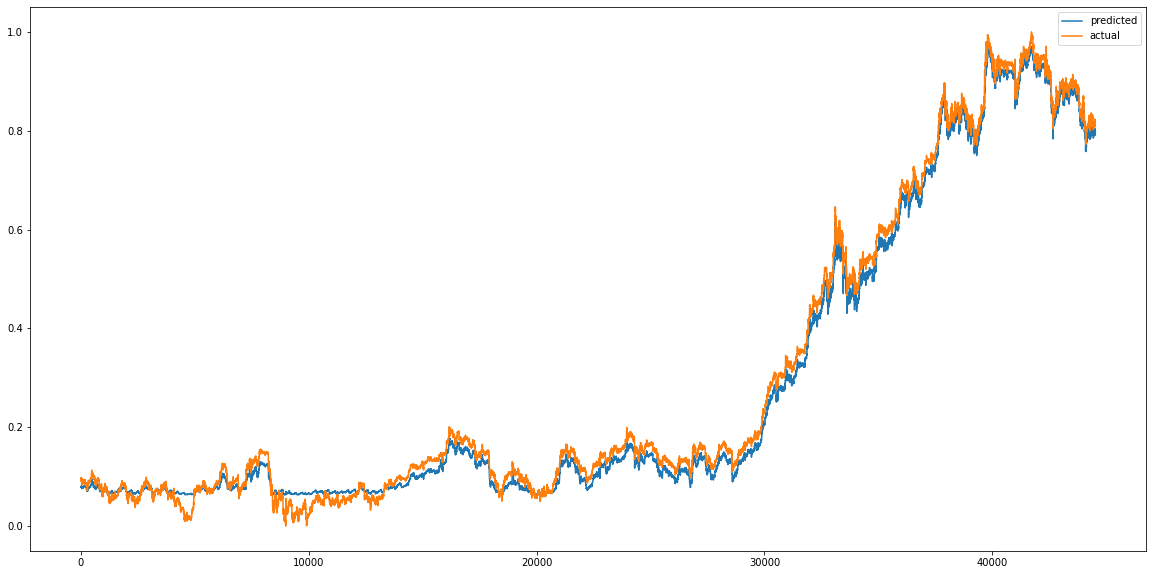

In [26]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


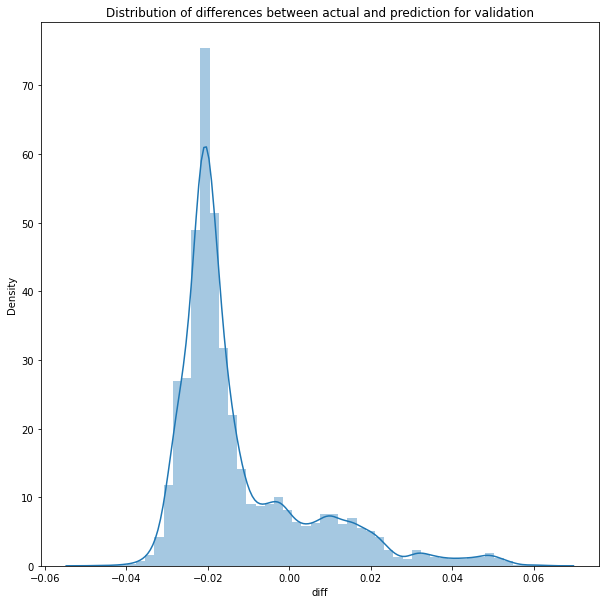

In [27]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1392/1392 [==============================] - 9s 6ms/step


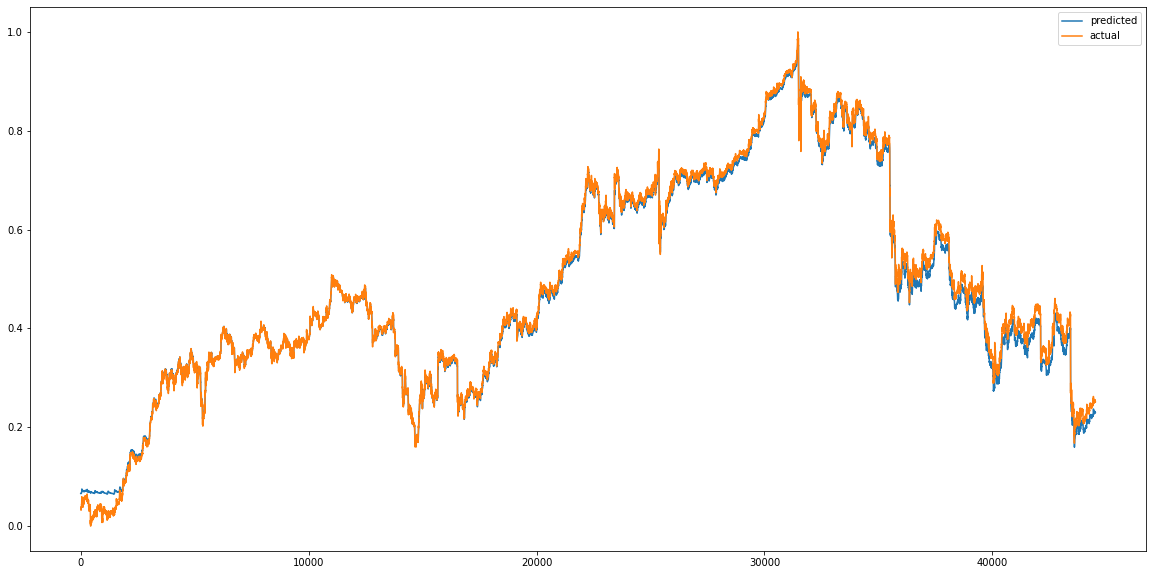

In [28]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


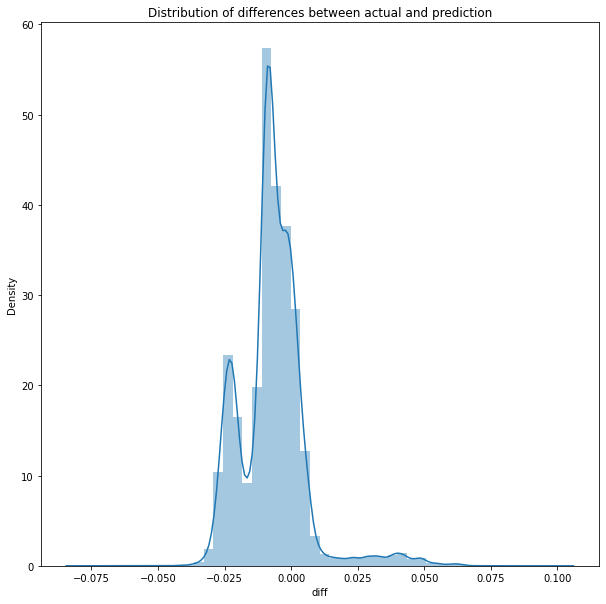

In [29]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00021061127531369768
RMSE :  0.014512452422443894
MAE :  0.010942079620985541
1392/1392 [==============================] - 8s 6ms/step
R2_Score  : 0.9955864477494702


count    44524.000000
mean        -0.007083
std          0.012667
min         -0.080015
25%         -0.012733
50%         -0.007490
75%         -0.001288
max          0.101557
Name: diff, dtype: float64

**GRU_LSTM_MODEL**

In [31]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 24, 32)            4416      
                                                                 
 lstm_2 (LSTM)               (None, 24, 256)           295936    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [32]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
345/348 [============================>.] - ETA: 0s - loss: 895.4369 - mae: 9.8077 - mse: 895.4369 - root_mean_squared_error: 29.9239 - mape: 24334.6816
Epoch 1: val_mse improved from inf to 1.83747, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 23s 54ms/step - loss: 890.1307 - mae: 9.7562 - mse: 890.1307 - root_mean_squared_error: 29.8351 - mape: 24192.0781 - val_loss: 1.8375 - val_mae: 1.3210 - val_mse: 1.8375 - val_root_mean_squared_error: 1.3555 - val_mape: 37740.7969
Epoch 2/60
347/348 [============================>.] - ETA: 0s - loss: 0.5876 - mae: 0.7187 - mse: 0.5876 - root_mean_squared_error: 0.7665 - mape: 8446.0244
Epoch 2: val_mse improved from 1.83747 to 0.48869, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 0.5875 - mae: 0.7187 - mse: 0.5875 - root_mean_squared_error: 0.7665 - mape: 8444.5977 - val_loss: 0.4887 - val_mae: 0.6317 - val_mse: 0.4887 - val_root_mean_squared_error: 0.6991 - val_mape: 21561.7930
Epoch 3/60
345/348 [============================>.] - ETA: 0s - loss: 0.1397 - mae: 0.3239 - mse: 0.1397 - root_mean_squared_error: 0.3737 - mape: 5446.4595
Epoch 3: val_mse improved from 0.48869 to 0.25508, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 0.1393 - mae: 0.3234 - mse: 0.1393 - root_mean_squared_error: 0.3733 - mape: 5414.6255 - val_loss: 0.2551 - val_mae: 0.4621 - val_mse: 0.2551 - val_root_mean_squared_error: 0.5051 - val_mape: 16275.1572
Epoch 4/60
347/348 [============================>.] - ETA: 0s - loss: 0.0606 - mae: 0.1932 - mse: 0.0606 - root_mean_squared_error: 0.2461 - mape: 5098.0229
Epoch 4: val_mse improved from 0.25508 to 0.18098, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 47ms/step - loss: 0.0606 - mae: 0.1932 - mse: 0.0606 - root_mean_squared_error: 0.2461 - mape: 5097.1562 - val_loss: 0.1810 - val_mae: 0.3973 - val_mse: 0.1810 - val_root_mean_squared_error: 0.4254 - val_mape: 13805.8701
Epoch 5/60
345/348 [============================>.] - ETA: 0s - loss: 0.0406 - mae: 0.1635 - mse: 0.0406 - root_mean_squared_error: 0.2015 - mape: 4312.8037
Epoch 5: val_mse improved from 0.18098 to 0.15079, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 50ms/step - loss: 0.0406 - mae: 0.1635 - mse: 0.0406 - root_mean_squared_error: 0.2014 - mape: 4287.5200 - val_loss: 0.1508 - val_mae: 0.3665 - val_mse: 0.1508 - val_root_mean_squared_error: 0.3883 - val_mape: 12498.3750
Epoch 6/60
346/348 [============================>.] - ETA: 0s - loss: 0.0351 - mae: 0.1581 - mse: 0.0351 - root_mean_squared_error: 0.1872 - mape: 4063.1577
Epoch 6: val_mse improved from 0.15079 to 0.13700, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 0.0350 - mae: 0.1581 - mse: 0.0350 - root_mean_squared_error: 0.1872 - mape: 4050.9009 - val_loss: 0.1370 - val_mae: 0.3509 - val_mse: 0.1370 - val_root_mean_squared_error: 0.3701 - val_mape: 11787.2529
Epoch 7/60
345/348 [============================>.] - ETA: 0s - loss: 0.0336 - mae: 0.1566 - mse: 0.0336 - root_mean_squared_error: 0.1833 - mape: 3816.2776
Epoch 7: val_mse improved from 0.13700 to 0.13054, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 0.0336 - mae: 0.1566 - mse: 0.0336 - root_mean_squared_error: 0.1833 - mape: 3793.8943 - val_loss: 0.1305 - val_mae: 0.3431 - val_mse: 0.1305 - val_root_mean_squared_error: 0.3613 - val_mape: 11416.0586
Epoch 8/60
345/348 [============================>.] - ETA: 0s - loss: 0.0333 - mae: 0.1563 - mse: 0.0333 - root_mean_squared_error: 0.1824 - mape: 3684.7292
Epoch 8: val_mse improved from 0.13054 to 0.12759, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 0.0333 - mae: 0.1563 - mse: 0.0333 - root_mean_squared_error: 0.1824 - mape: 3663.1438 - val_loss: 0.1276 - val_mae: 0.3395 - val_mse: 0.1276 - val_root_mean_squared_error: 0.3572 - val_mape: 11235.9336
Epoch 9/60
347/348 [============================>.] - ETA: 0s - loss: 0.0332 - mae: 0.1563 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3651.5442
Epoch 9: val_mse improved from 0.12759 to 0.12644, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 47ms/step - loss: 0.0332 - mae: 0.1563 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3650.9263 - val_loss: 0.1264 - val_mae: 0.3380 - val_mse: 0.1264 - val_root_mean_squared_error: 0.3556 - val_mape: 11163.6865
Epoch 10/60
347/348 [============================>.] - ETA: 0s - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3657.2678
Epoch 10: val_mse improved from 0.12644 to 0.12602, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3656.6484 - val_loss: 0.1260 - val_mae: 0.3375 - val_mse: 0.1260 - val_root_mean_squared_error: 0.3550 - val_mape: 11137.2891
Epoch 11/60
345/348 [============================>.] - ETA: 0s - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3645.4795
Epoch 11: val_mse improved from 0.12602 to 0.12583, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3624.1021 - val_loss: 0.1258 - val_mae: 0.3372 - val_mse: 0.1258 - val_root_mean_squared_error: 0.3547 - val_mape: 11125.0273
Epoch 12/60
345/348 [============================>.] - ETA: 0s - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3642.8669
Epoch 12: val_mse did not improve from 0.12583
348/348 [==============================] - 6s 18ms/step - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3621.5327 - val_loss: 0.1260 - val_mae: 0.3374 - val_mse: 0.1260 - val_root_mean_squared_error: 0.3549 - val_mape: 11132.8701
Epoch 13/60
347/348 [============================>.] - ETA: 0s - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3647.8020
Epoch 13: val_mse improved from 0.12583 to 0.12581, saving model to /content/drive/MyDrive/modelweight

348/348 [==============================] - 17s 50ms/step - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3647.1797 - val_loss: 0.1258 - val_mae: 0.3372 - val_mse: 0.1258 - val_root_mean_squared_error: 0.3547 - val_mape: 11124.1914
Epoch 14/60
345/348 [============================>.] - ETA: 0s - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1821 - mape: 3748.7559
Epoch 14: val_mse improved from 0.12581 to 0.12579, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3726.7898 - val_loss: 0.1258 - val_mae: 0.3372 - val_mse: 0.1258 - val_root_mean_squared_error: 0.3547 - val_mape: 11122.6963
Epoch 15/60
348/348 [==============================] - ETA: 0s - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3638.6868
Epoch 15: val_mse improved from 0.12579 to 0.12575, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3638.6868 - val_loss: 0.1258 - val_mae: 0.3371 - val_mse: 0.1258 - val_root_mean_squared_error: 0.3546 - val_mape: 11120.2227
Epoch 16/60
348/348 [==============================] - ETA: 0s - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3648.6826
Epoch 16: val_mse improved from 0.12575 to 0.12573, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3648.6826 - val_loss: 0.1257 - val_mae: 0.3371 - val_mse: 0.1257 - val_root_mean_squared_error: 0.3546 - val_mape: 11118.6729
Epoch 17/60
346/348 [============================>.] - ETA: 0s - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3667.5078
Epoch 17: val_mse did not improve from 0.12573
348/348 [==============================] - 6s 18ms/step - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3656.4604 - val_loss: 0.1261 - val_mae: 0.3376 - val_mse: 0.1261 - val_root_mean_squared_error: 0.3551 - val_mape: 11142.3096
Epoch 18/60
347/348 [============================>.] - ETA: 0s - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3630.7017
Epoch 18: val_mse did not improve from 0.12573
348/348 [==============================] - 6s 17ms/step

348/348 [==============================] - 17s 49ms/step - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3634.1504 - val_loss: 0.1256 - val_mae: 0.3369 - val_mse: 0.1256 - val_root_mean_squared_error: 0.3544 - val_mape: 11110.0166
Epoch 21/60
348/348 [==============================] - ETA: 0s - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3698.6526
Epoch 21: val_mse did not improve from 0.12559
348/348 [==============================] - 6s 17ms/step - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3698.6526 - val_loss: 0.1260 - val_mae: 0.3375 - val_mse: 0.1260 - val_root_mean_squared_error: 0.3550 - val_mape: 11137.0254
Epoch 22/60
348/348 [==============================] - ETA: 0s - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3655.2434
Epoch 22: val_mse improved from 0.12559 to 0.12546, saving model to /content/drive/MyDrive/modelweight

348/348 [==============================] - 17s 49ms/step - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3655.2434 - val_loss: 0.1255 - val_mae: 0.3368 - val_mse: 0.1255 - val_root_mean_squared_error: 0.3542 - val_mape: 11101.6436
Epoch 23/60
345/348 [============================>.] - ETA: 0s - loss: 0.0332 - mae: 0.1563 - mse: 0.0332 - root_mean_squared_error: 0.1821 - mape: 3659.5701
Epoch 23: val_mse did not improve from 0.12546
348/348 [==============================] - 6s 18ms/step - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3638.1577 - val_loss: 0.1257 - val_mae: 0.3371 - val_mse: 0.1257 - val_root_mean_squared_error: 0.3546 - val_mape: 11117.3828
Epoch 24/60
348/348 [==============================] - ETA: 0s - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3638.6570
Epoch 24: val_mse did not improve from 0.12546
348/348 [==============================] - 6s 17ms/step

348/348 [==============================] - 16s 47ms/step - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3630.3496 - val_loss: 0.1254 - val_mae: 0.3367 - val_mse: 0.1254 - val_root_mean_squared_error: 0.3541 - val_mape: 11098.7793
Epoch 26/60
347/348 [============================>.] - ETA: 0s - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3630.4800
Epoch 26: val_mse did not improve from 0.12542
348/348 [==============================] - 6s 18ms/step - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3629.8618 - val_loss: 0.1259 - val_mae: 0.3373 - val_mse: 0.1259 - val_root_mean_squared_error: 0.3548 - val_mape: 11128.8574
Epoch 27/60
347/348 [============================>.] - ETA: 0s - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3610.9084
Epoch 27: val_mse did not improve from 0.12542
348/348 [==============================] - 6s 17ms/step

348/348 [==============================] - 18s 52ms/step - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3674.1179 - val_loss: 0.1248 - val_mae: 0.3359 - val_mse: 0.1248 - val_root_mean_squared_error: 0.3533 - val_mape: 11058.7393
Epoch 29/60
348/348 [==============================] - ETA: 0s - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3654.1902
Epoch 29: val_mse did not improve from 0.12479
348/348 [==============================] - 6s 18ms/step - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3654.1902 - val_loss: 0.1262 - val_mae: 0.3377 - val_mse: 0.1262 - val_root_mean_squared_error: 0.3553 - val_mape: 11151.0322
Epoch 30/60
345/348 [============================>.] - ETA: 0s - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1821 - mape: 3676.9106
Epoch 30: val_mse did not improve from 0.12479
348/348 [==============================] - 6s 17ms/step

348/348 [==============================] - 17s 49ms/step - loss: 0.0332 - mae: 0.1563 - mse: 0.0332 - root_mean_squared_error: 0.1821 - mape: 3647.3579 - val_loss: 0.1246 - val_mae: 0.3356 - val_mse: 0.1246 - val_root_mean_squared_error: 0.3529 - val_mape: 11050.7461
Epoch 35/60
347/348 [============================>.] - ETA: 0s - loss: 0.0330 - mae: 0.1558 - mse: 0.0330 - root_mean_squared_error: 0.1815 - mape: 3607.0471
Epoch 35: val_mse improved from 0.12457 to 0.11778, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 50ms/step - loss: 0.0330 - mae: 0.1558 - mse: 0.0330 - root_mean_squared_error: 0.1815 - mape: 3606.4343 - val_loss: 0.1178 - val_mae: 0.3264 - val_mse: 0.1178 - val_root_mean_squared_error: 0.3432 - val_mape: 10695.4775
Epoch 36/60
347/348 [============================>.] - ETA: 0s - loss: 0.0186 - mae: 0.1080 - mse: 0.0186 - root_mean_squared_error: 0.1362 - mape: 3084.5190
Epoch 36: val_mse improved from 0.11778 to 0.03992, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 0.0186 - mae: 0.1080 - mse: 0.0186 - root_mean_squared_error: 0.1362 - mape: 3083.9924 - val_loss: 0.0399 - val_mae: 0.1854 - val_mse: 0.0399 - val_root_mean_squared_error: 0.1998 - val_mape: 7161.9043
Epoch 37/60
345/348 [============================>.] - ETA: 0s - loss: 0.0037 - mae: 0.0440 - mse: 0.0037 - root_mean_squared_error: 0.0606 - mape: 2318.4175
Epoch 37: val_mse improved from 0.03992 to 0.01827, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 0.0037 - mae: 0.0439 - mse: 0.0037 - root_mean_squared_error: 0.0605 - mape: 2304.7244 - val_loss: 0.0183 - val_mae: 0.1198 - val_mse: 0.0183 - val_root_mean_squared_error: 0.1352 - val_mape: 5607.1436
Epoch 38/60
348/348 [==============================] - ETA: 0s - loss: 0.0016 - mae: 0.0297 - mse: 0.0016 - root_mean_squared_error: 0.0402 - mape: 1853.9805
Epoch 38: val_mse improved from 0.01827 to 0.01145, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 47ms/step - loss: 0.0016 - mae: 0.0297 - mse: 0.0016 - root_mean_squared_error: 0.0402 - mape: 1853.9805 - val_loss: 0.0114 - val_mae: 0.0934 - val_mse: 0.0114 - val_root_mean_squared_error: 0.1070 - val_mape: 4885.8652
Epoch 39/60
348/348 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0234 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 1494.8500
Epoch 39: val_mse improved from 0.01145 to 0.00880, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 50ms/step - loss: 0.0010 - mae: 0.0234 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 1494.8500 - val_loss: 0.0088 - val_mae: 0.0793 - val_mse: 0.0088 - val_root_mean_squared_error: 0.0938 - val_mape: 4562.5947
Epoch 40/60
348/348 [==============================] - ETA: 0s - loss: 7.5851e-04 - mae: 0.0205 - mse: 7.5851e-04 - root_mean_squared_error: 0.0275 - mape: 1492.1451
Epoch 40: val_mse improved from 0.00880 to 0.00760, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 7.5851e-04 - mae: 0.0205 - mse: 7.5851e-04 - root_mean_squared_error: 0.0275 - mape: 1492.1451 - val_loss: 0.0076 - val_mae: 0.0758 - val_mse: 0.0076 - val_root_mean_squared_error: 0.0872 - val_mape: 4378.6987
Epoch 41/60
346/348 [============================>.] - ETA: 0s - loss: 6.0177e-04 - mae: 0.0184 - mse: 6.0177e-04 - root_mean_squared_error: 0.0245 - mape: 1391.3627
Epoch 41: val_mse improved from 0.00760 to 0.00629, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 6.0206e-04 - mae: 0.0184 - mse: 6.0206e-04 - root_mean_squared_error: 0.0245 - mape: 1387.1292 - val_loss: 0.0063 - val_mae: 0.0663 - val_mse: 0.0063 - val_root_mean_squared_error: 0.0793 - val_mape: 4212.1577
Epoch 42/60
347/348 [============================>.] - ETA: 0s - loss: 4.8396e-04 - mae: 0.0166 - mse: 4.8396e-04 - root_mean_squared_error: 0.0220 - mape: 1368.7694
Epoch 42: val_mse improved from 0.00629 to 0.00524, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 48ms/step - loss: 4.8396e-04 - mae: 0.0166 - mse: 4.8396e-04 - root_mean_squared_error: 0.0220 - mape: 1368.5344 - val_loss: 0.0052 - val_mae: 0.0568 - val_mse: 0.0052 - val_root_mean_squared_error: 0.0724 - val_mape: 4061.3916
Epoch 43/60
345/348 [============================>.] - ETA: 0s - loss: 4.1057e-04 - mae: 0.0153 - mse: 4.1057e-04 - root_mean_squared_error: 0.0203 - mape: 1313.9515
Epoch 43: val_mse improved from 0.00524 to 0.00469, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 4.1010e-04 - mae: 0.0153 - mse: 4.1010e-04 - root_mean_squared_error: 0.0203 - mape: 1306.1761 - val_loss: 0.0047 - val_mae: 0.0529 - val_mse: 0.0047 - val_root_mean_squared_error: 0.0685 - val_mape: 3935.1243
Epoch 44/60
348/348 [==============================] - ETA: 0s - loss: 3.5329e-04 - mae: 0.0142 - mse: 3.5329e-04 - root_mean_squared_error: 0.0188 - mape: 1255.6544
Epoch 44: val_mse improved from 0.00469 to 0.00424, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 3.5329e-04 - mae: 0.0142 - mse: 3.5329e-04 - root_mean_squared_error: 0.0188 - mape: 1255.6544 - val_loss: 0.0042 - val_mae: 0.0505 - val_mse: 0.0042 - val_root_mean_squared_error: 0.0651 - val_mape: 3822.4866
Epoch 45/60
347/348 [============================>.] - ETA: 0s - loss: 3.2233e-04 - mae: 0.0136 - mse: 3.2233e-04 - root_mean_squared_error: 0.0180 - mape: 1249.5177
Epoch 45: val_mse improved from 0.00424 to 0.00387, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 3.2234e-04 - mae: 0.0136 - mse: 3.2234e-04 - root_mean_squared_error: 0.0180 - mape: 1249.3032 - val_loss: 0.0039 - val_mae: 0.0470 - val_mse: 0.0039 - val_root_mean_squared_error: 0.0622 - val_mape: 3732.4871
Epoch 46/60
345/348 [============================>.] - ETA: 0s - loss: 2.8066e-04 - mae: 0.0126 - mse: 2.8066e-04 - root_mean_squared_error: 0.0168 - mape: 1228.7954
Epoch 46: val_mse improved from 0.00387 to 0.00345, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 2.8101e-04 - mae: 0.0126 - mse: 2.8101e-04 - root_mean_squared_error: 0.0168 - mape: 1221.5233 - val_loss: 0.0034 - val_mae: 0.0442 - val_mse: 0.0034 - val_root_mean_squared_error: 0.0587 - val_mape: 3615.7314
Epoch 47/60
346/348 [============================>.] - ETA: 0s - loss: 2.6332e-04 - mae: 0.0123 - mse: 2.6332e-04 - root_mean_squared_error: 0.0162 - mape: 1197.6201
Epoch 47: val_mse improved from 0.00345 to 0.00308, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 28s 82ms/step - loss: 2.6318e-04 - mae: 0.0123 - mse: 2.6318e-04 - root_mean_squared_error: 0.0162 - mape: 1193.9719 - val_loss: 0.0031 - val_mae: 0.0413 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0555 - val_mape: 3500.8049
Epoch 48/60
346/348 [============================>.] - ETA: 0s - loss: 2.3865e-04 - mae: 0.0116 - mse: 2.3865e-04 - root_mean_squared_error: 0.0154 - mape: 1182.2091
Epoch 48: val_mse improved from 0.00308 to 0.00286, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 18s 53ms/step - loss: 2.3846e-04 - mae: 0.0116 - mse: 2.3846e-04 - root_mean_squared_error: 0.0154 - mape: 1178.6077 - val_loss: 0.0029 - val_mae: 0.0393 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0535 - val_mape: 3425.5276
Epoch 49/60
347/348 [============================>.] - ETA: 0s - loss: 2.1845e-04 - mae: 0.0111 - mse: 2.1845e-04 - root_mean_squared_error: 0.0148 - mape: 1091.1986
Epoch 49: val_mse improved from 0.00286 to 0.00257, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 19s 54ms/step - loss: 2.1843e-04 - mae: 0.0111 - mse: 2.1843e-04 - root_mean_squared_error: 0.0148 - mape: 1091.0112 - val_loss: 0.0026 - val_mae: 0.0369 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0507 - val_mape: 3332.9514
Epoch 50/60
346/348 [============================>.] - ETA: 0s - loss: 2.1017e-04 - mae: 0.0108 - mse: 2.1017e-04 - root_mean_squared_error: 0.0145 - mape: 1120.1213
Epoch 50: val_mse improved from 0.00257 to 0.00244, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 19s 54ms/step - loss: 2.1013e-04 - mae: 0.0108 - mse: 2.1013e-04 - root_mean_squared_error: 0.0145 - mape: 1116.7101 - val_loss: 0.0024 - val_mae: 0.0348 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0494 - val_mape: 3296.4417
Epoch 51/60
346/348 [============================>.] - ETA: 0s - loss: 2.0005e-04 - mae: 0.0106 - mse: 2.0005e-04 - root_mean_squared_error: 0.0141 - mape: 1071.9198
Epoch 51: val_mse improved from 0.00244 to 0.00228, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 20s 57ms/step - loss: 2.0012e-04 - mae: 0.0106 - mse: 2.0012e-04 - root_mean_squared_error: 0.0141 - mape: 1068.6553 - val_loss: 0.0023 - val_mae: 0.0362 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0478 - val_mape: 3190.5181
Epoch 52/60
348/348 [==============================] - ETA: 0s - loss: 1.6813e-04 - mae: 0.0097 - mse: 1.6813e-04 - root_mean_squared_error: 0.0130 - mape: 1025.6560
Epoch 52: val_mse improved from 0.00228 to 0.00208, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 19s 54ms/step - loss: 1.6813e-04 - mae: 0.0097 - mse: 1.6813e-04 - root_mean_squared_error: 0.0130 - mape: 1025.6560 - val_loss: 0.0021 - val_mae: 0.0331 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0456 - val_mape: 3133.3010
Epoch 53/60
345/348 [============================>.] - ETA: 0s - loss: 1.6483e-04 - mae: 0.0096 - mse: 1.6483e-04 - root_mean_squared_error: 0.0128 - mape: 1029.9899
Epoch 53: val_mse did not improve from 0.00208
348/348 [==============================] - 7s 21ms/step - loss: 1.6462e-04 - mae: 0.0096 - mse: 1.6462e-04 - root_mean_squared_error: 0.0128 - mape: 1023.8915 - val_loss: 0.0022 - val_mae: 0.0361 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0465 - val_mape: 3115.9380
Epoch 54/60
348/348 [==============================] - ETA: 0s - loss: 1.7591e-04 - mae: 0.0100 - mse: 1.7591e-04 - root_mean_squared_error: 0.0133 - mape: 999.3617 
Epoch 54: val_mse improved from 0.00208 to 0.00189, saving model to /con

348/348 [==============================] - 18s 52ms/step - loss: 1.7591e-04 - mae: 0.0100 - mse: 1.7591e-04 - root_mean_squared_error: 0.0133 - mape: 999.3617 - val_loss: 0.0019 - val_mae: 0.0323 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0435 - val_mape: 3034.5630
Epoch 55/60
345/348 [============================>.] - ETA: 0s - loss: 1.4057e-04 - mae: 0.0089 - mse: 1.4057e-04 - root_mean_squared_error: 0.0119 - mape: 1017.0465
Epoch 55: val_mse improved from 0.00189 to 0.00173, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 50ms/step - loss: 1.4045e-04 - mae: 0.0089 - mse: 1.4045e-04 - root_mean_squared_error: 0.0119 - mape: 1011.0247 - val_loss: 0.0017 - val_mae: 0.0298 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0416 - val_mape: 2983.7458
Epoch 56/60
348/348 [==============================] - ETA: 0s - loss: 1.3928e-04 - mae: 0.0089 - mse: 1.3928e-04 - root_mean_squared_error: 0.0118 - mape: 986.4866
Epoch 56: val_mse did not improve from 0.00173
348/348 [==============================] - 6s 18ms/step - loss: 1.3928e-04 - mae: 0.0089 - mse: 1.3928e-04 - root_mean_squared_error: 0.0118 - mape: 986.4866 - val_loss: 0.0017 - val_mae: 0.0320 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0417 - val_mape: 2947.9290
Epoch 57/60
347/348 [============================>.] - ETA: 0s - loss: 1.3375e-04 - mae: 0.0087 - mse: 1.3375e-04 - root_mean_squared_error: 0.0116 - mape: 982.1313
Epoch 57: val_mse improved from 0.00173 to 0.00163, saving model to /conten

348/348 [==============================] - 17s 49ms/step - loss: 1.3374e-04 - mae: 0.0087 - mse: 1.3374e-04 - root_mean_squared_error: 0.0116 - mape: 981.9626 - val_loss: 0.0016 - val_mae: 0.0314 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0404 - val_mape: 2875.3245
Epoch 58/60
348/348 [==============================] - ETA: 0s - loss: 1.3529e-04 - mae: 0.0087 - mse: 1.3529e-04 - root_mean_squared_error: 0.0116 - mape: 953.1630
Epoch 58: val_mse improved from 0.00163 to 0.00151, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 19s 53ms/step - loss: 1.3529e-04 - mae: 0.0087 - mse: 1.3529e-04 - root_mean_squared_error: 0.0116 - mape: 953.1630 - val_loss: 0.0015 - val_mae: 0.0291 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0388 - val_mape: 2852.3921
Epoch 59/60
347/348 [============================>.] - ETA: 0s - loss: 1.2217e-04 - mae: 0.0083 - mse: 1.2217e-04 - root_mean_squared_error: 0.0111 - mape: 930.2976
Epoch 59: val_mse did not improve from 0.00151
348/348 [==============================] - 6s 18ms/step - loss: 1.2219e-04 - mae: 0.0083 - mse: 1.2219e-04 - root_mean_squared_error: 0.0111 - mape: 930.1379 - val_loss: 0.0016 - val_mae: 0.0304 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0394 - val_mape: 2845.4048
Epoch 60/60
347/348 [============================>.] - ETA: 0s - loss: 1.1884e-04 - mae: 0.0082 - mse: 1.1884e-04 - root_mean_squared_error: 0.0109 - mape: 943.6390
Epoch 60: val_mse improved from 0.00151 to 0.00139, saving model to /content

348/348 [==============================] - 17s 49ms/step - loss: 1.1883e-04 - mae: 0.0082 - mse: 1.1883e-04 - root_mean_squared_error: 0.0109 - mape: 943.4768 - val_loss: 0.0014 - val_mae: 0.0269 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0372 - val_mape: 2793.9834


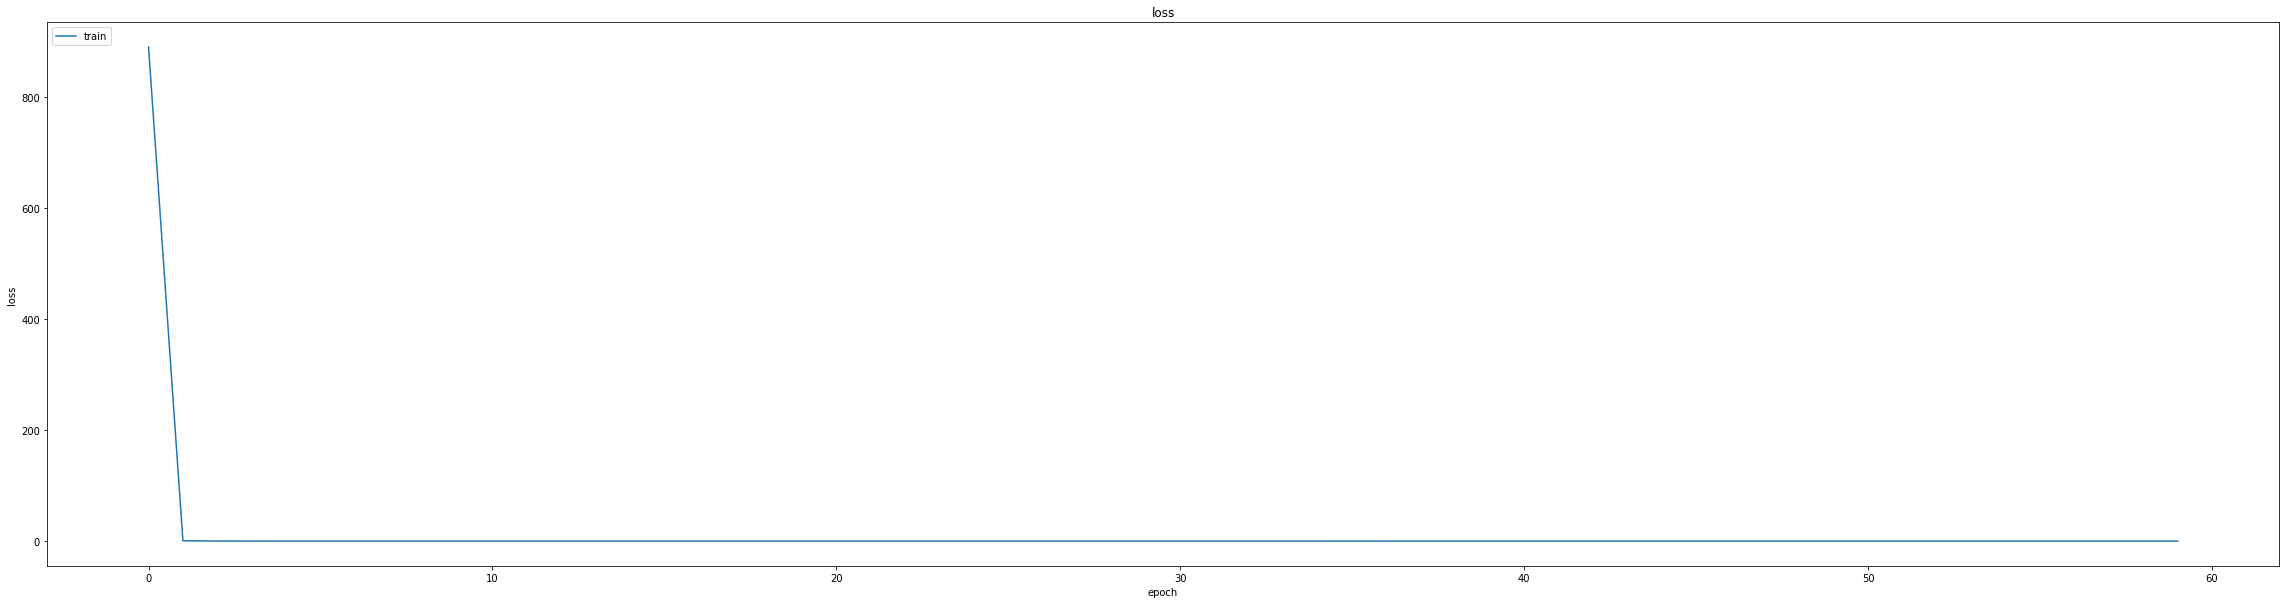

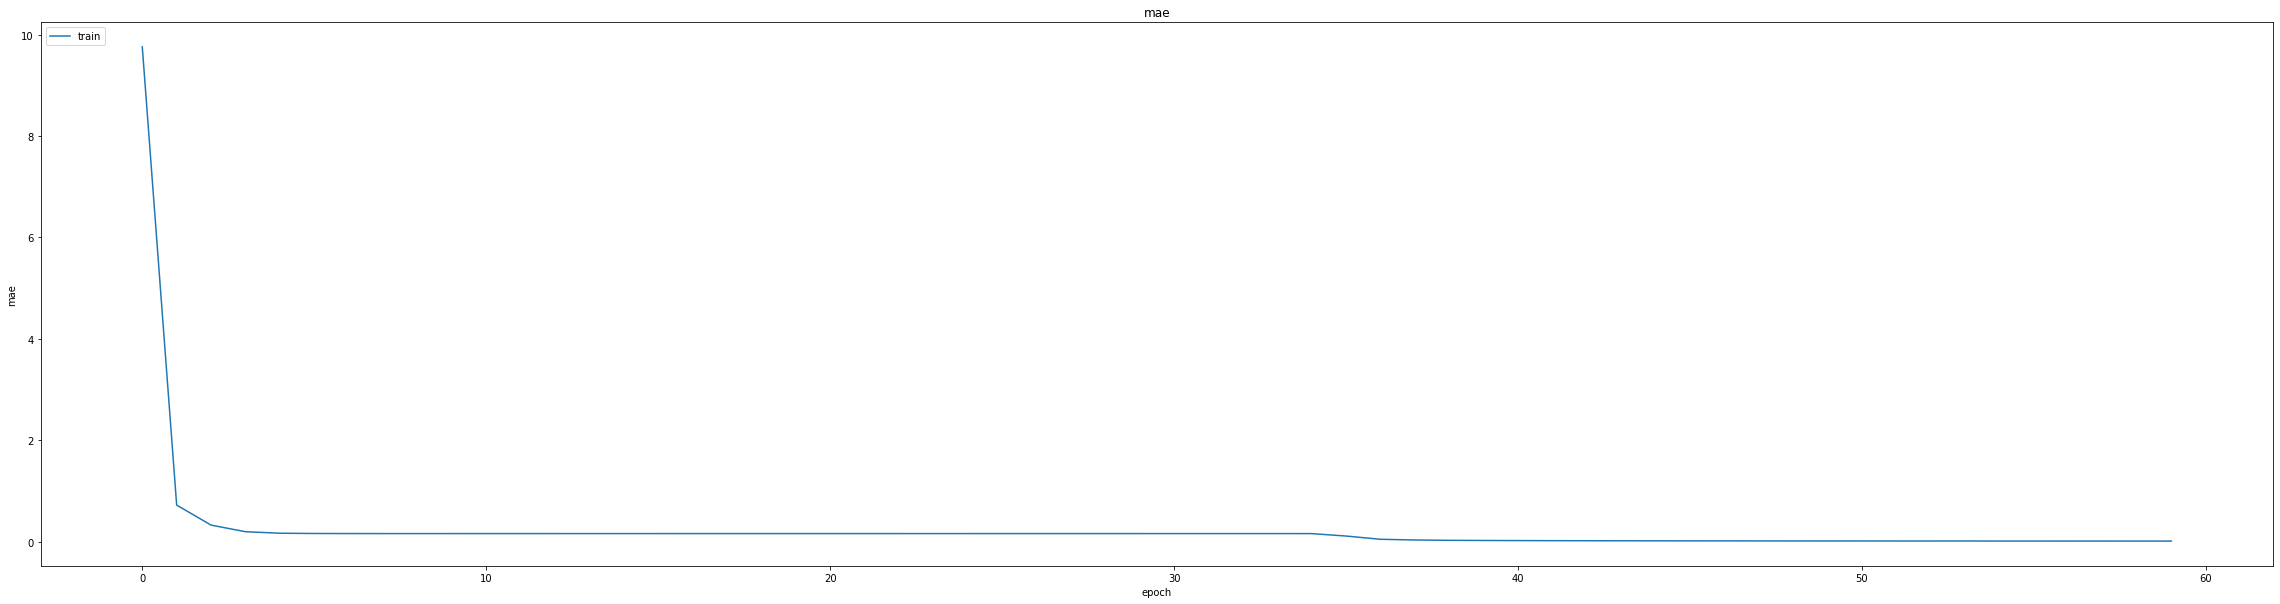

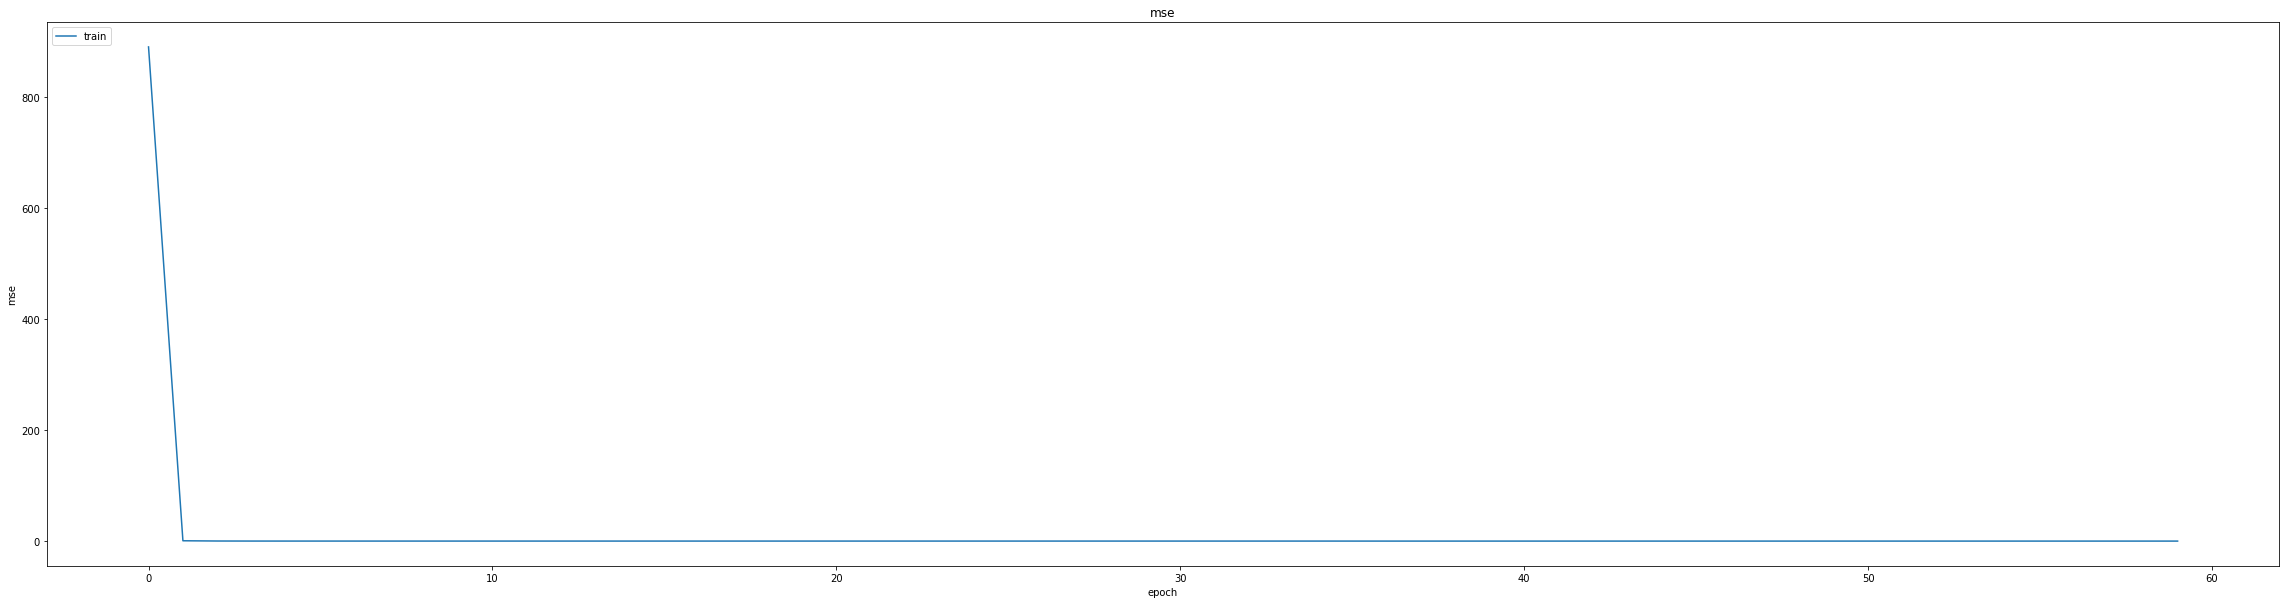

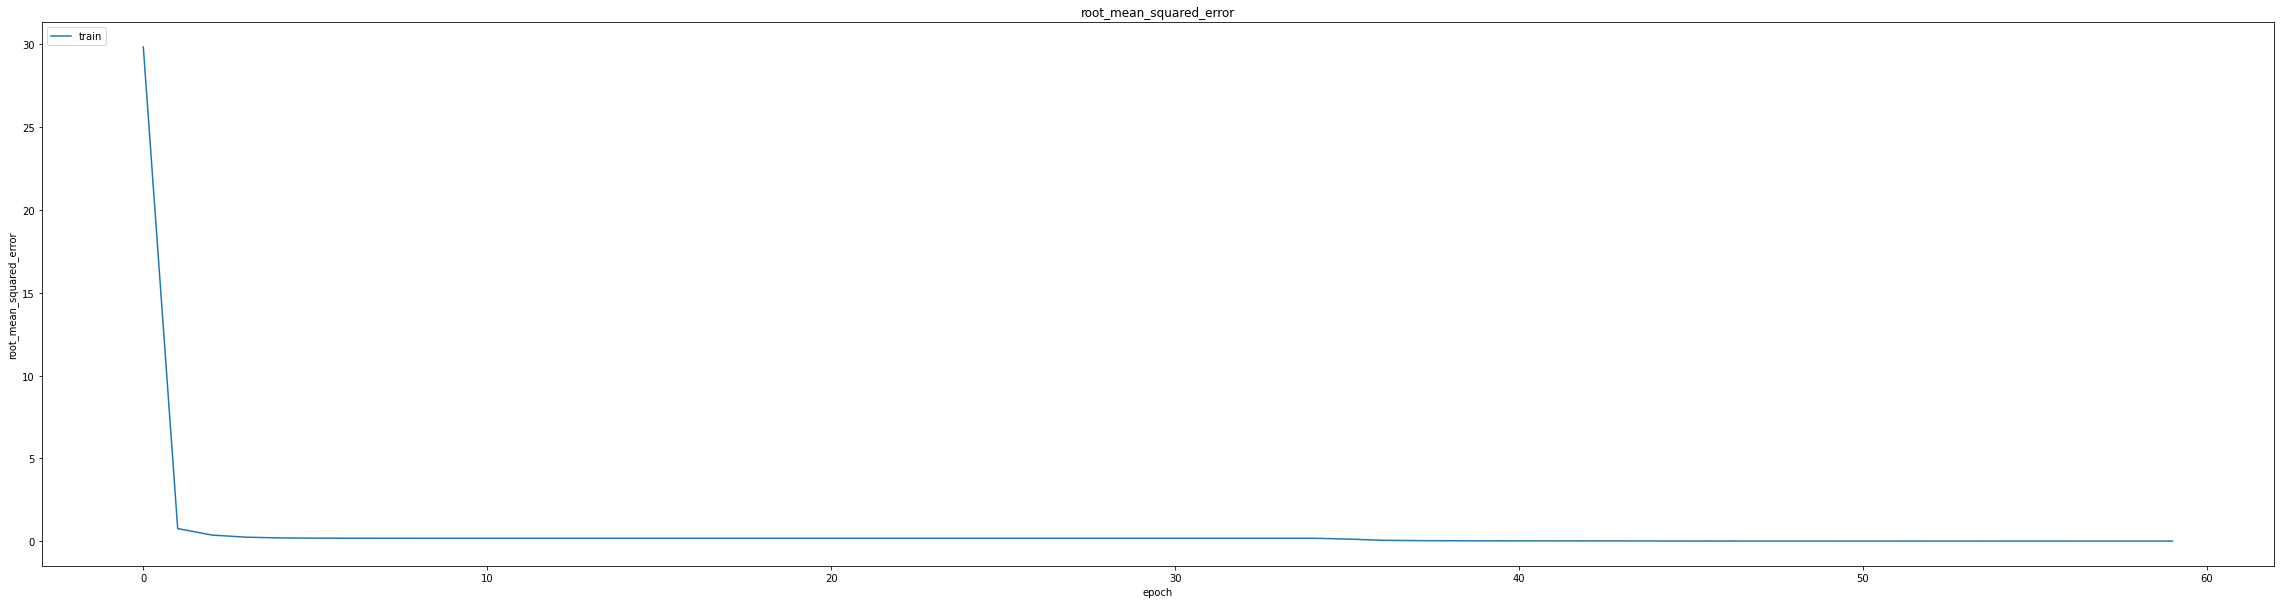

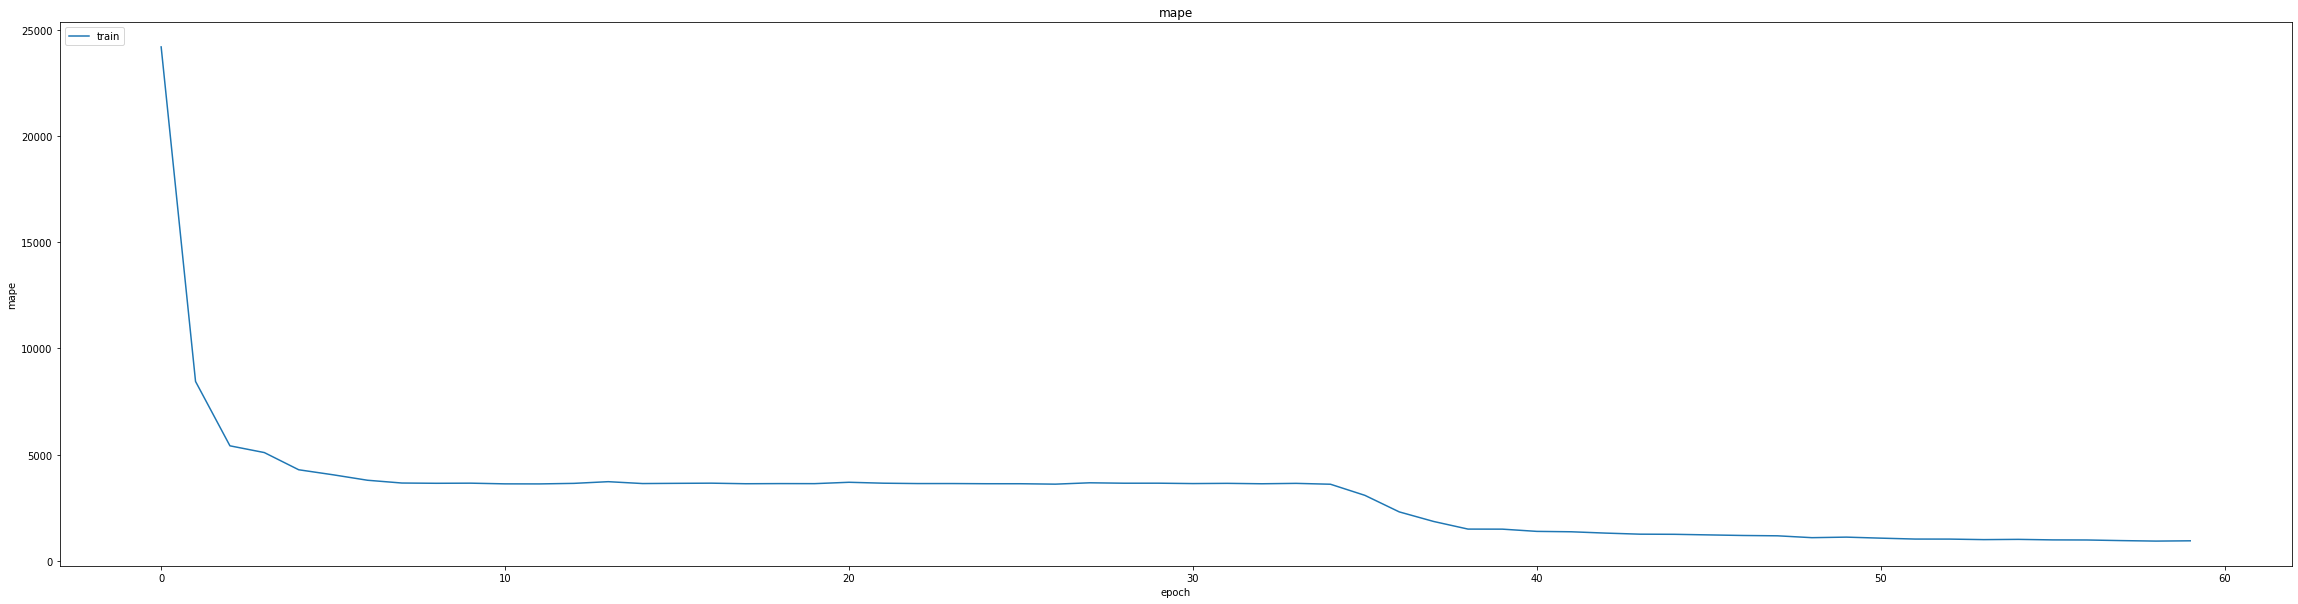

In [33]:
thesis.SummarizeHistory(history)

In [34]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0269017331302166
0.03724324330687523
1392/1392 [==============================] - 6s 4ms/step
0.9849984643781512


In [35]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [36]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
346/348 [============================>.] - ETA: 0s - loss: 5.1134e-04 - mae: 0.0120 - mse: 5.1134e-04 - root_mean_squared_error: 0.0226 - mape: 896.1104
Epoch 1: val_mse did not improve from 0.00139
348/348 [==============================] - 11s 20ms/step - loss: 5.1008e-04 - mae: 0.0120 - mse: 5.1008e-04 - root_mean_squared_error: 0.0226 - mape: 893.3805 - val_loss: 0.0016 - val_mae: 0.0297 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0394 - val_mape: 2869.9075 - lr: 0.0010
Epoch 2/20
346/348 [============================>.] - ETA: 0s - loss: 9.1890e-05 - mae: 0.0070 - mse: 9.1890e-05 - root_mean_squared_error: 0.0096 - mape: 934.5981
Epoch 2: val_mse did not improve from 0.00139
348/348 [==============================] - 6s 17ms/step - loss: 9.1879e-05 - mae: 0.0070 - mse: 9.1879e-05 - root_mean_squared_error: 0.0096 - mape: 931.7496 - val_loss: 0.0016 - val_mae: 0.0323 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0400 - val_mape: 2801.2119 - lr: 0.0010
lr chan

348/348 [==============================] - 17s 50ms/step - loss: 8.9240e-05 - mae: 0.0069 - mse: 8.9240e-05 - root_mean_squared_error: 0.0094 - mape: 899.6894 - val_loss: 0.0013 - val_mae: 0.0266 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0358 - val_mape: 2735.7664 - lr: 9.0000e-04
Epoch 4/20
346/348 [============================>.] - ETA: 0s - loss: 9.9902e-05 - mae: 0.0073 - mse: 9.9902e-05 - root_mean_squared_error: 0.0100 - mape: 915.9476
Epoch 4: val_mse improved from 0.00128 to 0.00118, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 47ms/step - loss: 9.9774e-05 - mae: 0.0073 - mse: 9.9774e-05 - root_mean_squared_error: 0.0100 - mape: 913.1555 - val_loss: 0.0012 - val_mae: 0.0271 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0344 - val_mape: 2615.5007 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
346/348 [============================>.] - ETA: 0s - loss: 7.7458e-05 - mae: 0.0065 - mse: 7.7458e-05 - root_mean_squared_error: 0.0088 - mape: 829.2432
Epoch 5: val_mse improved from 0.00118 to 0.00095, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 7.7375e-05 - mae: 0.0065 - mse: 7.7375e-05 - root_mean_squared_error: 0.0088 - mape: 826.7153 - val_loss: 9.4752e-04 - val_mae: 0.0250 - val_mse: 9.4752e-04 - val_root_mean_squared_error: 0.0308 - val_mape: 2446.6575 - lr: 8.1000e-04
Epoch 6/20
348/348 [==============================] - ETA: 0s - loss: 7.4605e-05 - mae: 0.0064 - mse: 7.4605e-05 - root_mean_squared_error: 0.0086 - mape: 788.6114
Epoch 6: val_mse did not improve from 0.00095
348/348 [==============================] - 6s 18ms/step - loss: 7.4605e-05 - mae: 0.0064 - mse: 7.4605e-05 - root_mean_squared_error: 0.0086 - mape: 788.6114 - val_loss: 0.0012 - val_mae: 0.0312 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0346 - val_mape: 2313.2751 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/20
348/348 [==============================] - ETA: 0s - loss: 6.8835e-05 - mae: 0.0062 - mse: 6.8835e-05 - root_mean_squared_error: 0.0083 - mape: 746.8890
E

348/348 [==============================] - 17s 49ms/step - loss: 5.9001e-05 - mae: 0.0057 - mse: 5.9001e-05 - root_mean_squared_error: 0.0077 - mape: 701.7070 - val_loss: 7.7020e-04 - val_mae: 0.0248 - val_mse: 7.7020e-04 - val_root_mean_squared_error: 0.0278 - val_mape: 2063.1162 - lr: 6.5610e-04
Epoch 10/20
347/348 [============================>.] - ETA: 0s - loss: 4.8303e-05 - mae: 0.0051 - mse: 4.8303e-05 - root_mean_squared_error: 0.0070 - mape: 675.5076
Epoch 10: val_mse did not improve from 0.00077
348/348 [==============================] - 6s 17ms/step - loss: 4.8301e-05 - mae: 0.0051 - mse: 4.8301e-05 - root_mean_squared_error: 0.0069 - mape: 675.3915 - val_loss: 8.6436e-04 - val_mae: 0.0268 - val_mse: 8.6436e-04 - val_root_mean_squared_error: 0.0294 - val_mape: 2016.8497 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/20
347/348 [============================>.] - ETA: 0s - loss: 4.7806e-05 - mae: 0.0051 - mse: 4.7806e-05 - root_mean_squared_error: 0.0069 - mape:

348/348 [==============================] - 17s 49ms/step - loss: 4.7807e-05 - mae: 0.0051 - mse: 4.7807e-05 - root_mean_squared_error: 0.0069 - mape: 671.7480 - val_loss: 5.5718e-04 - val_mae: 0.0199 - val_mse: 5.5718e-04 - val_root_mean_squared_error: 0.0236 - val_mape: 1986.8928 - lr: 5.9049e-04
Epoch 12/20
345/348 [============================>.] - ETA: 0s - loss: 4.6288e-05 - mae: 0.0051 - mse: 4.6288e-05 - root_mean_squared_error: 0.0068 - mape: 663.5218
Epoch 12: val_mse did not improve from 0.00056
348/348 [==============================] - 6s 18ms/step - loss: 4.6203e-05 - mae: 0.0051 - mse: 4.6203e-05 - root_mean_squared_error: 0.0068 - mape: 659.5901 - val_loss: 9.1985e-04 - val_mae: 0.0279 - val_mse: 9.1985e-04 - val_root_mean_squared_error: 0.0303 - val_mape: 1891.1758 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/20
346/348 [============================>.] - ETA: 0s - loss: 3.8430e-05 - mae: 0.0046 - mse: 3.8430e-05 - root_mean_squared_error: 0.0062 - mape:

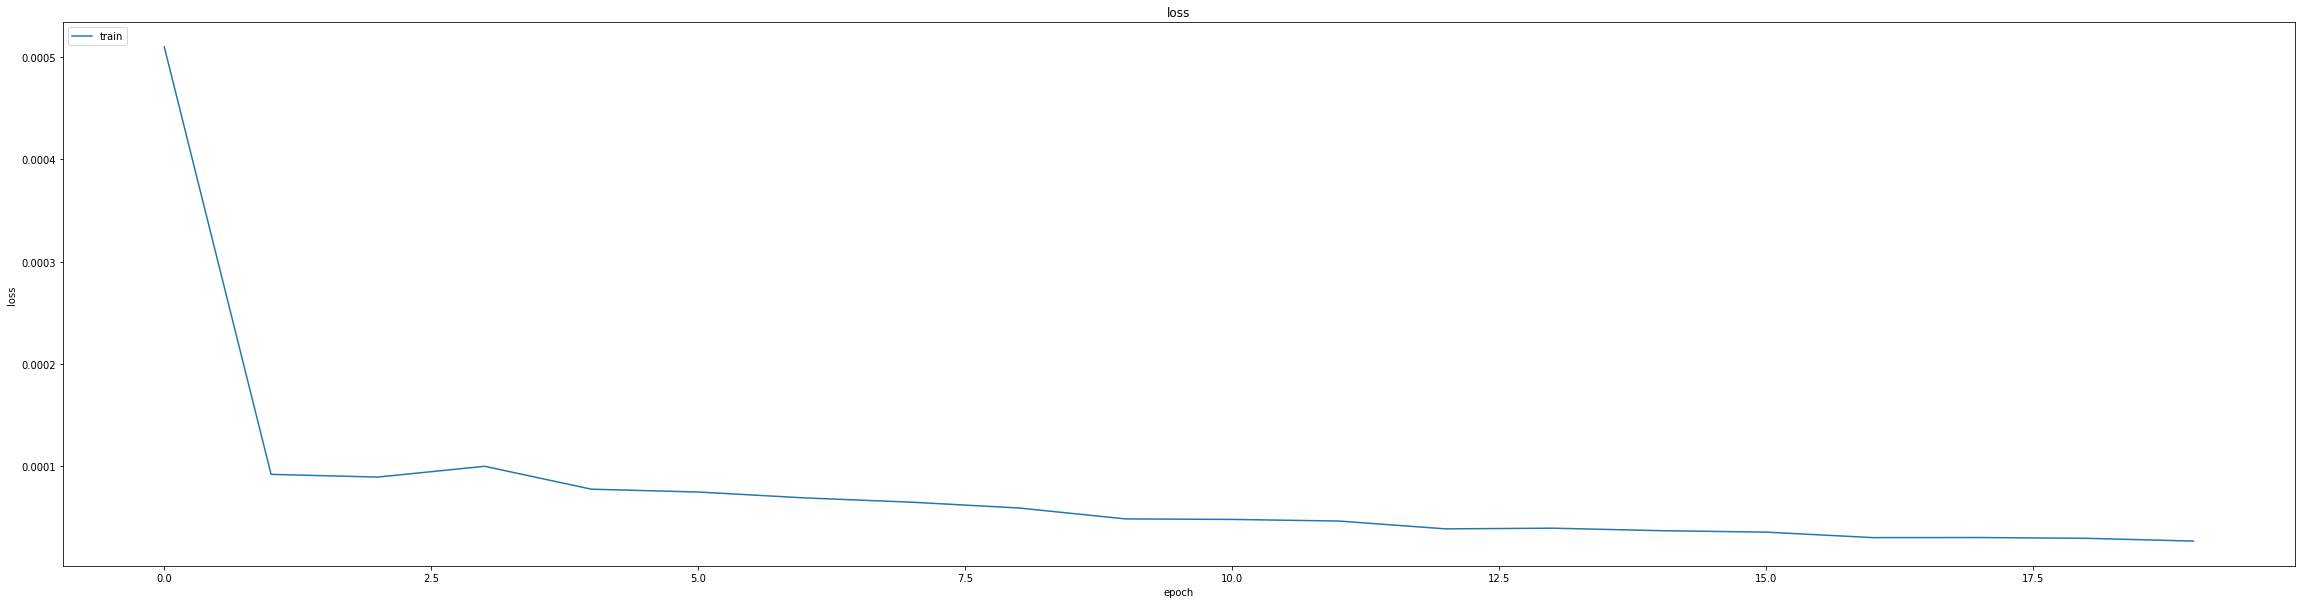

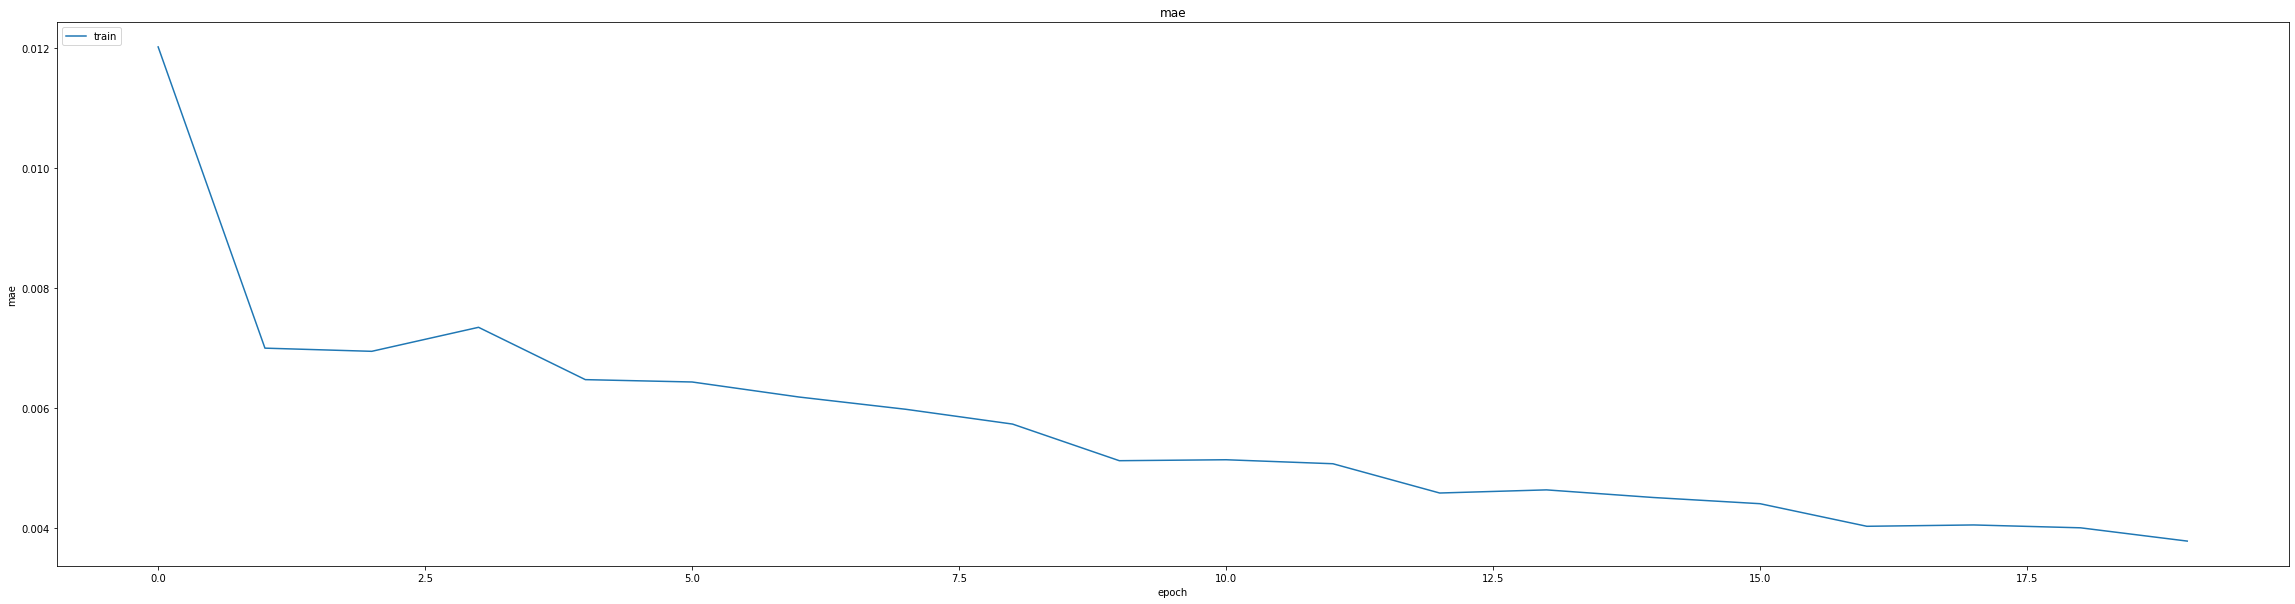

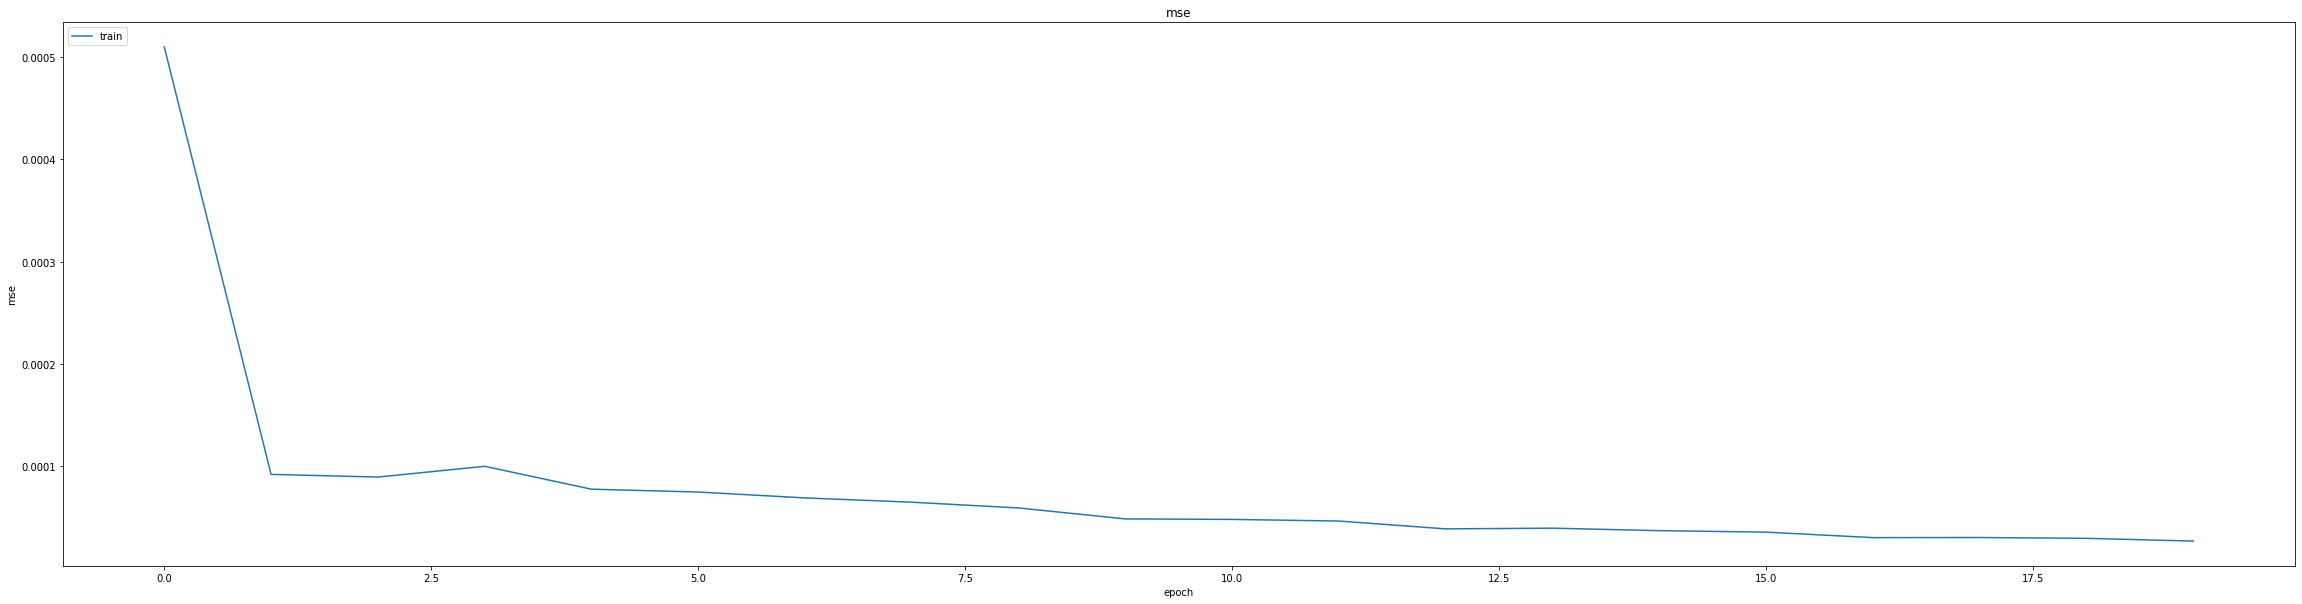

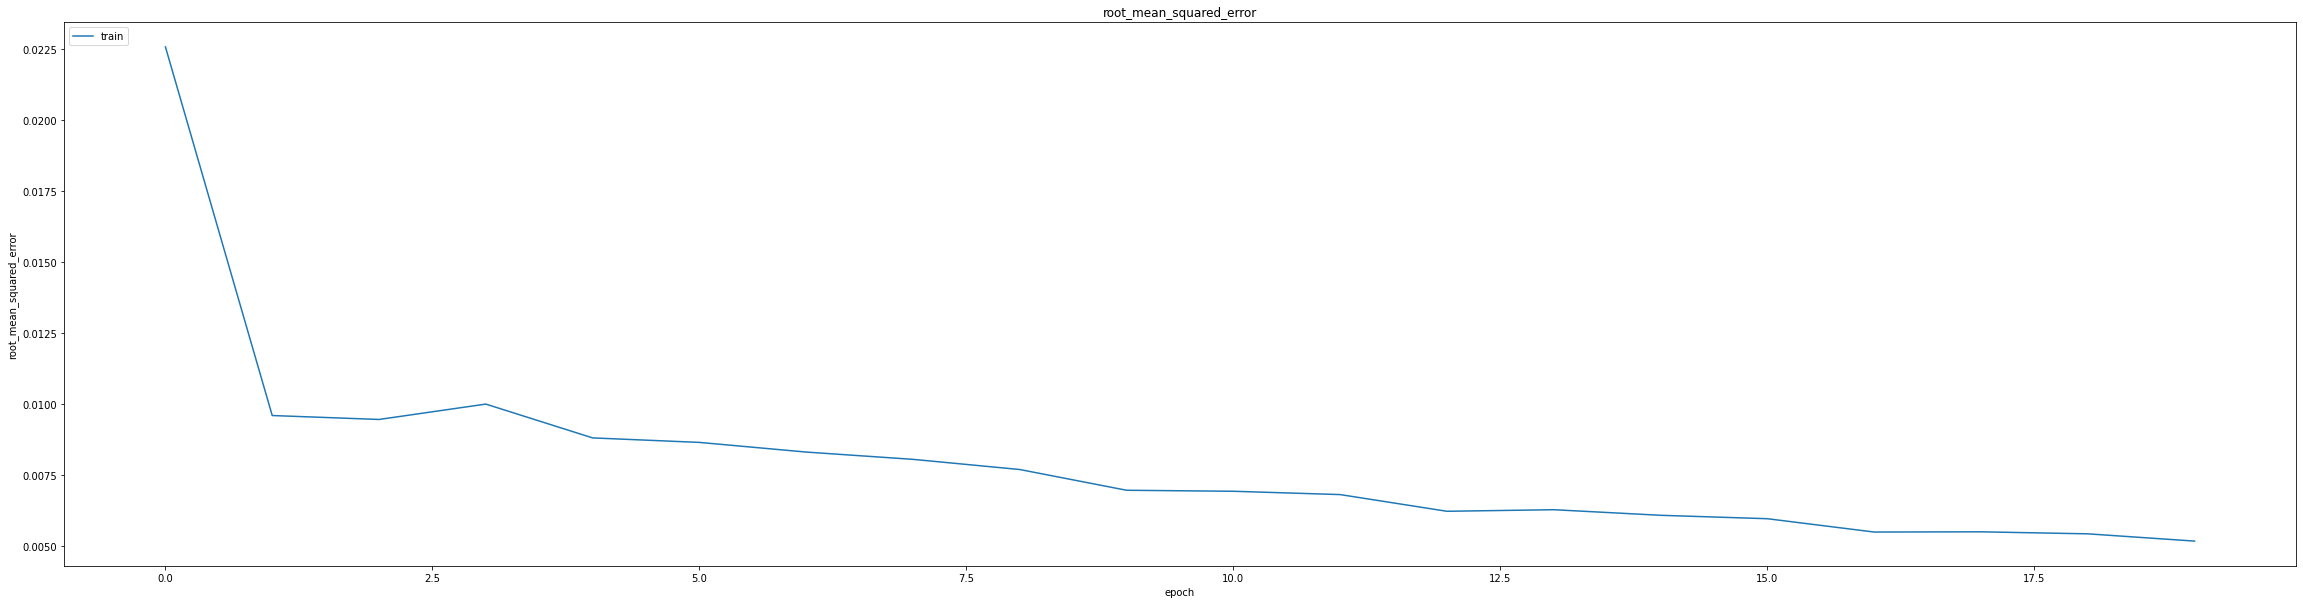

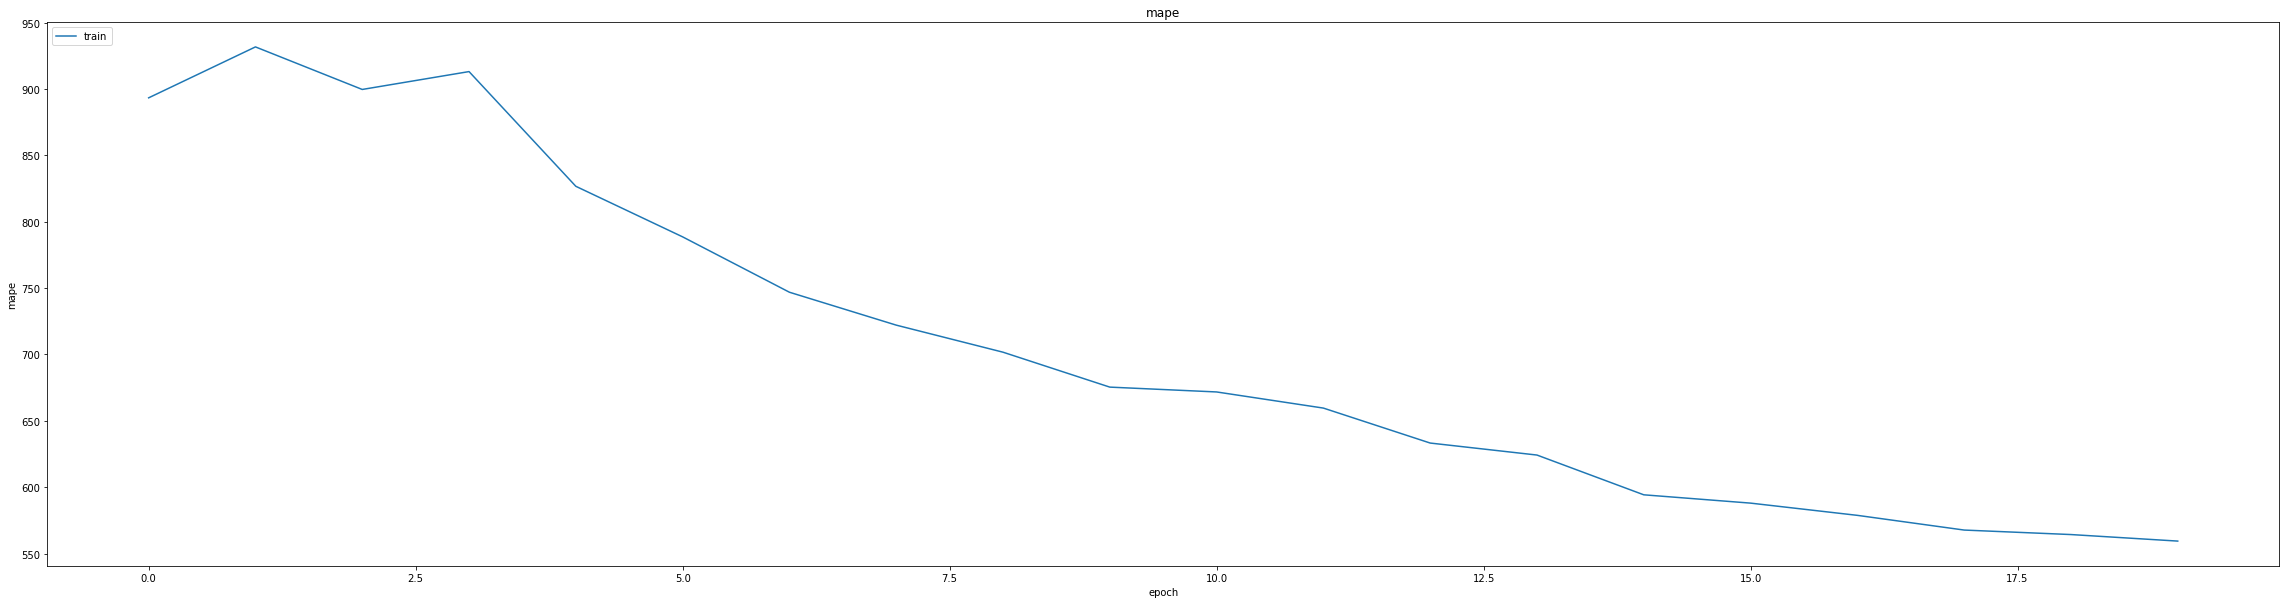

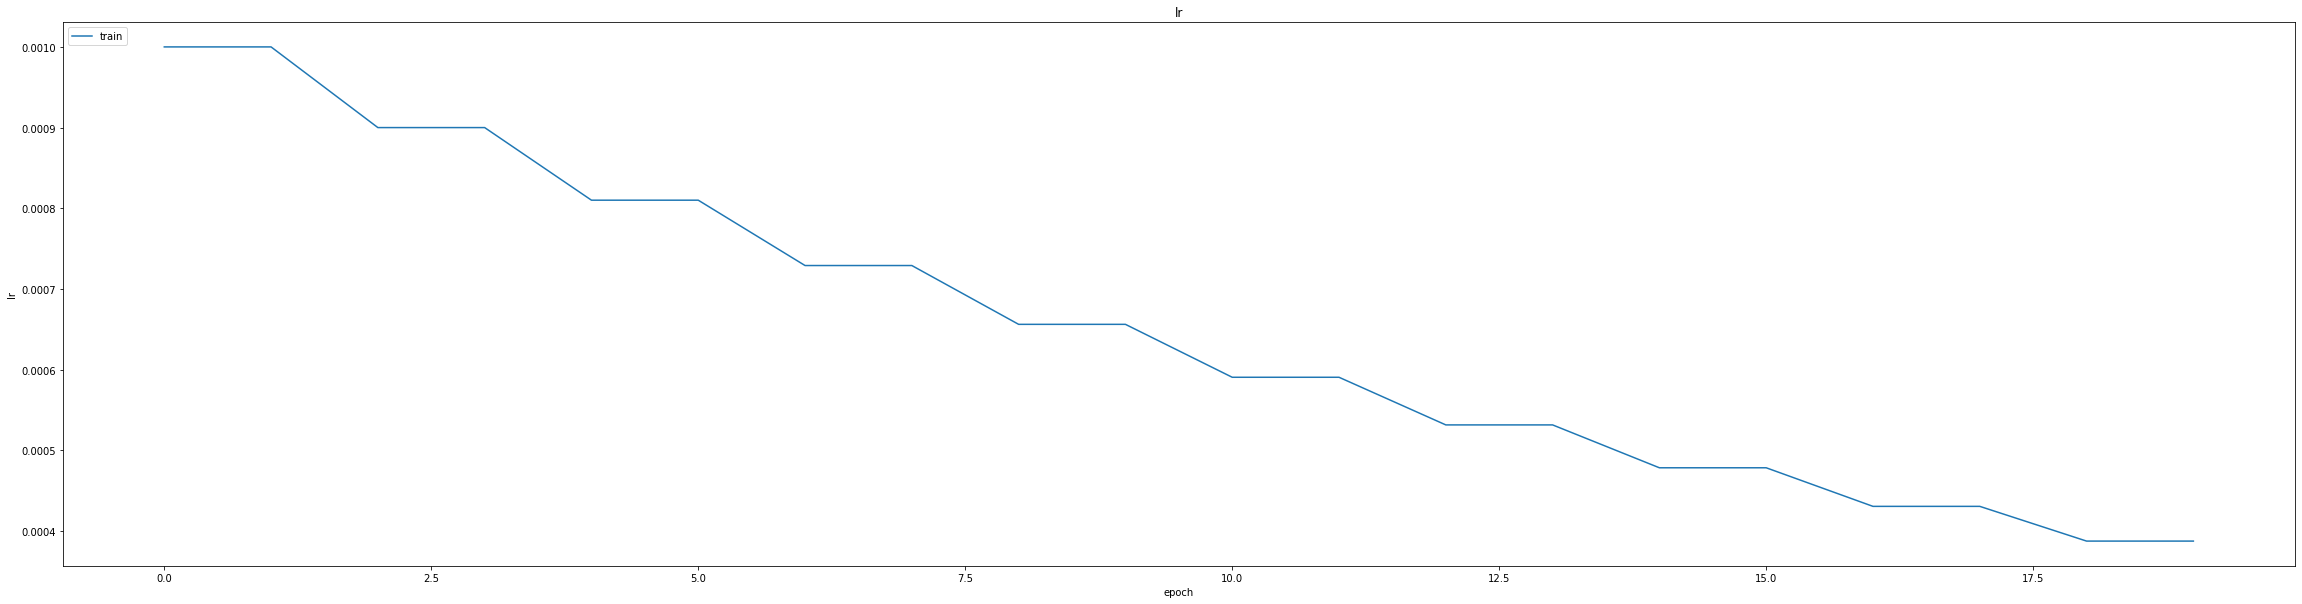

In [37]:
thesis.SummarizeHistory(history)

In [38]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01992196775972843
0.023604661226272583
1392/1392 [==============================] - 6s 4ms/step
0.9901073409513403


1392/1392 [==============================] - 6s 4ms/step


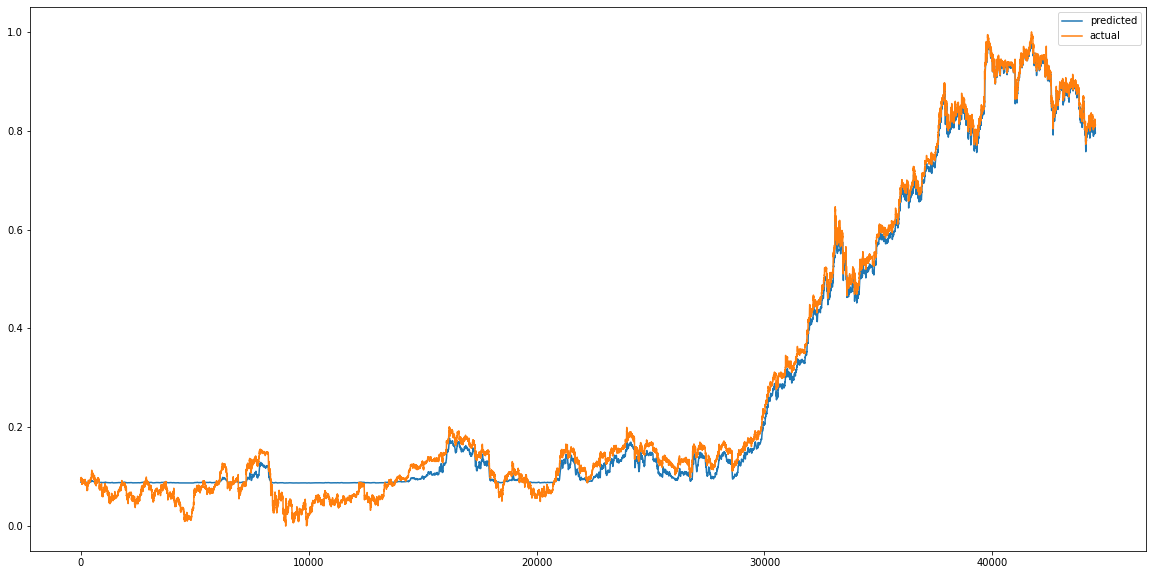

In [39]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_GRU_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


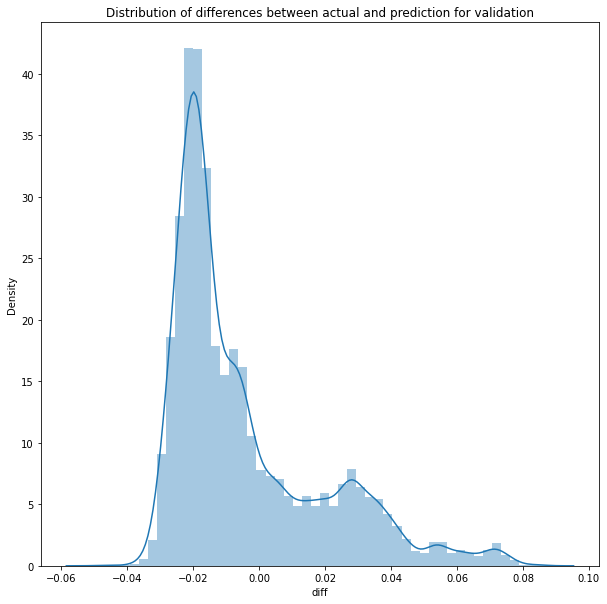

In [40]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1392/1392 [==============================] - 5s 4ms/step


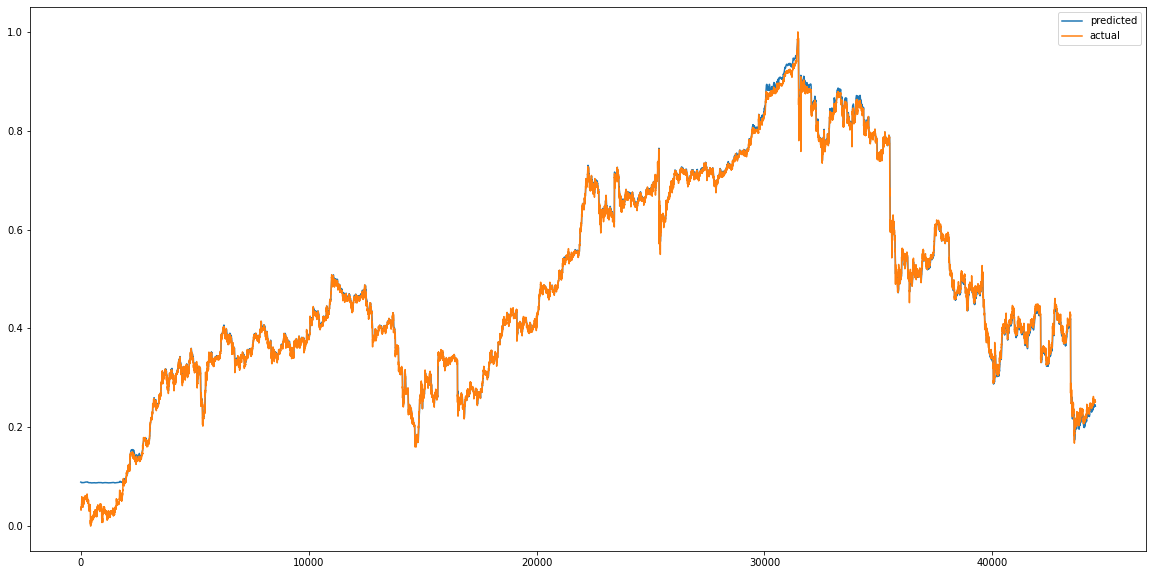

In [41]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


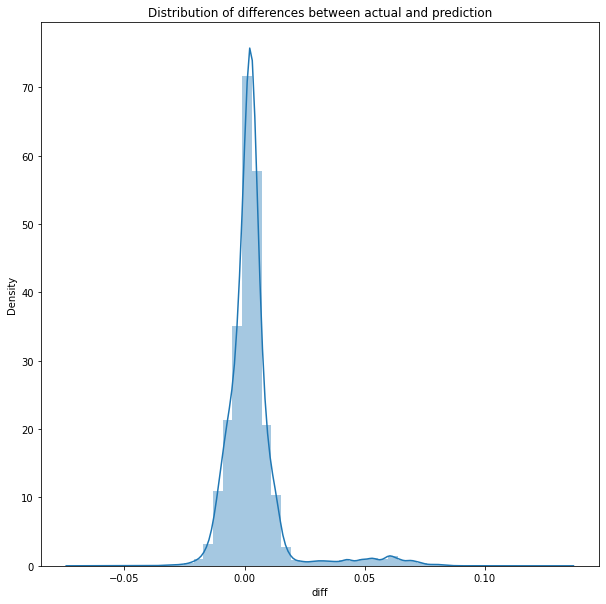

In [42]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00017228445646978336
RMSE :  0.013125717369720536
MAE :  0.007169875748306258
1392/1392 [==============================] - 5s 4ms/step
R2_Score  : 0.9963896213550134


count    44524.000000
mean         0.003429
std          0.012670
min         -0.069765
25%         -0.001945
50%          0.002037
75%          0.005432
max          0.132369
Name: diff, dtype: float64

**CNN_BiLSTM_MODEL**

In [44]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional_2 (Bidirectio  (None, 24, 256)          197632    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 256)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 16)               

In [45]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
347/348 [============================>.] - ETA: 0s - loss: 315.3786 - mae: 2.4267 - mse: 315.3786 - root_mean_squared_error: 17.7589 - mape: 4624.1099
Epoch 1: val_mse improved from inf to 0.11282, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_BiLSTM(60-40)


348/348 [==============================] - 40s 90ms/step - loss: 315.3243 - mae: 2.4263 - mse: 315.3243 - root_mean_squared_error: 17.7574 - mape: 4623.3232 - val_loss: 0.1128 - val_mae: 0.3188 - val_mse: 0.1128 - val_root_mean_squared_error: 0.3359 - val_mape: 10746.0645
Epoch 2/60
346/348 [============================>.] - ETA: 0s - loss: 0.0088 - mae: 0.0682 - mse: 0.0088 - root_mean_squared_error: 0.0937 - mape: 1567.6165
Epoch 2: val_mse improved from 0.11282 to 0.01028, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 85ms/step - loss: 0.0088 - mae: 0.0681 - mse: 0.0088 - root_mean_squared_error: 0.0936 - mape: 1562.8618 - val_loss: 0.0103 - val_mae: 0.0939 - val_mse: 0.0103 - val_root_mean_squared_error: 0.1014 - val_mape: 4193.8975
Epoch 3/60
347/348 [============================>.] - ETA: 0s - loss: 0.0022 - mae: 0.0356 - mse: 0.0022 - root_mean_squared_error: 0.0464 - mape: 1590.9124
Epoch 3: val_mse improved from 0.01028 to 0.00712, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_BiLSTM(60-40)


348/348 [==============================] - 30s 86ms/step - loss: 0.0022 - mae: 0.0356 - mse: 0.0022 - root_mean_squared_error: 0.0464 - mape: 1590.6396 - val_loss: 0.0071 - val_mae: 0.0754 - val_mse: 0.0071 - val_root_mean_squared_error: 0.0844 - val_mape: 3726.0715
Epoch 4/60
347/348 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0288 - mse: 0.0014 - root_mean_squared_error: 0.0378 - mape: 1308.4178
Epoch 4: val_mse improved from 0.00712 to 0.00517, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_BiLSTM(60-40)


348/348 [==============================] - 30s 86ms/step - loss: 0.0014 - mae: 0.0288 - mse: 0.0014 - root_mean_squared_error: 0.0378 - mape: 1308.1938 - val_loss: 0.0052 - val_mae: 0.0610 - val_mse: 0.0052 - val_root_mean_squared_error: 0.0719 - val_mape: 3127.8677
Epoch 5/60
345/348 [============================>.] - ETA: 0s - loss: 8.8743e-04 - mae: 0.0230 - mse: 8.8743e-04 - root_mean_squared_error: 0.0298 - mape: 1077.4314
Epoch 5: val_mse improved from 0.00517 to 0.00377, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_BiLSTM(60-40)


348/348 [==============================] - 30s 85ms/step - loss: 8.8650e-04 - mae: 0.0230 - mse: 8.8650e-04 - root_mean_squared_error: 0.0298 - mape: 1071.0663 - val_loss: 0.0038 - val_mae: 0.0527 - val_mse: 0.0038 - val_root_mean_squared_error: 0.0614 - val_mape: 2796.6135
Epoch 6/60
347/348 [============================>.] - ETA: 0s - loss: 6.8550e-04 - mae: 0.0202 - mse: 6.8550e-04 - root_mean_squared_error: 0.0262 - mape: 879.5848
Epoch 6: val_mse improved from 0.00377 to 0.00254, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_BiLSTM(60-40)


348/348 [==============================] - 30s 85ms/step - loss: 6.8545e-04 - mae: 0.0202 - mse: 6.8545e-04 - root_mean_squared_error: 0.0262 - mape: 879.4340 - val_loss: 0.0025 - val_mae: 0.0442 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0504 - val_mape: 2578.6404
Epoch 7/60
346/348 [============================>.] - ETA: 0s - loss: 5.6961e-04 - mae: 0.0184 - mse: 5.6961e-04 - root_mean_squared_error: 0.0239 - mape: 1072.1447
Epoch 7: val_mse did not improve from 0.00254
348/348 [==============================] - 7s 20ms/step - loss: 5.6935e-04 - mae: 0.0184 - mse: 5.6935e-04 - root_mean_squared_error: 0.0239 - mape: 1068.8827 - val_loss: 0.0026 - val_mae: 0.0444 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0511 - val_mape: 2394.8496
Epoch 8/60
347/348 [============================>.] - ETA: 0s - loss: 4.6879e-04 - mae: 0.0168 - mse: 4.6879e-04 - root_mean_squared_error: 0.0217 - mape: 784.0768
Epoch 8: val_mse improved from 0.00254 to 0.00202, saving model to /content/d

348/348 [==============================] - 30s 85ms/step - loss: 4.6881e-04 - mae: 0.0168 - mse: 4.6881e-04 - root_mean_squared_error: 0.0217 - mape: 783.9425 - val_loss: 0.0020 - val_mae: 0.0394 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0449 - val_mape: 2211.6455
Epoch 9/60
347/348 [============================>.] - ETA: 0s - loss: 3.9063e-04 - mae: 0.0153 - mse: 3.9063e-04 - root_mean_squared_error: 0.0198 - mape: 894.8467
Epoch 9: val_mse did not improve from 0.00202
348/348 [==============================] - 7s 20ms/step - loss: 3.9068e-04 - mae: 0.0153 - mse: 3.9068e-04 - root_mean_squared_error: 0.0198 - mape: 894.6933 - val_loss: 0.0032 - val_mae: 0.0460 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0566 - val_mape: 2043.2764
Epoch 10/60
346/348 [============================>.] - ETA: 0s - loss: 3.3473e-04 - mae: 0.0142 - mse: 3.3473e-04 - root_mean_squared_error: 0.0183 - mape: 714.2405
Epoch 10: val_mse did not improve from 0.00202
348/348 [======================

348/348 [==============================] - 31s 88ms/step - loss: 2.0665e-04 - mae: 0.0112 - mse: 2.0665e-04 - root_mean_squared_error: 0.0144 - mape: 672.3091 - val_loss: 0.0018 - val_mae: 0.0348 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0429 - val_mape: 1698.2885
Epoch 14/60
345/348 [============================>.] - ETA: 0s - loss: 1.8288e-04 - mae: 0.0105 - mse: 1.8288e-04 - root_mean_squared_error: 0.0135 - mape: 709.7788
Epoch 14: val_mse did not improve from 0.00184
348/348 [==============================] - 7s 20ms/step - loss: 1.8290e-04 - mae: 0.0105 - mse: 1.8290e-04 - root_mean_squared_error: 0.0135 - mape: 705.5825 - val_loss: 0.0019 - val_mae: 0.0348 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0438 - val_mape: 1640.2642
Epoch 15/60
346/348 [============================>.] - ETA: 0s - loss: 1.6157e-04 - mae: 0.0099 - mse: 1.6157e-04 - root_mean_squared_error: 0.0127 - mape: 574.4428
Epoch 15: val_mse did not improve from 0.00184
348/348 [====================

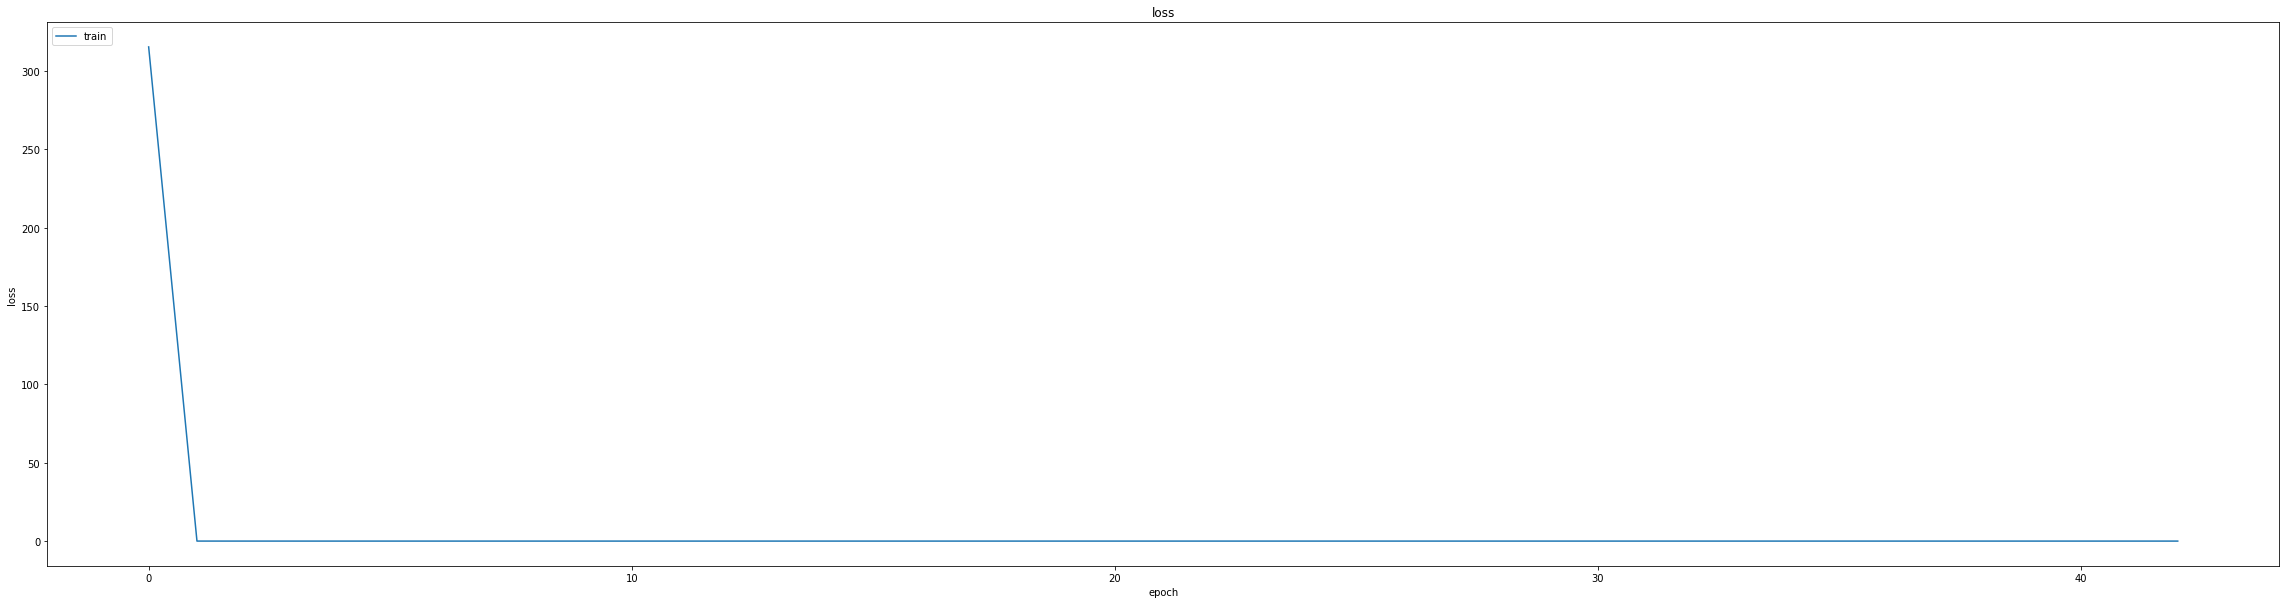

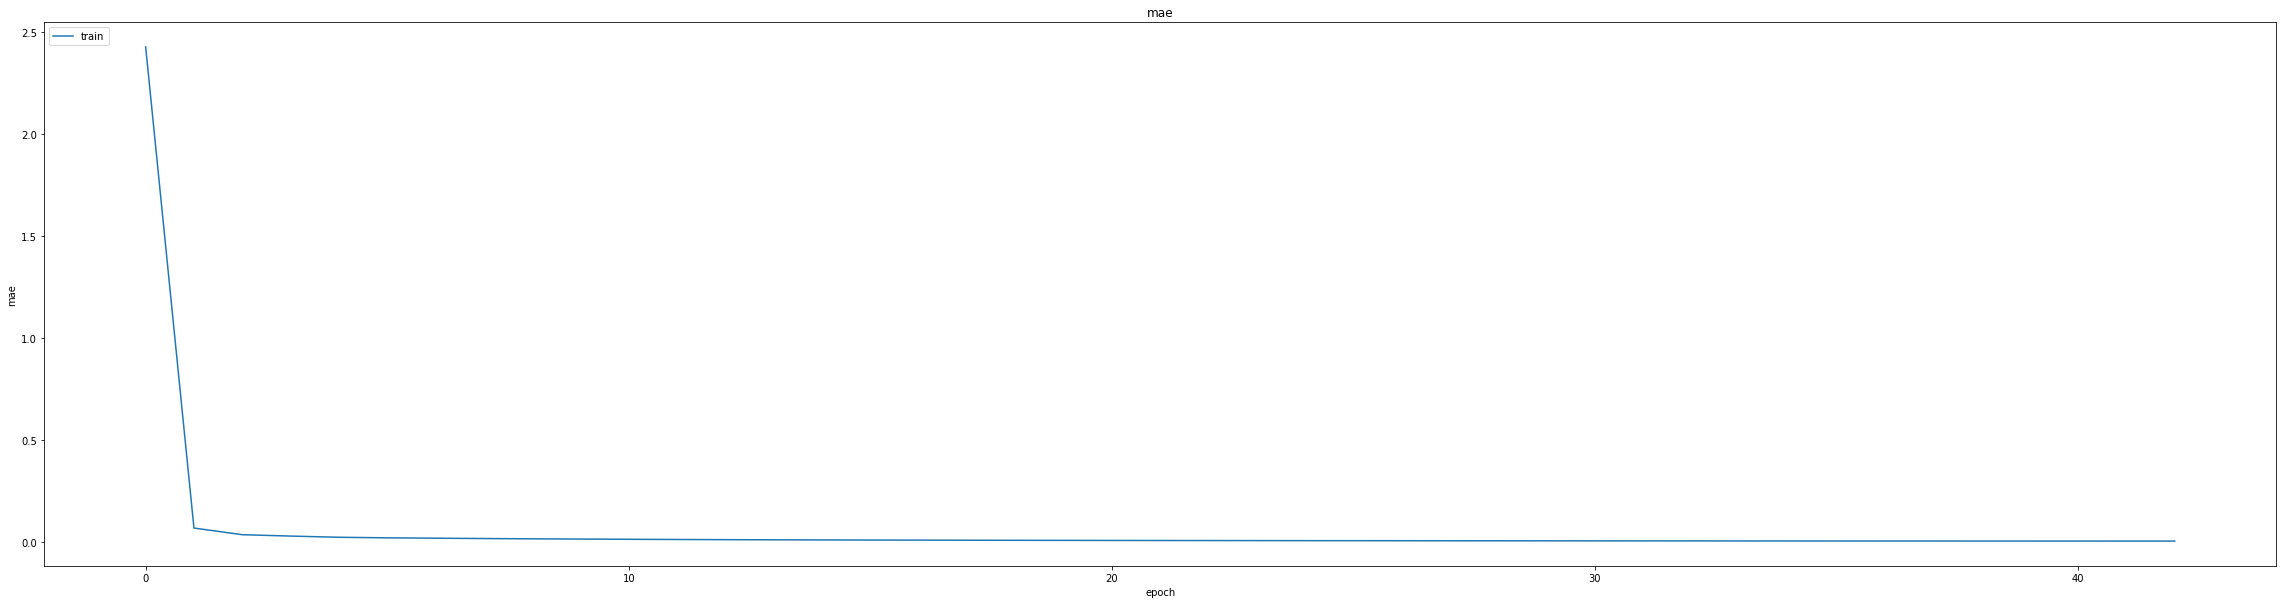

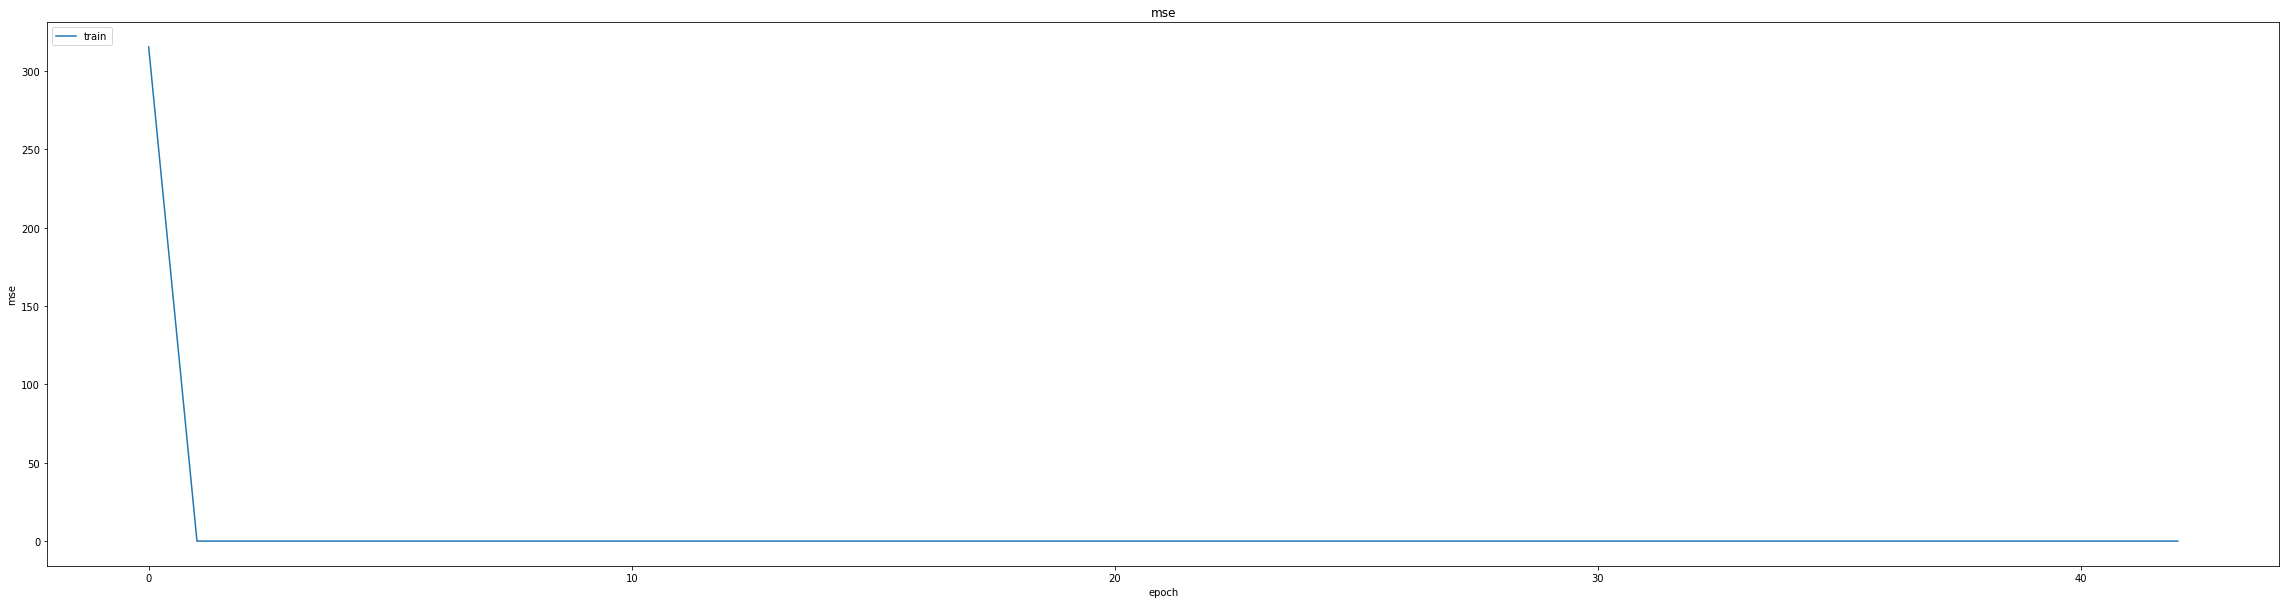

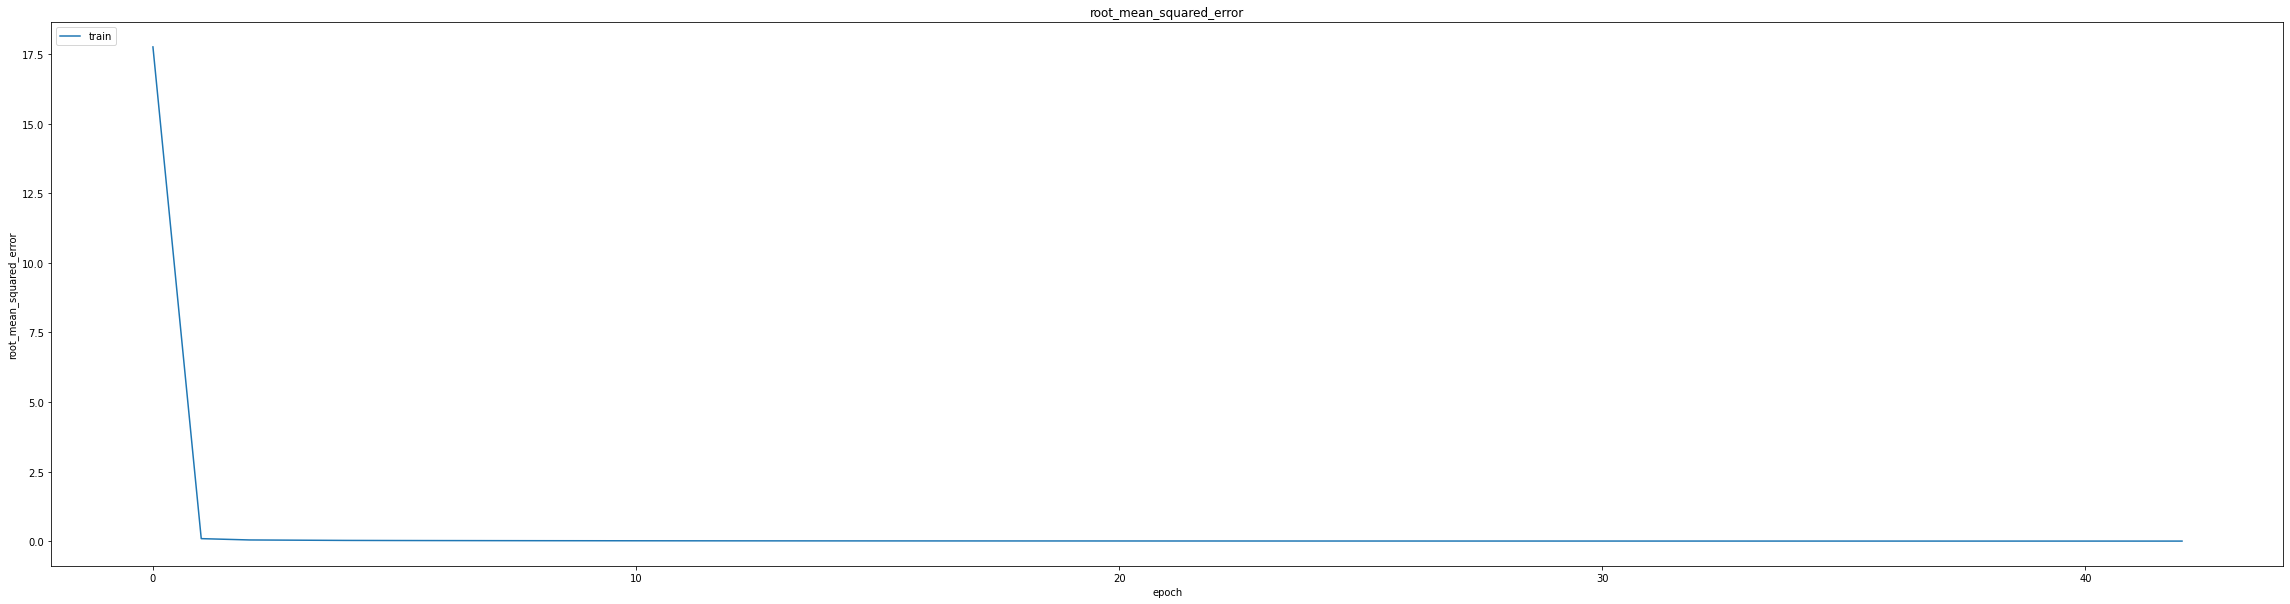

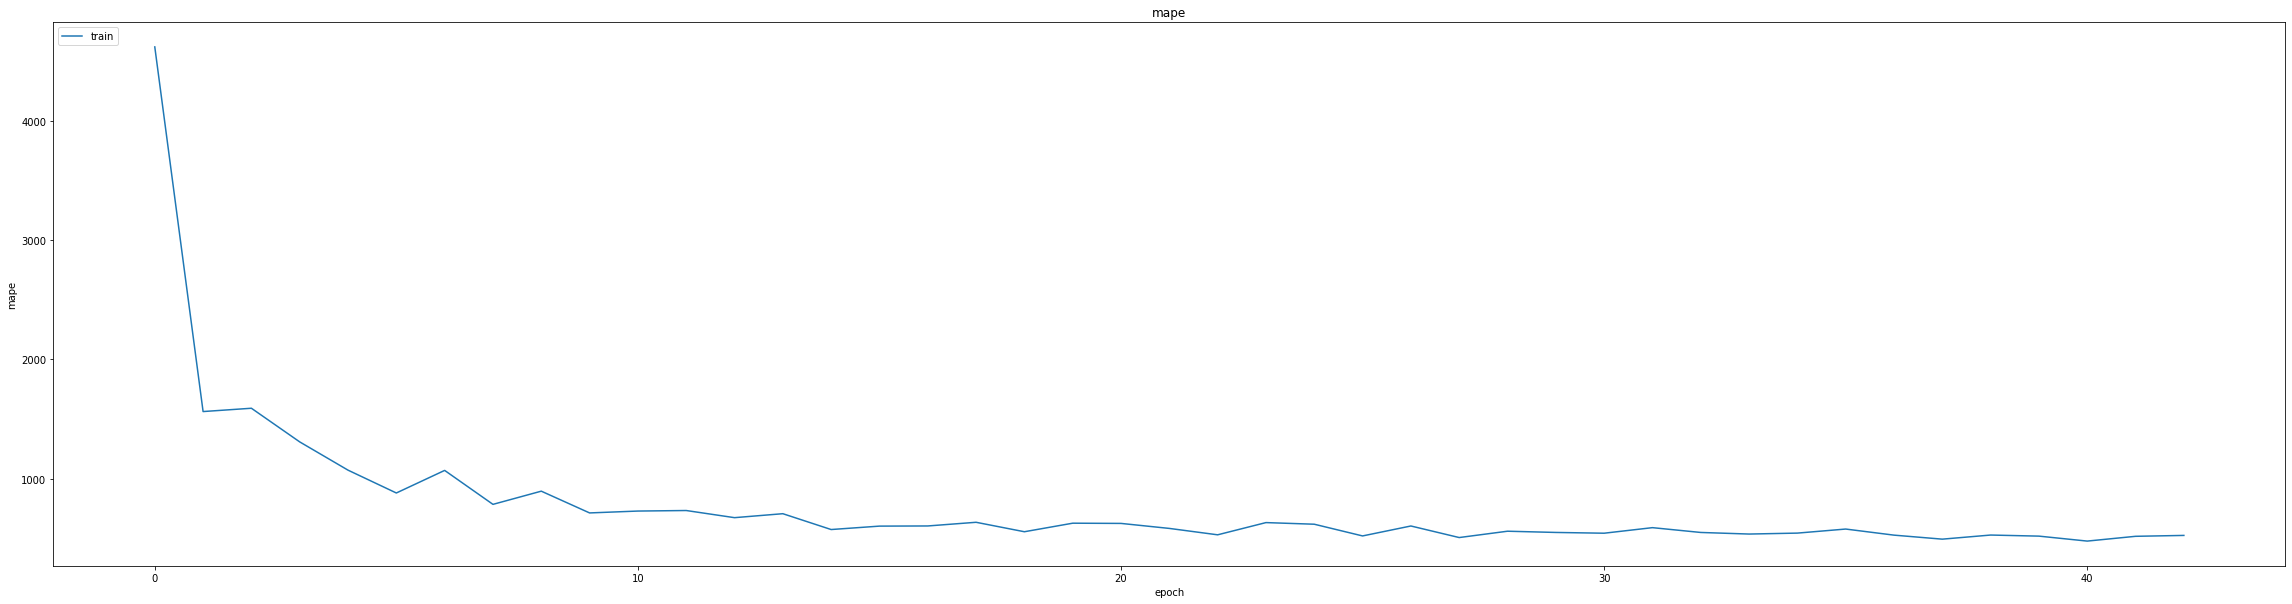

In [46]:
thesis.SummarizeHistory(history)

In [47]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0340425930917263
0.042864345014095306
1392/1392 [==============================] - 9s 5ms/step
0.970591594325796


In [48]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [49]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20


347/348 [============================>.] - ETA: 0s - loss: 0.0022 - mae: 0.0202 - mse: 0.0022 - root_mean_squared_error: 0.0467 - mape: 929.8137
Epoch 1: val_mse did not improve from 0.00184
348/348 [==============================] - 15s 24ms/step - loss: 0.0022 - mae: 0.0202 - mse: 0.0022 - root_mean_squared_error: 0.0467 - mape: 929.6541 - val_loss: 0.0021 - val_mae: 0.0393 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0460 - val_mape: 1818.6716 - lr: 0.0010
Epoch 2/20
347/348 [============================>.] - ETA: 0s - loss: 9.2237e-05 - mae: 0.0075 - mse: 9.2237e-05 - root_mean_squared_error: 0.0096 - mape: 651.4619
Epoch 2: val_mse did not improve from 0.00184
348/348 [==============================] - 7s 20ms/step - loss: 9.2244e-05 - mae: 0.0075 - mse: 9.2244e-05 - root_mean_squared_error: 0.0096 - mape: 651.3500 - val_loss: 0.0023 - val_mae: 0.0396 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0478 - val_mape: 1592.2993 - lr: 0.0010
lr changed to 0.000900000042747706

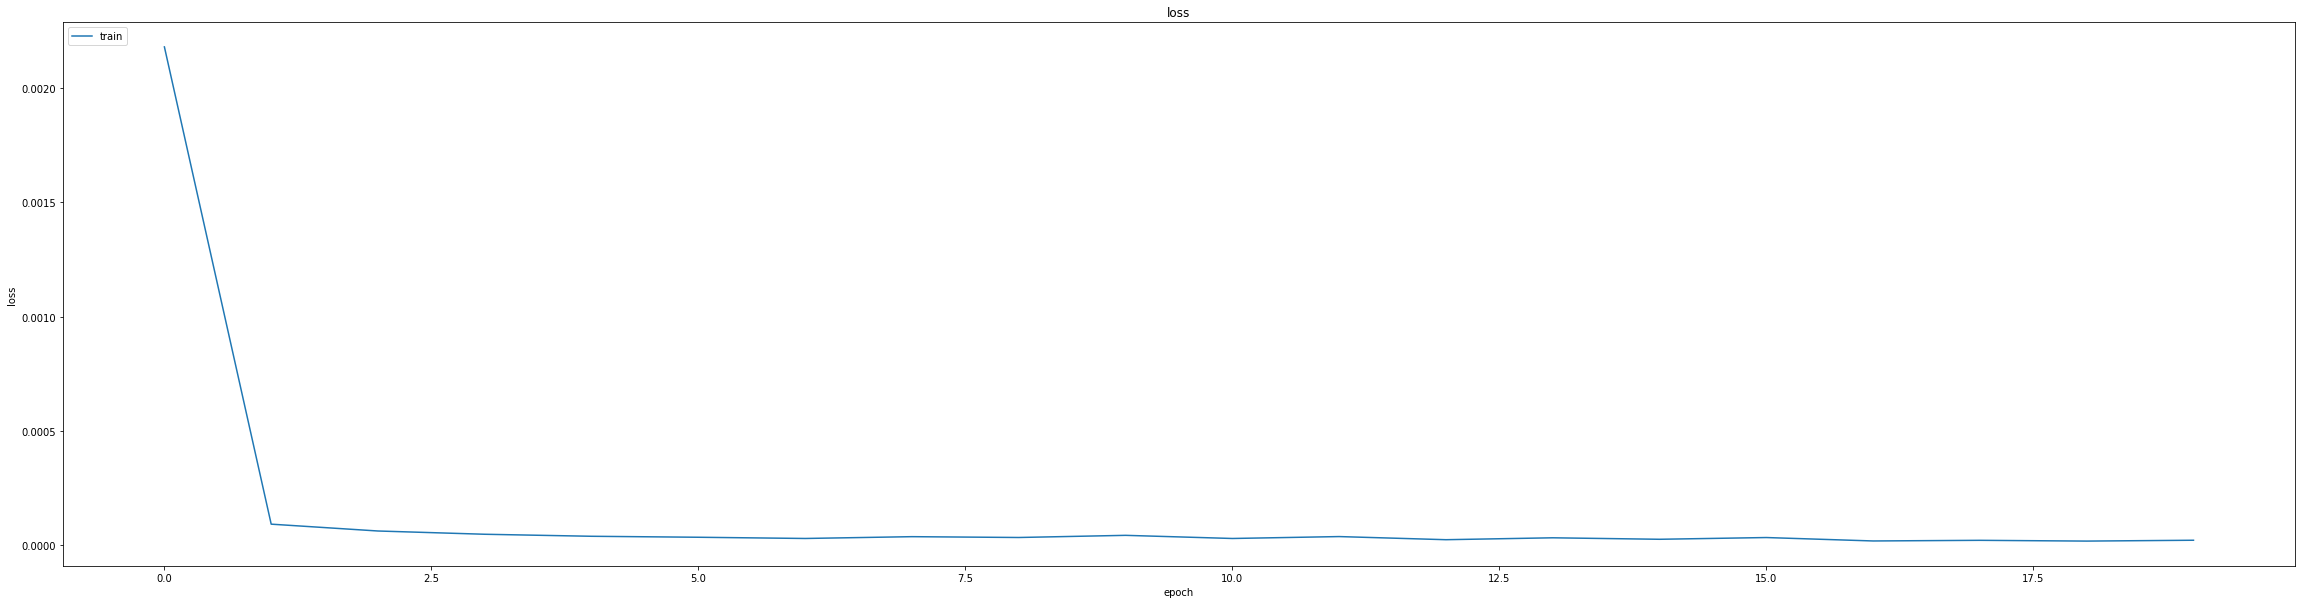

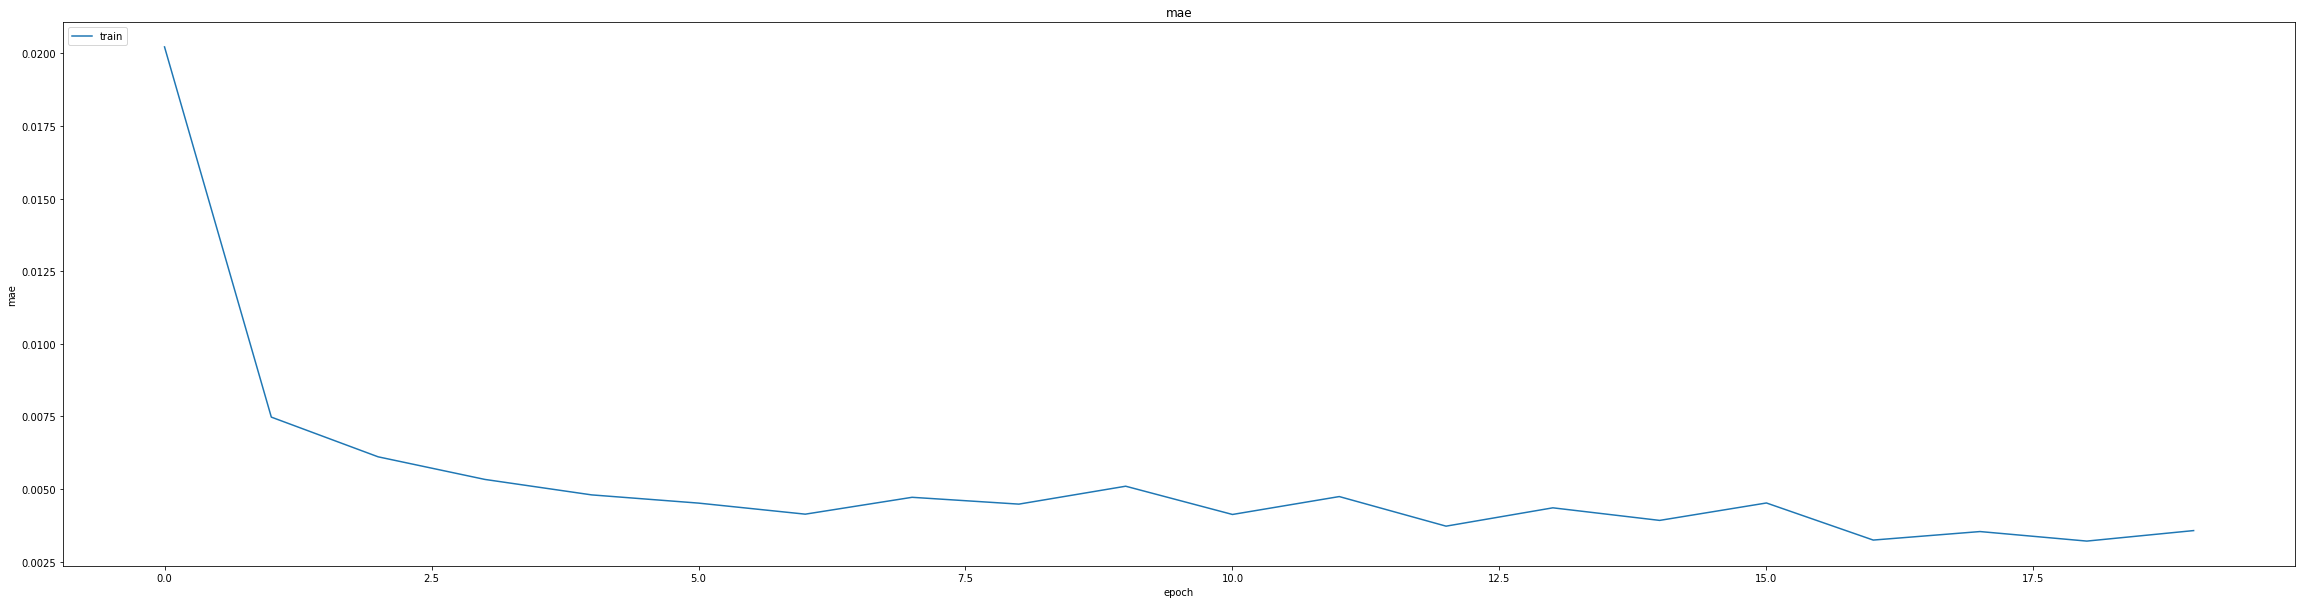

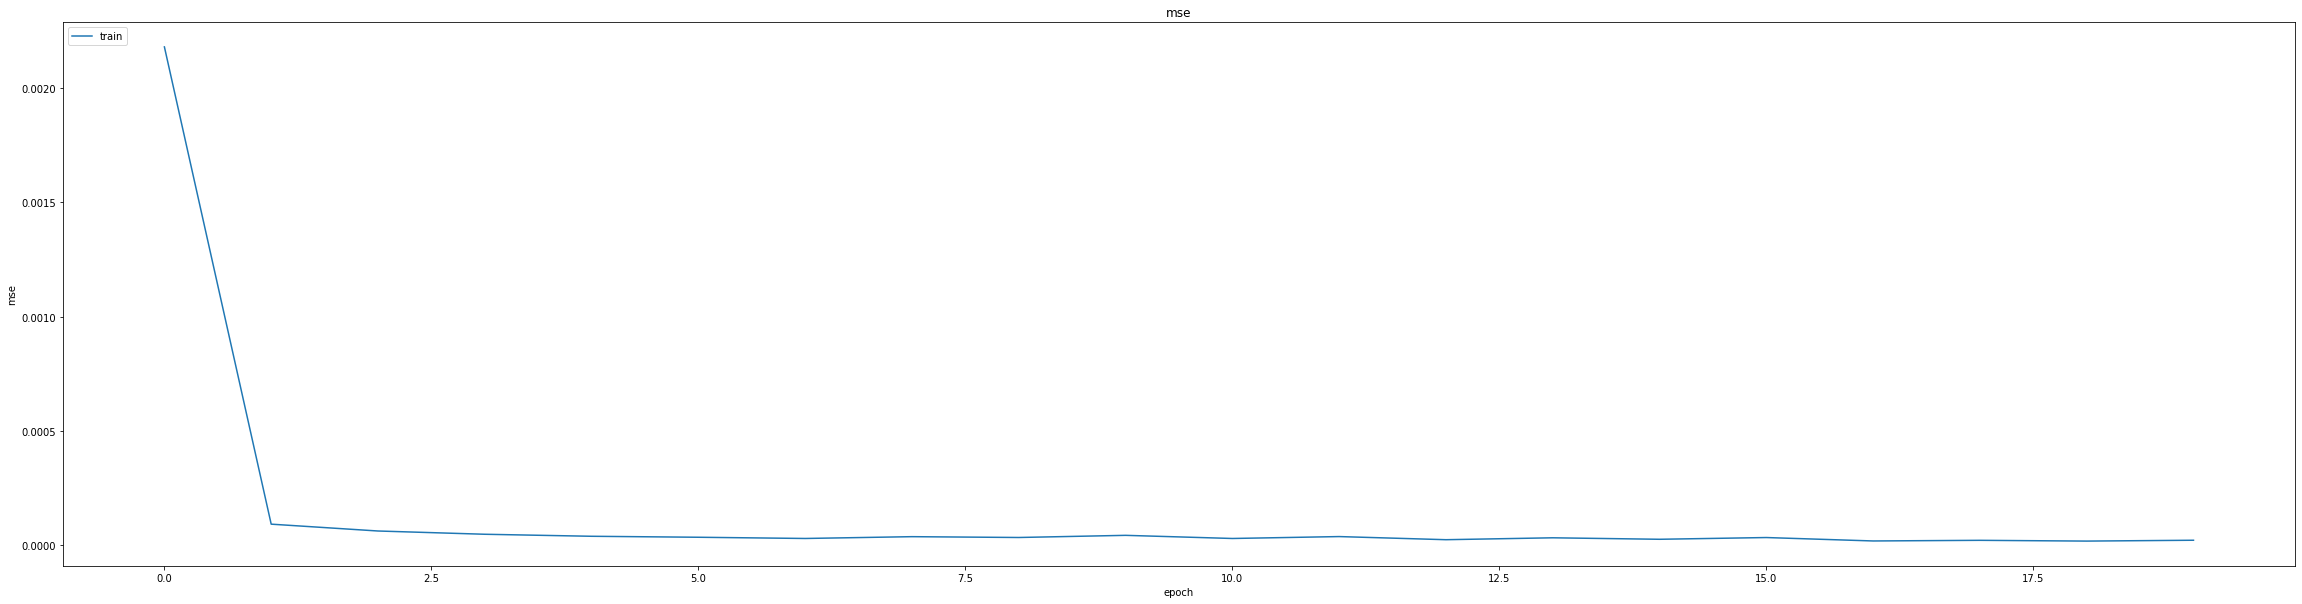

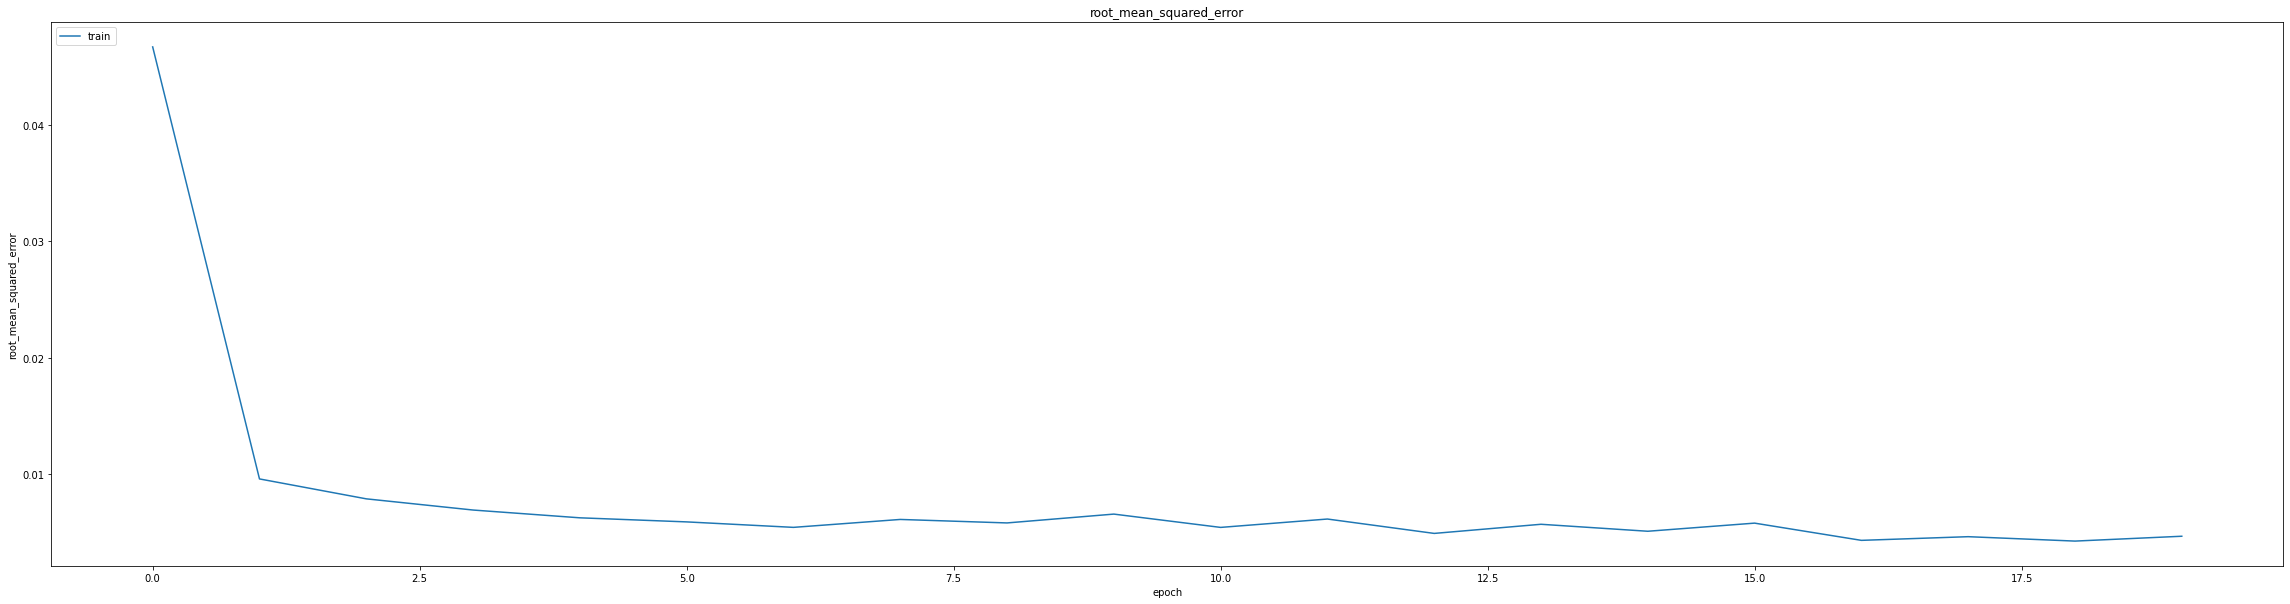

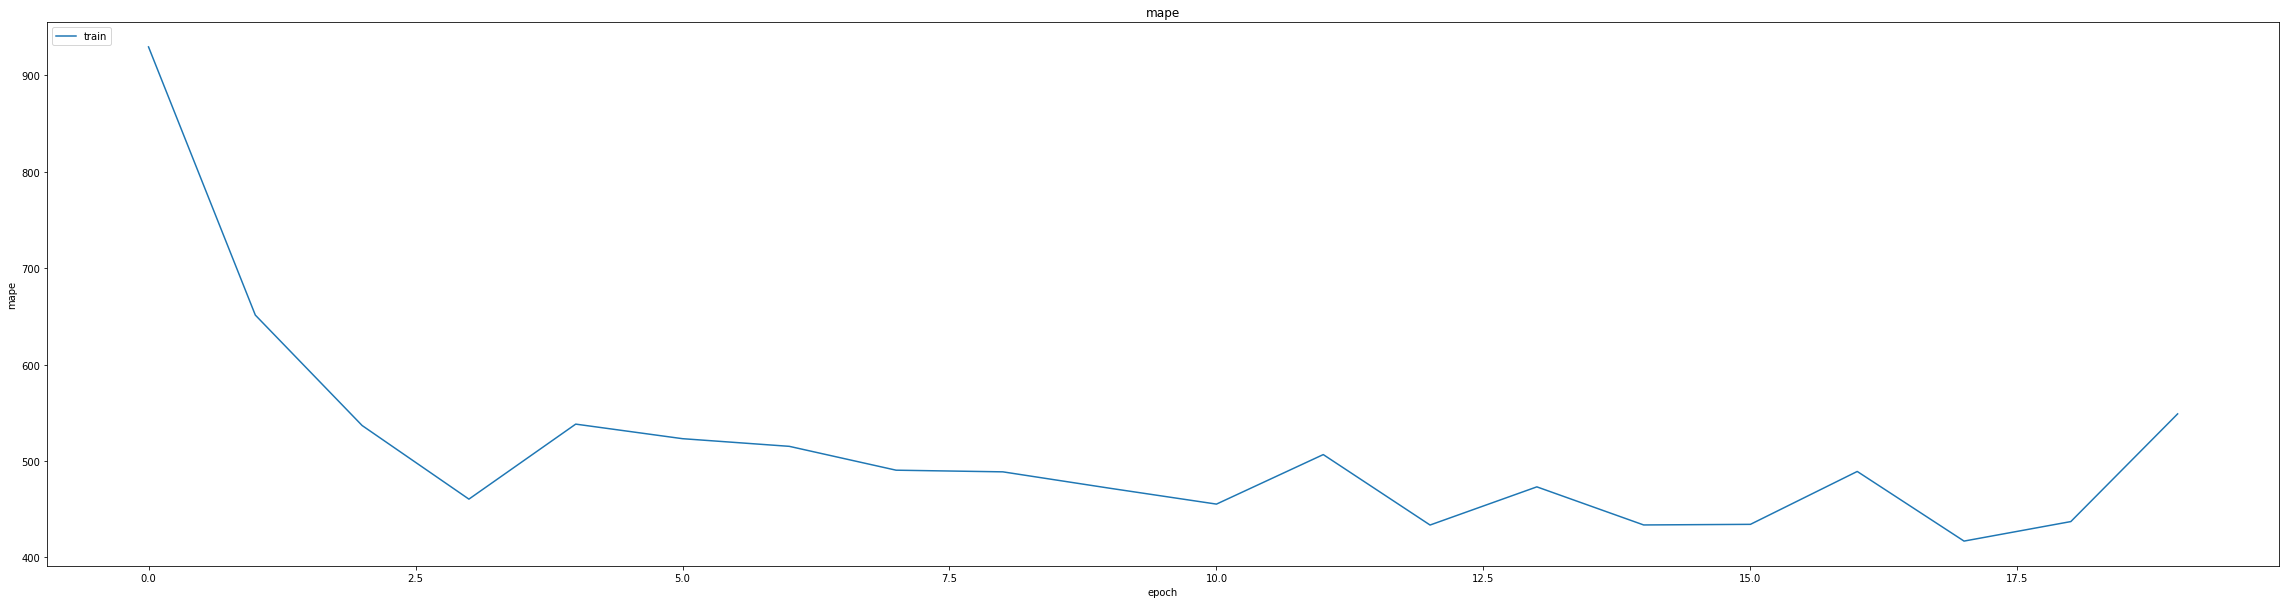

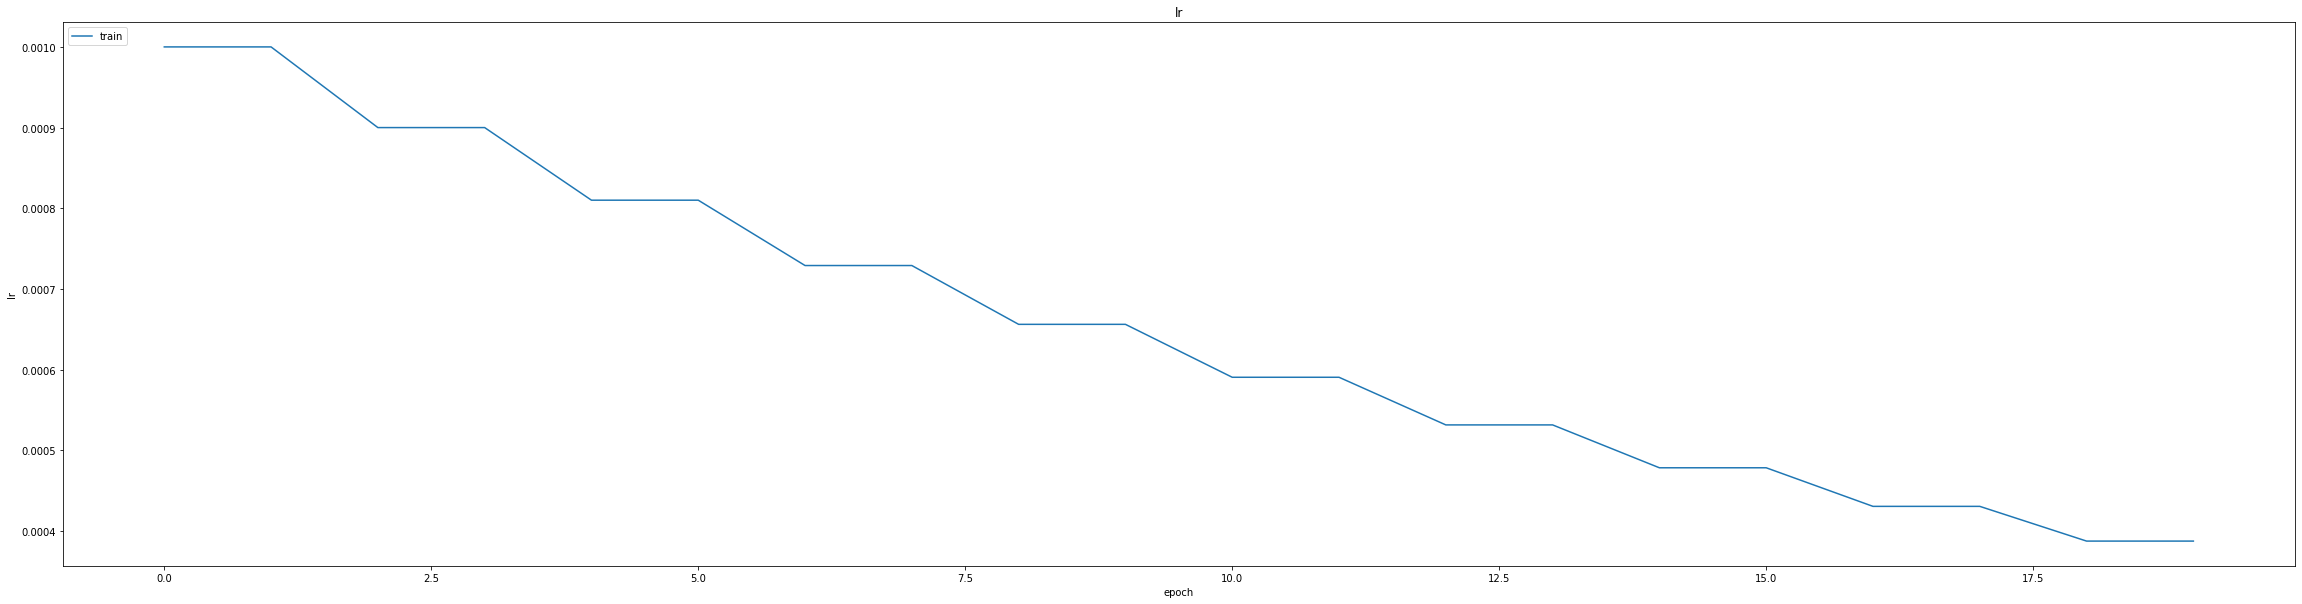

In [50]:
thesis.SummarizeHistory(history)

In [51]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.039346542209386826
0.04584184288978577
1392/1392 [==============================] - 9s 5ms/step
0.9706846591796108


1392/1392 [==============================] - 7s 5ms/step


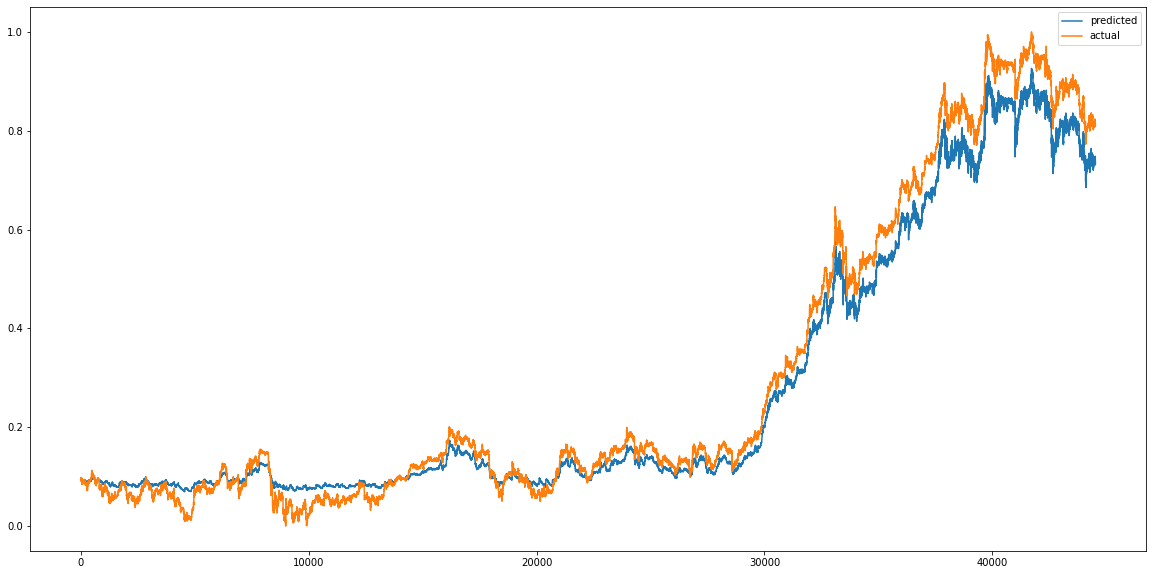

In [53]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


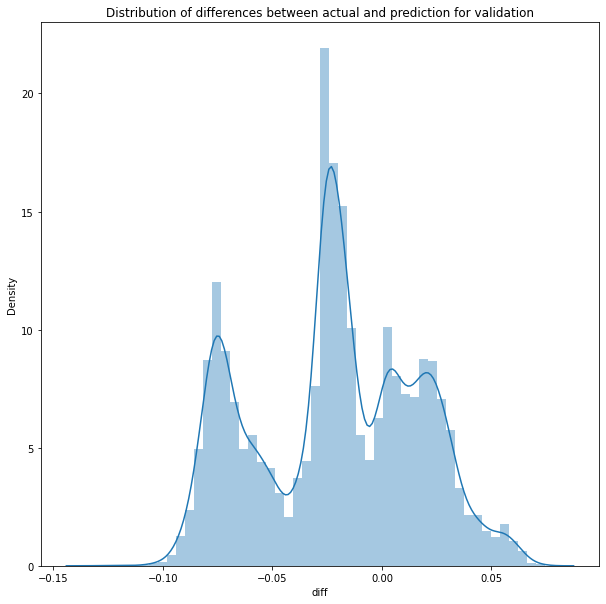

In [54]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1392/1392 [==============================] - 7s 5ms/step


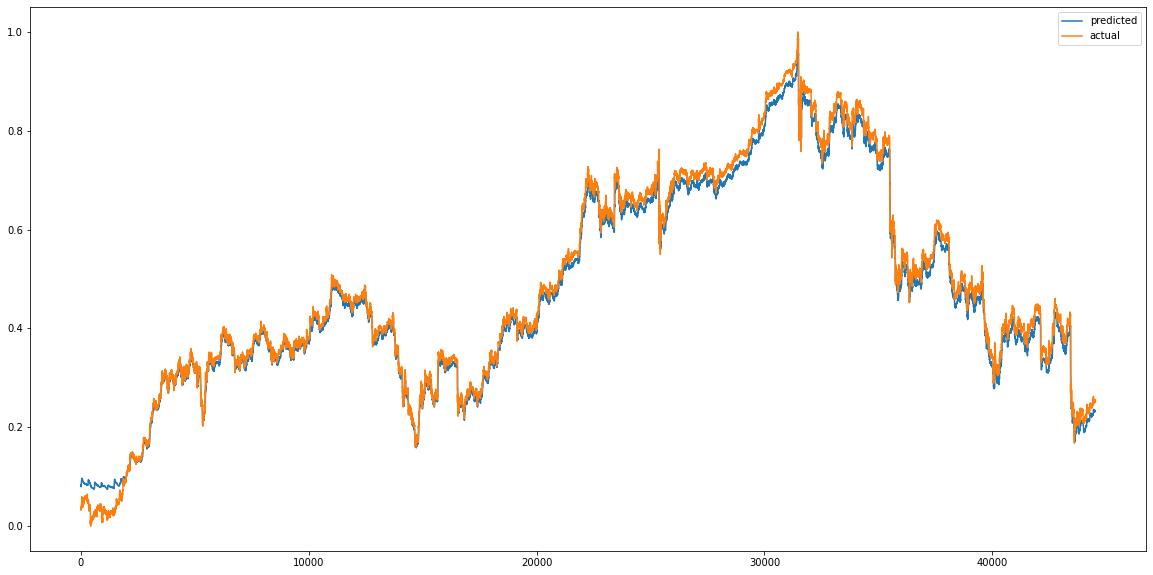

In [55]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


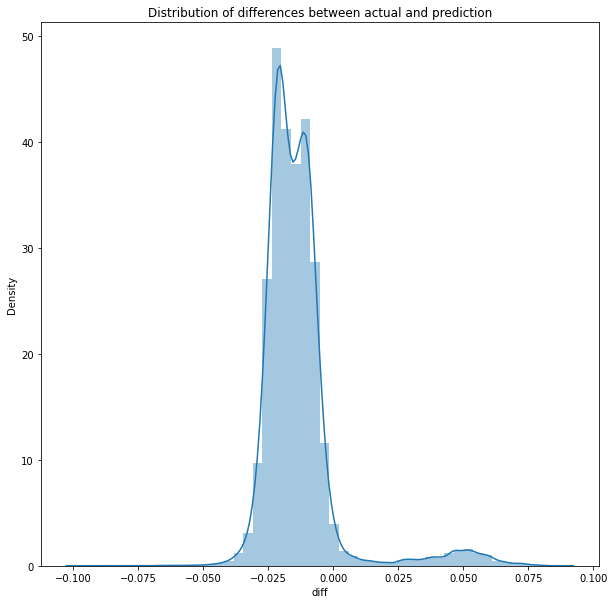

In [56]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.000410082661743381
RMSE :  0.020250497814705223
MAE :  0.01760867591882055
1392/1392 [==============================] - 7s 5ms/step
R2_Score  : 0.9914063420775624


count    44524.000000
mean        -0.013380
std          0.015201
min         -0.097291
25%         -0.021491
50%         -0.015869
75%         -0.009638
max          0.086961
Name: diff, dtype: float64

**CNN_LSTM_MODEL**

In [58]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 lstm_6 (LSTM)               (None, 24, 256)           328704    
                                                                 
 dropout_3 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                82176     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                

In [59]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
347/348 [============================>.] - ETA: 0s - loss: 645.6668 - mae: 6.2017 - mse: 645.6668 - root_mean_squared_error: 25.4100 - mape: 18272.4004
Epoch 1: val_mse improved from inf to 0.38347, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 18s 45ms/step - loss: 645.5557 - mae: 6.2007 - mse: 645.5557 - root_mean_squared_error: 25.4078 - mape: 18269.2754 - val_loss: 0.3835 - val_mae: 0.5563 - val_mse: 0.3835 - val_root_mean_squared_error: 0.6192 - val_mape: 19468.9297
Epoch 2/60
347/348 [============================>.] - ETA: 0s - loss: 0.0743 - mae: 0.2179 - mse: 0.0743 - root_mean_squared_error: 0.2726 - mape: 4872.9536
Epoch 2: val_mse improved from 0.38347 to 0.16383, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 0.0743 - mae: 0.2179 - mse: 0.0743 - root_mean_squared_error: 0.2726 - mape: 4872.1230 - val_loss: 0.1638 - val_mae: 0.3806 - val_mse: 0.1638 - val_root_mean_squared_error: 0.4048 - val_mape: 13090.5098
Epoch 3/60
348/348 [==============================] - ETA: 0s - loss: 0.0352 - mae: 0.1586 - mse: 0.0352 - root_mean_squared_error: 0.1875 - mape: 3783.4646
Epoch 3: val_mse improved from 0.16383 to 0.12544, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 0.0352 - mae: 0.1586 - mse: 0.0352 - root_mean_squared_error: 0.1875 - mape: 3783.4646 - val_loss: 0.1254 - val_mae: 0.3368 - val_mse: 0.1254 - val_root_mean_squared_error: 0.3542 - val_mape: 11080.6416
Epoch 4/60
347/348 [============================>.] - ETA: 0s - loss: 0.0334 - mae: 0.1569 - mse: 0.0334 - root_mean_squared_error: 0.1828 - mape: 3643.2244
Epoch 4: val_mse improved from 0.12544 to 0.12480, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0334 - mae: 0.1569 - mse: 0.0334 - root_mean_squared_error: 0.1828 - mape: 3642.6052 - val_loss: 0.1248 - val_mae: 0.3360 - val_mse: 0.1248 - val_root_mean_squared_error: 0.3533 - val_mape: 11068.1611
Epoch 5/60
348/348 [==============================] - ETA: 0s - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3572.4329
Epoch 5: val_mse improved from 0.12480 to 0.12406, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0332 - mae: 0.1564 - mse: 0.0332 - root_mean_squared_error: 0.1822 - mape: 3572.4329 - val_loss: 0.1241 - val_mae: 0.3349 - val_mse: 0.1241 - val_root_mean_squared_error: 0.3522 - val_mape: 11070.5264
Epoch 6/60
348/348 [==============================] - ETA: 0s - loss: 0.0328 - mae: 0.1555 - mse: 0.0328 - root_mean_squared_error: 0.1812 - mape: 3649.2190
Epoch 6: val_mse improved from 0.12406 to 0.12138, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 0.0328 - mae: 0.1555 - mse: 0.0328 - root_mean_squared_error: 0.1812 - mape: 3649.2190 - val_loss: 0.1214 - val_mae: 0.3314 - val_mse: 0.1214 - val_root_mean_squared_error: 0.3484 - val_mape: 10899.3145
Epoch 7/60
348/348 [==============================] - ETA: 0s - loss: 0.0324 - mae: 0.1546 - mse: 0.0324 - root_mean_squared_error: 0.1801 - mape: 3599.4780
Epoch 7: val_mse improved from 0.12138 to 0.12059, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0324 - mae: 0.1546 - mse: 0.0324 - root_mean_squared_error: 0.1801 - mape: 3599.4780 - val_loss: 0.1206 - val_mae: 0.3303 - val_mse: 0.1206 - val_root_mean_squared_error: 0.3473 - val_mape: 10843.4971
Epoch 8/60
345/348 [============================>.] - ETA: 0s - loss: 0.0320 - mae: 0.1534 - mse: 0.0320 - root_mean_squared_error: 0.1789 - mape: 3721.9678
Epoch 8: val_mse improved from 0.12059 to 0.11930, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 0.0320 - mae: 0.1534 - mse: 0.0320 - root_mean_squared_error: 0.1789 - mape: 3700.1411 - val_loss: 0.1193 - val_mae: 0.3285 - val_mse: 0.1193 - val_root_mean_squared_error: 0.3454 - val_mape: 10775.2451
Epoch 9/60
346/348 [============================>.] - ETA: 0s - loss: 0.0314 - mae: 0.1519 - mse: 0.0314 - root_mean_squared_error: 0.1773 - mape: 3671.9656
Epoch 9: val_mse improved from 0.11930 to 0.11726, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 0.0314 - mae: 0.1519 - mse: 0.0314 - root_mean_squared_error: 0.1773 - mape: 3660.8953 - val_loss: 0.1173 - val_mae: 0.3257 - val_mse: 0.1173 - val_root_mean_squared_error: 0.3424 - val_mape: 10662.5469
Epoch 10/60
348/348 [==============================] - ETA: 0s - loss: 0.0307 - mae: 0.1498 - mse: 0.0307 - root_mean_squared_error: 0.1751 - mape: 3665.8850
Epoch 10: val_mse improved from 0.11726 to 0.11511, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0307 - mae: 0.1498 - mse: 0.0307 - root_mean_squared_error: 0.1751 - mape: 3665.8850 - val_loss: 0.1151 - val_mae: 0.3226 - val_mse: 0.1151 - val_root_mean_squared_error: 0.3393 - val_mape: 10573.1387
Epoch 11/60
348/348 [==============================] - ETA: 0s - loss: 0.0288 - mae: 0.1445 - mse: 0.0288 - root_mean_squared_error: 0.1696 - mape: 3364.0410
Epoch 11: val_mse improved from 0.11511 to 0.10337, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 0.0288 - mae: 0.1445 - mse: 0.0288 - root_mean_squared_error: 0.1696 - mape: 3364.0410 - val_loss: 0.1034 - val_mae: 0.3054 - val_mse: 0.1034 - val_root_mean_squared_error: 0.3215 - val_mape: 10048.3271
Epoch 12/60
345/348 [============================>.] - ETA: 0s - loss: 0.0178 - mae: 0.1078 - mse: 0.0178 - root_mean_squared_error: 0.1333 - mape: 3176.4771
Epoch 12: val_mse improved from 0.10337 to 0.03882, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0177 - mae: 0.1076 - mse: 0.0177 - root_mean_squared_error: 0.1331 - mape: 3157.7449 - val_loss: 0.0388 - val_mae: 0.1833 - val_mse: 0.0388 - val_root_mean_squared_error: 0.1970 - val_mape: 7181.5015
Epoch 13/60
345/348 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0333 - mse: 0.0021 - root_mean_squared_error: 0.0453 - mape: 1785.0001
Epoch 13: val_mse improved from 0.03882 to 0.00772, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 0.0020 - mae: 0.0332 - mse: 0.0020 - root_mean_squared_error: 0.0453 - mape: 1774.4473 - val_loss: 0.0077 - val_mae: 0.0725 - val_mse: 0.0077 - val_root_mean_squared_error: 0.0879 - val_mape: 4550.9858
Epoch 14/60
347/348 [============================>.] - ETA: 0s - loss: 7.6634e-04 - mae: 0.0213 - mse: 7.6634e-04 - root_mean_squared_error: 0.0277 - mape: 1498.1741
Epoch 14: val_mse improved from 0.00772 to 0.00558, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 7.6628e-04 - mae: 0.0213 - mse: 7.6628e-04 - root_mean_squared_error: 0.0277 - mape: 1497.9169 - val_loss: 0.0056 - val_mae: 0.0599 - val_mse: 0.0056 - val_root_mean_squared_error: 0.0747 - val_mape: 4147.9551
Epoch 15/60
345/348 [============================>.] - ETA: 0s - loss: 6.3501e-04 - mae: 0.0193 - mse: 6.3501e-04 - root_mean_squared_error: 0.0252 - mape: 1320.3295
Epoch 15: val_mse improved from 0.00558 to 0.00476, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 6.3521e-04 - mae: 0.0193 - mse: 6.3521e-04 - root_mean_squared_error: 0.0252 - mape: 1312.5236 - val_loss: 0.0048 - val_mae: 0.0550 - val_mse: 0.0048 - val_root_mean_squared_error: 0.0690 - val_mape: 3953.6348
Epoch 16/60
347/348 [============================>.] - ETA: 0s - loss: 5.7789e-04 - mae: 0.0183 - mse: 5.7789e-04 - root_mean_squared_error: 0.0240 - mape: 1370.5569
Epoch 16: val_mse improved from 0.00476 to 0.00445, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 5.7786e-04 - mae: 0.0183 - mse: 5.7786e-04 - root_mean_squared_error: 0.0240 - mape: 1370.3219 - val_loss: 0.0045 - val_mae: 0.0538 - val_mse: 0.0045 - val_root_mean_squared_error: 0.0667 - val_mape: 3856.3572
Epoch 17/60
346/348 [============================>.] - ETA: 0s - loss: 5.3351e-04 - mae: 0.0176 - mse: 5.3351e-04 - root_mean_squared_error: 0.0231 - mape: 1303.0706
Epoch 17: val_mse improved from 0.00445 to 0.00424, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 5.3315e-04 - mae: 0.0176 - mse: 5.3315e-04 - root_mean_squared_error: 0.0231 - mape: 1299.1041 - val_loss: 0.0042 - val_mae: 0.0529 - val_mse: 0.0042 - val_root_mean_squared_error: 0.0651 - val_mape: 3784.8328
Epoch 18/60
348/348 [==============================] - ETA: 0s - loss: 4.9733e-04 - mae: 0.0170 - mse: 4.9733e-04 - root_mean_squared_error: 0.0223 - mape: 1215.3900
Epoch 18: val_mse improved from 0.00424 to 0.00393, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 4.9733e-04 - mae: 0.0170 - mse: 4.9733e-04 - root_mean_squared_error: 0.0223 - mape: 1215.3900 - val_loss: 0.0039 - val_mae: 0.0501 - val_mse: 0.0039 - val_root_mean_squared_error: 0.0627 - val_mape: 3717.2478
Epoch 19/60
346/348 [============================>.] - ETA: 0s - loss: 4.6019e-04 - mae: 0.0163 - mse: 4.6019e-04 - root_mean_squared_error: 0.0215 - mape: 1202.9845
Epoch 19: val_mse improved from 0.00393 to 0.00378, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 4.6034e-04 - mae: 0.0163 - mse: 4.6034e-04 - root_mean_squared_error: 0.0215 - mape: 1199.3248 - val_loss: 0.0038 - val_mae: 0.0490 - val_mse: 0.0038 - val_root_mean_squared_error: 0.0614 - val_mape: 3671.4680
Epoch 20/60
347/348 [============================>.] - ETA: 0s - loss: 4.3805e-04 - mae: 0.0159 - mse: 4.3805e-04 - root_mean_squared_error: 0.0209 - mape: 1187.7037
Epoch 20: val_mse improved from 0.00378 to 0.00358, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 4.3807e-04 - mae: 0.0159 - mse: 4.3807e-04 - root_mean_squared_error: 0.0209 - mape: 1187.4999 - val_loss: 0.0036 - val_mae: 0.0475 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0599 - val_mape: 3627.8430
Epoch 21/60
348/348 [==============================] - ETA: 0s - loss: 4.1127e-04 - mae: 0.0154 - mse: 4.1127e-04 - root_mean_squared_error: 0.0203 - mape: 1207.4193
Epoch 21: val_mse improved from 0.00358 to 0.00339, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 4.1127e-04 - mae: 0.0154 - mse: 4.1127e-04 - root_mean_squared_error: 0.0203 - mape: 1207.4193 - val_loss: 0.0034 - val_mae: 0.0459 - val_mse: 0.0034 - val_root_mean_squared_error: 0.0582 - val_mape: 3572.5889
Epoch 22/60
348/348 [==============================] - ETA: 0s - loss: 3.8435e-04 - mae: 0.0150 - mse: 3.8435e-04 - root_mean_squared_error: 0.0196 - mape: 1193.0334
Epoch 22: val_mse improved from 0.00339 to 0.00327, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 3.8435e-04 - mae: 0.0150 - mse: 3.8435e-04 - root_mean_squared_error: 0.0196 - mape: 1193.0334 - val_loss: 0.0033 - val_mae: 0.0463 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0572 - val_mape: 3494.2412
Epoch 23/60
345/348 [============================>.] - ETA: 0s - loss: 3.6548e-04 - mae: 0.0146 - mse: 3.6548e-04 - root_mean_squared_error: 0.0191 - mape: 1152.3096
Epoch 23: val_mse improved from 0.00327 to 0.00312, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 3.6534e-04 - mae: 0.0146 - mse: 3.6534e-04 - root_mean_squared_error: 0.0191 - mape: 1145.4926 - val_loss: 0.0031 - val_mae: 0.0450 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0559 - val_mape: 3443.3435
Epoch 24/60
346/348 [============================>.] - ETA: 0s - loss: 3.4278e-04 - mae: 0.0142 - mse: 3.4278e-04 - root_mean_squared_error: 0.0185 - mape: 1117.9088
Epoch 24: val_mse improved from 0.00312 to 0.00291, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 3.4266e-04 - mae: 0.0142 - mse: 3.4266e-04 - root_mean_squared_error: 0.0185 - mape: 1114.5063 - val_loss: 0.0029 - val_mae: 0.0430 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0540 - val_mape: 3393.5076
Epoch 25/60
345/348 [============================>.] - ETA: 0s - loss: 3.2694e-04 - mae: 0.0138 - mse: 3.2694e-04 - root_mean_squared_error: 0.0181 - mape: 1093.9039
Epoch 25: val_mse improved from 0.00291 to 0.00276, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 3.2675e-04 - mae: 0.0138 - mse: 3.2675e-04 - root_mean_squared_error: 0.0181 - mape: 1087.4312 - val_loss: 0.0028 - val_mae: 0.0416 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0525 - val_mape: 3343.0125
Epoch 26/60
346/348 [============================>.] - ETA: 0s - loss: 3.0458e-04 - mae: 0.0134 - mse: 3.0458e-04 - root_mean_squared_error: 0.0175 - mape: 1068.0006
Epoch 26: val_mse improved from 0.00276 to 0.00260, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 3.0445e-04 - mae: 0.0134 - mse: 3.0445e-04 - root_mean_squared_error: 0.0174 - mape: 1064.7491 - val_loss: 0.0026 - val_mae: 0.0407 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0510 - val_mape: 3272.0479
Epoch 27/60
346/348 [============================>.] - ETA: 0s - loss: 2.8414e-04 - mae: 0.0129 - mse: 2.8414e-04 - root_mean_squared_error: 0.0169 - mape: 1123.4790
Epoch 27: val_mse improved from 0.00260 to 0.00245, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 2.8414e-04 - mae: 0.0129 - mse: 2.8414e-04 - root_mean_squared_error: 0.0169 - mape: 1120.0582 - val_loss: 0.0025 - val_mae: 0.0399 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0495 - val_mape: 3203.6785
Epoch 28/60
345/348 [============================>.] - ETA: 0s - loss: 2.6433e-04 - mae: 0.0125 - mse: 2.6433e-04 - root_mean_squared_error: 0.0163 - mape: 1048.8251
Epoch 28: val_mse improved from 0.00245 to 0.00220, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 2.6419e-04 - mae: 0.0125 - mse: 2.6419e-04 - root_mean_squared_error: 0.0163 - mape: 1042.6184 - val_loss: 0.0022 - val_mae: 0.0369 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0469 - val_mape: 3133.0017
Epoch 29/60
345/348 [============================>.] - ETA: 0s - loss: 2.4699e-04 - mae: 0.0121 - mse: 2.4699e-04 - root_mean_squared_error: 0.0157 - mape: 1018.6625
Epoch 29: val_mse improved from 0.00220 to 0.00208, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 2.4710e-04 - mae: 0.0121 - mse: 2.4710e-04 - root_mean_squared_error: 0.0157 - mape: 1012.6346 - val_loss: 0.0021 - val_mae: 0.0364 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0456 - val_mape: 3058.9917
Epoch 30/60
346/348 [============================>.] - ETA: 0s - loss: 2.3118e-04 - mae: 0.0116 - mse: 2.3118e-04 - root_mean_squared_error: 0.0152 - mape: 1040.2009
Epoch 30: val_mse improved from 0.00208 to 0.00194, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 2.3120e-04 - mae: 0.0116 - mse: 2.3120e-04 - root_mean_squared_error: 0.0152 - mape: 1037.0336 - val_loss: 0.0019 - val_mae: 0.0359 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0440 - val_mape: 2970.8782
Epoch 31/60
345/348 [============================>.] - ETA: 0s - loss: 2.0967e-04 - mae: 0.0111 - mse: 2.0967e-04 - root_mean_squared_error: 0.0145 - mape: 962.6928
Epoch 31: val_mse improved from 0.00194 to 0.00190, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 2.0959e-04 - mae: 0.0111 - mse: 2.0959e-04 - root_mean_squared_error: 0.0145 - mape: 956.9950 - val_loss: 0.0019 - val_mae: 0.0368 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0436 - val_mape: 2887.4653
Epoch 32/60
346/348 [============================>.] - ETA: 0s - loss: 1.9344e-04 - mae: 0.0107 - mse: 1.9344e-04 - root_mean_squared_error: 0.0139 - mape: 945.4349
Epoch 32: val_mse improved from 0.00190 to 0.00184, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 42ms/step - loss: 1.9343e-04 - mae: 0.0107 - mse: 1.9343e-04 - root_mean_squared_error: 0.0139 - mape: 942.5559 - val_loss: 0.0018 - val_mae: 0.0365 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0429 - val_mape: 2829.8147
Epoch 33/60
348/348 [==============================] - ETA: 0s - loss: 1.7836e-04 - mae: 0.0103 - mse: 1.7836e-04 - root_mean_squared_error: 0.0134 - mape: 925.2451
Epoch 33: val_mse improved from 0.00184 to 0.00176, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 1.7836e-04 - mae: 0.0103 - mse: 1.7836e-04 - root_mean_squared_error: 0.0134 - mape: 925.2451 - val_loss: 0.0018 - val_mae: 0.0357 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0420 - val_mape: 2743.2397
Epoch 34/60
346/348 [============================>.] - ETA: 0s - loss: 1.6460e-04 - mae: 0.0098 - mse: 1.6460e-04 - root_mean_squared_error: 0.0128 - mape: 894.0385
Epoch 34: val_mse improved from 0.00176 to 0.00151, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 1.6464e-04 - mae: 0.0098 - mse: 1.6464e-04 - root_mean_squared_error: 0.0128 - mape: 891.3187 - val_loss: 0.0015 - val_mae: 0.0328 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0388 - val_mape: 2688.1113
Epoch 35/60
345/348 [============================>.] - ETA: 0s - loss: 1.4741e-04 - mae: 0.0093 - mse: 1.4741e-04 - root_mean_squared_error: 0.0121 - mape: 874.7502
Epoch 35: val_mse improved from 0.00151 to 0.00139, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 1.4738e-04 - mae: 0.0093 - mse: 1.4738e-04 - root_mean_squared_error: 0.0121 - mape: 869.5727 - val_loss: 0.0014 - val_mae: 0.0315 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0372 - val_mape: 2620.1309
Epoch 36/60
346/348 [============================>.] - ETA: 0s - loss: 1.3359e-04 - mae: 0.0089 - mse: 1.3359e-04 - root_mean_squared_error: 0.0116 - mape: 859.0912
Epoch 36: val_mse improved from 0.00139 to 0.00129, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 1.3358e-04 - mae: 0.0089 - mse: 1.3358e-04 - root_mean_squared_error: 0.0116 - mape: 856.4749 - val_loss: 0.0013 - val_mae: 0.0304 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0359 - val_mape: 2566.3057
Epoch 37/60
345/348 [============================>.] - ETA: 0s - loss: 1.2282e-04 - mae: 0.0085 - mse: 1.2282e-04 - root_mean_squared_error: 0.0111 - mape: 867.3925
Epoch 37: val_mse did not improve from 0.00129
348/348 [==============================] - 6s 17ms/step - loss: 1.2291e-04 - mae: 0.0085 - mse: 1.2291e-04 - root_mean_squared_error: 0.0111 - mape: 862.2590 - val_loss: 0.0013 - val_mae: 0.0317 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0365 - val_mape: 2508.6370
Epoch 38/60
345/348 [============================>.] - ETA: 0s - loss: 1.0947e-04 - mae: 0.0080 - mse: 1.0947e-04 - root_mean_squared_error: 0.0105 - mape: 875.0312
Epoch 38: val_mse did not improve from 0.00129
348/348 [====================

348/348 [==============================] - 14s 41ms/step - loss: 9.4906e-05 - mae: 0.0074 - mse: 9.4906e-05 - root_mean_squared_error: 0.0097 - mape: 804.8495 - val_loss: 0.0013 - val_mae: 0.0316 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0356 - val_mape: 2383.4055
Epoch 41/60
347/348 [============================>.] - ETA: 0s - loss: 8.7447e-05 - mae: 0.0071 - mse: 8.7447e-05 - root_mean_squared_error: 0.0094 - mape: 766.9628
Epoch 41: val_mse improved from 0.00127 to 0.00125, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 8.7461e-05 - mae: 0.0071 - mse: 8.7461e-05 - root_mean_squared_error: 0.0094 - mape: 766.8317 - val_loss: 0.0012 - val_mae: 0.0314 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0353 - val_mape: 2363.7502
Epoch 42/60
347/348 [============================>.] - ETA: 0s - loss: 8.3158e-05 - mae: 0.0069 - mse: 8.3158e-05 - root_mean_squared_error: 0.0091 - mape: 798.9794
Epoch 42: val_mse improved from 0.00125 to 0.00114, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 8.3153e-05 - mae: 0.0069 - mse: 8.3153e-05 - root_mean_squared_error: 0.0091 - mape: 798.8420 - val_loss: 0.0011 - val_mae: 0.0303 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0337 - val_mape: 2315.7959
Epoch 43/60
348/348 [==============================] - ETA: 0s - loss: 8.0064e-05 - mae: 0.0067 - mse: 8.0064e-05 - root_mean_squared_error: 0.0089 - mape: 779.9705
Epoch 43: val_mse improved from 0.00114 to 0.00093, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 8.0064e-05 - mae: 0.0067 - mse: 8.0064e-05 - root_mean_squared_error: 0.0089 - mape: 779.9705 - val_loss: 9.3398e-04 - val_mae: 0.0258 - val_mse: 9.3398e-04 - val_root_mean_squared_error: 0.0306 - val_mape: 2336.9531
Epoch 44/60
346/348 [============================>.] - ETA: 0s - loss: 7.5605e-05 - mae: 0.0065 - mse: 7.5605e-05 - root_mean_squared_error: 0.0087 - mape: 798.3188
Epoch 44: val_mse did not improve from 0.00093
348/348 [==============================] - 6s 17ms/step - loss: 7.5598e-05 - mae: 0.0065 - mse: 7.5598e-05 - root_mean_squared_error: 0.0087 - mape: 795.8859 - val_loss: 0.0014 - val_mae: 0.0336 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0371 - val_mape: 2284.2292
Epoch 45/60
346/348 [============================>.] - ETA: 0s - loss: 7.1811e-05 - mae: 0.0064 - mse: 7.1811e-05 - root_mean_squared_error: 0.0085 - mape: 760.4460
Epoch 45: val_mse did not improve from 0.00093
348/348 [============

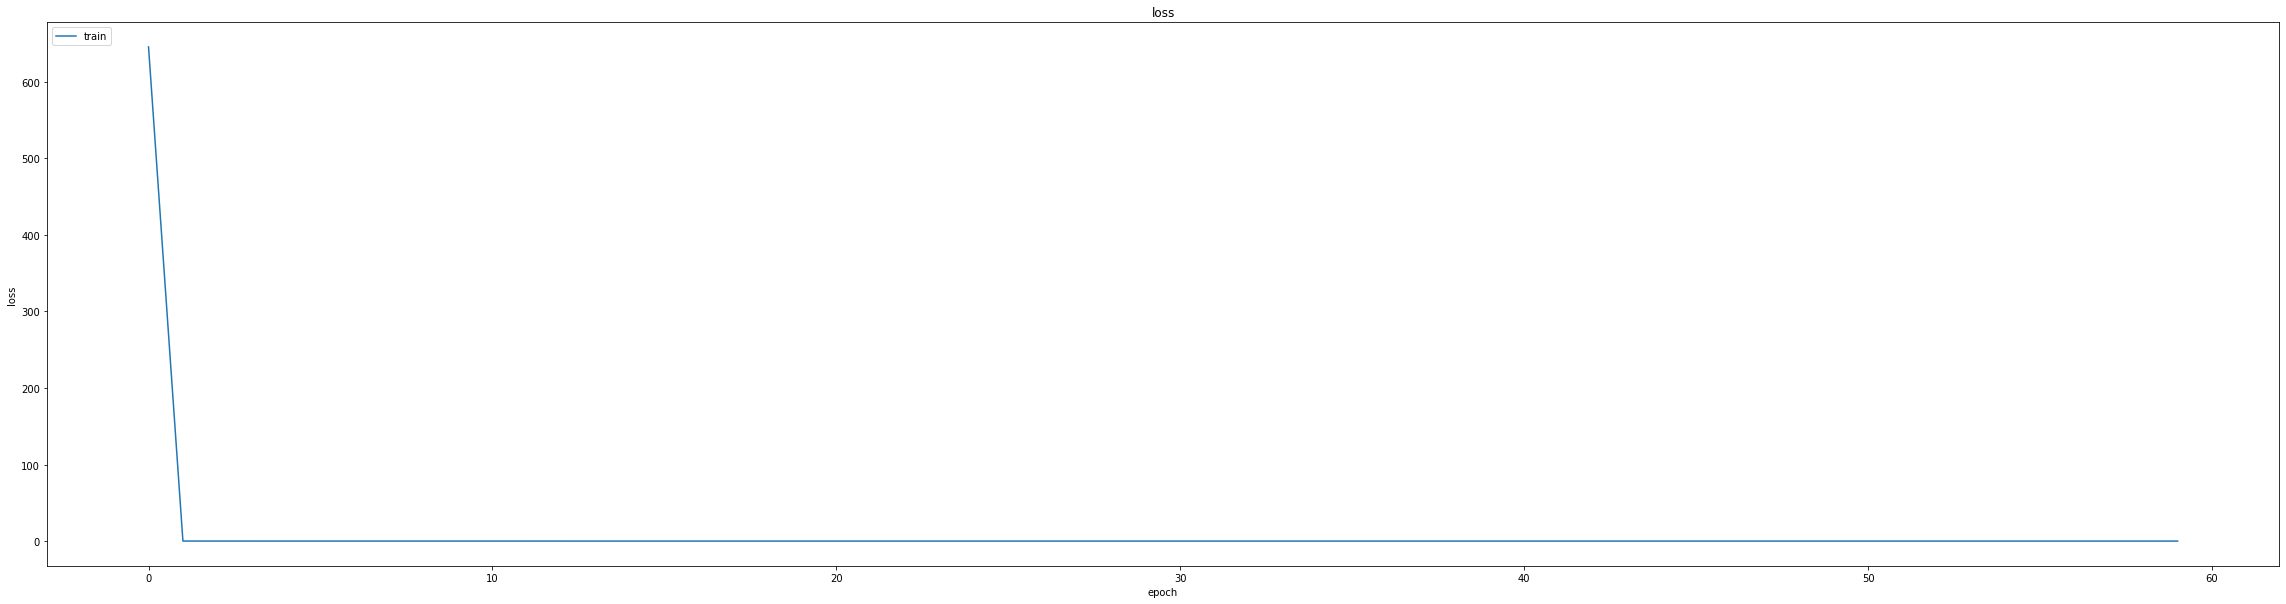

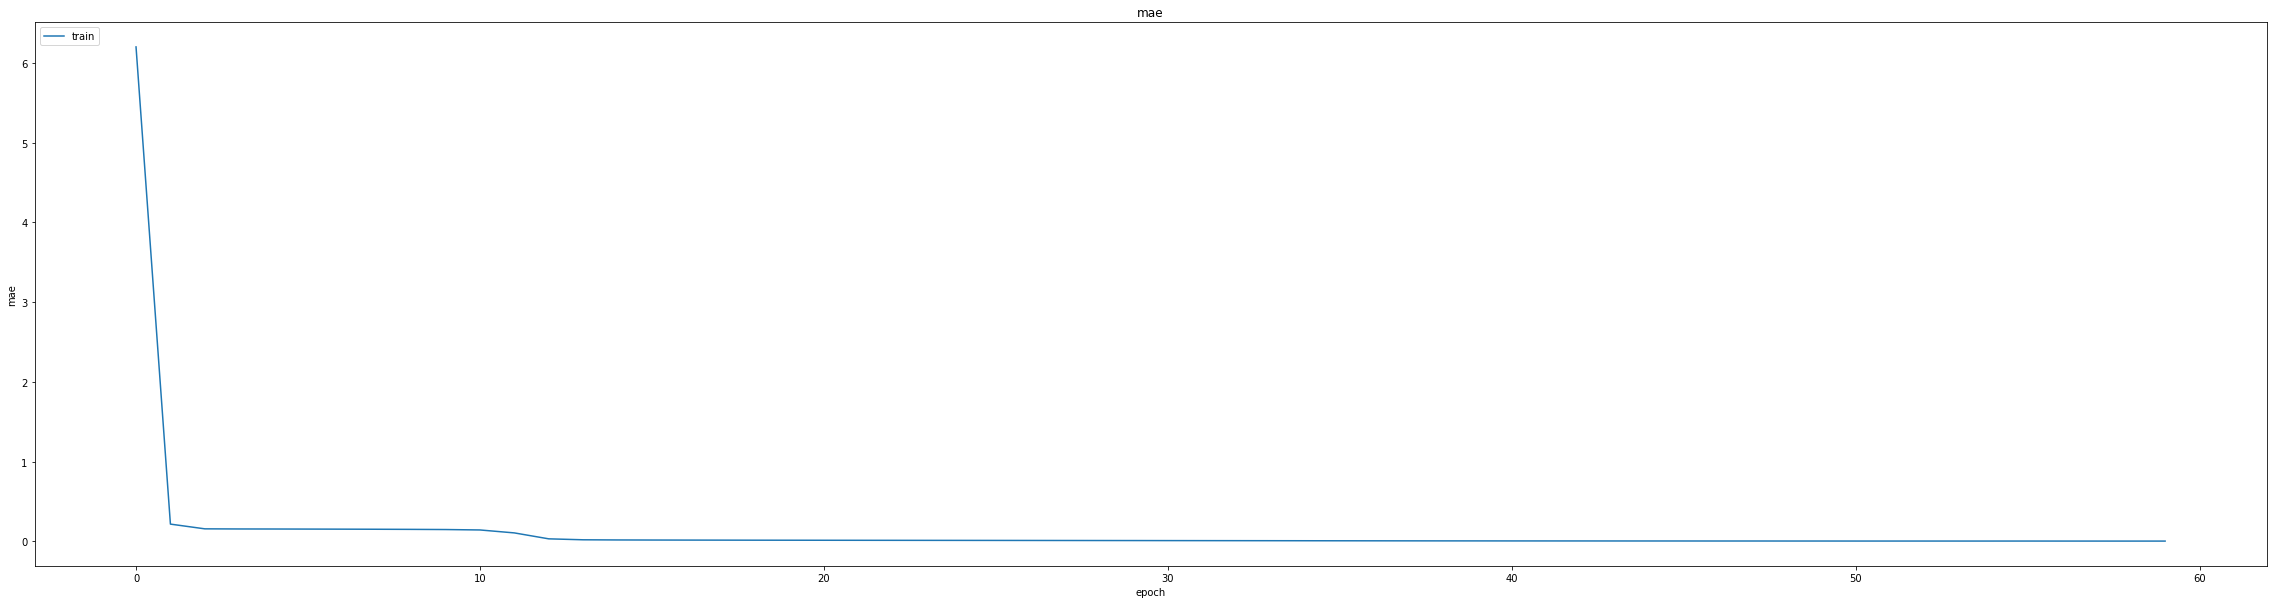

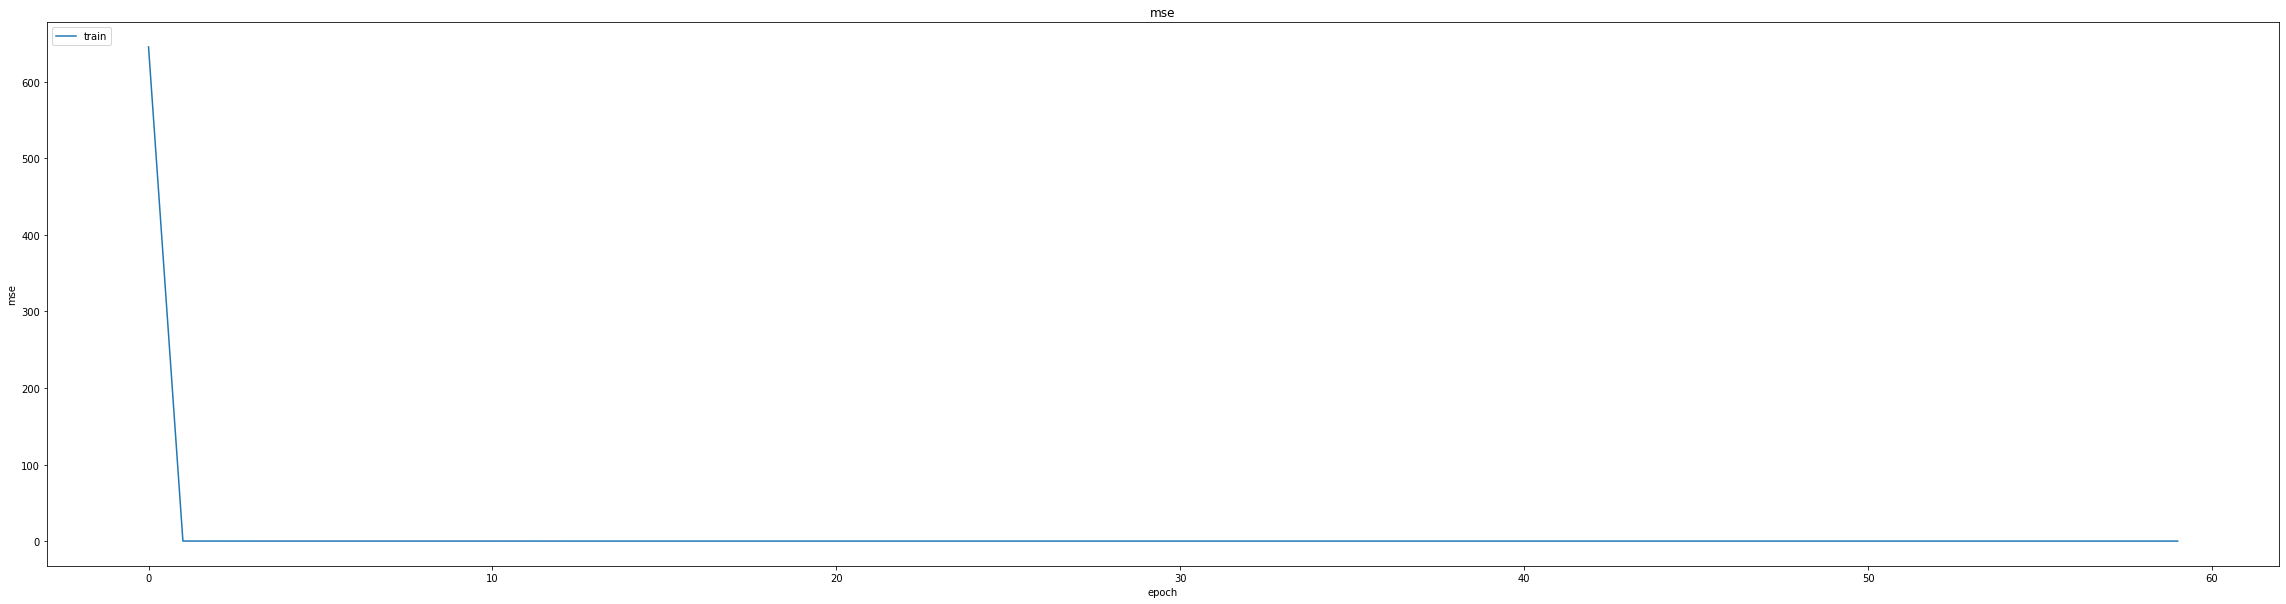

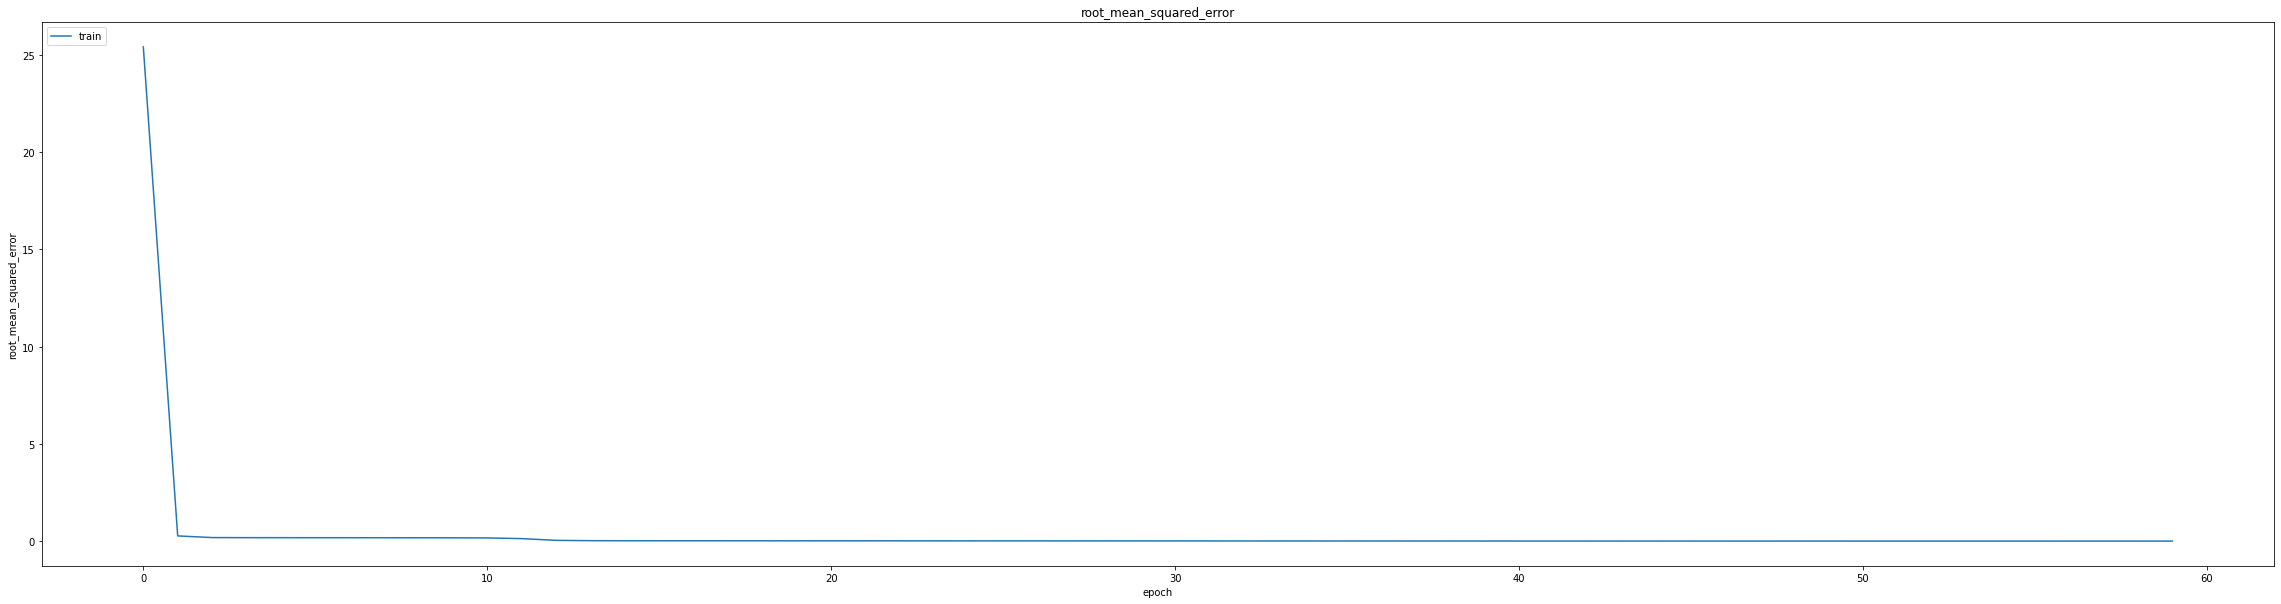

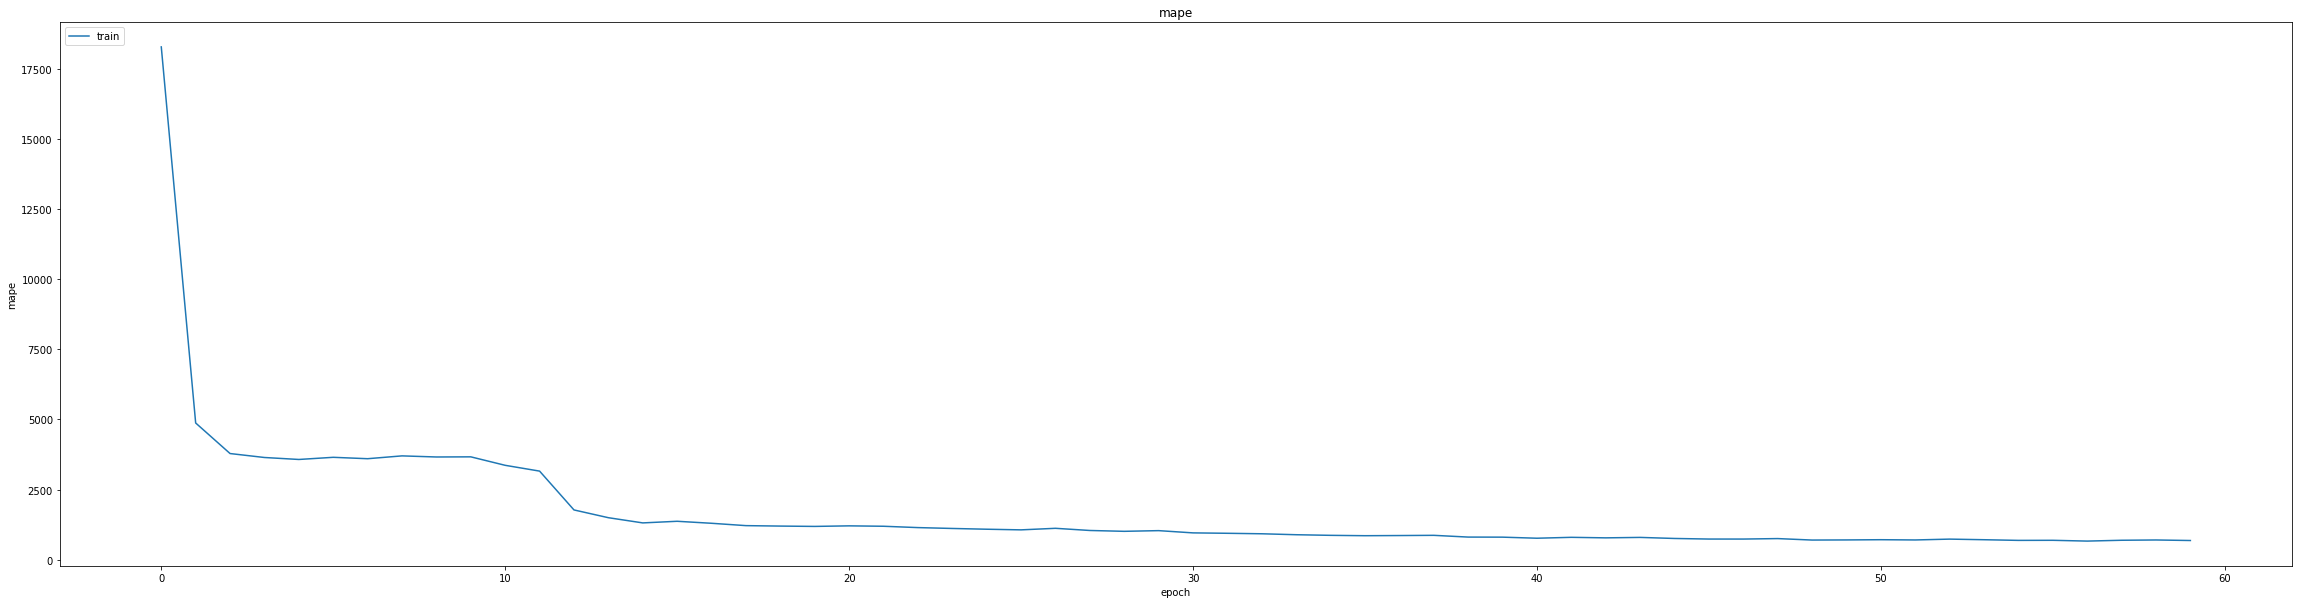

In [60]:
thesis.SummarizeHistory(history)

In [61]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.025826346129179
0.0305610504001379
1392/1392 [==============================] - 5s 3ms/step
0.9802621675179284


In [63]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [64]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
347/348 [============================>.] - ETA: 0s - loss: 3.8814e-04 - mae: 0.0102 - mse: 3.8814e-04 - root_mean_squared_error: 0.0197 - mape: 848.0321
Epoch 1: val_mse did not improve from 0.00093
348/348 [==============================] - 10s 19ms/step - loss: 3.8808e-04 - mae: 0.0102 - mse: 3.8808e-04 - root_mean_squared_error: 0.0197 - mape: 847.8863 - val_loss: 0.0011 - val_mae: 0.0296 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0332 - val_mape: 2297.5549 - lr: 0.0010
Epoch 2/20
345/348 [============================>.] - ETA: 0s - loss: 6.1518e-05 - mae: 0.0059 - mse: 6.1518e-05 - root_mean_squared_error: 0.0078 - mape: 763.7886
Epoch 2: val_mse improved from 0.00093 to 0.00082, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 6.1457e-05 - mae: 0.0059 - mse: 6.1457e-05 - root_mean_squared_error: 0.0078 - mape: 759.2651 - val_loss: 8.1880e-04 - val_mae: 0.0255 - val_mse: 8.1880e-04 - val_root_mean_squared_error: 0.0286 - val_mape: 2132.5901 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
347/348 [============================>.] - ETA: 0s - loss: 5.1095e-05 - mae: 0.0054 - mse: 5.1095e-05 - root_mean_squared_error: 0.0071 - mape: 729.3361
Epoch 3: val_mse did not improve from 0.00082
348/348 [==============================] - 6s 17ms/step - loss: 5.1098e-05 - mae: 0.0054 - mse: 5.1098e-05 - root_mean_squared_error: 0.0071 - mape: 729.2110 - val_loss: 0.0011 - val_mae: 0.0303 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0332 - val_mape: 1990.1613 - lr: 9.0000e-04
Epoch 4/20
346/348 [============================>.] - ETA: 0s - loss: 4.8877e-05 - mae: 0.0053 - mse: 4.8877e-05 - root_mean_squared_error: 0.0070 - mape: 684.7429
Epoch

348/348 [==============================] - 15s 42ms/step - loss: 4.6503e-05 - mae: 0.0051 - mse: 4.6503e-05 - root_mean_squared_error: 0.0068 - mape: 636.2497 - val_loss: 5.3238e-04 - val_mae: 0.0204 - val_mse: 5.3238e-04 - val_root_mean_squared_error: 0.0231 - val_mape: 1845.1040 - lr: 8.1000e-04
Epoch 6/20
346/348 [============================>.] - ETA: 0s - loss: 4.4713e-05 - mae: 0.0050 - mse: 4.4713e-05 - root_mean_squared_error: 0.0067 - mape: 646.7344
Epoch 6: val_mse did not improve from 0.00053
348/348 [==============================] - 6s 17ms/step - loss: 4.4691e-05 - mae: 0.0050 - mse: 4.4691e-05 - root_mean_squared_error: 0.0067 - mape: 644.7633 - val_loss: 16.1040 - val_mae: 0.1617 - val_mse: 16.1040 - val_root_mean_squared_error: 4.0130 - val_mape: 2045.1818 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/20
345/348 [============================>.] - ETA: 0s - loss: 4.4749e-05 - mae: 0.0050 - mse: 4.4749e-05 - root_mean_squared_error: 0.0067 - mape: 614.9026

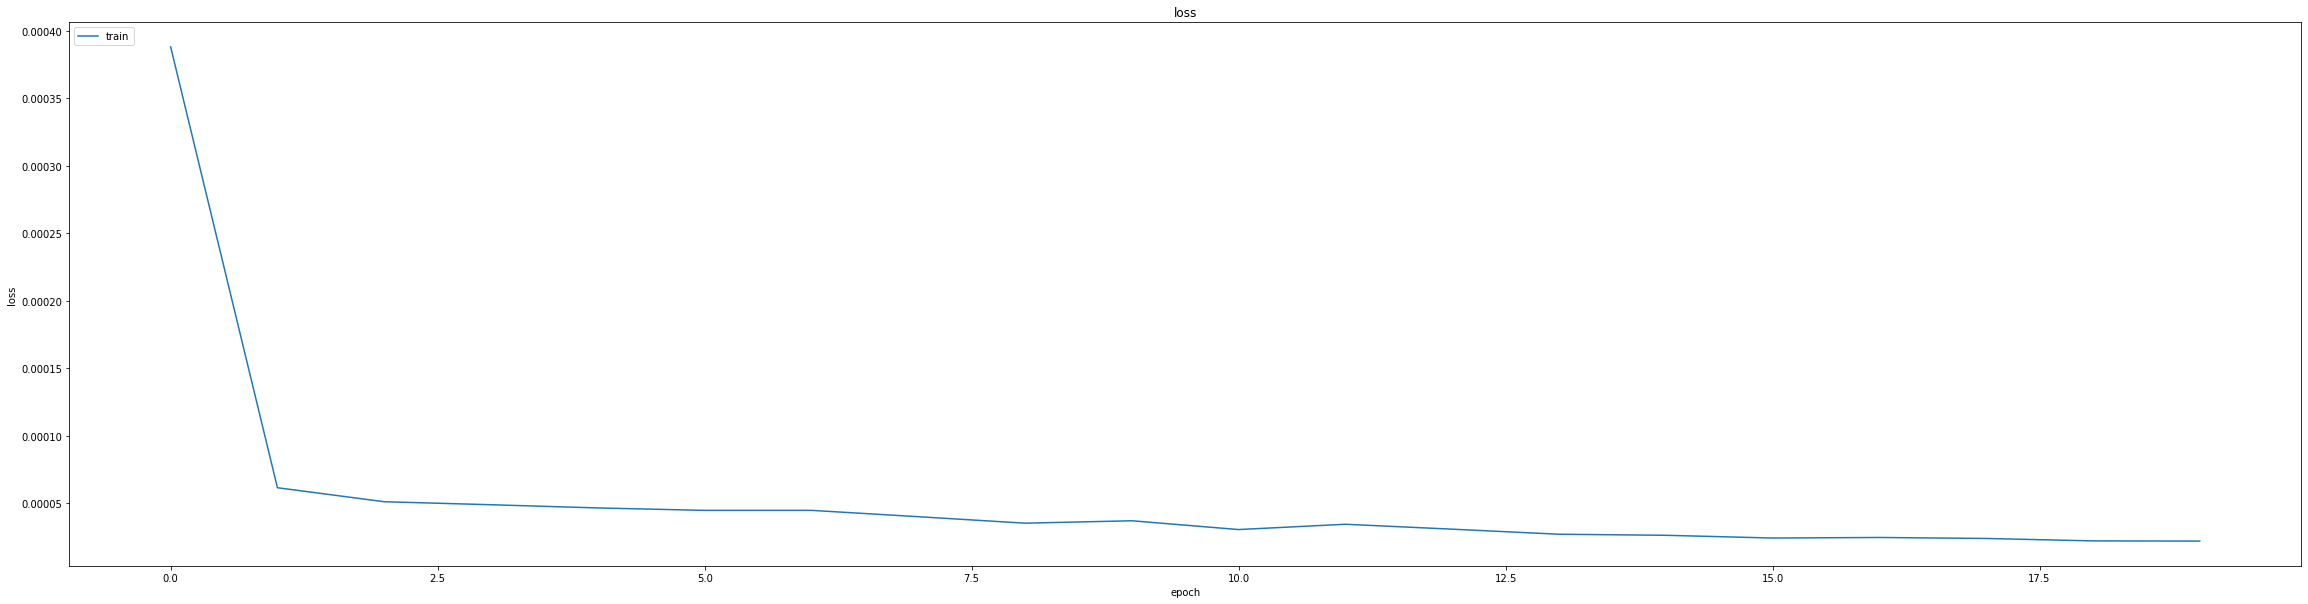

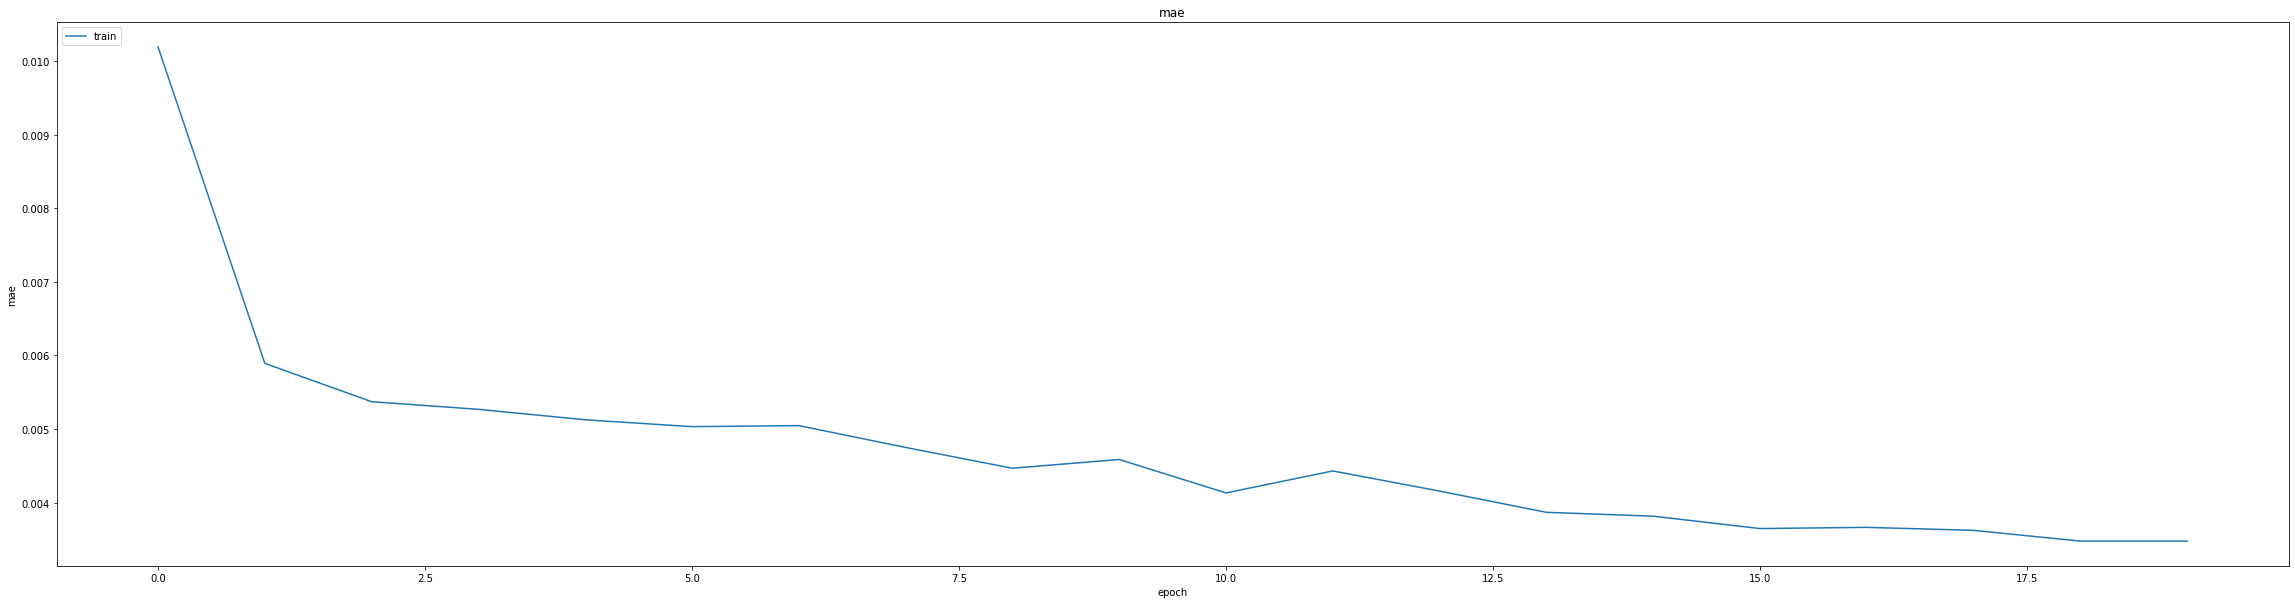

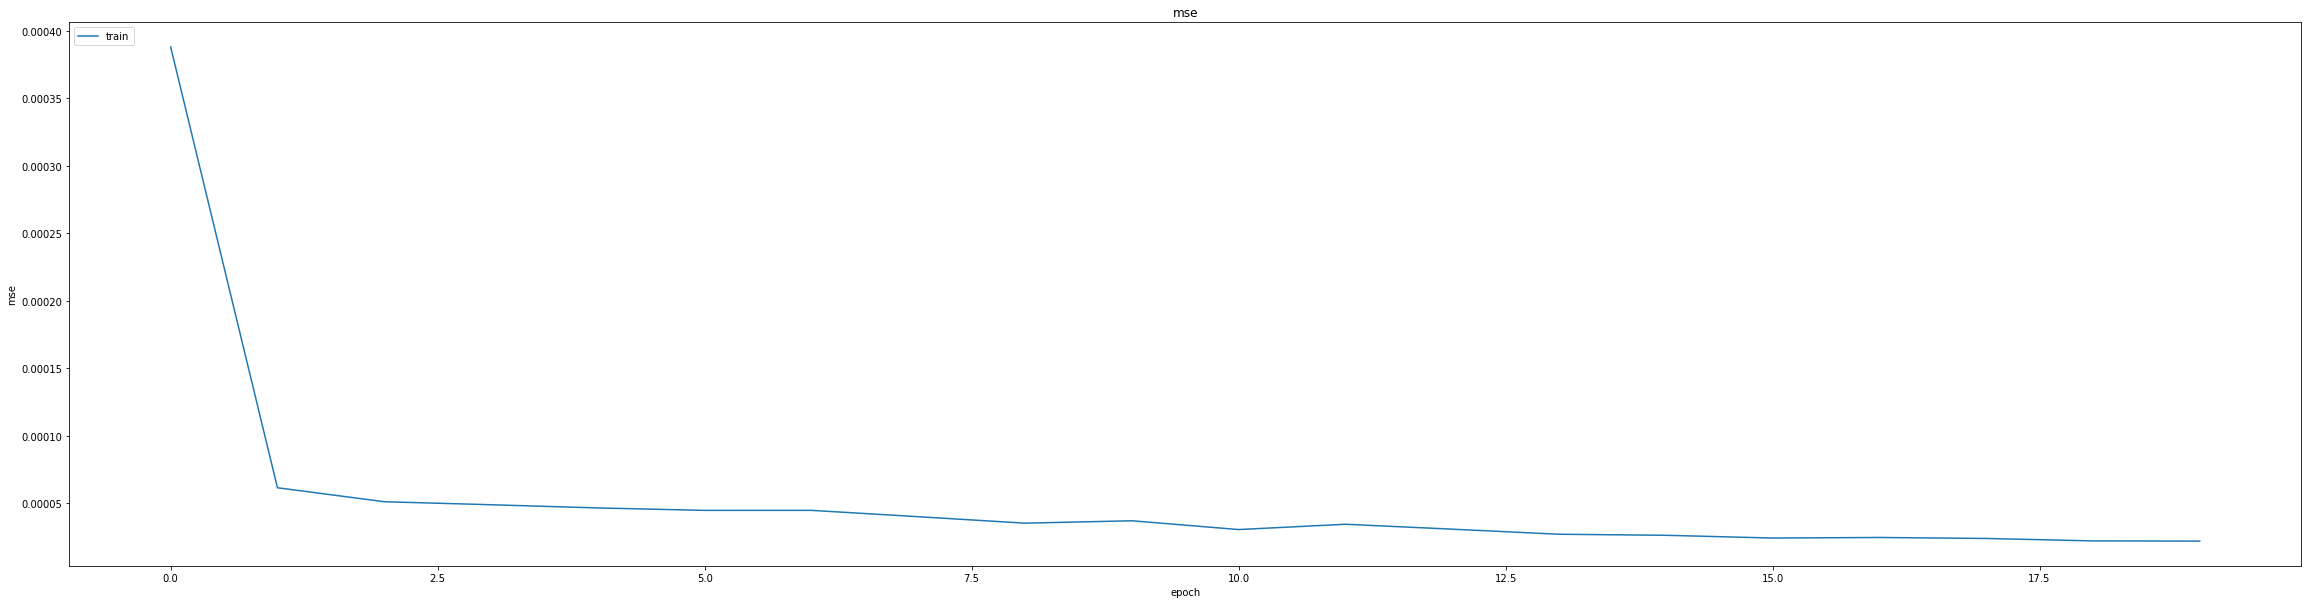

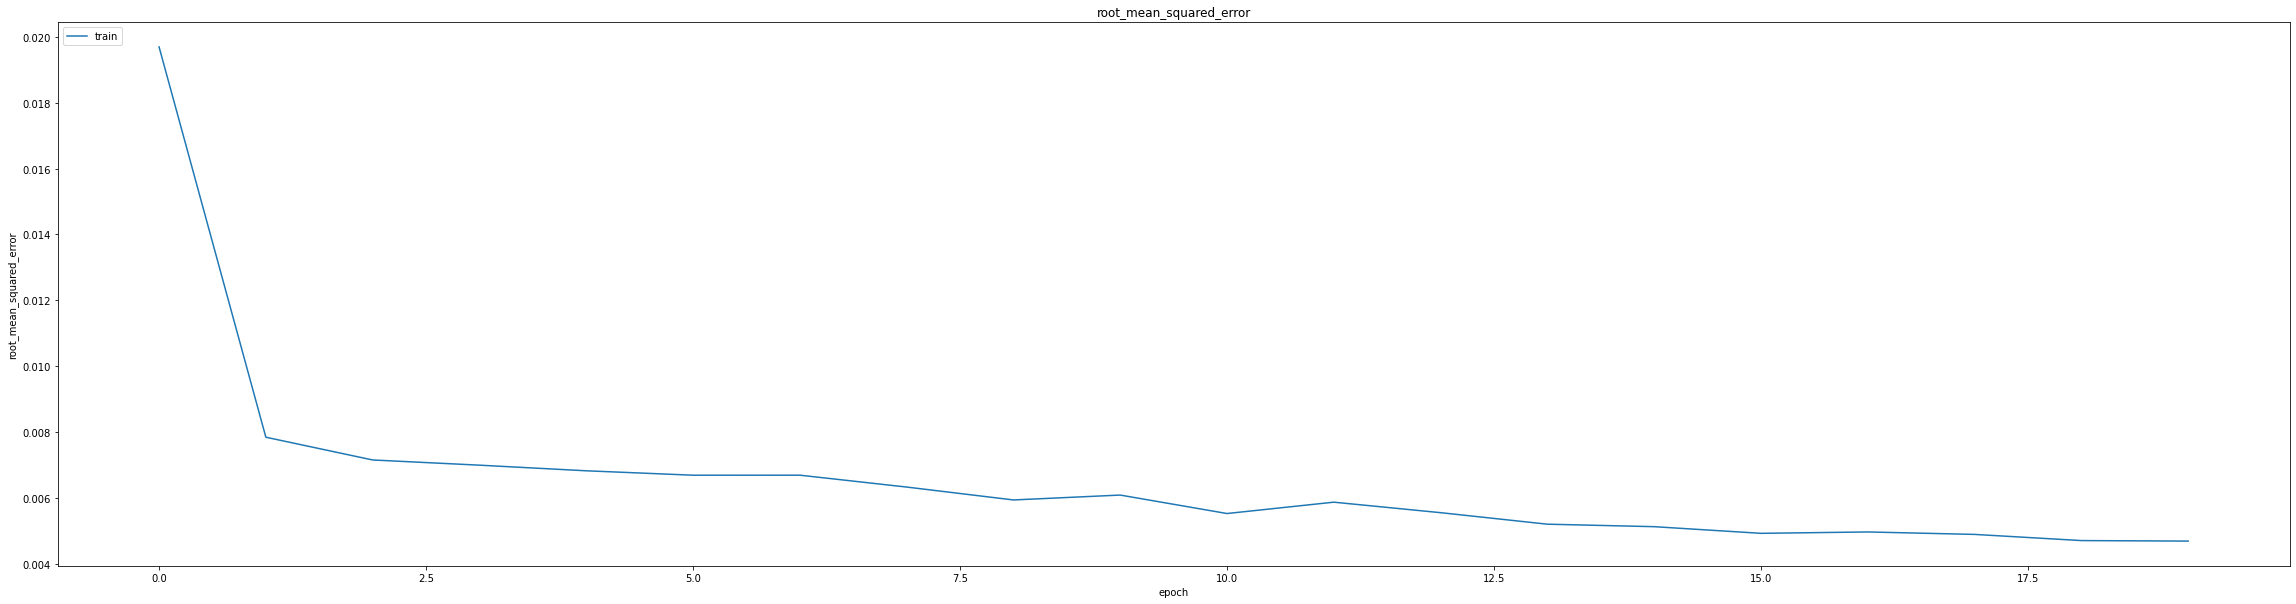

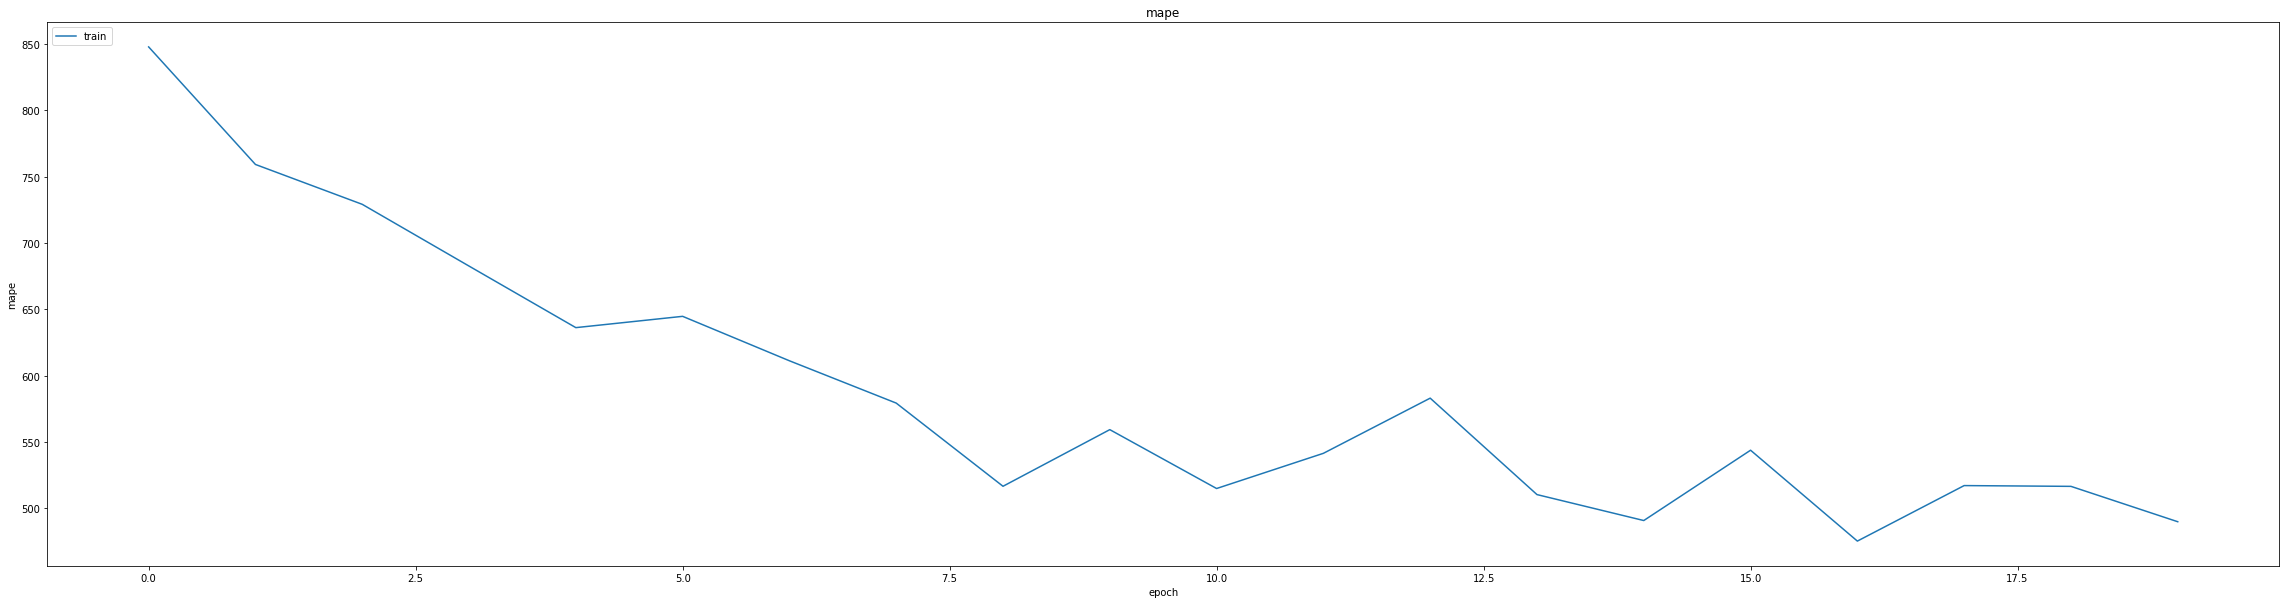

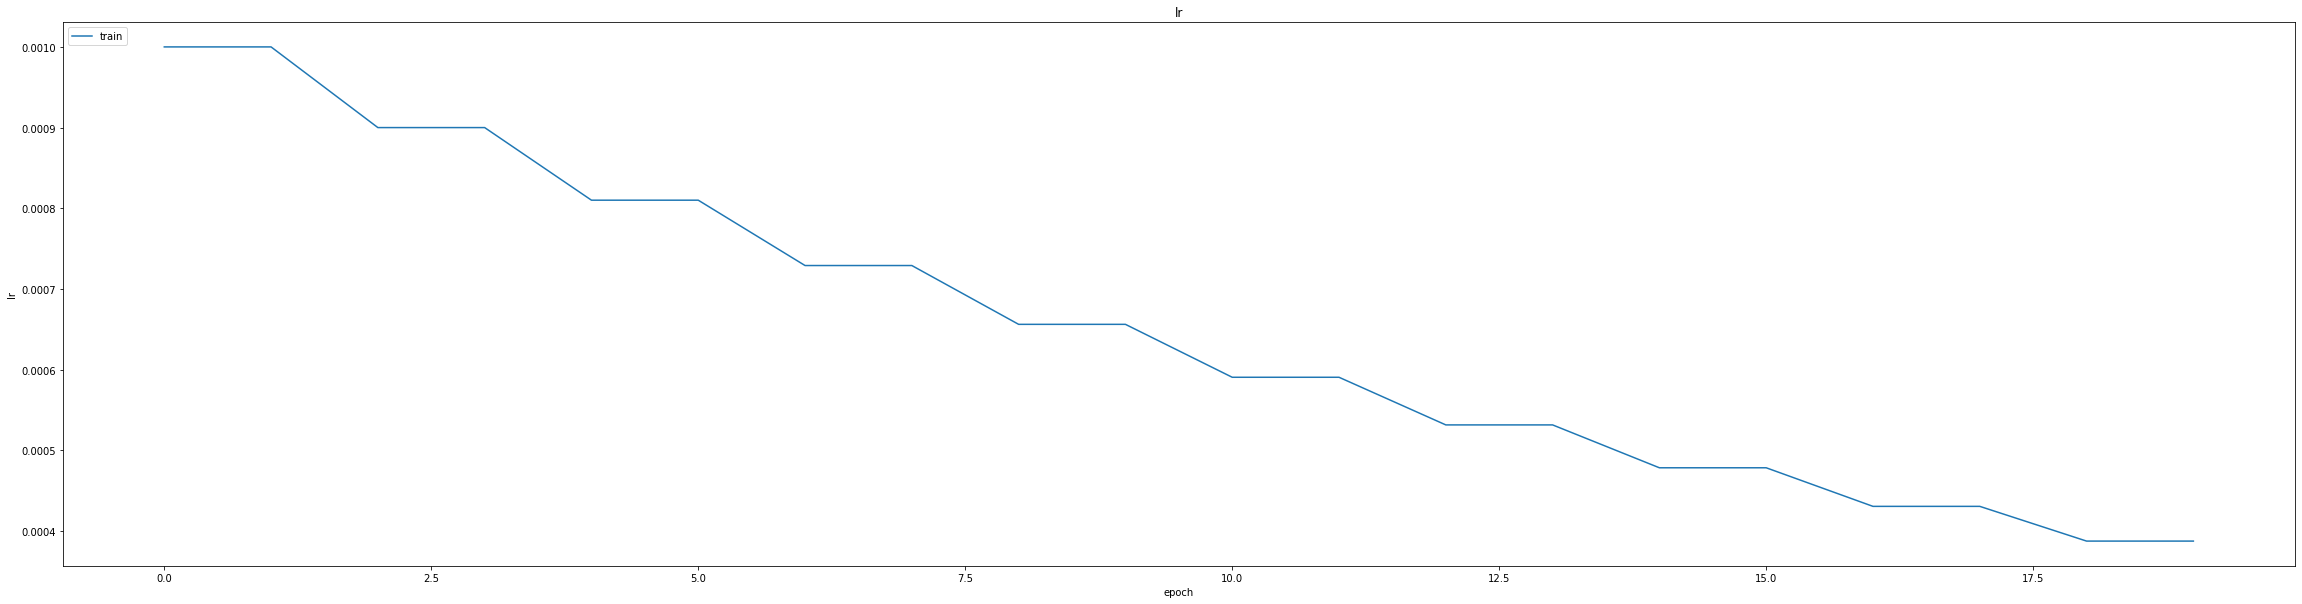

In [65]:
thesis.SummarizeHistory(history)

In [66]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.020361989736557007
0.023073336109519005
1392/1392 [==============================] - 5s 3ms/step
0.9883479990558026


1392/1392 [==============================] - 5s 3ms/step


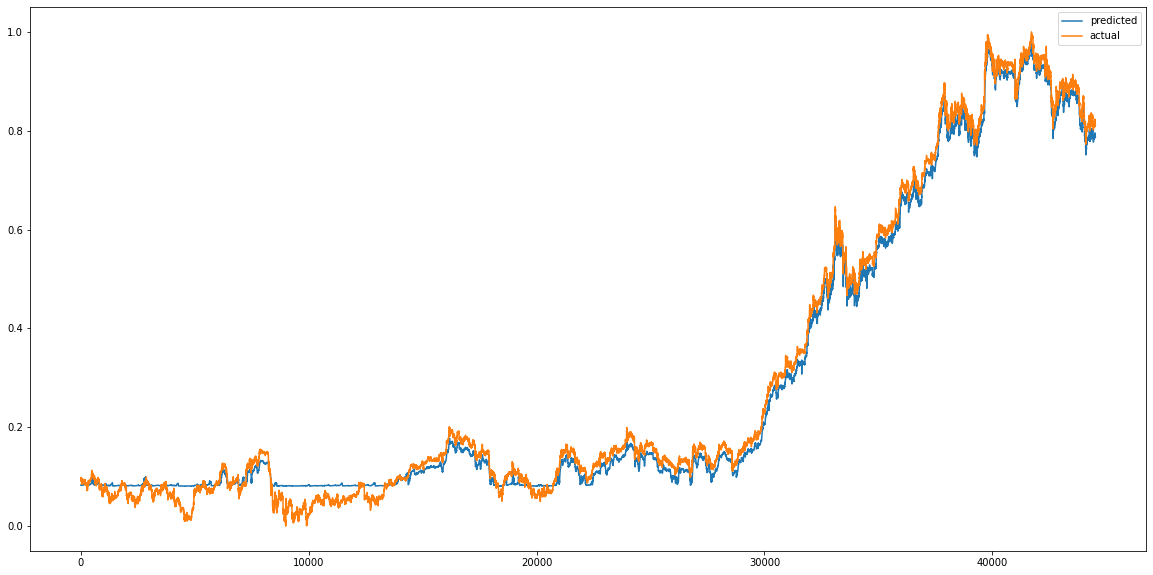

In [68]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


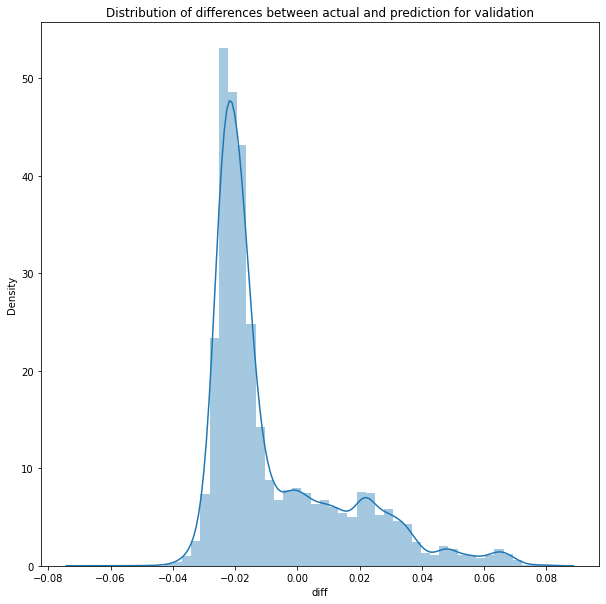

In [69]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1392/1392 [==============================] - 5s 4ms/step


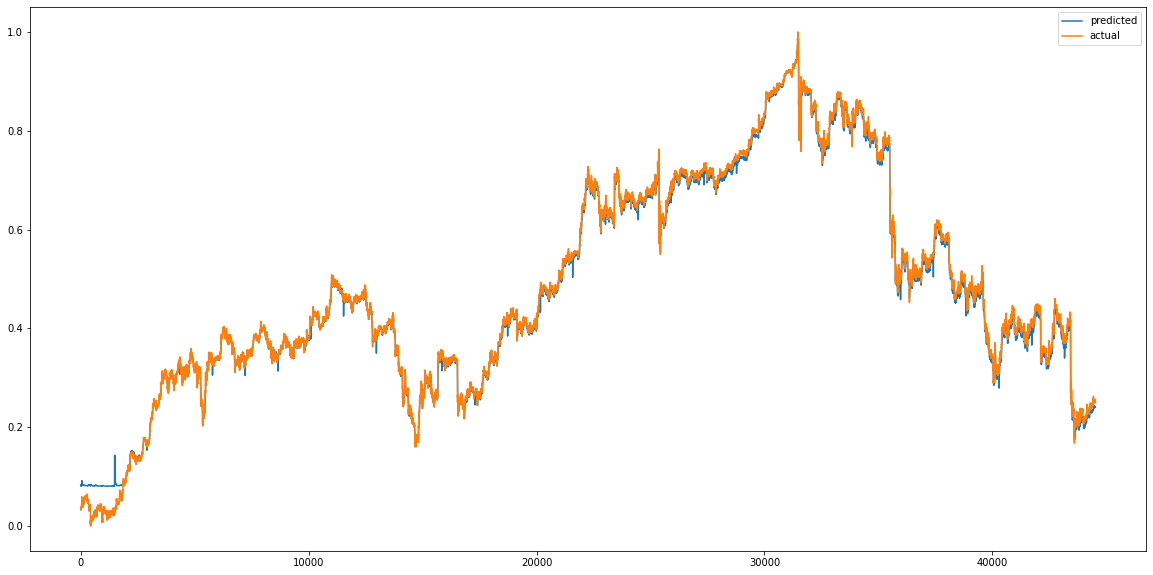

In [70]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


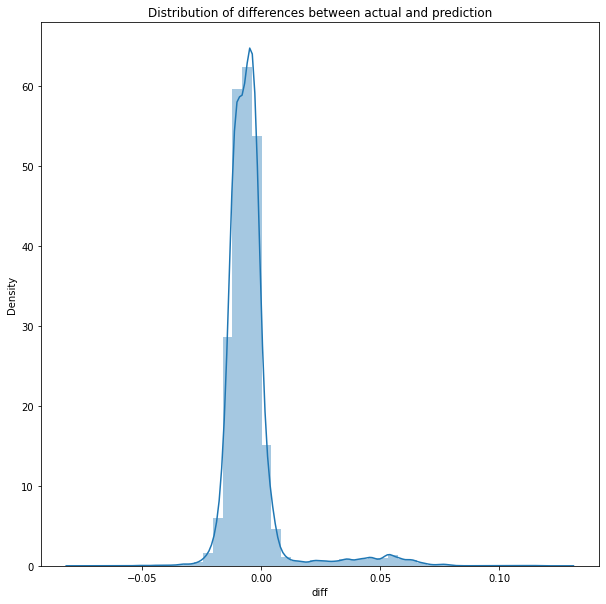

In [71]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00018088521574672825
RMSE :  0.013449357447355181
MAE :  0.009000548402282729
1392/1392 [==============================] - 5s 3ms/step
R2_Score  : 0.9962093845607363


count    44524.000000
mean        -0.004327
std          0.012735
min         -0.077212
25%         -0.010382
50%         -0.006099
75%         -0.002353
max          0.126600
Name: diff, dtype: float64

**CNN_GRU_MODEL**

In [73]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 gru_2 (GRU)                 (None, 24, 256)           247296    
                                                                 
 dropout_4 (Dropout)         (None, 24, 256)           0         
                                                                 
 gru_3 (GRU)                 (None, 64)                61824     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                

In [74]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
345/348 [============================>.] - ETA: 0s - loss: 287.3794 - mae: 2.4939 - mse: 287.3794 - root_mean_squared_error: 16.9523 - mape: 835.1561
Epoch 1: val_mse improved from inf to 0.16262, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 16s 38ms/step - loss: 285.6752 - mae: 2.4817 - mse: 285.6752 - root_mean_squared_error: 16.9019 - mape: 830.7434 - val_loss: 0.1626 - val_mae: 0.2660 - val_mse: 0.1626 - val_root_mean_squared_error: 0.4033 - val_mape: 755.6720
Epoch 2/60
345/348 [============================>.] - ETA: 0s - loss: 0.0906 - mae: 0.2144 - mse: 0.0906 - root_mean_squared_error: 0.3010 - mape: 400.0778
Epoch 2: val_mse improved from 0.16262 to 0.00472, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 0.0901 - mae: 0.2133 - mse: 0.0901 - root_mean_squared_error: 0.3001 - mape: 397.7609 - val_loss: 0.0047 - val_mae: 0.0552 - val_mse: 0.0047 - val_root_mean_squared_error: 0.0687 - val_mape: 2055.6487
Epoch 3/60
347/348 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0309 - mse: 0.0017 - root_mean_squared_error: 0.0407 - mape: 672.8047
Epoch 3: val_mse improved from 0.00472 to 0.00185, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 13s 36ms/step - loss: 0.0017 - mae: 0.0309 - mse: 0.0017 - root_mean_squared_error: 0.0407 - mape: 672.6902 - val_loss: 0.0018 - val_mae: 0.0351 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0430 - val_mape: 2139.0195
Epoch 4/60
344/348 [============================>.] - ETA: 0s - loss: 6.6123e-04 - mae: 0.0199 - mse: 6.6123e-04 - root_mean_squared_error: 0.0257 - mape: 623.1894
Epoch 4: val_mse improved from 0.00185 to 0.00135, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 6.5970e-04 - mae: 0.0199 - mse: 6.5970e-04 - root_mean_squared_error: 0.0257 - mape: 617.7320 - val_loss: 0.0013 - val_mae: 0.0294 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0367 - val_mape: 2167.5178
Epoch 5/60
345/348 [============================>.] - ETA: 0s - loss: 4.0928e-04 - mae: 0.0157 - mse: 4.0928e-04 - root_mean_squared_error: 0.0202 - mape: 780.8788
Epoch 5: val_mse did not improve from 0.00135
348/348 [==============================] - 5s 15ms/step - loss: 4.0904e-04 - mae: 0.0157 - mse: 4.0904e-04 - root_mean_squared_error: 0.0202 - mape: 776.2668 - val_loss: 0.0014 - val_mae: 0.0311 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0380 - val_mape: 2198.4907
Epoch 6/60
348/348 [==============================] - ETA: 0s - loss: 3.2215e-04 - mae: 0.0139 - mse: 3.2215e-04 - root_mean_squared_error: 0.0179 - mape: 707.4406
Epoch 6: val_mse improved from 0.00135 to 0.00127, saving model to /content/dri

348/348 [==============================] - 13s 36ms/step - loss: 3.2215e-04 - mae: 0.0139 - mse: 3.2215e-04 - root_mean_squared_error: 0.0179 - mape: 707.4406 - val_loss: 0.0013 - val_mae: 0.0290 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0356 - val_mape: 2208.3352
Epoch 7/60
344/348 [============================>.] - ETA: 0s - loss: 2.7676e-04 - mae: 0.0129 - mse: 2.7676e-04 - root_mean_squared_error: 0.0166 - mape: 841.8269
Epoch 7: val_mse improved from 0.00127 to 0.00120, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 2.7633e-04 - mae: 0.0129 - mse: 2.7633e-04 - root_mean_squared_error: 0.0166 - mape: 834.4324 - val_loss: 0.0012 - val_mae: 0.0283 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0346 - val_mape: 2178.0205
Epoch 8/60
345/348 [============================>.] - ETA: 0s - loss: 2.4722e-04 - mae: 0.0122 - mse: 2.4722e-04 - root_mean_squared_error: 0.0157 - mape: 795.2000
Epoch 8: val_mse improved from 0.00120 to 0.00108, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 13s 36ms/step - loss: 2.4724e-04 - mae: 0.0122 - mse: 2.4724e-04 - root_mean_squared_error: 0.0157 - mape: 790.5002 - val_loss: 0.0011 - val_mae: 0.0264 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0329 - val_mape: 2139.9834
Epoch 9/60
346/348 [============================>.] - ETA: 0s - loss: 2.2327e-04 - mae: 0.0116 - mse: 2.2327e-04 - root_mean_squared_error: 0.0149 - mape: 764.7393
Epoch 9: val_mse improved from 0.00108 to 0.00101, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 2.2319e-04 - mae: 0.0116 - mse: 2.2319e-04 - root_mean_squared_error: 0.0149 - mape: 762.4123 - val_loss: 0.0010 - val_mae: 0.0257 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0318 - val_mape: 2096.0803
Epoch 10/60
347/348 [============================>.] - ETA: 0s - loss: 2.0205e-04 - mae: 0.0110 - mse: 2.0205e-04 - root_mean_squared_error: 0.0142 - mape: 785.4791
Epoch 10: val_mse improved from 0.00101 to 0.00088, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 13s 37ms/step - loss: 2.0205e-04 - mae: 0.0110 - mse: 2.0205e-04 - root_mean_squared_error: 0.0142 - mape: 785.3444 - val_loss: 8.8416e-04 - val_mae: 0.0234 - val_mse: 8.8416e-04 - val_root_mean_squared_error: 0.0297 - val_mape: 2044.3484
Epoch 11/60
347/348 [============================>.] - ETA: 0s - loss: 1.8781e-04 - mae: 0.0106 - mse: 1.8781e-04 - root_mean_squared_error: 0.0137 - mape: 741.9041
Epoch 11: val_mse improved from 0.00088 to 0.00084, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 1.8779e-04 - mae: 0.0106 - mse: 1.8779e-04 - root_mean_squared_error: 0.0137 - mape: 741.7767 - val_loss: 8.4336e-04 - val_mae: 0.0230 - val_mse: 8.4336e-04 - val_root_mean_squared_error: 0.0290 - val_mape: 2011.8059
Epoch 12/60
346/348 [============================>.] - ETA: 0s - loss: 1.7236e-04 - mae: 0.0101 - mse: 1.7236e-04 - root_mean_squared_error: 0.0131 - mape: 735.8907
Epoch 12: val_mse improved from 0.00084 to 0.00076, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 13s 37ms/step - loss: 1.7232e-04 - mae: 0.0101 - mse: 1.7232e-04 - root_mean_squared_error: 0.0131 - mape: 733.6512 - val_loss: 7.6408e-04 - val_mae: 0.0217 - val_mse: 7.6408e-04 - val_root_mean_squared_error: 0.0276 - val_mape: 1960.6711
Epoch 13/60
346/348 [============================>.] - ETA: 0s - loss: 1.6105e-04 - mae: 0.0097 - mse: 1.6105e-04 - root_mean_squared_error: 0.0127 - mape: 732.0056
Epoch 13: val_mse improved from 0.00076 to 0.00071, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 12s 35ms/step - loss: 1.6098e-04 - mae: 0.0097 - mse: 1.6098e-04 - root_mean_squared_error: 0.0127 - mape: 729.7772 - val_loss: 7.0904e-04 - val_mae: 0.0206 - val_mse: 7.0904e-04 - val_root_mean_squared_error: 0.0266 - val_mape: 1937.9681
Epoch 14/60
344/348 [============================>.] - ETA: 0s - loss: 1.4997e-04 - mae: 0.0094 - mse: 1.4997e-04 - root_mean_squared_error: 0.0122 - mape: 692.2097
Epoch 14: val_mse improved from 0.00071 to 0.00069, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 13s 36ms/step - loss: 1.4992e-04 - mae: 0.0094 - mse: 1.4992e-04 - root_mean_squared_error: 0.0122 - mape: 686.1287 - val_loss: 6.8998e-04 - val_mae: 0.0204 - val_mse: 6.8998e-04 - val_root_mean_squared_error: 0.0263 - val_mape: 1912.5869
Epoch 15/60
346/348 [============================>.] - ETA: 0s - loss: 1.4127e-04 - mae: 0.0091 - mse: 1.4127e-04 - root_mean_squared_error: 0.0119 - mape: 683.7220
Epoch 15: val_mse improved from 0.00069 to 0.00060, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 13s 36ms/step - loss: 1.4128e-04 - mae: 0.0091 - mse: 1.4128e-04 - root_mean_squared_error: 0.0119 - mape: 681.6415 - val_loss: 6.0426e-04 - val_mae: 0.0186 - val_mse: 6.0426e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 1865.2875
Epoch 16/60
347/348 [============================>.] - ETA: 0s - loss: 1.3454e-04 - mae: 0.0088 - mse: 1.3454e-04 - root_mean_squared_error: 0.0116 - mape: 753.9170
Epoch 16: val_mse improved from 0.00060 to 0.00057, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 12s 35ms/step - loss: 1.3453e-04 - mae: 0.0088 - mse: 1.3453e-04 - root_mean_squared_error: 0.0116 - mape: 753.7876 - val_loss: 5.7033e-04 - val_mae: 0.0182 - val_mse: 5.7033e-04 - val_root_mean_squared_error: 0.0239 - val_mape: 1817.4325
Epoch 17/60
348/348 [==============================] - ETA: 0s - loss: 1.2555e-04 - mae: 0.0085 - mse: 1.2555e-04 - root_mean_squared_error: 0.0112 - mape: 749.9156
Epoch 17: val_mse improved from 0.00057 to 0.00049, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 13s 37ms/step - loss: 1.2555e-04 - mae: 0.0085 - mse: 1.2555e-04 - root_mean_squared_error: 0.0112 - mape: 749.9156 - val_loss: 4.8912e-04 - val_mae: 0.0163 - val_mse: 4.8912e-04 - val_root_mean_squared_error: 0.0221 - val_mape: 1781.1947
Epoch 18/60
346/348 [============================>.] - ETA: 0s - loss: 1.2036e-04 - mae: 0.0083 - mse: 1.2036e-04 - root_mean_squared_error: 0.0110 - mape: 704.2004
Epoch 18: val_mse did not improve from 0.00049
348/348 [==============================] - 6s 16ms/step - loss: 1.2031e-04 - mae: 0.0083 - mse: 1.2031e-04 - root_mean_squared_error: 0.0110 - mape: 702.0563 - val_loss: 5.0731e-04 - val_mae: 0.0174 - val_mse: 5.0731e-04 - val_root_mean_squared_error: 0.0225 - val_mape: 1728.6407
Epoch 19/60
348/348 [==============================] - ETA: 0s - loss: 1.1492e-04 - mae: 0.0081 - mse: 1.1492e-04 - root_mean_squared_error: 0.0107 - mape: 692.0188
Epoch 19: val_mse improved from 0.00049 to 0.00043, saving m

348/348 [==============================] - 12s 34ms/step - loss: 1.1492e-04 - mae: 0.0081 - mse: 1.1492e-04 - root_mean_squared_error: 0.0107 - mape: 692.0188 - val_loss: 4.3198e-04 - val_mae: 0.0153 - val_mse: 4.3198e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 1715.6361
Epoch 20/60
346/348 [============================>.] - ETA: 0s - loss: 1.0850e-04 - mae: 0.0078 - mse: 1.0850e-04 - root_mean_squared_error: 0.0104 - mape: 722.4747
Epoch 20: val_mse improved from 0.00043 to 0.00041, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 1.0844e-04 - mae: 0.0078 - mse: 1.0844e-04 - root_mean_squared_error: 0.0104 - mape: 720.2745 - val_loss: 4.1461e-04 - val_mae: 0.0152 - val_mse: 4.1461e-04 - val_root_mean_squared_error: 0.0204 - val_mape: 1680.9819
Epoch 21/60
346/348 [============================>.] - ETA: 0s - loss: 1.0189e-04 - mae: 0.0076 - mse: 1.0189e-04 - root_mean_squared_error: 0.0101 - mape: 714.3317
Epoch 21: val_mse improved from 0.00041 to 0.00039, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 13s 37ms/step - loss: 1.0190e-04 - mae: 0.0076 - mse: 1.0190e-04 - root_mean_squared_error: 0.0101 - mape: 712.1562 - val_loss: 3.9237e-04 - val_mae: 0.0151 - val_mse: 3.9237e-04 - val_root_mean_squared_error: 0.0198 - val_mape: 1644.7549
Epoch 22/60
346/348 [============================>.] - ETA: 0s - loss: 9.6771e-05 - mae: 0.0074 - mse: 9.6771e-05 - root_mean_squared_error: 0.0098 - mape: 715.2827
Epoch 22: val_mse did not improve from 0.00039
348/348 [==============================] - 5s 15ms/step - loss: 9.6789e-05 - mae: 0.0074 - mse: 9.6789e-05 - root_mean_squared_error: 0.0098 - mape: 713.1042 - val_loss: 4.1567e-04 - val_mae: 0.0161 - val_mse: 4.1567e-04 - val_root_mean_squared_error: 0.0204 - val_mape: 1616.5029
Epoch 23/60
347/348 [============================>.] - ETA: 0s - loss: 9.3069e-05 - mae: 0.0072 - mse: 9.3069e-05 - root_mean_squared_error: 0.0096 - mape: 719.7159
Epoch 23: val_mse did not improve from 0.00039
348/348 [====

348/348 [==============================] - 12s 34ms/step - loss: 8.1233e-05 - mae: 0.0067 - mse: 8.1233e-05 - root_mean_squared_error: 0.0090 - mape: 640.7159 - val_loss: 3.2444e-04 - val_mae: 0.0149 - val_mse: 3.2444e-04 - val_root_mean_squared_error: 0.0180 - val_mape: 1517.8353
Epoch 27/60
347/348 [============================>.] - ETA: 0s - loss: 7.8778e-05 - mae: 0.0066 - mse: 7.8778e-05 - root_mean_squared_error: 0.0089 - mape: 632.2798
Epoch 27: val_mse did not improve from 0.00032
348/348 [==============================] - 5s 15ms/step - loss: 7.8777e-05 - mae: 0.0066 - mse: 7.8777e-05 - root_mean_squared_error: 0.0089 - mape: 632.1713 - val_loss: 5.5484e-04 - val_mae: 0.0199 - val_mse: 5.5484e-04 - val_root_mean_squared_error: 0.0236 - val_mape: 1477.6920
Epoch 28/60
344/348 [============================>.] - ETA: 0s - loss: 7.4983e-05 - mae: 0.0064 - mse: 7.4983e-05 - root_mean_squared_error: 0.0087 - mape: 683.9221
Epoch 28: val_mse did not improve from 0.00032
348/348 [====

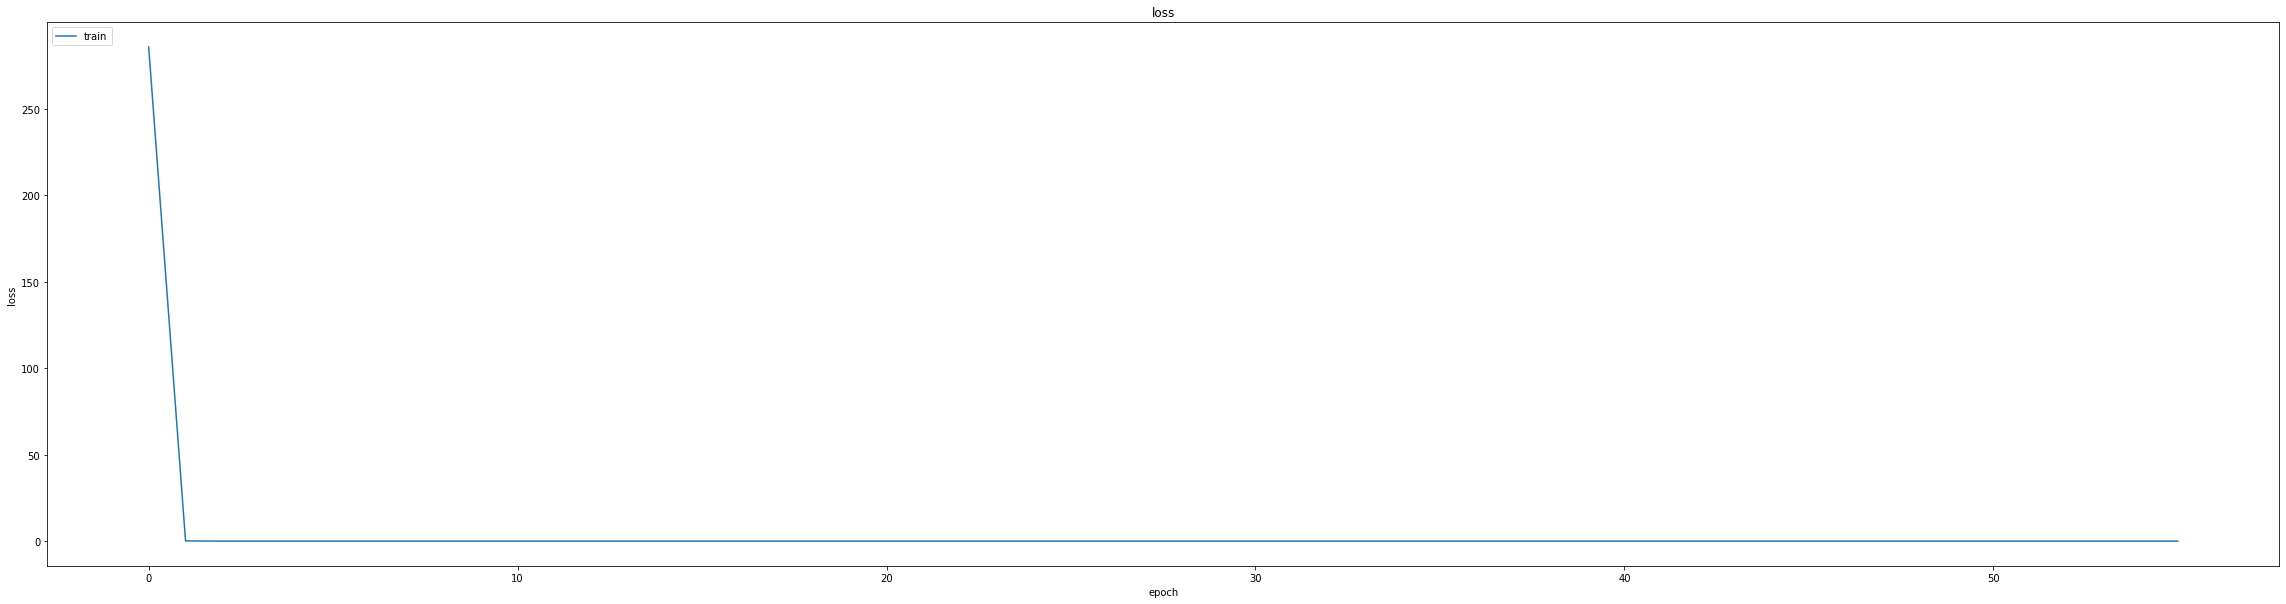

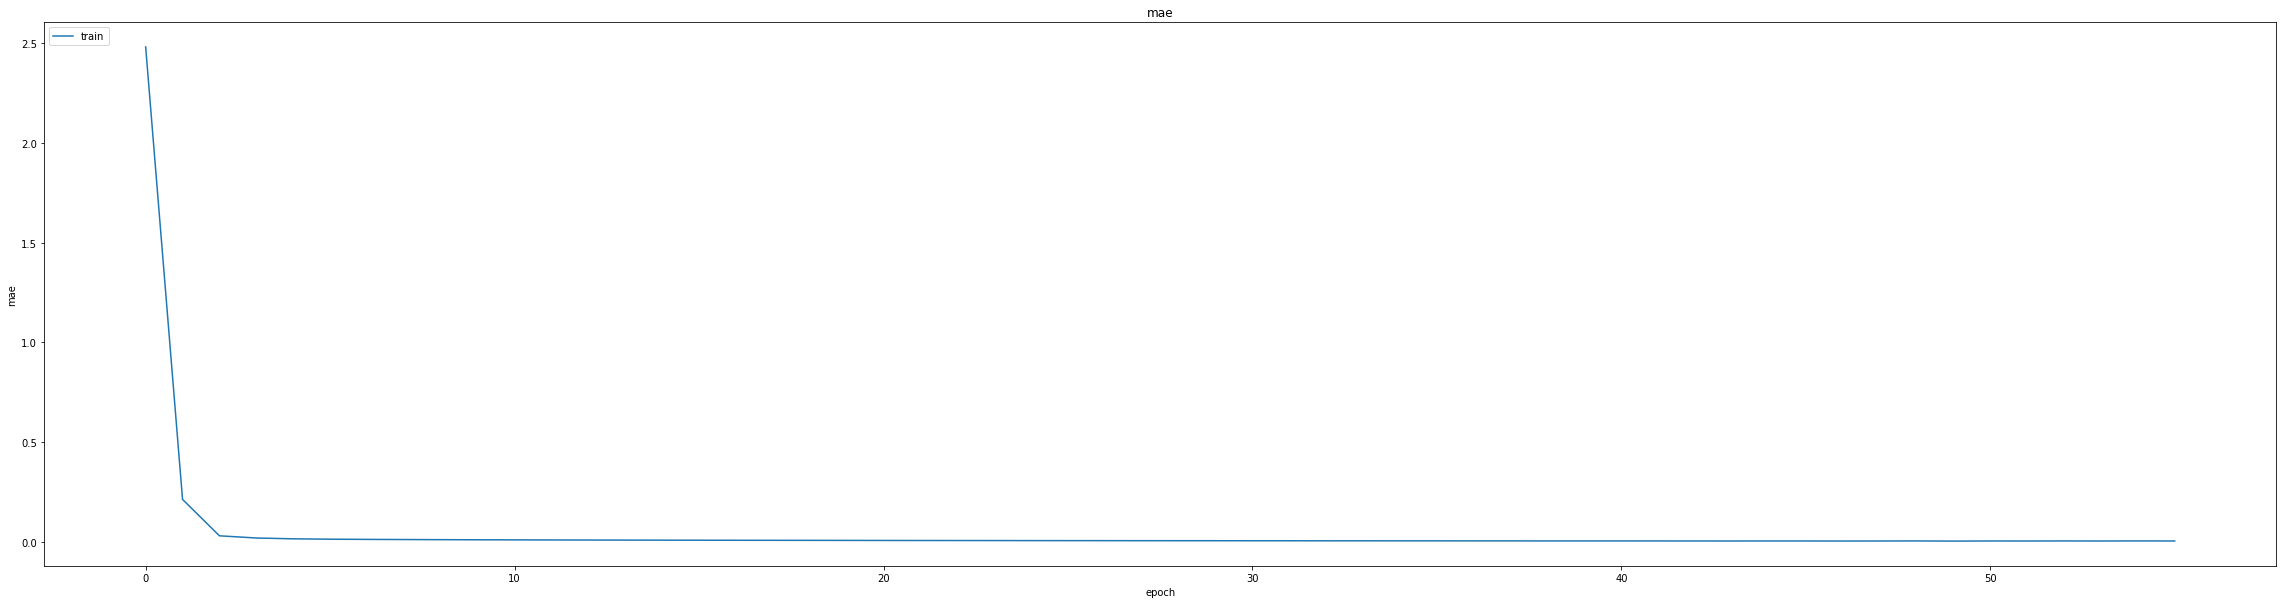

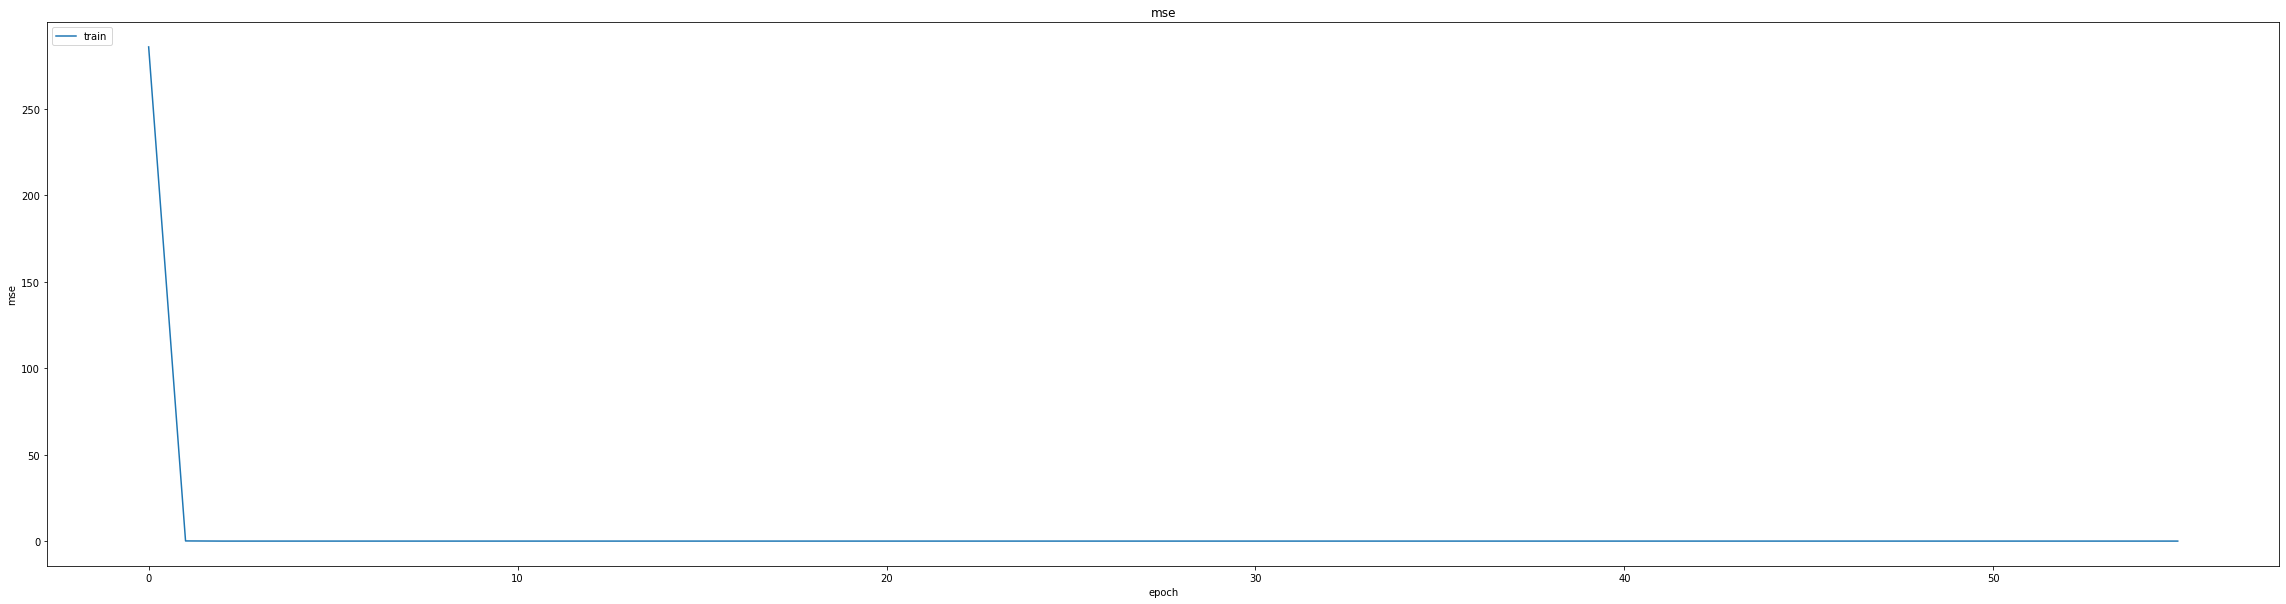

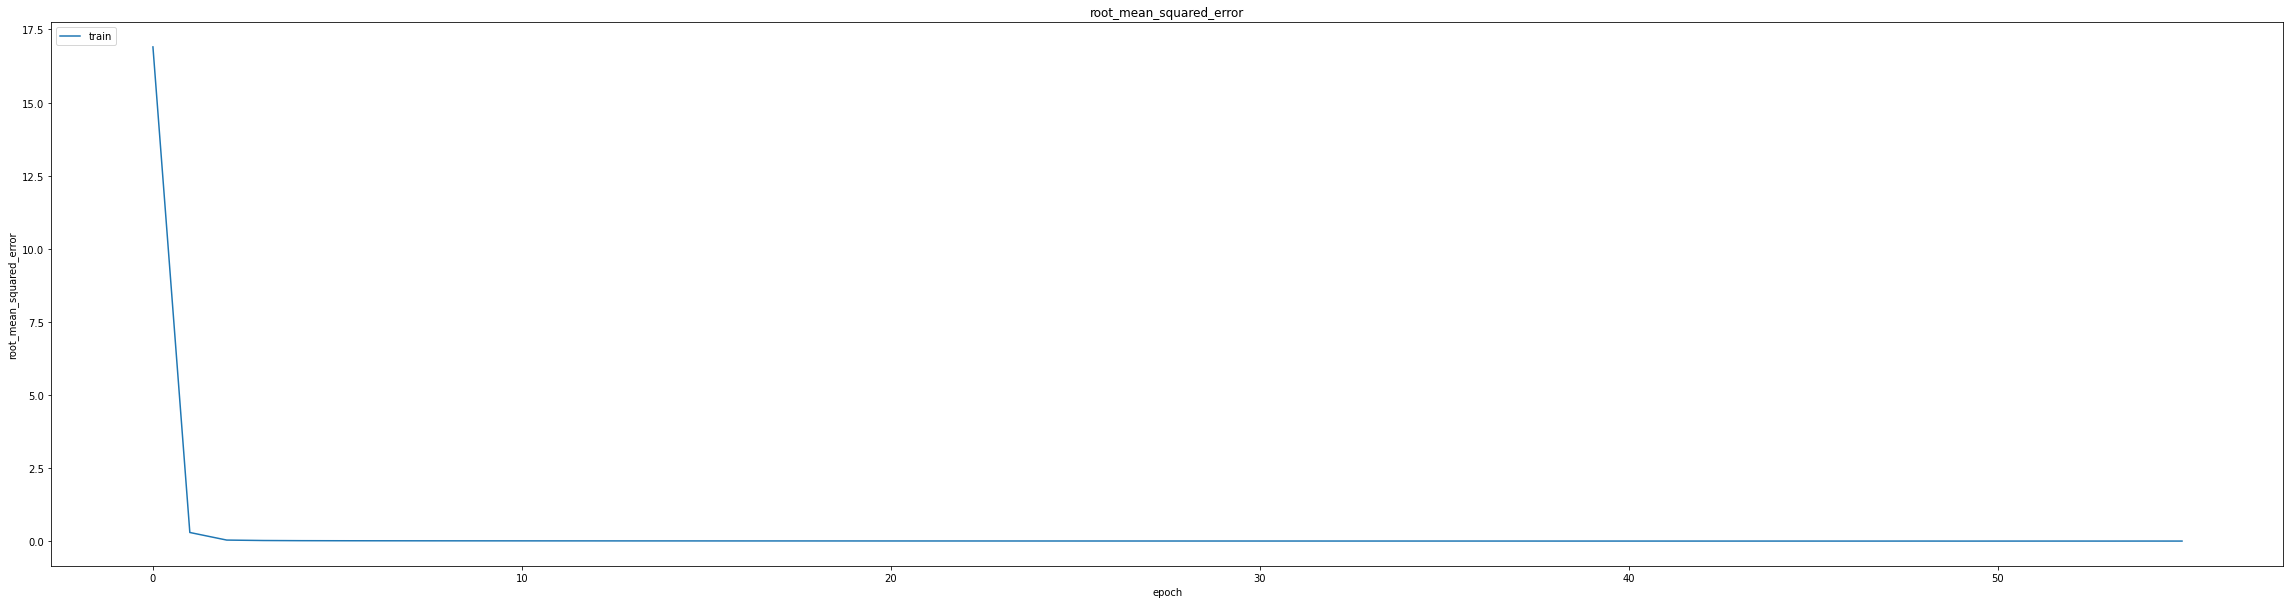

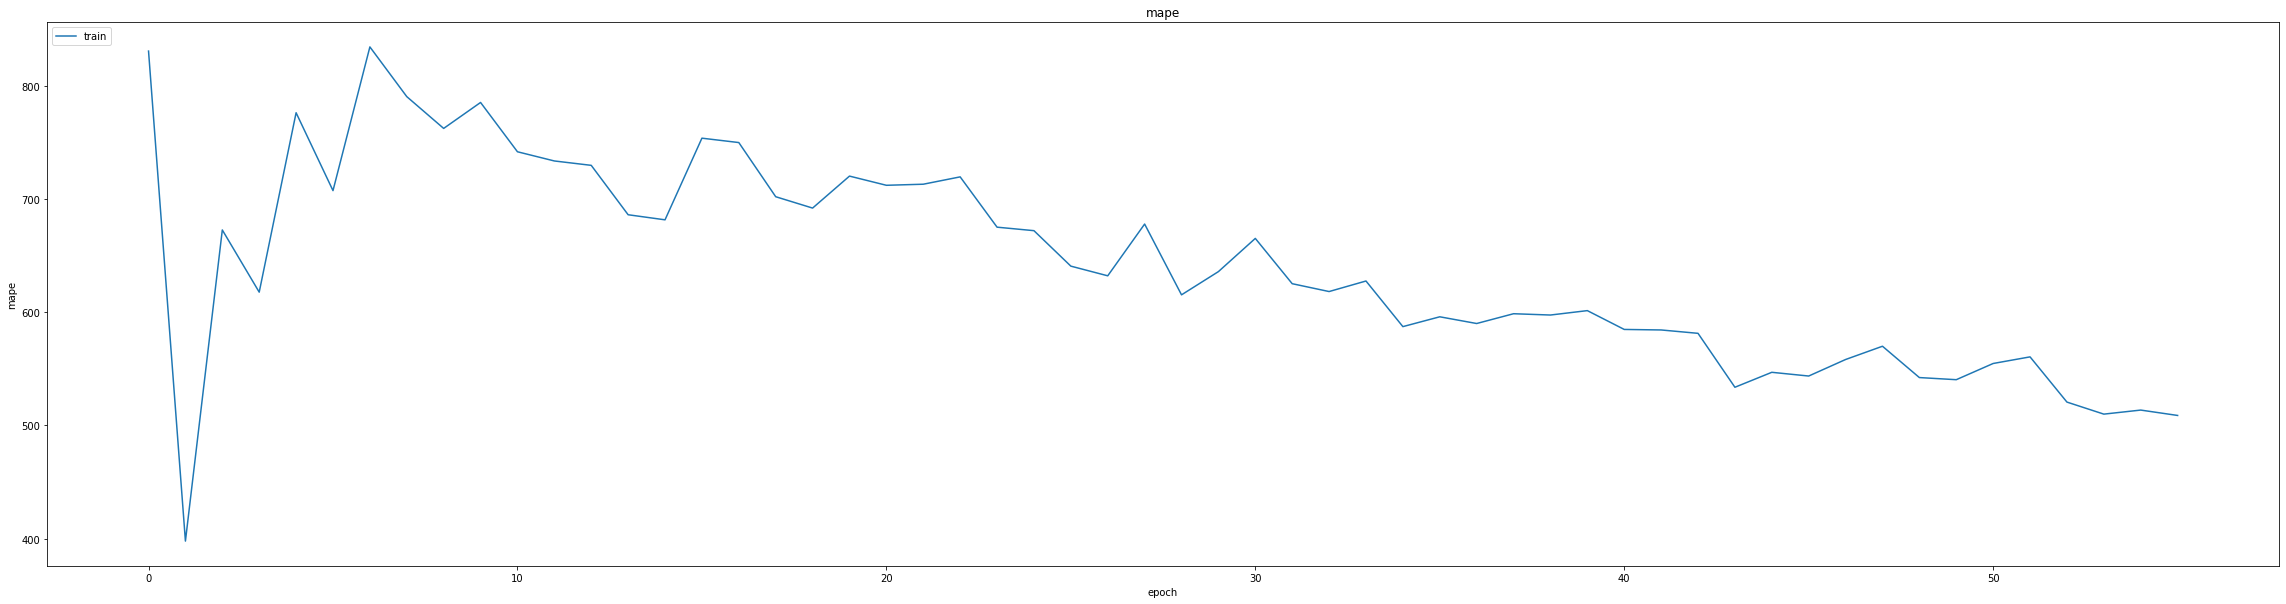

In [75]:
thesis.SummarizeHistory(history)

In [76]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.014903360046446323
0.018012307584285736
1392/1392 [==============================] - 5s 3ms/step
0.9864260560956292


In [77]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [78]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
345/348 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0144 - mse: 0.0012 - root_mean_squared_error: 0.0340 - mape: 688.7369
Epoch 1: val_mse did not improve from 0.00032
348/348 [==============================] - 9s 19ms/step - loss: 0.0011 - mae: 0.0144 - mse: 0.0011 - root_mean_squared_error: 0.0339 - mape: 684.6597 - val_loss: 3.7819e-04 - val_mae: 0.0162 - val_mse: 3.7819e-04 - val_root_mean_squared_error: 0.0194 - val_mape: 1614.6077 - lr: 0.0010
Epoch 2/20
346/348 [============================>.] - ETA: 0s - loss: 7.0010e-05 - mae: 0.0061 - mse: 7.0010e-05 - root_mean_squared_error: 0.0084 - mape: 676.8518
Epoch 2: val_mse did not improve from 0.00032
348/348 [==============================] - 5s 15ms/step - loss: 7.0056e-05 - mae: 0.0061 - mse: 7.0056e-05 - root_mean_squared_error: 0.0084 - mape: 674.7902 - val_loss: 3.4658e-04 - val_mae: 0.0160 - val_mse: 3.4658e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 1450.8943 - lr: 0.0010
lr chang

348/348 [==============================] - 14s 40ms/step - loss: 5.8636e-05 - mae: 0.0056 - mse: 5.8636e-05 - root_mean_squared_error: 0.0077 - mape: 574.9601 - val_loss: 1.9671e-04 - val_mae: 0.0120 - val_mse: 1.9671e-04 - val_root_mean_squared_error: 0.0140 - val_mape: 1269.8818 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
346/348 [============================>.] - ETA: 0s - loss: 5.4805e-05 - mae: 0.0054 - mse: 5.4805e-05 - root_mean_squared_error: 0.0074 - mape: 576.1920
Epoch 5: val_mse did not improve from 0.00020
348/348 [==============================] - 5s 15ms/step - loss: 5.4805e-05 - mae: 0.0054 - mse: 5.4805e-05 - root_mean_squared_error: 0.0074 - mape: 574.4366 - val_loss: 2.9839e-04 - val_mae: 0.0156 - val_mse: 2.9839e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 1194.9910 - lr: 8.1000e-04
Epoch 6/20
346/348 [============================>.] - ETA: 0s - loss: 5.3059e-05 - mae: 0.0054 - mse: 5.3059e-05 - root_mean_squared_error: 0.0073 - mape: 51

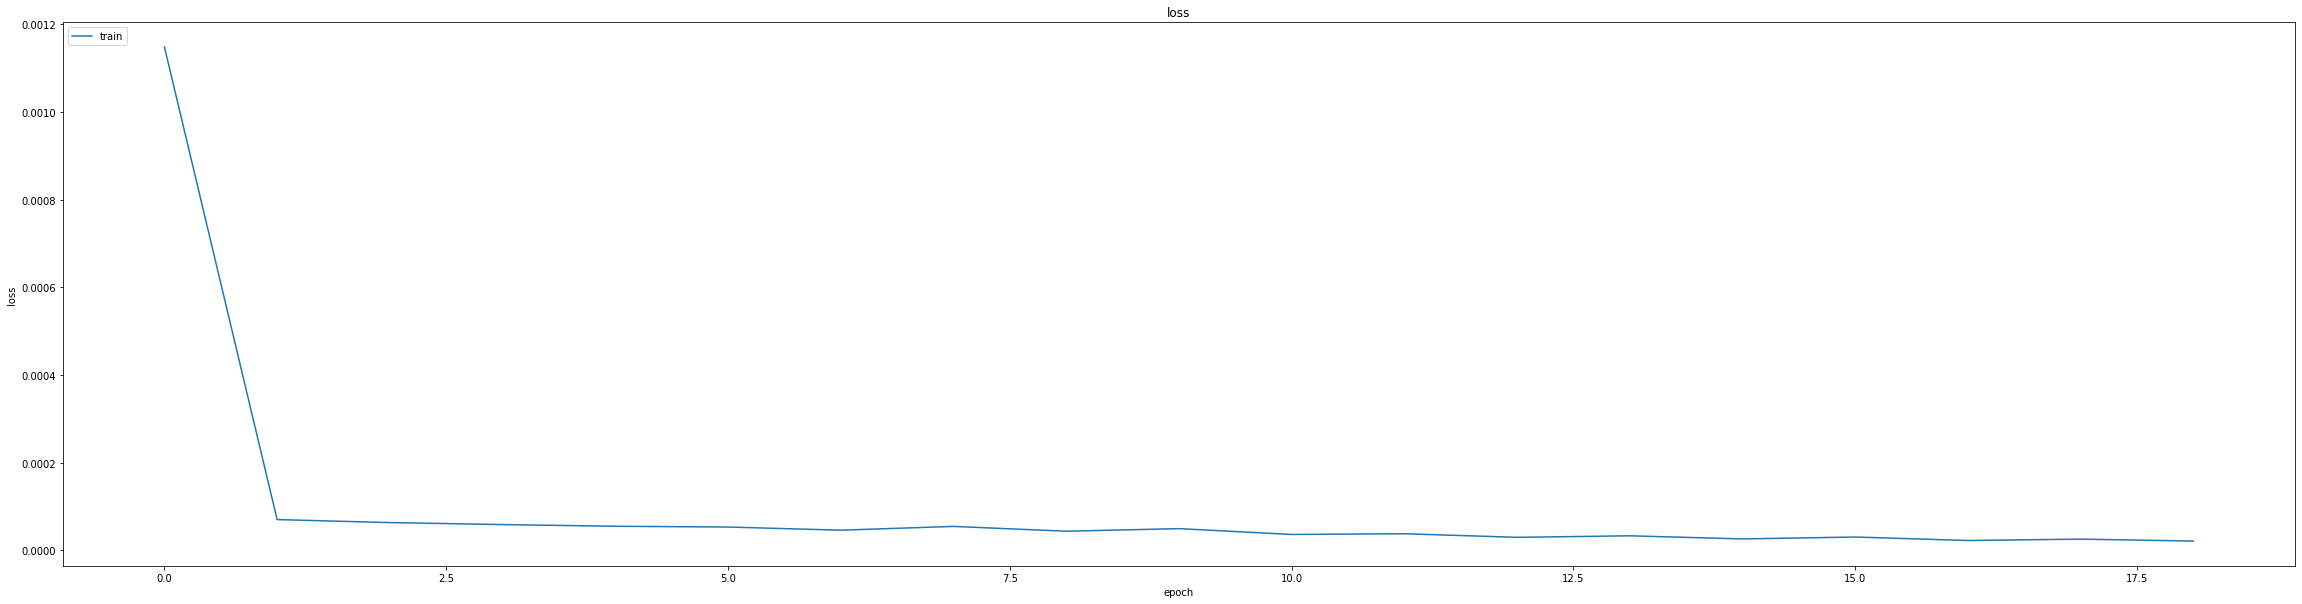

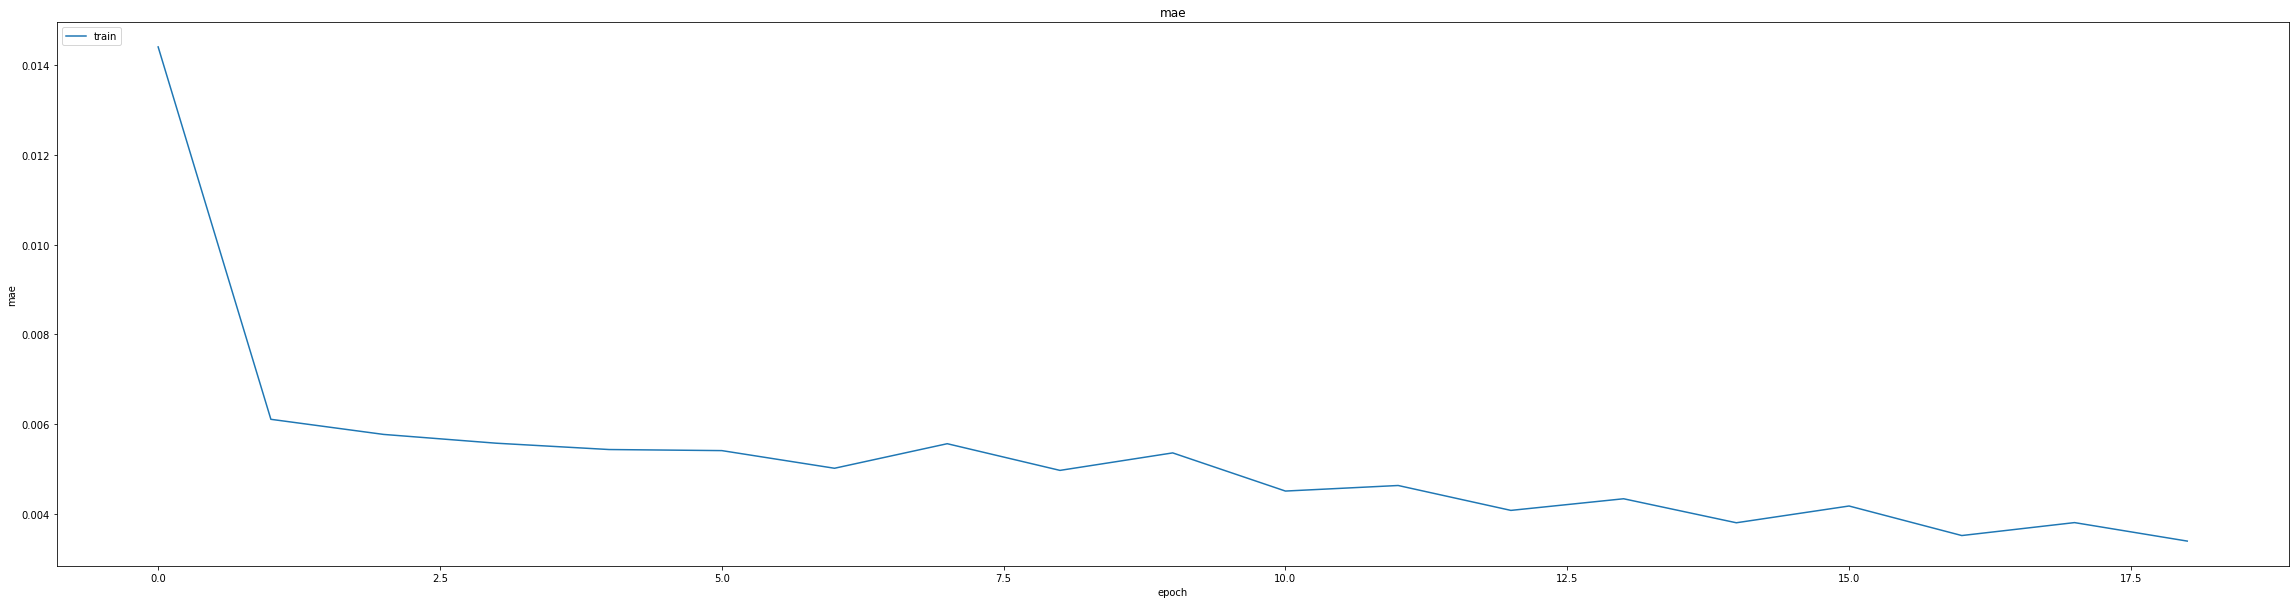

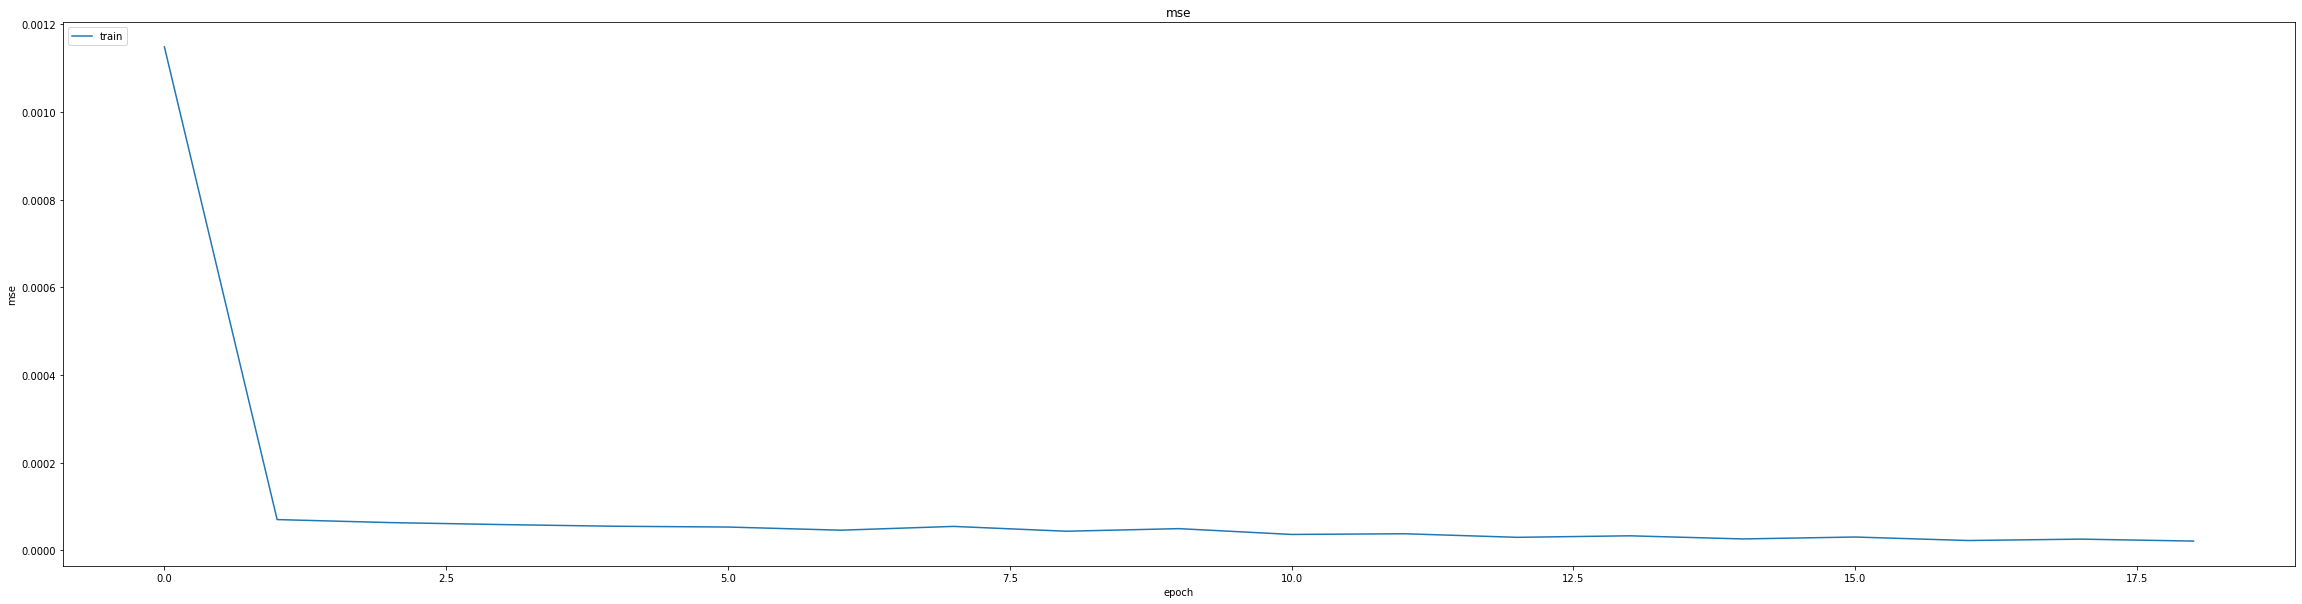

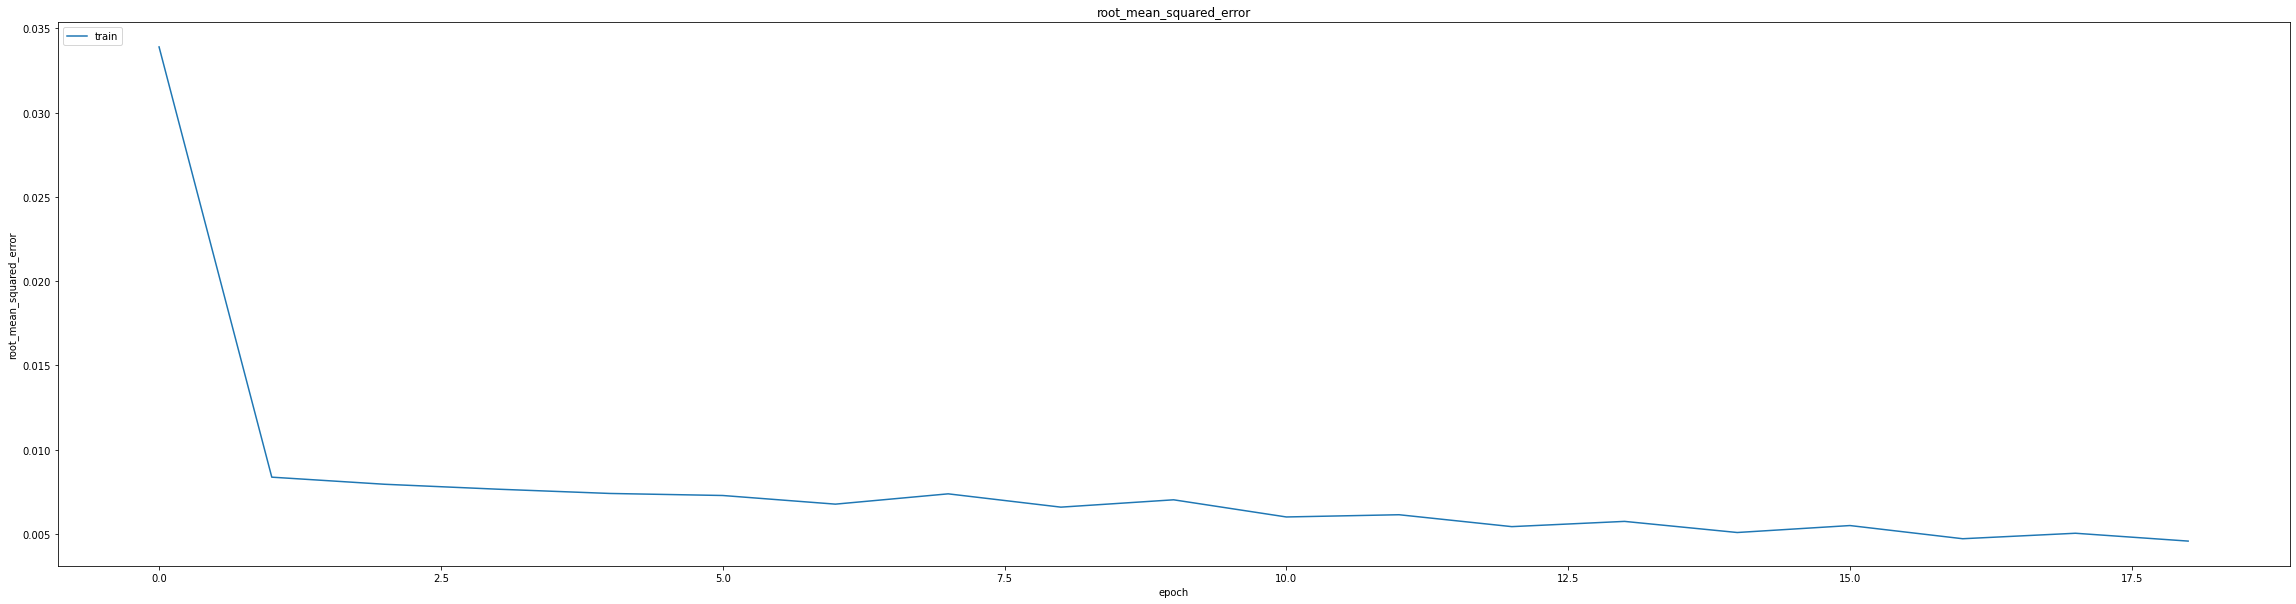

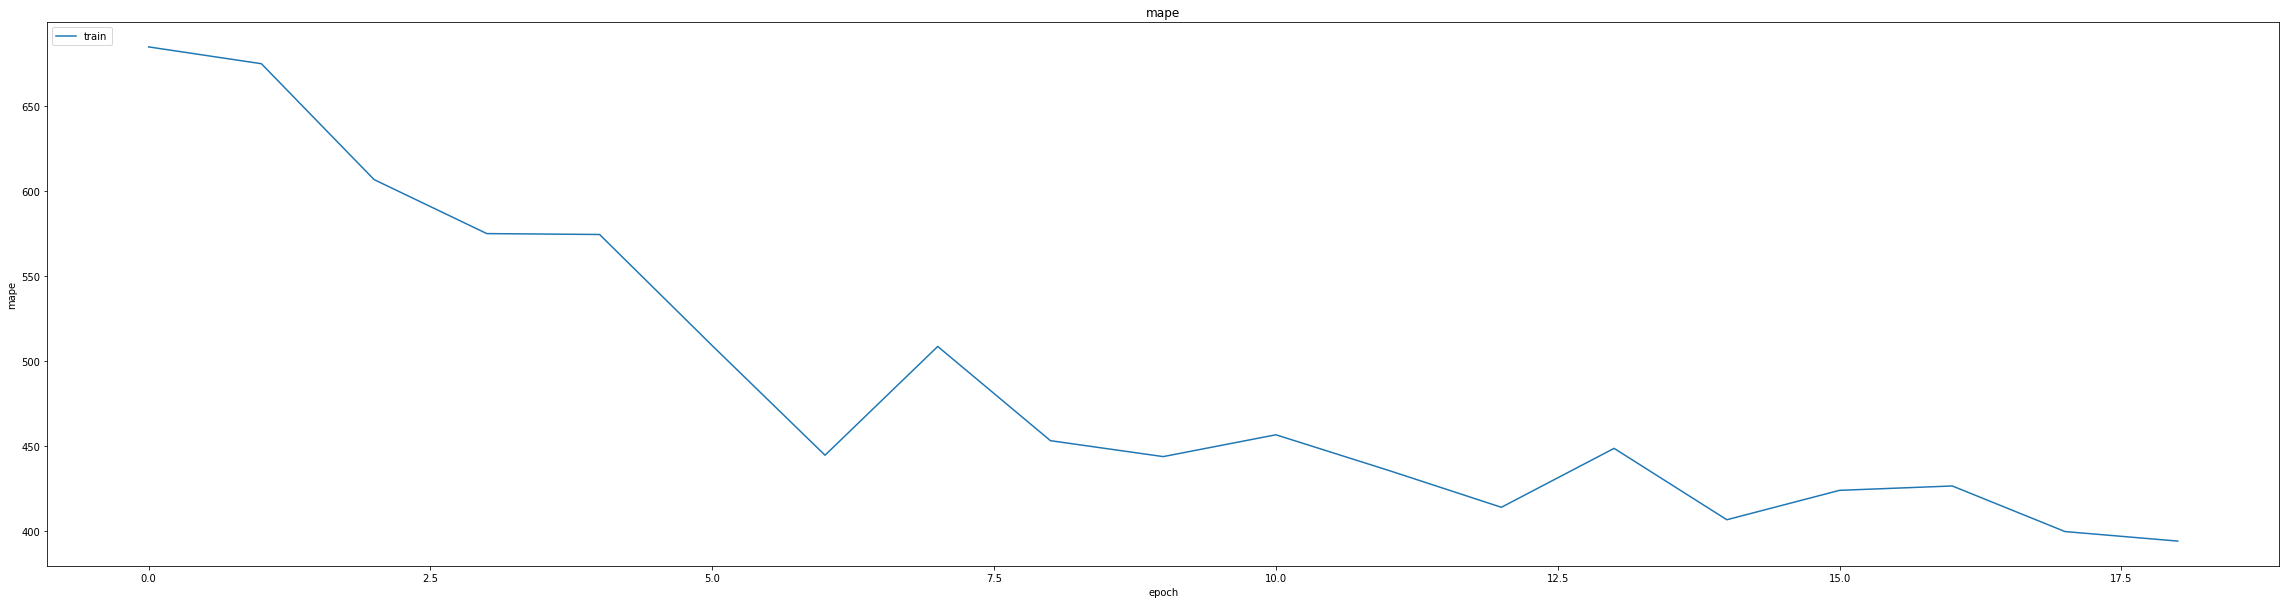

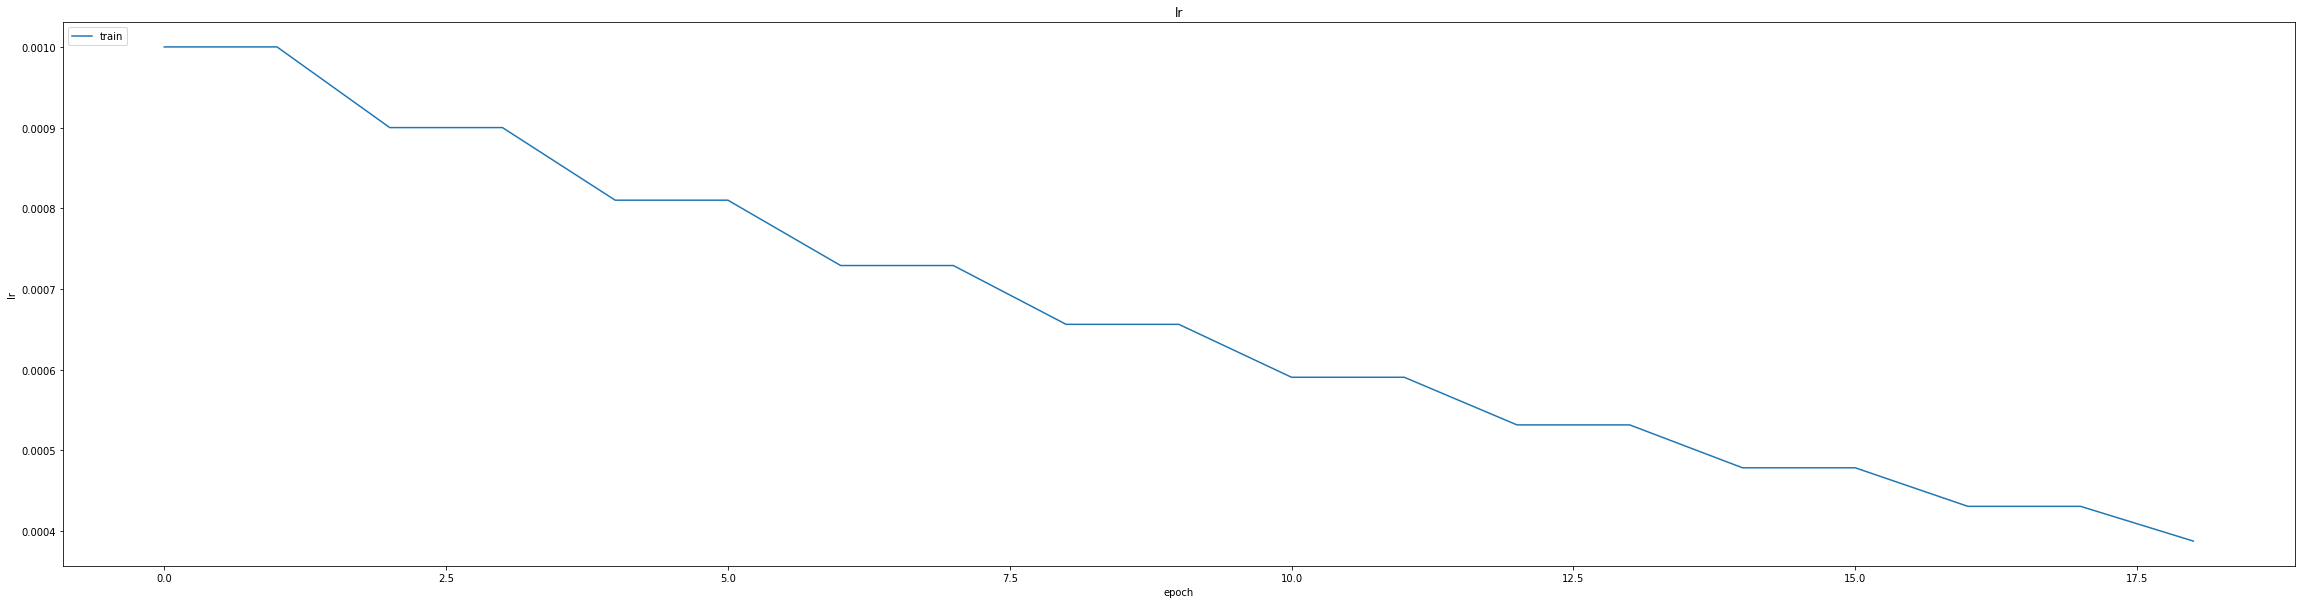

In [79]:
thesis.SummarizeHistory(history)

In [80]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.011986789293587208
0.014025365002453327


1392/1392 [==============================] - 6s 3ms/step
0.9923031239013183


1392/1392 [==============================] - 4s 3ms/step


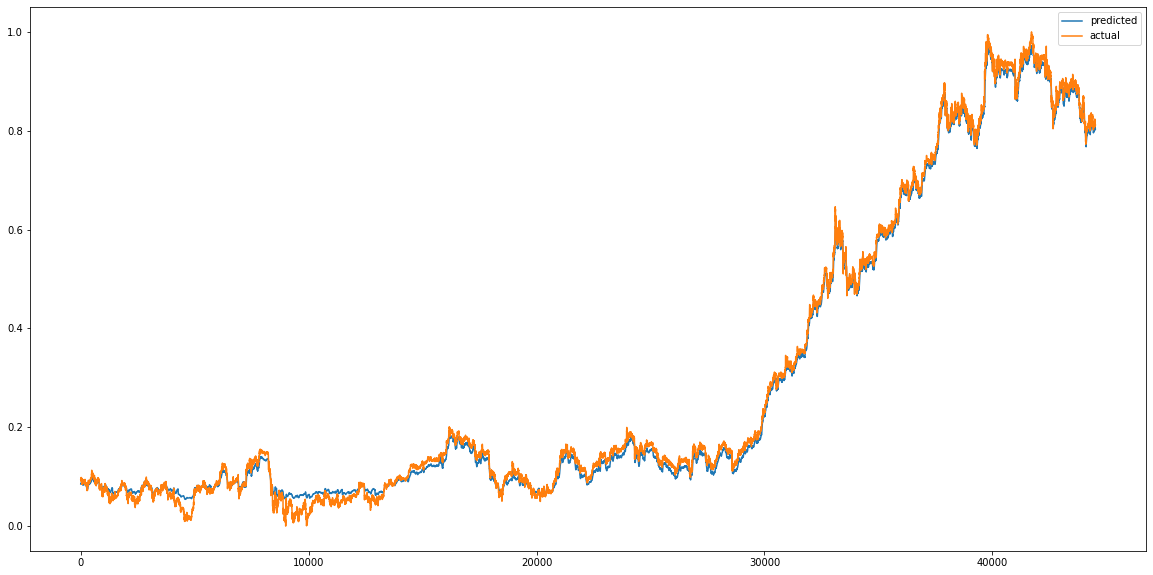

In [81]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_CNN_GRU(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


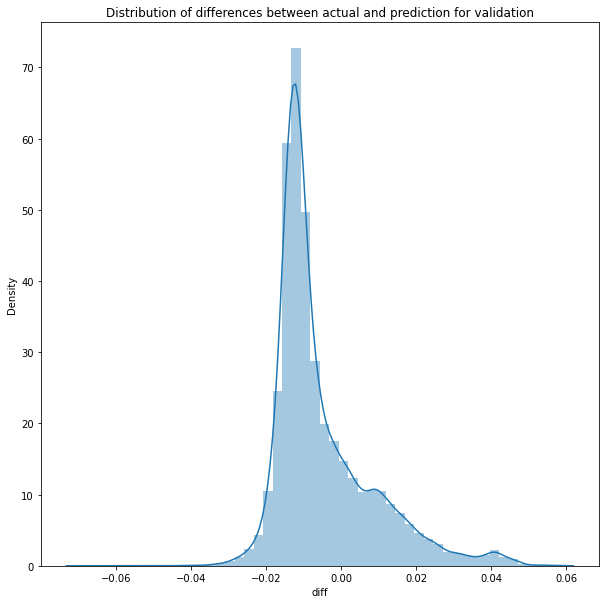

In [82]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1392/1392 [==============================] - 5s 3ms/step


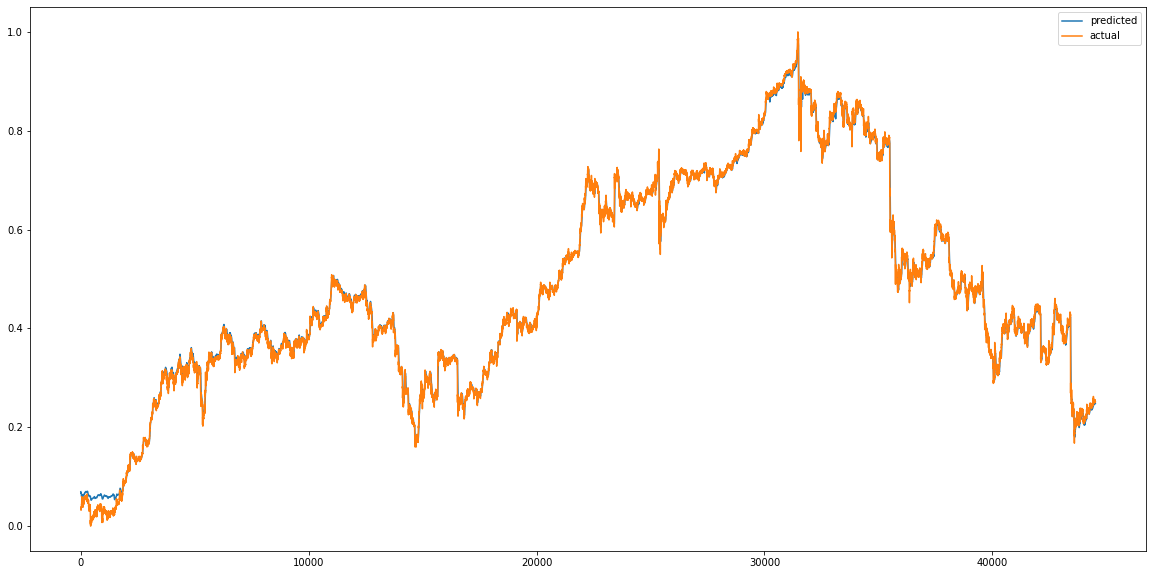

In [83]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


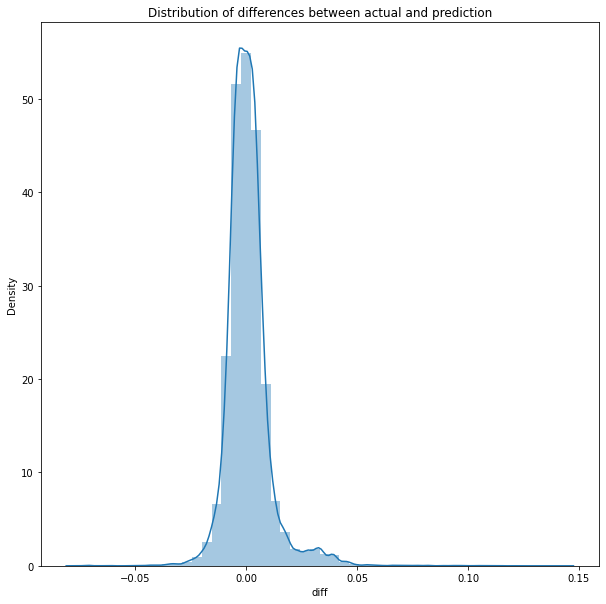

In [84]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  9.86658858763314e-05
RMSE :  0.009933070314677703
MAE :  0.006492285289917204
1392/1392 [==============================] - 4s 3ms/step
R2_Score  : 0.9979323659558595


count    44524.000000
mean         0.000832
std          0.009898
min         -0.077698
25%         -0.004594
50%         -0.000093
75%          0.004540
max          0.144023
Name: diff, dtype: float64

**BiLSTM_MODEL**

In [86]:
model= thesis.BiLSTM_Model(x_train)


In [87]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
348/348 [==============================] - ETA: 0s - loss: 513.5760 - mae: 5.2422 - mse: 513.5760 - root_mean_squared_error: 22.6622 - mape: 10672.2969
Epoch 1: val_mse improved from inf to 0.38695, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 62s 153ms/step - loss: 513.5760 - mae: 5.2422 - mse: 513.5760 - root_mean_squared_error: 22.6622 - mape: 10672.2969 - val_loss: 0.3870 - val_mae: 0.5589 - val_mse: 0.3870 - val_root_mean_squared_error: 0.6221 - val_mape: 19573.3047
Epoch 2/60
346/348 [============================>.] - ETA: 0s - loss: 0.0854 - mae: 0.2353 - mse: 0.0854 - root_mean_squared_error: 0.2922 - mape: 5058.5718
Epoch 2: val_mse improved from 0.38695 to 0.16953, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 117ms/step - loss: 0.0853 - mae: 0.2351 - mse: 0.0853 - root_mean_squared_error: 0.2920 - mape: 5043.3062 - val_loss: 0.1695 - val_mae: 0.3866 - val_mse: 0.1695 - val_root_mean_squared_error: 0.4117 - val_mape: 13333.9824
Epoch 3/60
347/348 [============================>.] - ETA: 0s - loss: 0.0387 - mae: 0.1628 - mse: 0.0387 - root_mean_squared_error: 0.1968 - mape: 3952.2283
Epoch 3: val_mse improved from 0.16953 to 0.13377, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 42s 121ms/step - loss: 0.0387 - mae: 0.1628 - mse: 0.0387 - root_mean_squared_error: 0.1968 - mape: 3951.5576 - val_loss: 0.1338 - val_mae: 0.3473 - val_mse: 0.1338 - val_root_mean_squared_error: 0.3657 - val_mape: 11577.7207
Epoch 4/60
348/348 [==============================] - ETA: 0s - loss: 0.0347 - mae: 0.1587 - mse: 0.0347 - root_mean_squared_error: 0.1864 - mape: 4235.7388
Epoch 4: val_mse improved from 0.13377 to 0.12498, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 119ms/step - loss: 0.0347 - mae: 0.1587 - mse: 0.0347 - root_mean_squared_error: 0.1864 - mape: 4235.7388 - val_loss: 0.1250 - val_mae: 0.3363 - val_mse: 0.1250 - val_root_mean_squared_error: 0.3535 - val_mape: 11041.0928
Epoch 5/60
348/348 [==============================] - ETA: 0s - loss: 0.0344 - mae: 0.1587 - mse: 0.0344 - root_mean_squared_error: 0.1856 - mape: 3600.3560
Epoch 5: val_mse improved from 0.12498 to 0.12246, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 119ms/step - loss: 0.0344 - mae: 0.1587 - mse: 0.0344 - root_mean_squared_error: 0.1856 - mape: 3600.3560 - val_loss: 0.1225 - val_mae: 0.3329 - val_mse: 0.1225 - val_root_mean_squared_error: 0.3499 - val_mape: 10907.0986
Epoch 6/60
347/348 [============================>.] - ETA: 0s - loss: 0.0336 - mae: 0.1567 - mse: 0.0336 - root_mean_squared_error: 0.1833 - mape: 3762.2795
Epoch 6: val_mse improved from 0.12246 to 0.11927, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 42s 120ms/step - loss: 0.0336 - mae: 0.1567 - mse: 0.0336 - root_mean_squared_error: 0.1833 - mape: 3761.6387 - val_loss: 0.1193 - val_mae: 0.3284 - val_mse: 0.1193 - val_root_mean_squared_error: 0.3454 - val_mape: 10779.6836
Epoch 7/60
347/348 [============================>.] - ETA: 0s - loss: 0.0329 - mae: 0.1549 - mse: 0.0329 - root_mean_squared_error: 0.1813 - mape: 3636.2139
Epoch 7: val_mse improved from 0.11927 to 0.11721, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 42s 120ms/step - loss: 0.0329 - mae: 0.1549 - mse: 0.0329 - root_mean_squared_error: 0.1813 - mape: 3635.5959 - val_loss: 0.1172 - val_mae: 0.3255 - val_mse: 0.1172 - val_root_mean_squared_error: 0.3424 - val_mape: 10651.7549
Epoch 8/60
348/348 [==============================] - ETA: 0s - loss: 0.0327 - mae: 0.1546 - mse: 0.0327 - root_mean_squared_error: 0.1808 - mape: 3940.8281
Epoch 8: val_mse improved from 0.11721 to 0.11675, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 117ms/step - loss: 0.0327 - mae: 0.1546 - mse: 0.0327 - root_mean_squared_error: 0.1808 - mape: 3940.8281 - val_loss: 0.1168 - val_mae: 0.3248 - val_mse: 0.1168 - val_root_mean_squared_error: 0.3417 - val_mape: 10640.7119
Epoch 9/60
348/348 [==============================] - ETA: 0s - loss: 0.0324 - mae: 0.1539 - mse: 0.0324 - root_mean_squared_error: 0.1801 - mape: 3291.2397
Epoch 9: val_mse improved from 0.11675 to 0.11596, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 0.0324 - mae: 0.1539 - mse: 0.0324 - root_mean_squared_error: 0.1801 - mape: 3291.2397 - val_loss: 0.1160 - val_mae: 0.3237 - val_mse: 0.1160 - val_root_mean_squared_error: 0.3405 - val_mape: 10611.2236
Epoch 10/60
346/348 [============================>.] - ETA: 0s - loss: 0.0321 - mae: 0.1532 - mse: 0.0321 - root_mean_squared_error: 0.1793 - mape: 3397.8462
Epoch 10: val_mse improved from 0.11596 to 0.11537, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 42s 122ms/step - loss: 0.0321 - mae: 0.1532 - mse: 0.0321 - root_mean_squared_error: 0.1793 - mape: 3387.6079 - val_loss: 0.1154 - val_mae: 0.3228 - val_mse: 0.1154 - val_root_mean_squared_error: 0.3397 - val_mape: 10602.7129
Epoch 11/60
346/348 [============================>.] - ETA: 0s - loss: 0.0317 - mae: 0.1520 - mse: 0.0317 - root_mean_squared_error: 0.1781 - mape: 3587.5208
Epoch 11: val_mse improved from 0.11537 to 0.11393, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 0.0317 - mae: 0.1520 - mse: 0.0317 - root_mean_squared_error: 0.1781 - mape: 3576.6960 - val_loss: 0.1139 - val_mae: 0.3207 - val_mse: 0.1139 - val_root_mean_squared_error: 0.3375 - val_mape: 10542.1748
Epoch 12/60
346/348 [============================>.] - ETA: 0s - loss: 0.0312 - mae: 0.1508 - mse: 0.0312 - root_mean_squared_error: 0.1767 - mape: 3205.9231
Epoch 12: val_mse improved from 0.11393 to 0.11261, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 117ms/step - loss: 0.0312 - mae: 0.1508 - mse: 0.0312 - root_mean_squared_error: 0.1767 - mape: 3196.2695 - val_loss: 0.1126 - val_mae: 0.3187 - val_mse: 0.1126 - val_root_mean_squared_error: 0.3356 - val_mape: 10502.4326
Epoch 13/60
346/348 [============================>.] - ETA: 0s - loss: 0.0305 - mae: 0.1487 - mse: 0.0305 - root_mean_squared_error: 0.1746 - mape: 3511.0513
Epoch 13: val_mse improved from 0.11261 to 0.11099, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 119ms/step - loss: 0.0305 - mae: 0.1487 - mse: 0.0305 - root_mean_squared_error: 0.1746 - mape: 3500.4751 - val_loss: 0.1110 - val_mae: 0.3162 - val_mse: 0.1110 - val_root_mean_squared_error: 0.3331 - val_mape: 10459.0635
Epoch 14/60
348/348 [==============================] - ETA: 0s - loss: 0.0295 - mae: 0.1458 - mse: 0.0295 - root_mean_squared_error: 0.1717 - mape: 3323.9827
Epoch 14: val_mse improved from 0.11099 to 0.10797, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 0.0295 - mae: 0.1458 - mse: 0.0295 - root_mean_squared_error: 0.1717 - mape: 3323.9827 - val_loss: 0.1080 - val_mae: 0.3116 - val_mse: 0.1080 - val_root_mean_squared_error: 0.3286 - val_mape: 10346.1035
Epoch 15/60
348/348 [==============================] - ETA: 0s - loss: 0.0277 - mae: 0.1405 - mse: 0.0277 - root_mean_squared_error: 0.1664 - mape: 3479.9680
Epoch 15: val_mse improved from 0.10797 to 0.10097, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 42s 121ms/step - loss: 0.0277 - mae: 0.1405 - mse: 0.0277 - root_mean_squared_error: 0.1664 - mape: 3479.9680 - val_loss: 0.1010 - val_mae: 0.3008 - val_mse: 0.1010 - val_root_mean_squared_error: 0.3178 - val_mape: 10084.5430
Epoch 16/60
346/348 [============================>.] - ETA: 0s - loss: 0.0186 - mae: 0.1100 - mse: 0.0186 - root_mean_squared_error: 0.1364 - mape: 3461.8159
Epoch 16: val_mse improved from 0.10097 to 0.04420, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 0.0186 - mae: 0.1099 - mse: 0.0186 - root_mean_squared_error: 0.1363 - mape: 3451.3113 - val_loss: 0.0442 - val_mae: 0.1934 - val_mse: 0.0442 - val_root_mean_squared_error: 0.2102 - val_mape: 7537.8760
Epoch 17/60
348/348 [==============================] - ETA: 0s - loss: 0.0069 - mae: 0.0646 - mse: 0.0069 - root_mean_squared_error: 0.0830 - mape: 2320.0115
Epoch 17: val_mse improved from 0.04420 to 0.03003, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 119ms/step - loss: 0.0069 - mae: 0.0646 - mse: 0.0069 - root_mean_squared_error: 0.0830 - mape: 2320.0115 - val_loss: 0.0300 - val_mae: 0.1579 - val_mse: 0.0300 - val_root_mean_squared_error: 0.1733 - val_mape: 6445.7109
Epoch 18/60
346/348 [============================>.] - ETA: 0s - loss: 0.0053 - mae: 0.0565 - mse: 0.0053 - root_mean_squared_error: 0.0728 - mape: 2062.4851
Epoch 18: val_mse improved from 0.03003 to 0.02475, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 117ms/step - loss: 0.0053 - mae: 0.0565 - mse: 0.0053 - root_mean_squared_error: 0.0728 - mape: 2056.2341 - val_loss: 0.0248 - val_mae: 0.1422 - val_mse: 0.0248 - val_root_mean_squared_error: 0.1573 - val_mape: 5957.1592
Epoch 19/60
346/348 [============================>.] - ETA: 0s - loss: 0.0044 - mae: 0.0514 - mse: 0.0044 - root_mean_squared_error: 0.0663 - mape: 1892.5504
Epoch 19: val_mse improved from 0.02475 to 0.02069, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 0.0044 - mae: 0.0514 - mse: 0.0044 - root_mean_squared_error: 0.0663 - mape: 1886.8129 - val_loss: 0.0207 - val_mae: 0.1292 - val_mse: 0.0207 - val_root_mean_squared_error: 0.1438 - val_mape: 5674.4995
Epoch 20/60
348/348 [==============================] - ETA: 0s - loss: 0.0038 - mae: 0.0475 - mse: 0.0038 - root_mean_squared_error: 0.0613 - mape: 1972.4464
Epoch 20: val_mse improved from 0.02069 to 0.01730, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 119ms/step - loss: 0.0038 - mae: 0.0475 - mse: 0.0038 - root_mean_squared_error: 0.0613 - mape: 1972.4464 - val_loss: 0.0173 - val_mae: 0.1170 - val_mse: 0.0173 - val_root_mean_squared_error: 0.1315 - val_mape: 5377.9824
Epoch 21/60
347/348 [============================>.] - ETA: 0s - loss: 0.0032 - mae: 0.0438 - mse: 0.0032 - root_mean_squared_error: 0.0565 - mape: 1948.4534
Epoch 21: val_mse improved from 0.01730 to 0.01425, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 0.0032 - mae: 0.0438 - mse: 0.0032 - root_mean_squared_error: 0.0565 - mape: 1948.1215 - val_loss: 0.0143 - val_mae: 0.1055 - val_mse: 0.0143 - val_root_mean_squared_error: 0.1194 - val_mape: 5052.8154
Epoch 22/60
347/348 [============================>.] - ETA: 0s - loss: 0.0029 - mae: 0.0414 - mse: 0.0029 - root_mean_squared_error: 0.0534 - mape: 1535.6085
Epoch 22: val_mse improved from 0.01425 to 0.01208, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 0.0029 - mae: 0.0414 - mse: 0.0029 - root_mean_squared_error: 0.0534 - mape: 1535.3455 - val_loss: 0.0121 - val_mae: 0.0962 - val_mse: 0.0121 - val_root_mean_squared_error: 0.1099 - val_mape: 4793.1035
Epoch 23/60
348/348 [==============================] - ETA: 0s - loss: 0.0026 - mae: 0.0394 - mse: 0.0026 - root_mean_squared_error: 0.0508 - mape: 1549.8379
Epoch 23: val_mse improved from 0.01208 to 0.01036, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 117ms/step - loss: 0.0026 - mae: 0.0394 - mse: 0.0026 - root_mean_squared_error: 0.0508 - mape: 1549.8379 - val_loss: 0.0104 - val_mae: 0.0884 - val_mse: 0.0104 - val_root_mean_squared_error: 0.1018 - val_mape: 4584.8882
Epoch 24/60
347/348 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0374 - mse: 0.0023 - root_mean_squared_error: 0.0482 - mape: 1581.0762
Epoch 24: val_mse improved from 0.01036 to 0.00889, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 42s 120ms/step - loss: 0.0023 - mae: 0.0374 - mse: 0.0023 - root_mean_squared_error: 0.0482 - mape: 1580.8051 - val_loss: 0.0089 - val_mae: 0.0808 - val_mse: 0.0089 - val_root_mean_squared_error: 0.0943 - val_mape: 4412.5308
Epoch 25/60
347/348 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0355 - mse: 0.0021 - root_mean_squared_error: 0.0459 - mape: 1581.5483
Epoch 25: val_mse improved from 0.00889 to 0.00752, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 40s 116ms/step - loss: 0.0021 - mae: 0.0355 - mse: 0.0021 - root_mean_squared_error: 0.0459 - mape: 1581.2775 - val_loss: 0.0075 - val_mae: 0.0733 - val_mse: 0.0075 - val_root_mean_squared_error: 0.0867 - val_mape: 4256.2744
Epoch 26/60
346/348 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0337 - mse: 0.0019 - root_mean_squared_error: 0.0435 - mape: 1577.3181
Epoch 26: val_mse improved from 0.00752 to 0.00708, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 117ms/step - loss: 0.0019 - mae: 0.0337 - mse: 0.0019 - root_mean_squared_error: 0.0435 - mape: 1572.5287 - val_loss: 0.0071 - val_mae: 0.0720 - val_mse: 0.0071 - val_root_mean_squared_error: 0.0842 - val_mape: 4115.9331
Epoch 27/60
348/348 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0316 - mse: 0.0017 - root_mean_squared_error: 0.0408 - mape: 1528.3352
Epoch 27: val_mse improved from 0.00708 to 0.00570, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 0.0017 - mae: 0.0316 - mse: 0.0017 - root_mean_squared_error: 0.0408 - mape: 1528.3352 - val_loss: 0.0057 - val_mae: 0.0617 - val_mse: 0.0057 - val_root_mean_squared_error: 0.0755 - val_mape: 3995.4500
Epoch 28/60
347/348 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0300 - mse: 0.0015 - root_mean_squared_error: 0.0389 - mape: 1406.7885
Epoch 28: val_mse improved from 0.00570 to 0.00522, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 117ms/step - loss: 0.0015 - mae: 0.0300 - mse: 0.0015 - root_mean_squared_error: 0.0389 - mape: 1406.5472 - val_loss: 0.0052 - val_mae: 0.0581 - val_mse: 0.0052 - val_root_mean_squared_error: 0.0723 - val_mape: 3911.2483
Epoch 29/60
348/348 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0284 - mse: 0.0014 - root_mean_squared_error: 0.0368 - mape: 1322.4166
Epoch 29: val_mse improved from 0.00522 to 0.00492, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 42s 121ms/step - loss: 0.0014 - mae: 0.0284 - mse: 0.0014 - root_mean_squared_error: 0.0368 - mape: 1322.4166 - val_loss: 0.0049 - val_mae: 0.0573 - val_mse: 0.0049 - val_root_mean_squared_error: 0.0701 - val_mape: 3818.9268
Epoch 30/60
347/348 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0270 - mse: 0.0012 - root_mean_squared_error: 0.0352 - mape: 1495.2095
Epoch 30: val_mse improved from 0.00492 to 0.00448, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 0.0012 - mae: 0.0270 - mse: 0.0012 - root_mean_squared_error: 0.0352 - mape: 1494.9531 - val_loss: 0.0045 - val_mae: 0.0537 - val_mse: 0.0045 - val_root_mean_squared_error: 0.0670 - val_mape: 3760.5085
Epoch 31/60
347/348 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0258 - mse: 0.0011 - root_mean_squared_error: 0.0336 - mape: 1305.4780
Epoch 31: val_mse improved from 0.00448 to 0.00439, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 0.0011 - mae: 0.0258 - mse: 0.0011 - root_mean_squared_error: 0.0336 - mape: 1305.2550 - val_loss: 0.0044 - val_mae: 0.0525 - val_mse: 0.0044 - val_root_mean_squared_error: 0.0662 - val_mape: 3733.4678
Epoch 32/60
346/348 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0248 - mse: 0.0010 - root_mean_squared_error: 0.0322 - mape: 1286.1533
Epoch 32: val_mse improved from 0.00439 to 0.00427, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 0.0010 - mae: 0.0248 - mse: 0.0010 - root_mean_squared_error: 0.0322 - mape: 1282.2426 - val_loss: 0.0043 - val_mae: 0.0530 - val_mse: 0.0043 - val_root_mean_squared_error: 0.0654 - val_mape: 3684.0698
Epoch 33/60
347/348 [============================>.] - ETA: 0s - loss: 9.3001e-04 - mae: 0.0234 - mse: 9.3001e-04 - root_mean_squared_error: 0.0305 - mape: 1282.1172
Epoch 33: val_mse did not improve from 0.00427
348/348 [==============================] - 8s 23ms/step - loss: 9.3003e-04 - mae: 0.0234 - mse: 9.3003e-04 - root_mean_squared_error: 0.0305 - mape: 1281.8973 - val_loss: 0.0043 - val_mae: 0.0546 - val_mse: 0.0043 - val_root_mean_squared_error: 0.0656 - val_mape: 3678.4316
Epoch 34/60
347/348 [============================>.] - ETA: 0s - loss: 8.4094e-04 - mae: 0.0222 - mse: 8.4094e-04 - root_mean_squared_error: 0.0290 - mape: 1409.0919
Epoch 34: val_mse improved from 0.00427 to 0.00411, saving model to /content/dr

348/348 [==============================] - 40s 116ms/step - loss: 8.4089e-04 - mae: 0.0222 - mse: 8.4089e-04 - root_mean_squared_error: 0.0290 - mape: 1408.8505 - val_loss: 0.0041 - val_mae: 0.0512 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0641 - val_mape: 3690.6482
Epoch 35/60
348/348 [==============================] - ETA: 0s - loss: 7.9719e-04 - mae: 0.0217 - mse: 7.9719e-04 - root_mean_squared_error: 0.0282 - mape: 1382.6365
Epoch 35: val_mse improved from 0.00411 to 0.00390, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 7.9719e-04 - mae: 0.0217 - mse: 7.9719e-04 - root_mean_squared_error: 0.0282 - mape: 1382.6365 - val_loss: 0.0039 - val_mae: 0.0484 - val_mse: 0.0039 - val_root_mean_squared_error: 0.0625 - val_mape: 3645.8735
Epoch 36/60
348/348 [==============================] - ETA: 0s - loss: 6.8301e-04 - mae: 0.0200 - mse: 6.8301e-04 - root_mean_squared_error: 0.0261 - mape: 1220.2198
Epoch 36: val_mse improved from 0.00390 to 0.00367, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 6.8301e-04 - mae: 0.0200 - mse: 6.8301e-04 - root_mean_squared_error: 0.0261 - mape: 1220.2198 - val_loss: 0.0037 - val_mae: 0.0460 - val_mse: 0.0037 - val_root_mean_squared_error: 0.0606 - val_mape: 3626.5242
Epoch 37/60
347/348 [============================>.] - ETA: 0s - loss: 6.1707e-04 - mae: 0.0190 - mse: 6.1707e-04 - root_mean_squared_error: 0.0248 - mape: 1203.0458
Epoch 37: val_mse did not improve from 0.00367
348/348 [==============================] - 8s 22ms/step - loss: 6.1709e-04 - mae: 0.0190 - mse: 6.1709e-04 - root_mean_squared_error: 0.0248 - mape: 1202.8394 - val_loss: 0.0041 - val_mae: 0.0538 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0639 - val_mape: 3596.7944
Epoch 38/60
346/348 [============================>.] - ETA: 0s - loss: 5.5413e-04 - mae: 0.0180 - mse: 5.5413e-04 - root_mean_squared_error: 0.0235 - mape: 1188.9167
Epoch 38: val_mse improved from 0.00367 to 0.00343, saving model to /co

348/348 [==============================] - 41s 117ms/step - loss: 5.5396e-04 - mae: 0.0180 - mse: 5.5396e-04 - root_mean_squared_error: 0.0235 - mape: 1185.3015 - val_loss: 0.0034 - val_mae: 0.0454 - val_mse: 0.0034 - val_root_mean_squared_error: 0.0585 - val_mape: 3565.8606
Epoch 39/60
347/348 [============================>.] - ETA: 0s - loss: 5.2532e-04 - mae: 0.0176 - mse: 5.2532e-04 - root_mean_squared_error: 0.0229 - mape: 1196.5704
Epoch 39: val_mse improved from 0.00343 to 0.00320, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 5.2531e-04 - mae: 0.0176 - mse: 5.2531e-04 - root_mean_squared_error: 0.0229 - mape: 1196.3652 - val_loss: 0.0032 - val_mae: 0.0423 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0566 - val_mape: 3532.9934
Epoch 40/60
346/348 [============================>.] - ETA: 0s - loss: 4.3328e-04 - mae: 0.0159 - mse: 4.3328e-04 - root_mean_squared_error: 0.0208 - mape: 1148.4310
Epoch 40: val_mse improved from 0.00320 to 0.00294, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 4.3300e-04 - mae: 0.0159 - mse: 4.3300e-04 - root_mean_squared_error: 0.0208 - mape: 1144.9344 - val_loss: 0.0029 - val_mae: 0.0401 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0542 - val_mape: 3462.3396
Epoch 41/60
346/348 [============================>.] - ETA: 0s - loss: 3.9125e-04 - mae: 0.0151 - mse: 3.9125e-04 - root_mean_squared_error: 0.0198 - mape: 1101.9758
Epoch 41: val_mse improved from 0.00294 to 0.00280, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 117ms/step - loss: 3.9190e-04 - mae: 0.0151 - mse: 3.9190e-04 - root_mean_squared_error: 0.0198 - mape: 1098.6257 - val_loss: 0.0028 - val_mae: 0.0394 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0529 - val_mape: 3394.8650
Epoch 42/60
347/348 [============================>.] - ETA: 0s - loss: 3.5769e-04 - mae: 0.0145 - mse: 3.5769e-04 - root_mean_squared_error: 0.0189 - mape: 1106.6462
Epoch 42: val_mse improved from 0.00280 to 0.00274, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 3.5767e-04 - mae: 0.0145 - mse: 3.5767e-04 - root_mean_squared_error: 0.0189 - mape: 1106.4562 - val_loss: 0.0027 - val_mae: 0.0380 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0523 - val_mape: 3390.7947
Epoch 43/60
347/348 [============================>.] - ETA: 0s - loss: 3.2077e-04 - mae: 0.0137 - mse: 3.2077e-04 - root_mean_squared_error: 0.0179 - mape: 1107.2455
Epoch 43: val_mse improved from 0.00274 to 0.00254, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 40s 116ms/step - loss: 3.2086e-04 - mae: 0.0137 - mse: 3.2086e-04 - root_mean_squared_error: 0.0179 - mape: 1107.0558 - val_loss: 0.0025 - val_mae: 0.0371 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0504 - val_mape: 3306.6868
Epoch 44/60
348/348 [==============================] - ETA: 0s - loss: 3.0417e-04 - mae: 0.0134 - mse: 3.0417e-04 - root_mean_squared_error: 0.0174 - mape: 1075.2009
Epoch 44: val_mse improved from 0.00254 to 0.00243, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 117ms/step - loss: 3.0417e-04 - mae: 0.0134 - mse: 3.0417e-04 - root_mean_squared_error: 0.0174 - mape: 1075.2009 - val_loss: 0.0024 - val_mae: 0.0366 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0493 - val_mape: 3236.8743
Epoch 45/60
348/348 [==============================] - ETA: 0s - loss: 2.8999e-04 - mae: 0.0131 - mse: 2.8999e-04 - root_mean_squared_error: 0.0170 - mape: 1037.1244
Epoch 45: val_mse did not improve from 0.00243
348/348 [==============================] - 8s 24ms/step - loss: 2.8999e-04 - mae: 0.0131 - mse: 2.8999e-04 - root_mean_squared_error: 0.0170 - mape: 1037.1244 - val_loss: 0.0026 - val_mae: 0.0399 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0511 - val_mape: 3185.0994
Epoch 46/60
347/348 [============================>.] - ETA: 0s - loss: 2.4704e-04 - mae: 0.0120 - mse: 2.4704e-04 - root_mean_squared_error: 0.0157 - mape: 1073.8853
Epoch 46: val_mse improved from 0.00243 to 0.00211, saving model to /co

348/348 [==============================] - 42s 120ms/step - loss: 2.4701e-04 - mae: 0.0120 - mse: 2.4701e-04 - root_mean_squared_error: 0.0157 - mape: 1073.7007 - val_loss: 0.0021 - val_mae: 0.0327 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0460 - val_mape: 3119.3193
Epoch 47/60
346/348 [============================>.] - ETA: 0s - loss: 2.4662e-04 - mae: 0.0120 - mse: 2.4662e-04 - root_mean_squared_error: 0.0157 - mape: 967.5623
Epoch 47: val_mse improved from 0.00211 to 0.00209, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 117ms/step - loss: 2.4632e-04 - mae: 0.0120 - mse: 2.4632e-04 - root_mean_squared_error: 0.0157 - mape: 964.6149 - val_loss: 0.0021 - val_mae: 0.0342 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0457 - val_mape: 3079.6133
Epoch 48/60
348/348 [==============================] - ETA: 0s - loss: 2.0812e-04 - mae: 0.0110 - mse: 2.0812e-04 - root_mean_squared_error: 0.0144 - mape: 953.2059
Epoch 48: val_mse did not improve from 0.00209
348/348 [==============================] - 8s 23ms/step - loss: 2.0812e-04 - mae: 0.0110 - mse: 2.0812e-04 - root_mean_squared_error: 0.0144 - mape: 953.2059 - val_loss: 0.0021 - val_mae: 0.0366 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0462 - val_mape: 2981.5681
Epoch 49/60
348/348 [==============================] - ETA: 0s - loss: 2.1433e-04 - mae: 0.0112 - mse: 2.1433e-04 - root_mean_squared_error: 0.0146 - mape: 1032.3319
Epoch 49: val_mse improved from 0.00209 to 0.00208, saving model to /conte

348/348 [==============================] - 41s 117ms/step - loss: 2.1433e-04 - mae: 0.0112 - mse: 2.1433e-04 - root_mean_squared_error: 0.0146 - mape: 1032.3319 - val_loss: 0.0021 - val_mae: 0.0352 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0456 - val_mape: 2990.7993
Epoch 50/60
347/348 [============================>.] - ETA: 0s - loss: 1.9613e-04 - mae: 0.0104 - mse: 1.9613e-04 - root_mean_squared_error: 0.0140 - mape: 926.3781
Epoch 50: val_mse improved from 0.00208 to 0.00171, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 40s 117ms/step - loss: 1.9612e-04 - mae: 0.0104 - mse: 1.9612e-04 - root_mean_squared_error: 0.0140 - mape: 926.2190 - val_loss: 0.0017 - val_mae: 0.0316 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0414 - val_mape: 2903.1411
Epoch 51/60
347/348 [============================>.] - ETA: 0s - loss: 1.7378e-04 - mae: 0.0101 - mse: 1.7378e-04 - root_mean_squared_error: 0.0132 - mape: 917.8074
Epoch 51: val_mse did not improve from 0.00171
348/348 [==============================] - 8s 22ms/step - loss: 1.7377e-04 - mae: 0.0101 - mse: 1.7377e-04 - root_mean_squared_error: 0.0132 - mape: 917.6498 - val_loss: 0.0018 - val_mae: 0.0338 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0423 - val_mape: 2834.1470
Epoch 52/60
346/348 [============================>.] - ETA: 0s - loss: 1.7044e-04 - mae: 0.0100 - mse: 1.7044e-04 - root_mean_squared_error: 0.0131 - mape: 872.8455
Epoch 52: val_mse improved from 0.00171 to 0.00152, saving model to /conten

348/348 [==============================] - 42s 120ms/step - loss: 1.7097e-04 - mae: 0.0100 - mse: 1.7097e-04 - root_mean_squared_error: 0.0131 - mape: 870.1908 - val_loss: 0.0015 - val_mae: 0.0313 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0389 - val_mape: 2743.6370
Epoch 53/60
347/348 [============================>.] - ETA: 0s - loss: 1.6502e-04 - mae: 0.0098 - mse: 1.6502e-04 - root_mean_squared_error: 0.0128 - mape: 860.1604
Epoch 53: val_mse improved from 0.00152 to 0.00129, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 1.6501e-04 - mae: 0.0098 - mse: 1.6501e-04 - root_mean_squared_error: 0.0128 - mape: 860.0128 - val_loss: 0.0013 - val_mae: 0.0256 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0359 - val_mape: 2720.1606
Epoch 54/60
346/348 [============================>.] - ETA: 0s - loss: 1.5593e-04 - mae: 0.0095 - mse: 1.5593e-04 - root_mean_squared_error: 0.0125 - mape: 843.9425
Epoch 54: val_mse did not improve from 0.00129
348/348 [==============================] - 8s 23ms/step - loss: 1.5586e-04 - mae: 0.0095 - mse: 1.5586e-04 - root_mean_squared_error: 0.0125 - mape: 841.3732 - val_loss: 0.0015 - val_mae: 0.0312 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0388 - val_mape: 2727.8657
Epoch 55/60
346/348 [============================>.] - ETA: 0s - loss: 1.4846e-04 - mae: 0.0093 - mse: 1.4846e-04 - root_mean_squared_error: 0.0122 - mape: 865.3960
Epoch 55: val_mse did not improve from 0.00129
348/348 [===================

348/348 [==============================] - 41s 118ms/step - loss: 1.3617e-04 - mae: 0.0089 - mse: 1.3617e-04 - root_mean_squared_error: 0.0117 - mape: 826.9343 - val_loss: 0.0013 - val_mae: 0.0288 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0357 - val_mape: 2591.7725
Epoch 57/60
348/348 [==============================] - ETA: 0s - loss: 1.4678e-04 - mae: 0.0093 - mse: 1.4678e-04 - root_mean_squared_error: 0.0121 - mape: 796.6248
Epoch 57: val_mse did not improve from 0.00128
348/348 [==============================] - 8s 23ms/step - loss: 1.4678e-04 - mae: 0.0093 - mse: 1.4678e-04 - root_mean_squared_error: 0.0121 - mape: 796.6248 - val_loss: 0.0014 - val_mae: 0.0307 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0370 - val_mape: 2607.5625
Epoch 58/60
347/348 [============================>.] - ETA: 0s - loss: 1.3090e-04 - mae: 0.0088 - mse: 1.3090e-04 - root_mean_squared_error: 0.0114 - mape: 839.4689
Epoch 58: val_mse improved from 0.00128 to 0.00113, saving model to /conten

348/348 [==============================] - 40s 116ms/step - loss: 1.3089e-04 - mae: 0.0088 - mse: 1.3089e-04 - root_mean_squared_error: 0.0114 - mape: 839.3246 - val_loss: 0.0011 - val_mae: 0.0256 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0336 - val_mape: 2563.5334
Epoch 59/60
348/348 [==============================] - ETA: 0s - loss: 1.2275e-04 - mae: 0.0085 - mse: 1.2275e-04 - root_mean_squared_error: 0.0111 - mape: 830.1207
Epoch 59: val_mse improved from 0.00113 to 0.00106, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 42s 121ms/step - loss: 1.2275e-04 - mae: 0.0085 - mse: 1.2275e-04 - root_mean_squared_error: 0.0111 - mape: 830.1207 - val_loss: 0.0011 - val_mae: 0.0256 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0326 - val_mape: 2519.8105
Epoch 60/60
348/348 [==============================] - ETA: 0s - loss: 1.1133e-04 - mae: 0.0081 - mse: 1.1133e-04 - root_mean_squared_error: 0.0106 - mape: 775.4550
Epoch 60: val_mse improved from 0.00106 to 0.00104, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 42s 120ms/step - loss: 1.1133e-04 - mae: 0.0081 - mse: 1.1133e-04 - root_mean_squared_error: 0.0106 - mape: 775.4550 - val_loss: 0.0010 - val_mae: 0.0257 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0323 - val_mape: 2471.1252


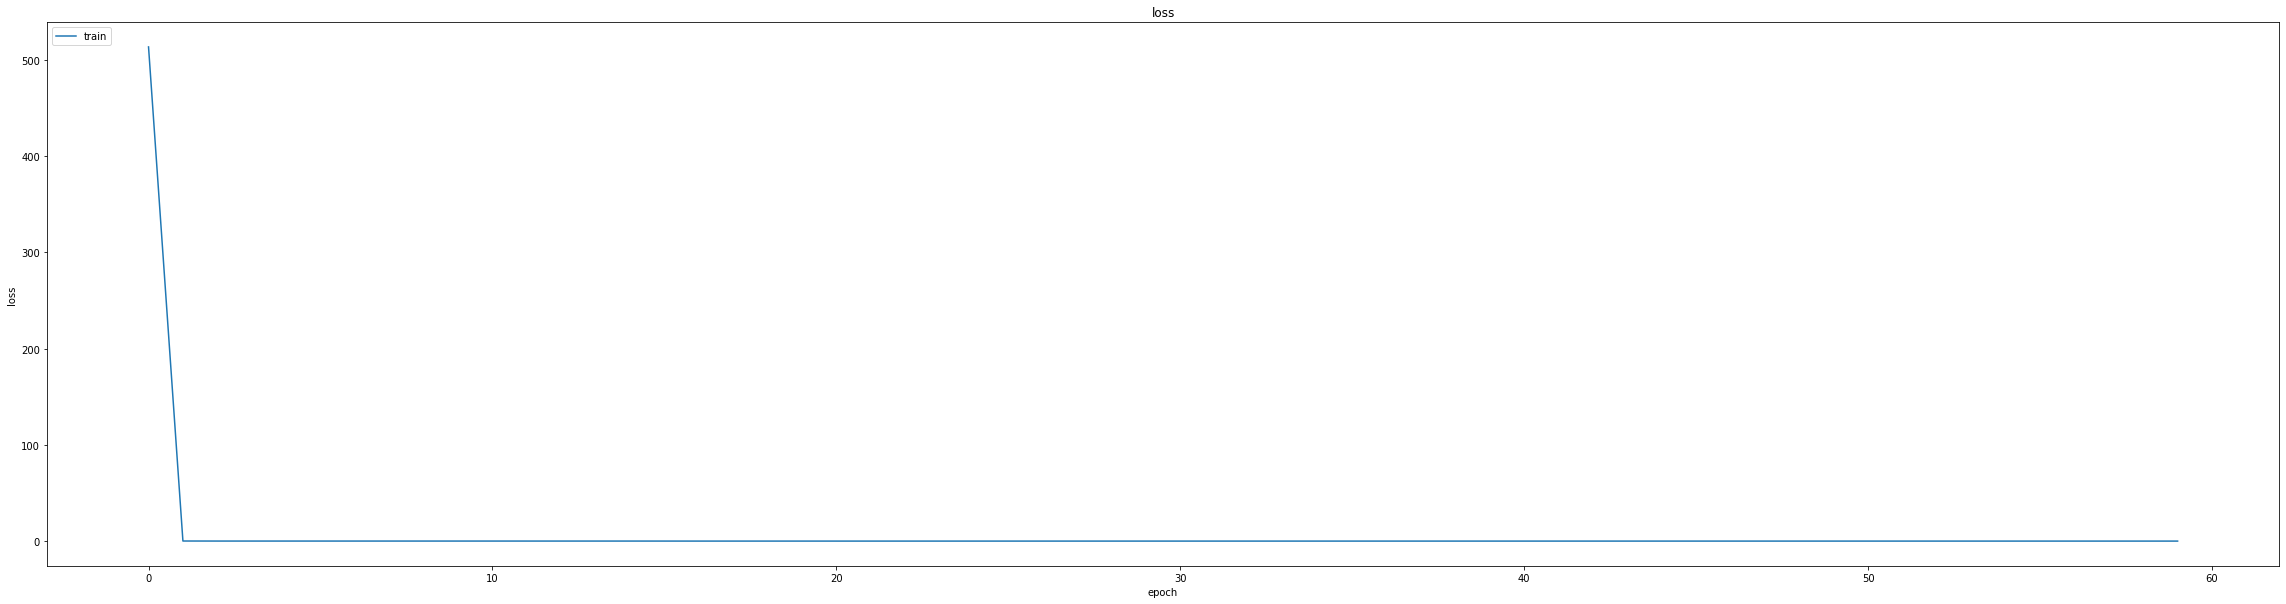

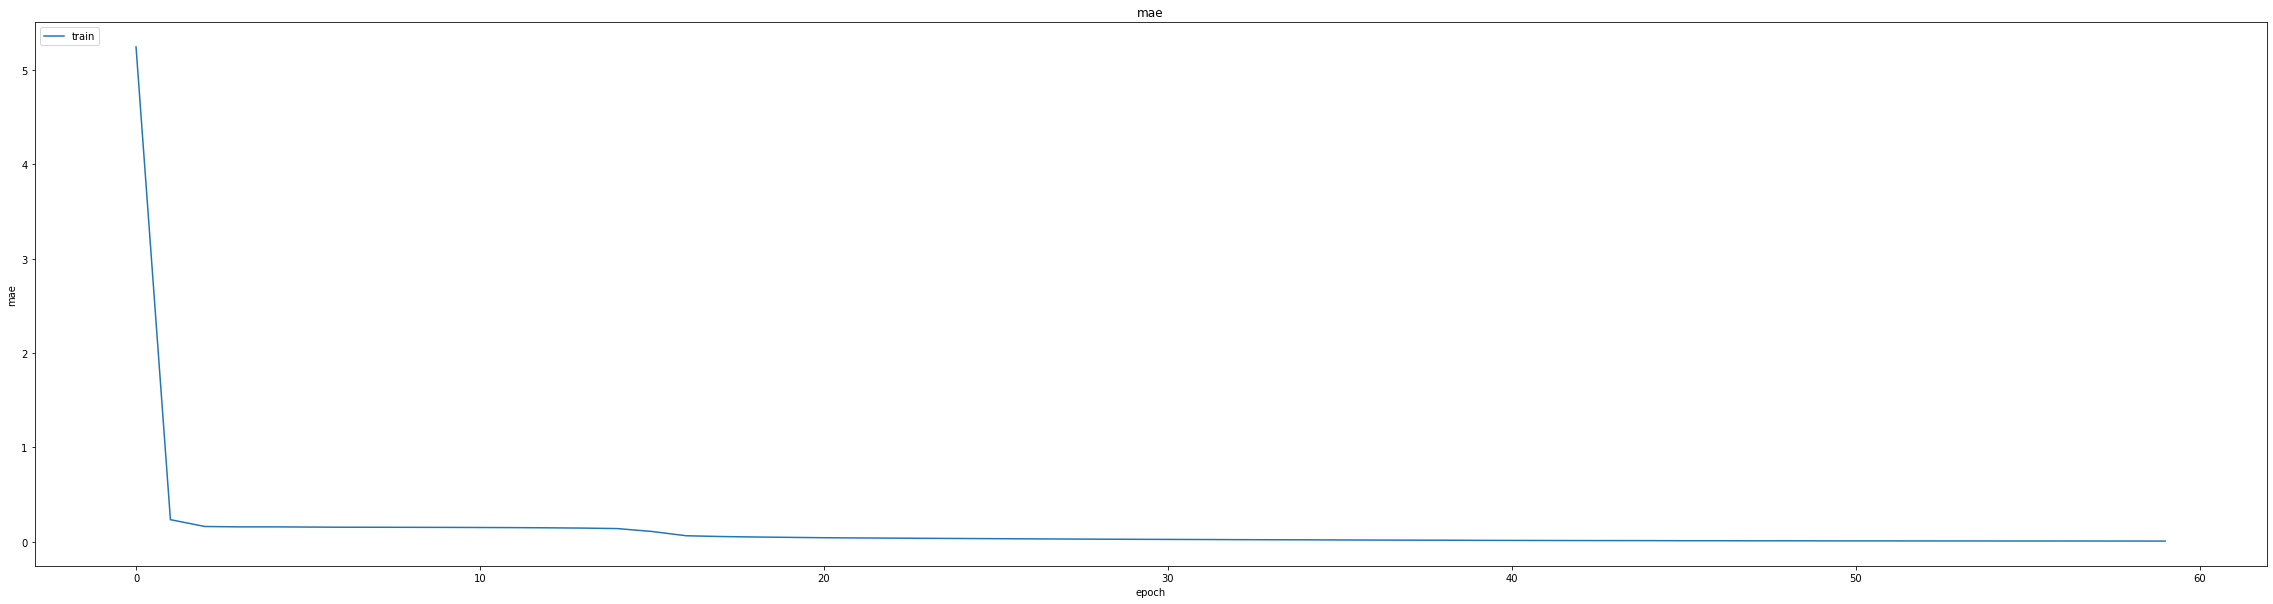

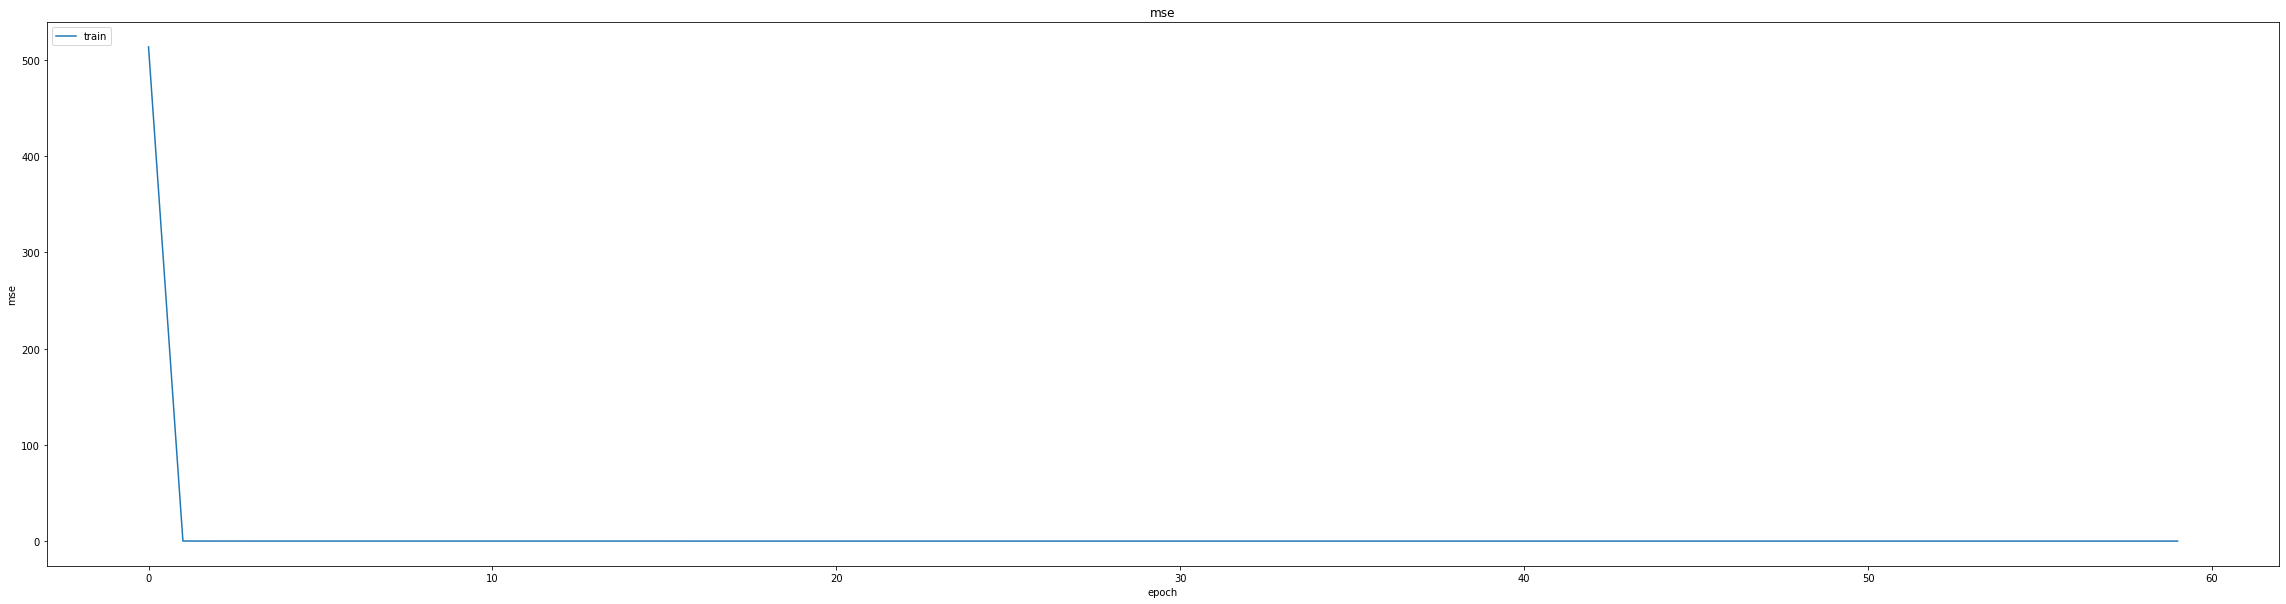

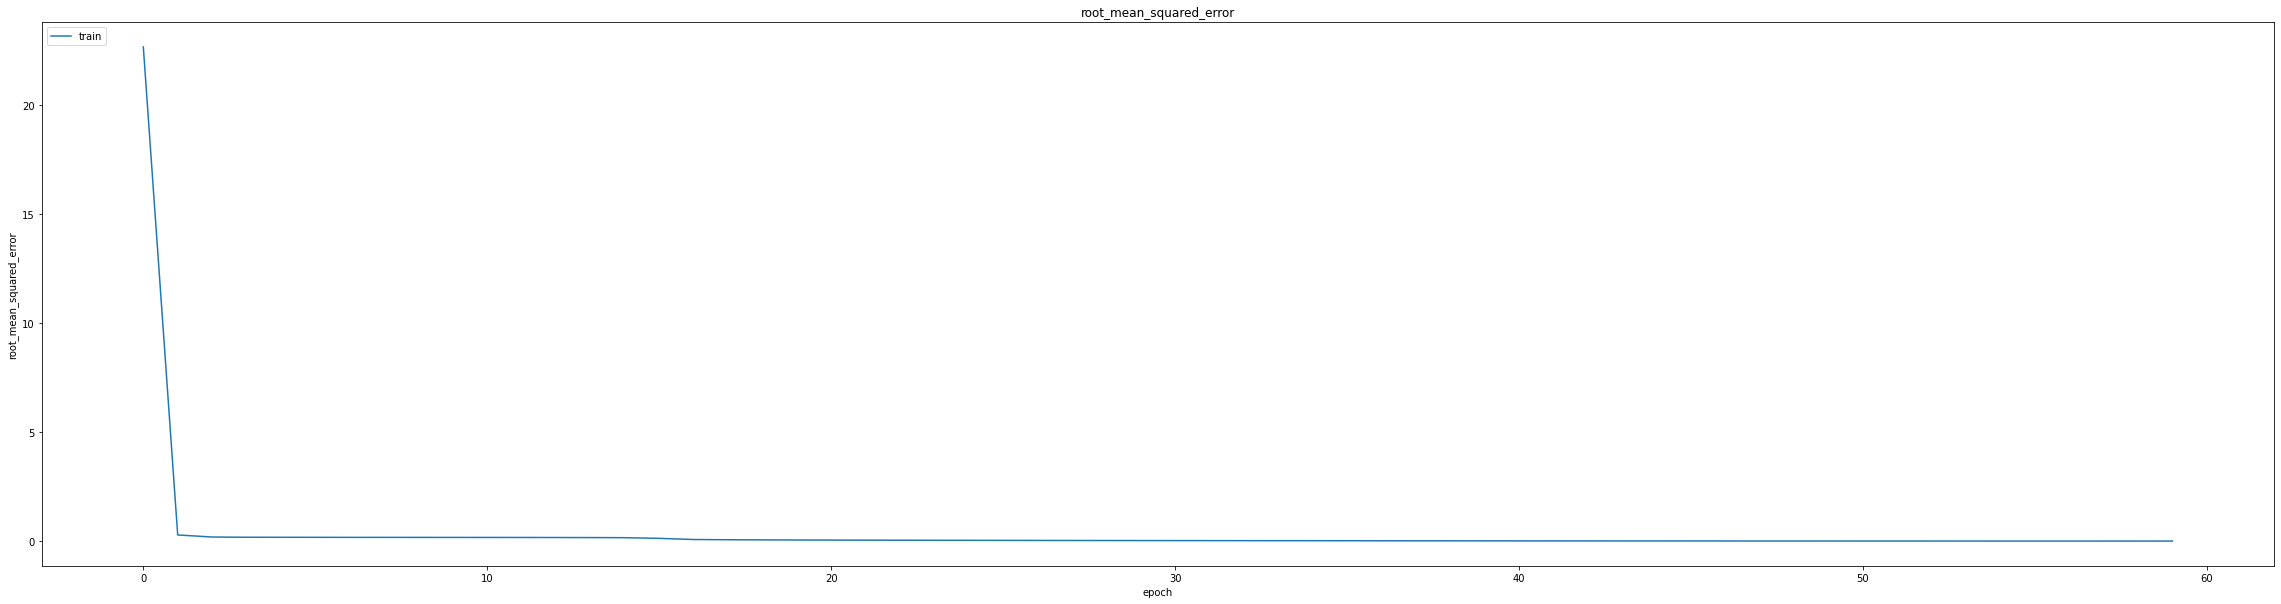

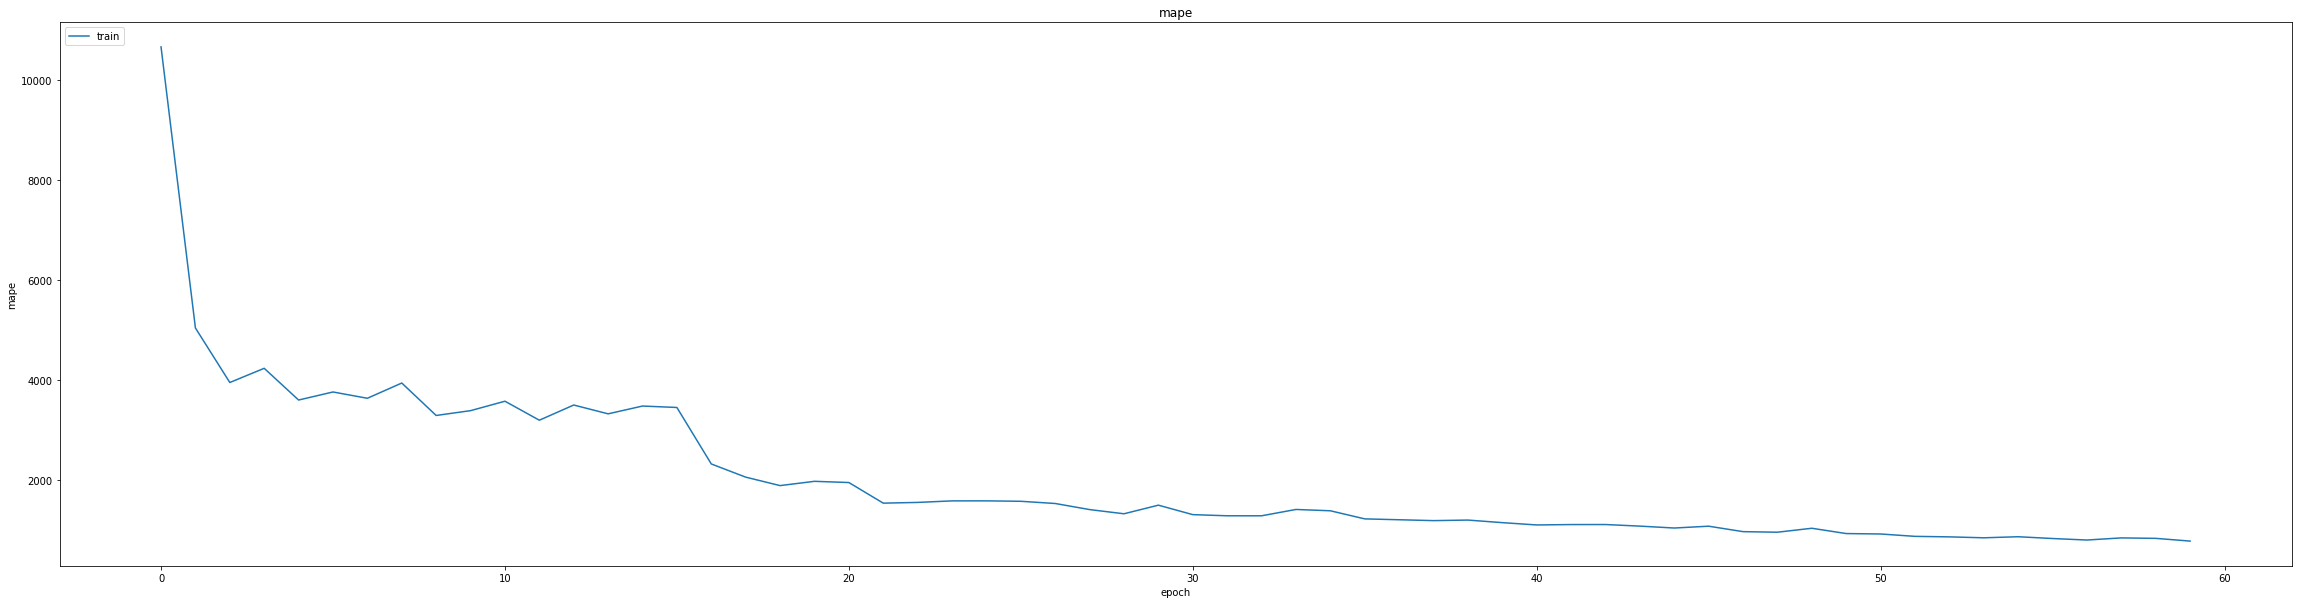

In [88]:
thesis.SummarizeHistory(history)

In [89]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.025584395974874496
0.03232517093420029
1392/1392 [==============================] - 11s 6ms/step
0.9886988587550188


In [90]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [91]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
347/348 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0169 - mse: 0.0015 - root_mean_squared_error: 0.0387 - mape: 864.1085
Epoch 1: val_mse did not improve from 0.00104
348/348 [==============================] - 17s 28ms/step - loss: 0.0015 - mae: 0.0169 - mse: 0.0015 - root_mean_squared_error: 0.0387 - mape: 863.9600 - val_loss: 0.0011 - val_mae: 0.0259 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0330 - val_mape: 2829.2808 - lr: 0.0010
Epoch 2/20
348/348 [==============================] - ETA: 0s - loss: 8.4667e-05 - mae: 0.0070 - mse: 8.4667e-05 - root_mean_squared_error: 0.0092 - mape: 829.1096
Epoch 2: val_mse improved from 0.00104 to 0.00075, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 42s 120ms/step - loss: 8.4667e-05 - mae: 0.0070 - mse: 8.4667e-05 - root_mean_squared_error: 0.0092 - mape: 829.1096 - val_loss: 7.4512e-04 - val_mae: 0.0218 - val_mse: 7.4512e-04 - val_root_mean_squared_error: 0.0273 - val_mape: 2374.1758 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
346/348 [============================>.] - ETA: 0s - loss: 6.7281e-05 - mae: 0.0062 - mse: 6.7281e-05 - root_mean_squared_error: 0.0082 - mape: 750.9434
Epoch 3: val_mse improved from 0.00075 to 0.00068, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 6.7269e-05 - mae: 0.0062 - mse: 6.7269e-05 - root_mean_squared_error: 0.0082 - mape: 748.6552 - val_loss: 6.7889e-04 - val_mae: 0.0210 - val_mse: 6.7889e-04 - val_root_mean_squared_error: 0.0261 - val_mape: 2330.1807 - lr: 9.0000e-04
Epoch 4/20
347/348 [============================>.] - ETA: 0s - loss: 6.3812e-05 - mae: 0.0061 - mse: 6.3812e-05 - root_mean_squared_error: 0.0080 - mape: 767.8925
Epoch 4: val_mse improved from 0.00068 to 0.00061, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 42s 122ms/step - loss: 6.3813e-05 - mae: 0.0061 - mse: 6.3813e-05 - root_mean_squared_error: 0.0080 - mape: 767.7605 - val_loss: 6.1358e-04 - val_mae: 0.0195 - val_mse: 6.1358e-04 - val_root_mean_squared_error: 0.0248 - val_mape: 2261.6179 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
347/348 [============================>.] - ETA: 0s - loss: 5.5359e-05 - mae: 0.0056 - mse: 5.5359e-05 - root_mean_squared_error: 0.0074 - mape: 770.5847
Epoch 5: val_mse did not improve from 0.00061
348/348 [==============================] - 8s 23ms/step - loss: 5.5362e-05 - mae: 0.0056 - mse: 5.5362e-05 - root_mean_squared_error: 0.0074 - mape: 770.4524 - val_loss: 8.6499e-04 - val_mae: 0.0266 - val_mse: 8.6499e-04 - val_root_mean_squared_error: 0.0294 - val_mape: 2186.0935 - lr: 8.1000e-04
Epoch 6/20
348/348 [==============================] - ETA: 0s - loss: 5.8861e-05 - mae: 0.0059 - mse: 5.8861e-05 - root_mean_squared_error: 0.0077 - mape: 7

348/348 [==============================] - 41s 119ms/step - loss: 5.8861e-05 - mae: 0.0059 - mse: 5.8861e-05 - root_mean_squared_error: 0.0077 - mape: 717.0293 - val_loss: 5.9146e-04 - val_mae: 0.0196 - val_mse: 5.9146e-04 - val_root_mean_squared_error: 0.0243 - val_mape: 2213.7722 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/20
347/348 [============================>.] - ETA: 0s - loss: 4.6359e-05 - mae: 0.0052 - mse: 4.6359e-05 - root_mean_squared_error: 0.0068 - mape: 706.6678
Epoch 7: val_mse did not improve from 0.00059
348/348 [==============================] - 8s 22ms/step - loss: 4.6355e-05 - mae: 0.0052 - mse: 4.6355e-05 - root_mean_squared_error: 0.0068 - mape: 706.5464 - val_loss: 6.1899e-04 - val_mae: 0.0203 - val_mse: 6.1899e-04 - val_root_mean_squared_error: 0.0249 - val_mape: 2129.9038 - lr: 7.2900e-04
Epoch 8/20
348/348 [==============================] - ETA: 0s - loss: 5.9605e-05 - mae: 0.0057 - mse: 5.9605e-05 - root_mean_squared_error: 0.0077 - mape: 6

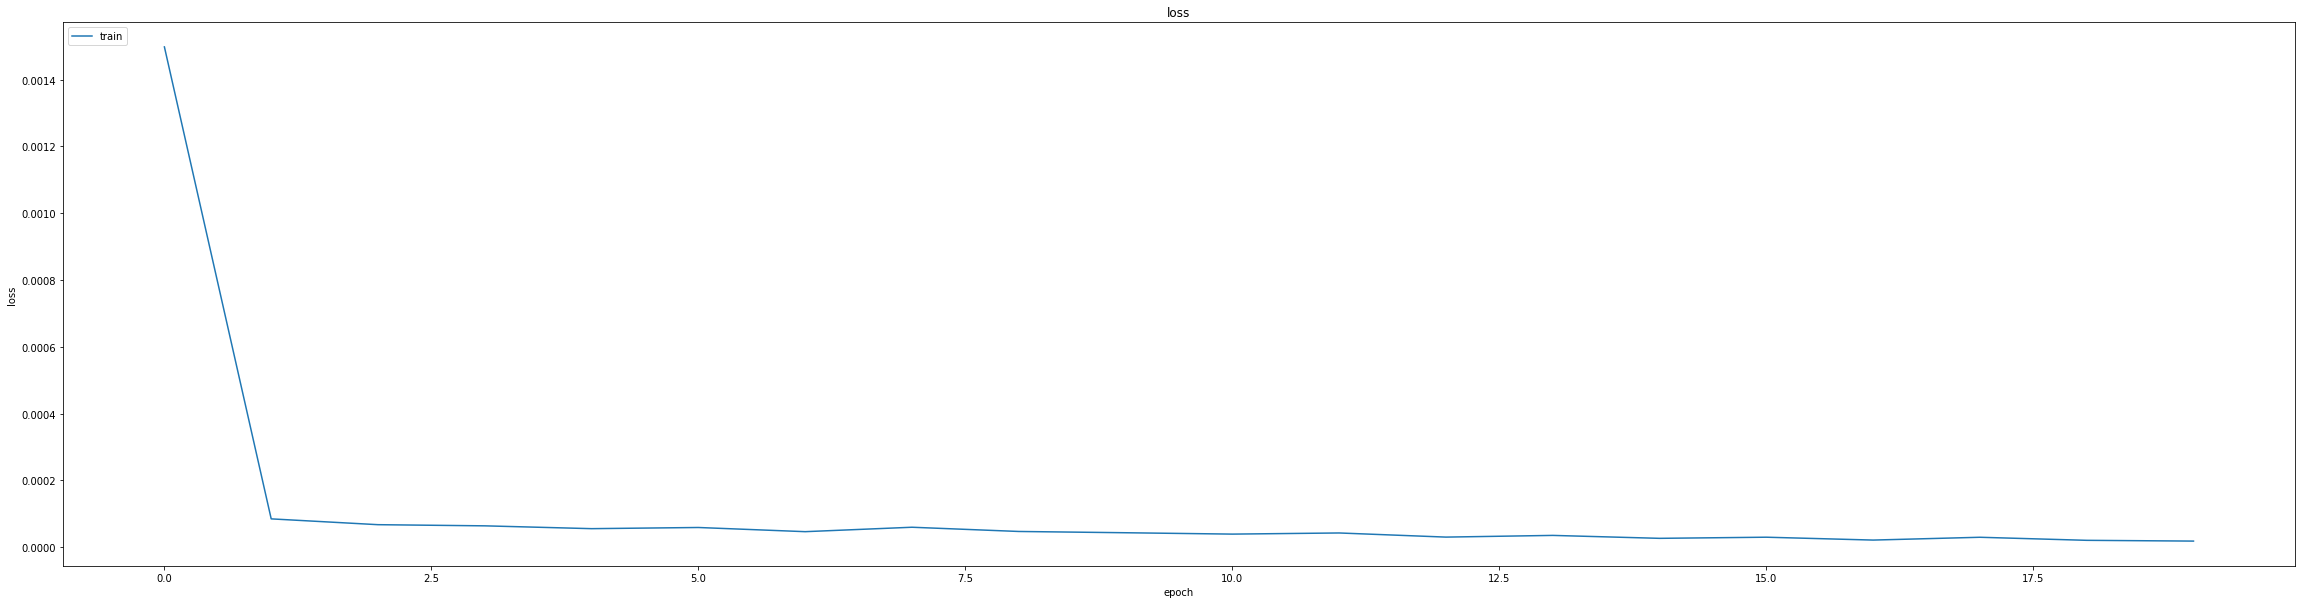

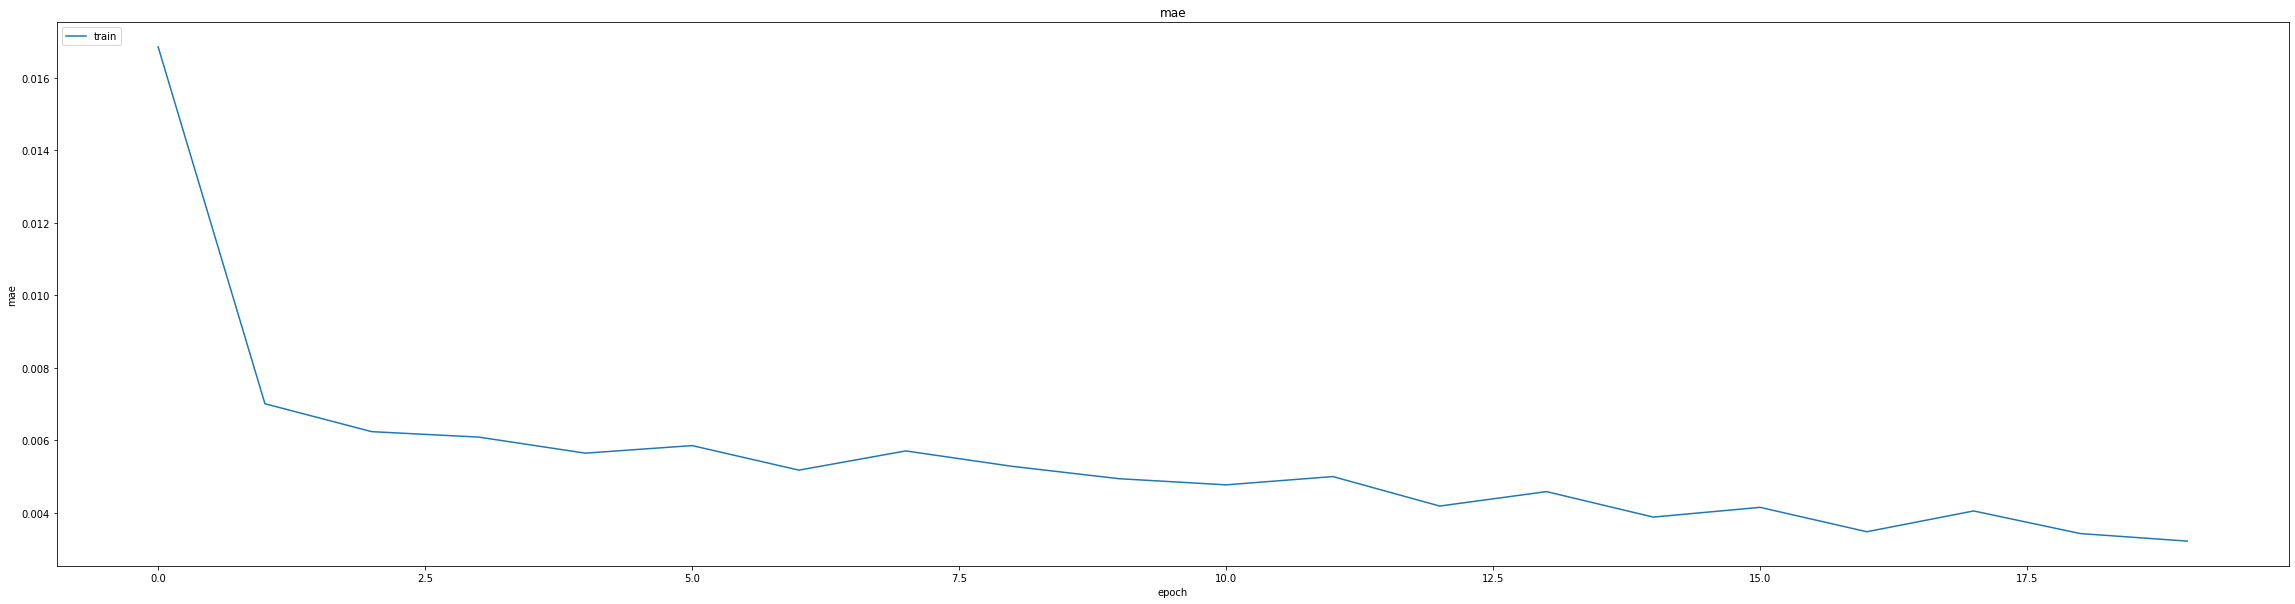

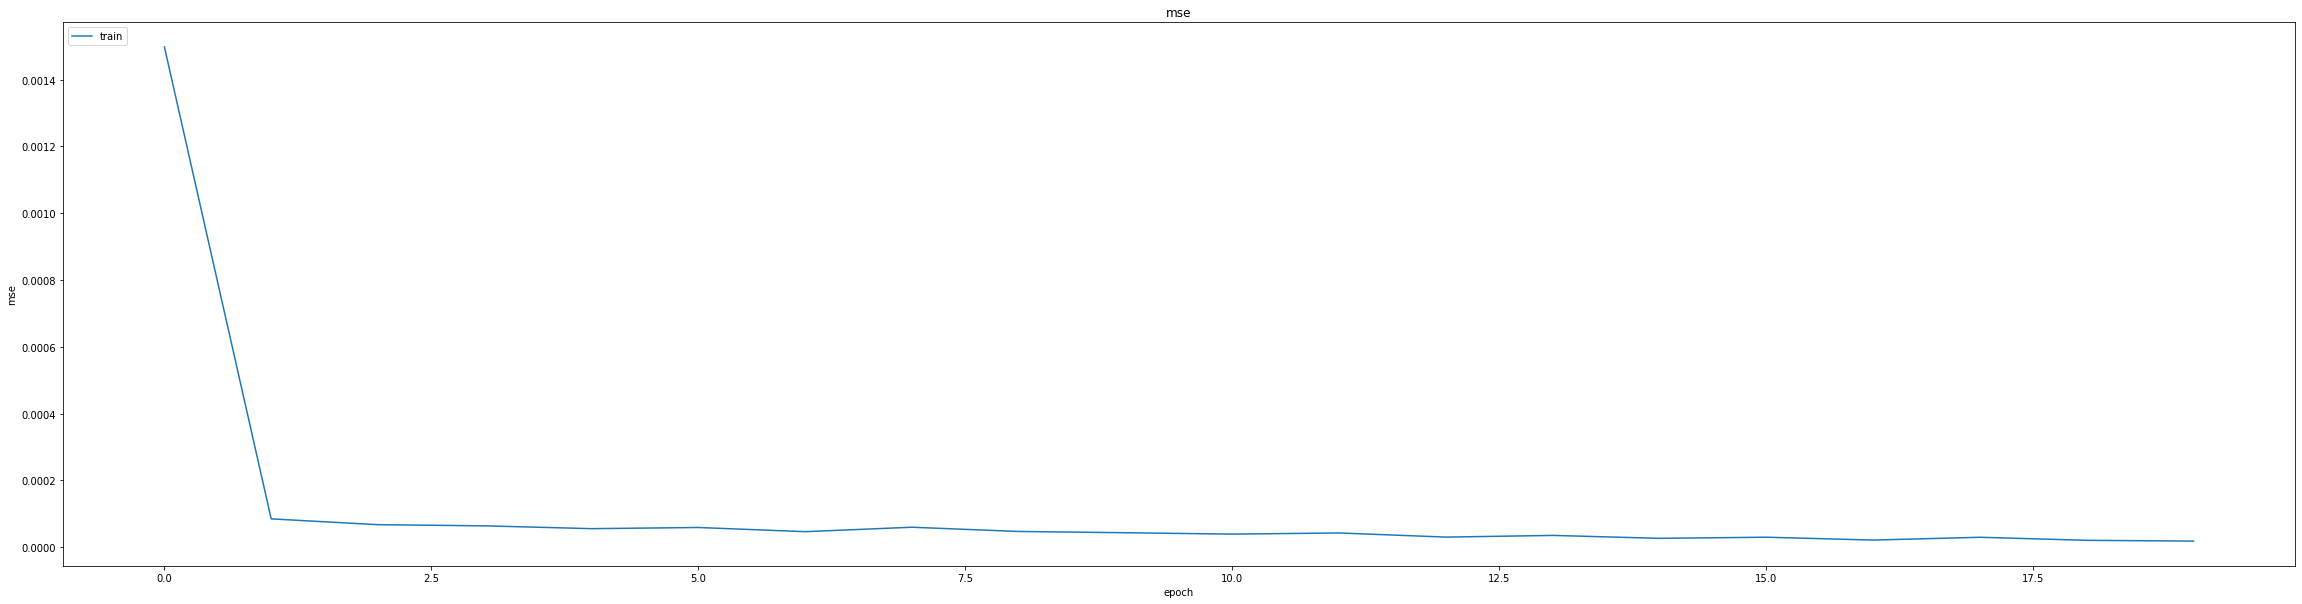

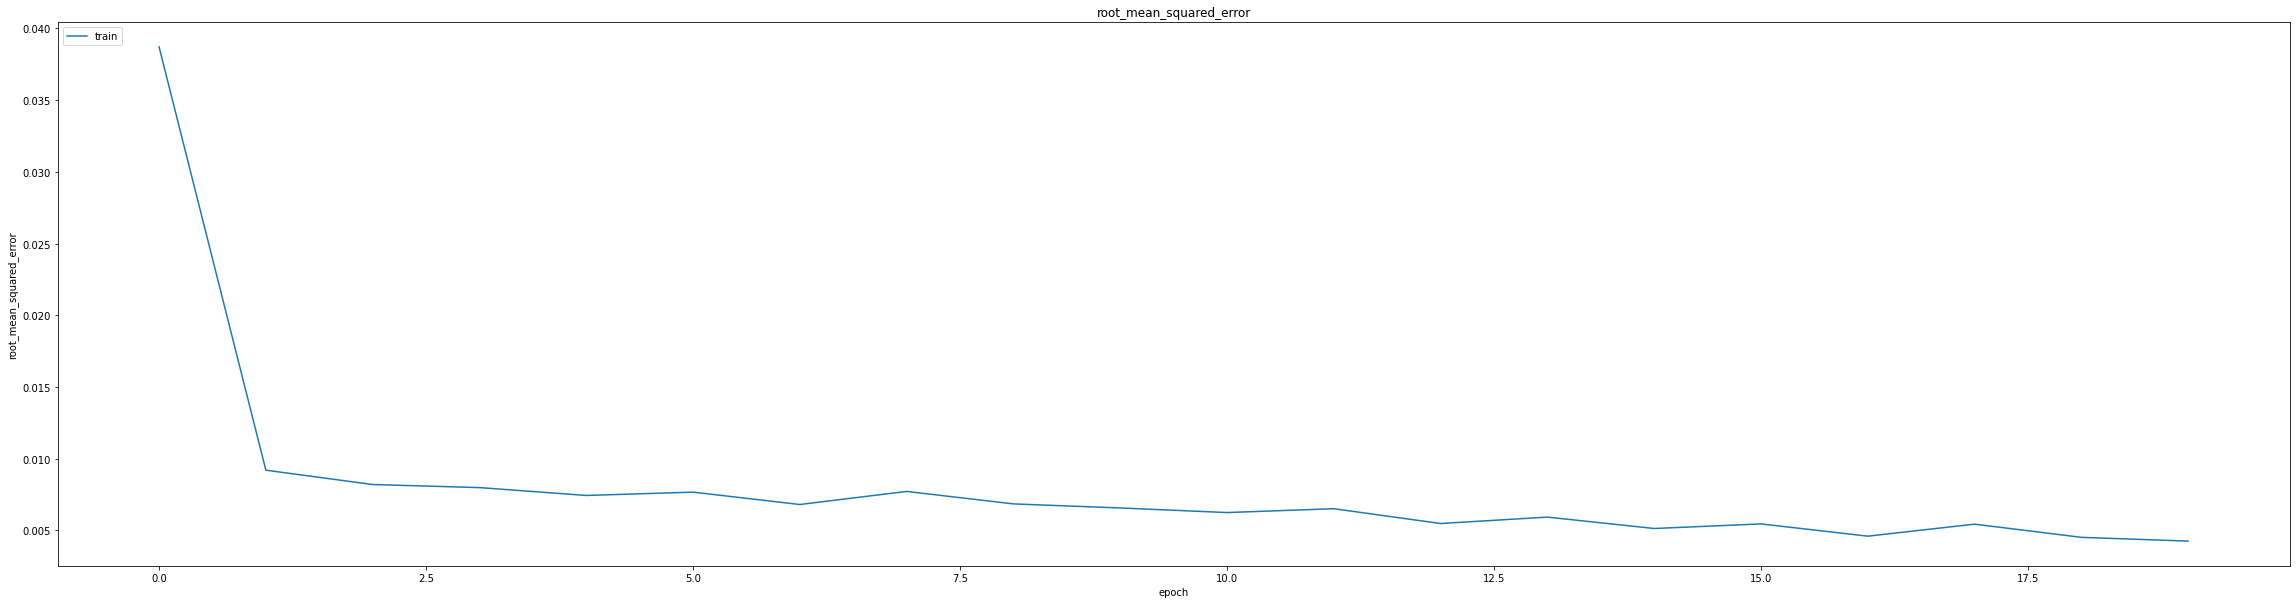

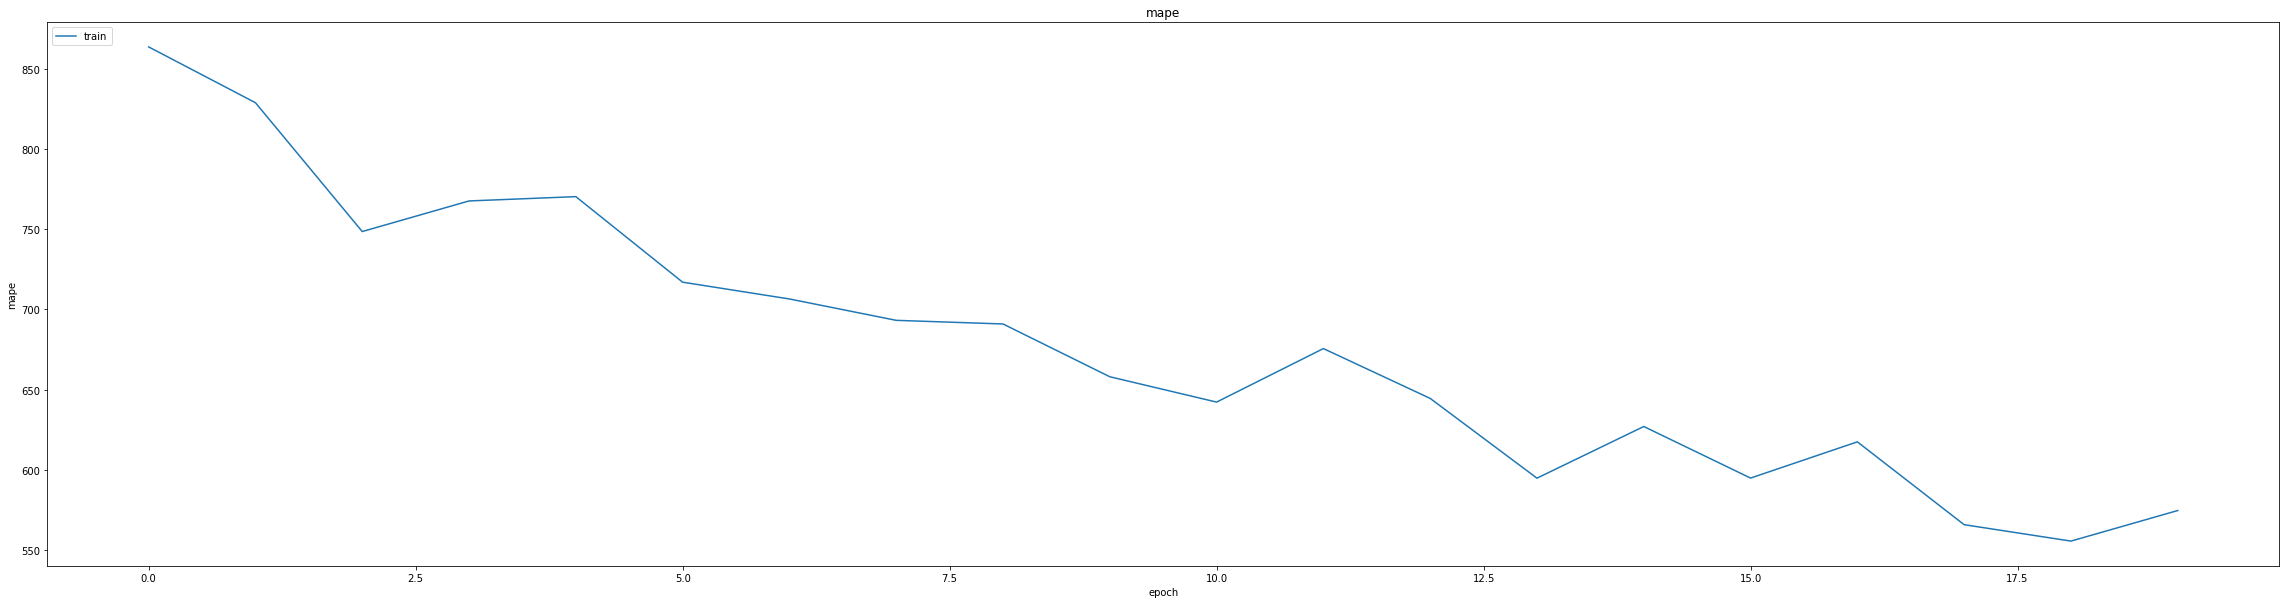

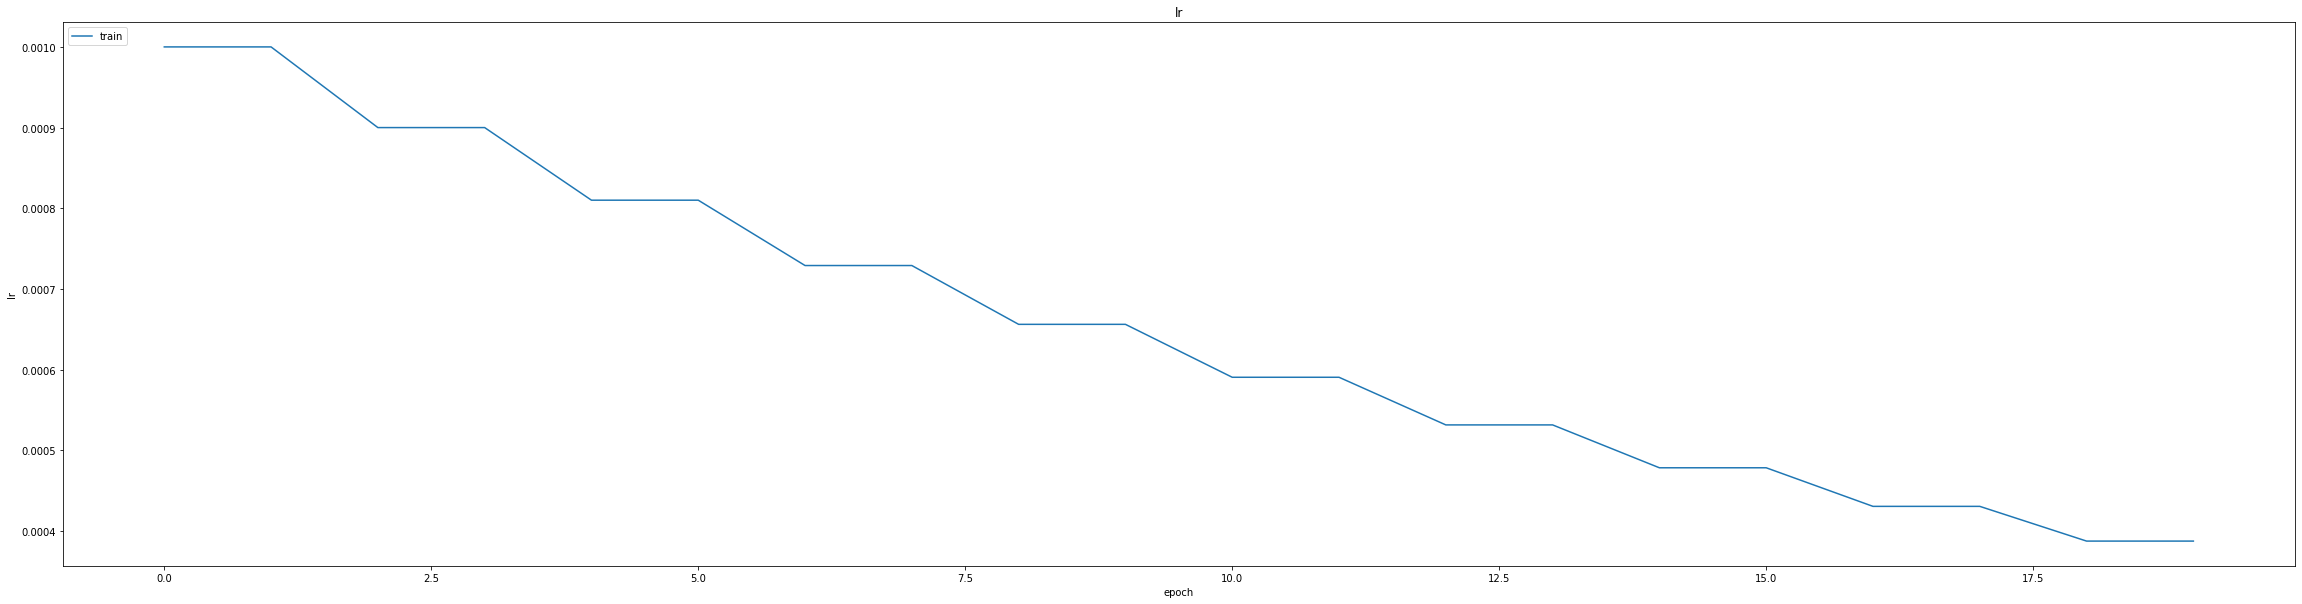

In [92]:
thesis.SummarizeHistory(history)

In [93]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01946163922548294
0.024320002645254135
1392/1392 [==============================] - 11s 6ms/step
0.9856901267809629


1392/1392 [==============================] - 10s 7ms/step


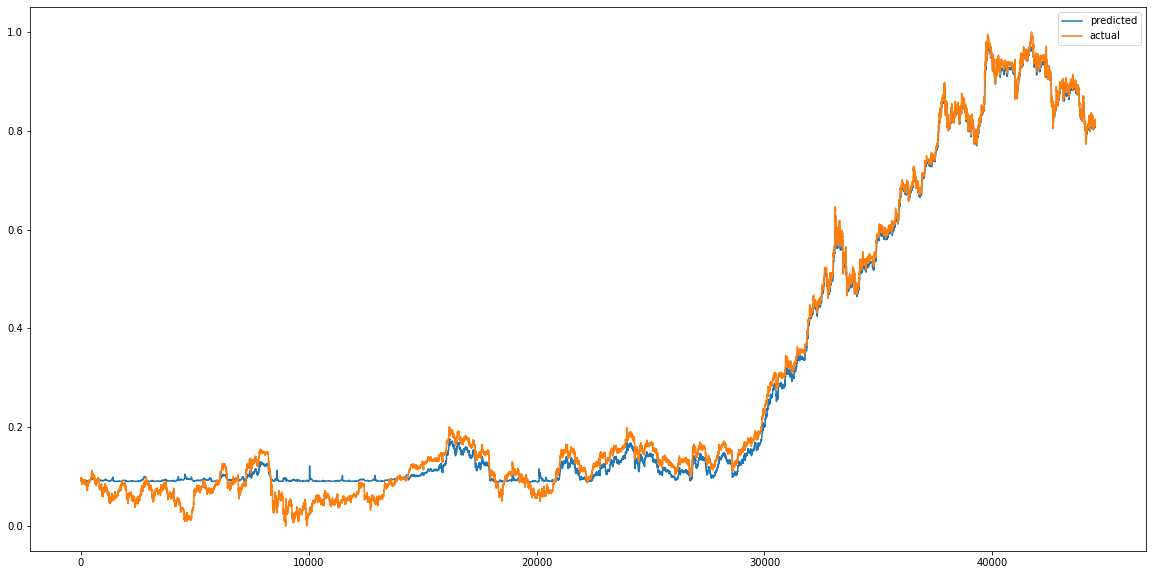

In [94]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


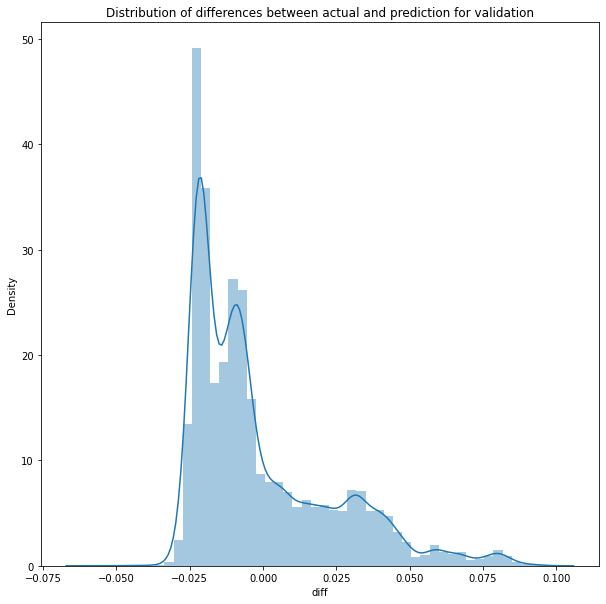

In [95]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1392/1392 [==============================] - 9s 6ms/step


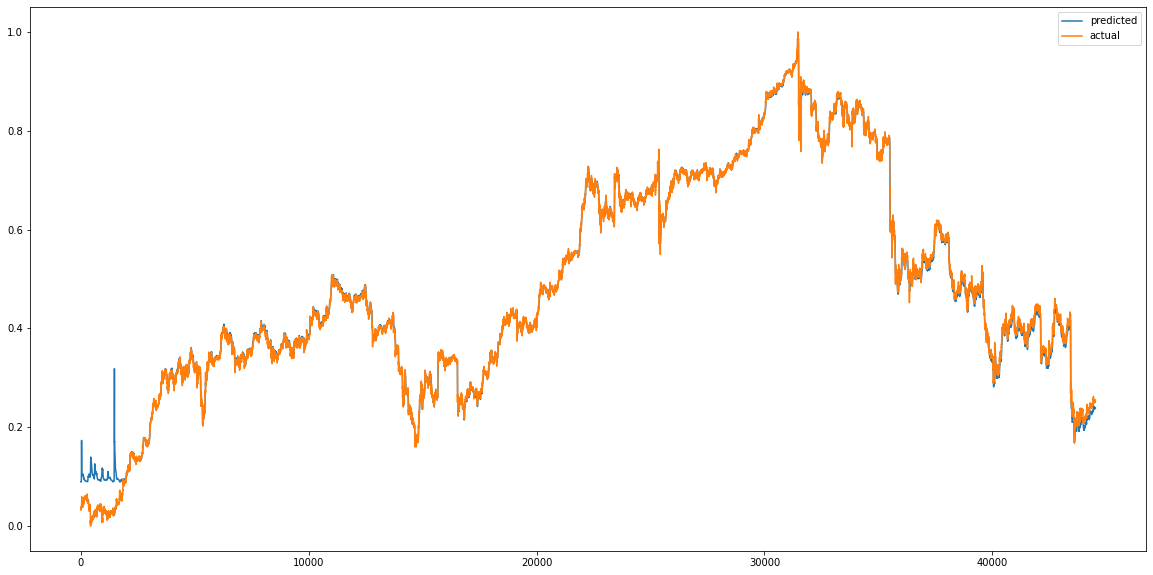

In [96]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


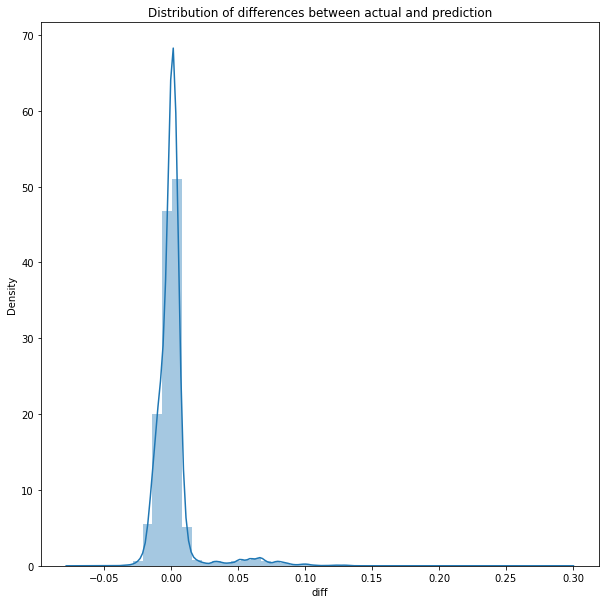

In [97]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0002582540711872066
RMSE :  0.016070285348655344
MAE :  0.007719007370819965
1392/1392 [==============================] - 9s 6ms/step
R2_Score  : 0.9945880493093556


count    44524.000000
mean         0.001762
std          0.015974
min         -0.072585
25%         -0.004459
50%          0.000393
75%          0.003846
max          0.294749
Name: diff, dtype: float64

**LSTM_MODEL**

In [99]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 24, 256)           275456    
                                                                 
 lstm_12 (LSTM)              (None, 24, 64)            82176     
                                                                 
 dropout_6 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_13 (LSTM)              (None, 16)                5184      
                                                                 
 dense_18 (Dense)            (None, 32)                544       
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 1)                

In [100]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
347/348 [============================>.] - ETA: 0s - loss: 423.8334 - mae: 6.2331 - mse: 423.8334 - root_mean_squared_error: 20.5872 - mape: 13811.6963
Epoch 1: val_mse improved from inf to 1.66528, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)


348/348 [==============================] - 23s 55ms/step - loss: 423.7607 - mae: 6.2322 - mse: 423.7607 - root_mean_squared_error: 20.5854 - mape: 13809.3701 - val_loss: 1.6653 - val_mae: 1.2541 - val_mse: 1.6653 - val_root_mean_squared_error: 1.2905 - val_mape: 36182.6523
Epoch 2/60
345/348 [============================>.] - ETA: 0s - loss: 0.6775 - mae: 0.7766 - mse: 0.6775 - root_mean_squared_error: 0.8231 - mape: 7954.5923
Epoch 2: val_mse improved from 1.66528 to 0.54610, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)


348/348 [==============================] - 17s 48ms/step - loss: 0.6754 - mae: 0.7752 - mse: 0.6754 - root_mean_squared_error: 0.8218 - mape: 7908.3638 - val_loss: 0.5461 - val_mae: 0.6736 - val_mse: 0.5461 - val_root_mean_squared_error: 0.7390 - val_mape: 22594.8555
Epoch 3/60
348/348 [==============================] - ETA: 0s - loss: 0.2040 - mae: 0.4022 - mse: 0.2040 - root_mean_squared_error: 0.4516 - mape: 5762.6636
Epoch 3: val_mse improved from 0.54610 to 0.29497, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)


348/348 [==============================] - 18s 51ms/step - loss: 0.2040 - mae: 0.4022 - mse: 0.2040 - root_mean_squared_error: 0.4516 - mape: 5762.6636 - val_loss: 0.2950 - val_mae: 0.4931 - val_mse: 0.2950 - val_root_mean_squared_error: 0.5431 - val_mape: 17368.7031
Epoch 4/60
346/348 [============================>.] - ETA: 0s - loss: 0.0921 - mae: 0.2472 - mse: 0.0921 - root_mean_squared_error: 0.3034 - mape: 4938.5454
Epoch 4: val_mse improved from 0.29497 to 0.20389, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)


348/348 [==============================] - 17s 48ms/step - loss: 0.0920 - mae: 0.2471 - mse: 0.0920 - root_mean_squared_error: 0.3033 - mape: 4923.6865 - val_loss: 0.2039 - val_mae: 0.4189 - val_mse: 0.2039 - val_root_mean_squared_error: 0.4515 - val_mape: 14653.9531
Epoch 5/60
345/348 [============================>.] - ETA: 0s - loss: 0.0558 - mae: 0.1869 - mse: 0.0558 - root_mean_squared_error: 0.2362 - mape: 4685.9819
Epoch 5: val_mse improved from 0.20389 to 0.16286, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)


348/348 [==============================] - 17s 50ms/step - loss: 0.0557 - mae: 0.1868 - mse: 0.0557 - root_mean_squared_error: 0.2361 - mape: 4658.5259 - val_loss: 0.1629 - val_mae: 0.3794 - val_mse: 0.1629 - val_root_mean_squared_error: 0.4036 - val_mape: 13054.8057
Epoch 6/60
347/348 [============================>.] - ETA: 0s - loss: 0.0426 - mae: 0.1676 - mse: 0.0426 - root_mean_squared_error: 0.2063 - mape: 4184.1675
Epoch 6: val_mse improved from 0.16286 to 0.14206, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)


348/348 [==============================] - 17s 50ms/step - loss: 0.0426 - mae: 0.1676 - mse: 0.0426 - root_mean_squared_error: 0.2063 - mape: 4183.4575 - val_loss: 0.1421 - val_mae: 0.3568 - val_mse: 0.1421 - val_root_mean_squared_error: 0.3769 - val_mape: 12059.7236
Epoch 7/60
348/348 [==============================] - ETA: 0s - loss: 0.0376 - mae: 0.1614 - mse: 0.0376 - root_mean_squared_error: 0.1940 - mape: 4199.4478
Epoch 7: val_mse improved from 0.14206 to 0.13079, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)


348/348 [==============================] - 16s 47ms/step - loss: 0.0376 - mae: 0.1614 - mse: 0.0376 - root_mean_squared_error: 0.1940 - mape: 4199.4478 - val_loss: 0.1308 - val_mae: 0.3434 - val_mse: 0.1308 - val_root_mean_squared_error: 0.3617 - val_mape: 11431.0830
Epoch 8/60
346/348 [============================>.] - ETA: 0s - loss: 0.0358 - mae: 0.1596 - mse: 0.0358 - root_mean_squared_error: 0.1892 - mape: 3649.1855
Epoch 8: val_mse improved from 0.13079 to 0.12466, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)


348/348 [==============================] - 18s 51ms/step - loss: 0.0358 - mae: 0.1596 - mse: 0.0358 - root_mean_squared_error: 0.1892 - mape: 3638.1797 - val_loss: 0.1247 - val_mae: 0.3357 - val_mse: 0.1247 - val_root_mean_squared_error: 0.3531 - val_mape: 11049.7998
Epoch 9/60
348/348 [==============================] - ETA: 0s - loss: 0.0352 - mae: 0.1592 - mse: 0.0352 - root_mean_squared_error: 0.1876 - mape: 3352.3379
Epoch 9: val_mse improved from 0.12466 to 0.12139, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)


348/348 [==============================] - 18s 53ms/step - loss: 0.0352 - mae: 0.1592 - mse: 0.0352 - root_mean_squared_error: 0.1876 - mape: 3352.3379 - val_loss: 0.1214 - val_mae: 0.3314 - val_mse: 0.1214 - val_root_mean_squared_error: 0.3484 - val_mape: 10831.3057
Epoch 10/60
346/348 [============================>.] - ETA: 0s - loss: 0.0351 - mae: 0.1594 - mse: 0.0351 - root_mean_squared_error: 0.1873 - mape: 3291.8618
Epoch 10: val_mse improved from 0.12139 to 0.11970, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)


348/348 [==============================] - 17s 48ms/step - loss: 0.0351 - mae: 0.1594 - mse: 0.0351 - root_mean_squared_error: 0.1873 - mape: 3281.9680 - val_loss: 0.1197 - val_mae: 0.3291 - val_mse: 0.1197 - val_root_mean_squared_error: 0.3460 - val_mape: 10713.6885
Epoch 11/60
345/348 [============================>.] - ETA: 0s - loss: 0.0351 - mae: 0.1595 - mse: 0.0351 - root_mean_squared_error: 0.1872 - mape: 3249.4238
Epoch 11: val_mse improved from 0.11970 to 0.11889, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)


348/348 [==============================] - 18s 51ms/step - loss: 0.0351 - mae: 0.1595 - mse: 0.0351 - root_mean_squared_error: 0.1872 - mape: 3230.4214 - val_loss: 0.1189 - val_mae: 0.3280 - val_mse: 0.1189 - val_root_mean_squared_error: 0.3448 - val_mape: 10656.1064
Epoch 12/60
348/348 [==============================] - ETA: 0s - loss: 0.0350 - mae: 0.1594 - mse: 0.0350 - root_mean_squared_error: 0.1871 - mape: 3538.5737
Epoch 12: val_mse improved from 0.11889 to 0.11863, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)


348/348 [==============================] - 17s 48ms/step - loss: 0.0350 - mae: 0.1594 - mse: 0.0350 - root_mean_squared_error: 0.1871 - mape: 3538.5737 - val_loss: 0.1186 - val_mae: 0.3276 - val_mse: 0.1186 - val_root_mean_squared_error: 0.3444 - val_mape: 10637.0879
Epoch 13/60
348/348 [==============================] - ETA: 0s - loss: 0.0350 - mae: 0.1595 - mse: 0.0350 - root_mean_squared_error: 0.1870 - mape: 3306.9346
Epoch 13: val_mse improved from 0.11863 to 0.11851, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)


348/348 [==============================] - 18s 51ms/step - loss: 0.0350 - mae: 0.1595 - mse: 0.0350 - root_mean_squared_error: 0.1870 - mape: 3306.9346 - val_loss: 0.1185 - val_mae: 0.3274 - val_mse: 0.1185 - val_root_mean_squared_error: 0.3443 - val_mape: 10628.7031
Epoch 14/60
348/348 [==============================] - ETA: 0s - loss: 0.0349 - mae: 0.1593 - mse: 0.0349 - root_mean_squared_error: 0.1869 - mape: 3504.1372
Epoch 14: val_mse did not improve from 0.11851
348/348 [==============================] - 6s 17ms/step - loss: 0.0349 - mae: 0.1593 - mse: 0.0349 - root_mean_squared_error: 0.1869 - mape: 3504.1372 - val_loss: 0.1185 - val_mae: 0.3274 - val_mse: 0.1185 - val_root_mean_squared_error: 0.3443 - val_mape: 10629.0820
Epoch 15/60
347/348 [============================>.] - ETA: 0s - loss: 0.0350 - mae: 0.1595 - mse: 0.0350 - root_mean_squared_error: 0.1871 - mape: 3833.3293
Epoch 15: val_mse did not improve from 0.11851
348/348 [==============================] - 6s 17ms/step

348/348 [==============================] - 18s 52ms/step - loss: 0.0321 - mae: 0.1517 - mse: 0.0321 - root_mean_squared_error: 0.1790 - mape: 4090.6011 - val_loss: 0.1053 - val_mae: 0.3062 - val_mse: 0.1053 - val_root_mean_squared_error: 0.3245 - val_mape: 9505.7637
Epoch 34/60
346/348 [============================>.] - ETA: 0s - loss: 0.0350 - mae: 0.1596 - mse: 0.0350 - root_mean_squared_error: 0.1870 - mape: 3582.2930
Epoch 34: val_mse did not improve from 0.10527
348/348 [==============================] - 6s 17ms/step - loss: 0.0350 - mae: 0.1596 - mse: 0.0350 - root_mean_squared_error: 0.1870 - mape: 3571.4890 - val_loss: 0.1186 - val_mae: 0.3276 - val_mse: 0.1186 - val_root_mean_squared_error: 0.3444 - val_mape: 10636.9473
Epoch 35/60
346/348 [============================>.] - ETA: 0s - loss: 0.0344 - mae: 0.1587 - mse: 0.0344 - root_mean_squared_error: 0.1856 - mape: 3717.5361
Epoch 35: val_mse did not improve from 0.10527
348/348 [==============================] - 6s 17ms/step 

348/348 [==============================] - 16s 47ms/step - loss: 0.0194 - mae: 0.1072 - mse: 0.0194 - root_mean_squared_error: 0.1394 - mape: 2398.4885 - val_loss: 0.0263 - val_mae: 0.1470 - val_mse: 0.0263 - val_root_mean_squared_error: 0.1623 - val_mape: 6147.1704
Epoch 41/60
348/348 [==============================] - ETA: 0s - loss: 0.0028 - mae: 0.0399 - mse: 0.0028 - root_mean_squared_error: 0.0532 - mape: 1946.3790
Epoch 41: val_mse improved from 0.02634 to 0.01239, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)


348/348 [==============================] - 18s 50ms/step - loss: 0.0028 - mae: 0.0399 - mse: 0.0028 - root_mean_squared_error: 0.0532 - mape: 1946.3790 - val_loss: 0.0124 - val_mae: 0.0975 - val_mse: 0.0124 - val_root_mean_squared_error: 0.1113 - val_mape: 4920.4883
Epoch 42/60
346/348 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0309 - mse: 0.0016 - root_mean_squared_error: 0.0406 - mape: 1509.1458
Epoch 42: val_mse improved from 0.01239 to 0.00830, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 0.0016 - mae: 0.0309 - mse: 0.0016 - root_mean_squared_error: 0.0406 - mape: 1504.5586 - val_loss: 0.0083 - val_mae: 0.0808 - val_mse: 0.0083 - val_root_mean_squared_error: 0.0911 - val_mape: 4458.4741
Epoch 43/60
345/348 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0265 - mse: 0.0012 - root_mean_squared_error: 0.0348 - mape: 1446.1686
Epoch 43: val_mse improved from 0.00830 to 0.00606, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)


348/348 [==============================] - 18s 51ms/step - loss: 0.0012 - mae: 0.0265 - mse: 0.0012 - root_mean_squared_error: 0.0348 - mape: 1437.6251 - val_loss: 0.0061 - val_mae: 0.0634 - val_mse: 0.0061 - val_root_mean_squared_error: 0.0779 - val_mape: 4191.6855
Epoch 44/60
345/348 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0241 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 1446.8260
Epoch 44: val_mse did not improve from 0.00606
348/348 [==============================] - 6s 17ms/step - loss: 0.0010 - mae: 0.0241 - mse: 0.0010 - root_mean_squared_error: 0.0317 - mape: 1438.2773 - val_loss: 0.0061 - val_mae: 0.0684 - val_mse: 0.0061 - val_root_mean_squared_error: 0.0780 - val_mape: 4008.3245
Epoch 45/60
346/348 [============================>.] - ETA: 0s - loss: 7.8873e-04 - mae: 0.0213 - mse: 7.8873e-04 - root_mean_squared_error: 0.0281 - mape: 1439.0289
Epoch 45: val_mse improved from 0.00606 to 0.00465, saving model to /content/drive/MyDrive/model

348/348 [==============================] - 16s 47ms/step - loss: 7.8849e-04 - mae: 0.0213 - mse: 7.8849e-04 - root_mean_squared_error: 0.0281 - mape: 1434.6508 - val_loss: 0.0046 - val_mae: 0.0560 - val_mse: 0.0046 - val_root_mean_squared_error: 0.0682 - val_mape: 3849.0681
Epoch 46/60
346/348 [============================>.] - ETA: 0s - loss: 6.5562e-04 - mae: 0.0193 - mse: 6.5562e-04 - root_mean_squared_error: 0.0256 - mape: 1319.3953
Epoch 46: val_mse improved from 0.00465 to 0.00445, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)


348/348 [==============================] - 18s 51ms/step - loss: 6.5538e-04 - mae: 0.0193 - mse: 6.5538e-04 - root_mean_squared_error: 0.0256 - mape: 1315.3782 - val_loss: 0.0045 - val_mae: 0.0560 - val_mse: 0.0045 - val_root_mean_squared_error: 0.0667 - val_mape: 3708.4270
Epoch 47/60
348/348 [==============================] - ETA: 0s - loss: 5.4818e-04 - mae: 0.0177 - mse: 5.4818e-04 - root_mean_squared_error: 0.0234 - mape: 1285.6315
Epoch 47: val_mse improved from 0.00445 to 0.00370, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)


348/348 [==============================] - 17s 50ms/step - loss: 5.4818e-04 - mae: 0.0177 - mse: 5.4818e-04 - root_mean_squared_error: 0.0234 - mape: 1285.6315 - val_loss: 0.0037 - val_mae: 0.0504 - val_mse: 0.0037 - val_root_mean_squared_error: 0.0608 - val_mape: 3551.6787
Epoch 48/60
345/348 [============================>.] - ETA: 0s - loss: 4.6970e-04 - mae: 0.0164 - mse: 4.6970e-04 - root_mean_squared_error: 0.0217 - mape: 1197.8525
Epoch 48: val_mse improved from 0.00370 to 0.00305, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)


348/348 [==============================] - 17s 48ms/step - loss: 4.6994e-04 - mae: 0.0164 - mse: 4.6994e-04 - root_mean_squared_error: 0.0217 - mape: 1190.7699 - val_loss: 0.0030 - val_mae: 0.0431 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0552 - val_mape: 3437.7773
Epoch 49/60
346/348 [============================>.] - ETA: 0s - loss: 4.0282e-04 - mae: 0.0152 - mse: 4.0282e-04 - root_mean_squared_error: 0.0201 - mape: 1111.9099
Epoch 49: val_mse did not improve from 0.00305
348/348 [==============================] - 6s 17ms/step - loss: 4.0263e-04 - mae: 0.0152 - mse: 4.0263e-04 - root_mean_squared_error: 0.0201 - mape: 1108.5244 - val_loss: 0.0033 - val_mae: 0.0481 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0573 - val_mape: 3305.9241
Epoch 50/60
347/348 [============================>.] - ETA: 0s - loss: 3.6067e-04 - mae: 0.0143 - mse: 3.6067e-04 - root_mean_squared_error: 0.0190 - mape: 1110.6442
Epoch 50: val_mse did not improve from 0.00305
348/348 [================

348/348 [==============================] - 18s 51ms/step - loss: 3.0616e-04 - mae: 0.0132 - mse: 3.0616e-04 - root_mean_squared_error: 0.0175 - mape: 1097.5668 - val_loss: 0.0022 - val_mae: 0.0360 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0464 - val_mape: 3105.4351
Epoch 52/60
345/348 [============================>.] - ETA: 0s - loss: 2.8610e-04 - mae: 0.0128 - mse: 2.8610e-04 - root_mean_squared_error: 0.0169 - mape: 1076.2156
Epoch 52: val_mse improved from 0.00216 to 0.00194, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)


348/348 [==============================] - 17s 48ms/step - loss: 2.8623e-04 - mae: 0.0127 - mse: 2.8623e-04 - root_mean_squared_error: 0.0169 - mape: 1069.8491 - val_loss: 0.0019 - val_mae: 0.0326 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0441 - val_mape: 3049.7590
Epoch 53/60
345/348 [============================>.] - ETA: 0s - loss: 2.6105e-04 - mae: 0.0121 - mse: 2.6105e-04 - root_mean_squared_error: 0.0162 - mape: 1016.6042
Epoch 53: val_mse did not improve from 0.00194
348/348 [==============================] - 6s 17ms/step - loss: 2.6118e-04 - mae: 0.0121 - mse: 2.6118e-04 - root_mean_squared_error: 0.0162 - mape: 1010.5917 - val_loss: 0.0024 - val_mae: 0.0405 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0486 - val_mape: 2988.2971
Epoch 54/60
347/348 [============================>.] - ETA: 0s - loss: 2.4644e-04 - mae: 0.0118 - mse: 2.4644e-04 - root_mean_squared_error: 0.0157 - mape: 962.0219
Epoch 54: val_mse improved from 0.00194 to 0.00188, saving model to /cont

348/348 [==============================] - 17s 50ms/step - loss: 2.4643e-04 - mae: 0.0118 - mse: 2.4643e-04 - root_mean_squared_error: 0.0157 - mape: 961.8568 - val_loss: 0.0019 - val_mae: 0.0350 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0434 - val_mape: 2896.7422
Epoch 55/60
347/348 [============================>.] - ETA: 0s - loss: 2.3141e-04 - mae: 0.0114 - mse: 2.3141e-04 - root_mean_squared_error: 0.0152 - mape: 956.2960
Epoch 55: val_mse improved from 0.00188 to 0.00179, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)


348/348 [==============================] - 18s 50ms/step - loss: 2.3140e-04 - mae: 0.0114 - mse: 2.3140e-04 - root_mean_squared_error: 0.0152 - mape: 956.1317 - val_loss: 0.0018 - val_mae: 0.0349 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0423 - val_mape: 2851.5842
Epoch 56/60
345/348 [============================>.] - ETA: 0s - loss: 1.9814e-04 - mae: 0.0105 - mse: 1.9814e-04 - root_mean_squared_error: 0.0141 - mape: 937.6075
Epoch 56: val_mse improved from 0.00179 to 0.00139, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)


348/348 [==============================] - 16s 47ms/step - loss: 1.9801e-04 - mae: 0.0105 - mse: 1.9801e-04 - root_mean_squared_error: 0.0141 - mape: 932.0573 - val_loss: 0.0014 - val_mae: 0.0268 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0372 - val_mape: 2784.7205
Epoch 57/60
347/348 [============================>.] - ETA: 0s - loss: 2.0881e-04 - mae: 0.0108 - mse: 2.0881e-04 - root_mean_squared_error: 0.0145 - mape: 920.5695
Epoch 57: val_mse improved from 0.00139 to 0.00138, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)


348/348 [==============================] - 18s 51ms/step - loss: 2.0879e-04 - mae: 0.0108 - mse: 2.0879e-04 - root_mean_squared_error: 0.0144 - mape: 920.4114 - val_loss: 0.0014 - val_mae: 0.0282 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0372 - val_mape: 2738.6287
Epoch 58/60
347/348 [============================>.] - ETA: 0s - loss: 1.7639e-04 - mae: 0.0098 - mse: 1.7639e-04 - root_mean_squared_error: 0.0133 - mape: 1073.4191
Epoch 58: val_mse improved from 0.00138 to 0.00116, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)


348/348 [==============================] - 17s 48ms/step - loss: 1.7639e-04 - mae: 0.0098 - mse: 1.7639e-04 - root_mean_squared_error: 0.0133 - mape: 1073.2347 - val_loss: 0.0012 - val_mae: 0.0248 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0341 - val_mape: 2647.9338
Epoch 59/60
345/348 [============================>.] - ETA: 0s - loss: 1.6859e-04 - mae: 0.0096 - mse: 1.6859e-04 - root_mean_squared_error: 0.0130 - mape: 899.2546
Epoch 59: val_mse did not improve from 0.00116
348/348 [==============================] - 6s 17ms/step - loss: 1.6847e-04 - mae: 0.0096 - mse: 1.6847e-04 - root_mean_squared_error: 0.0130 - mape: 893.9313 - val_loss: 0.0015 - val_mae: 0.0337 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0391 - val_mape: 2520.3967
Epoch 60/60
345/348 [============================>.] - ETA: 0s - loss: 1.8141e-04 - mae: 0.0100 - mse: 1.8141e-04 - root_mean_squared_error: 0.0135 - mape: 851.6937
Epoch 60: val_mse improved from 0.00116 to 0.00103, saving model to /conten

348/348 [==============================] - 18s 51ms/step - loss: 1.8110e-04 - mae: 0.0100 - mse: 1.8110e-04 - root_mean_squared_error: 0.0135 - mape: 846.6522 - val_loss: 0.0010 - val_mae: 0.0255 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0321 - val_mape: 2495.1992


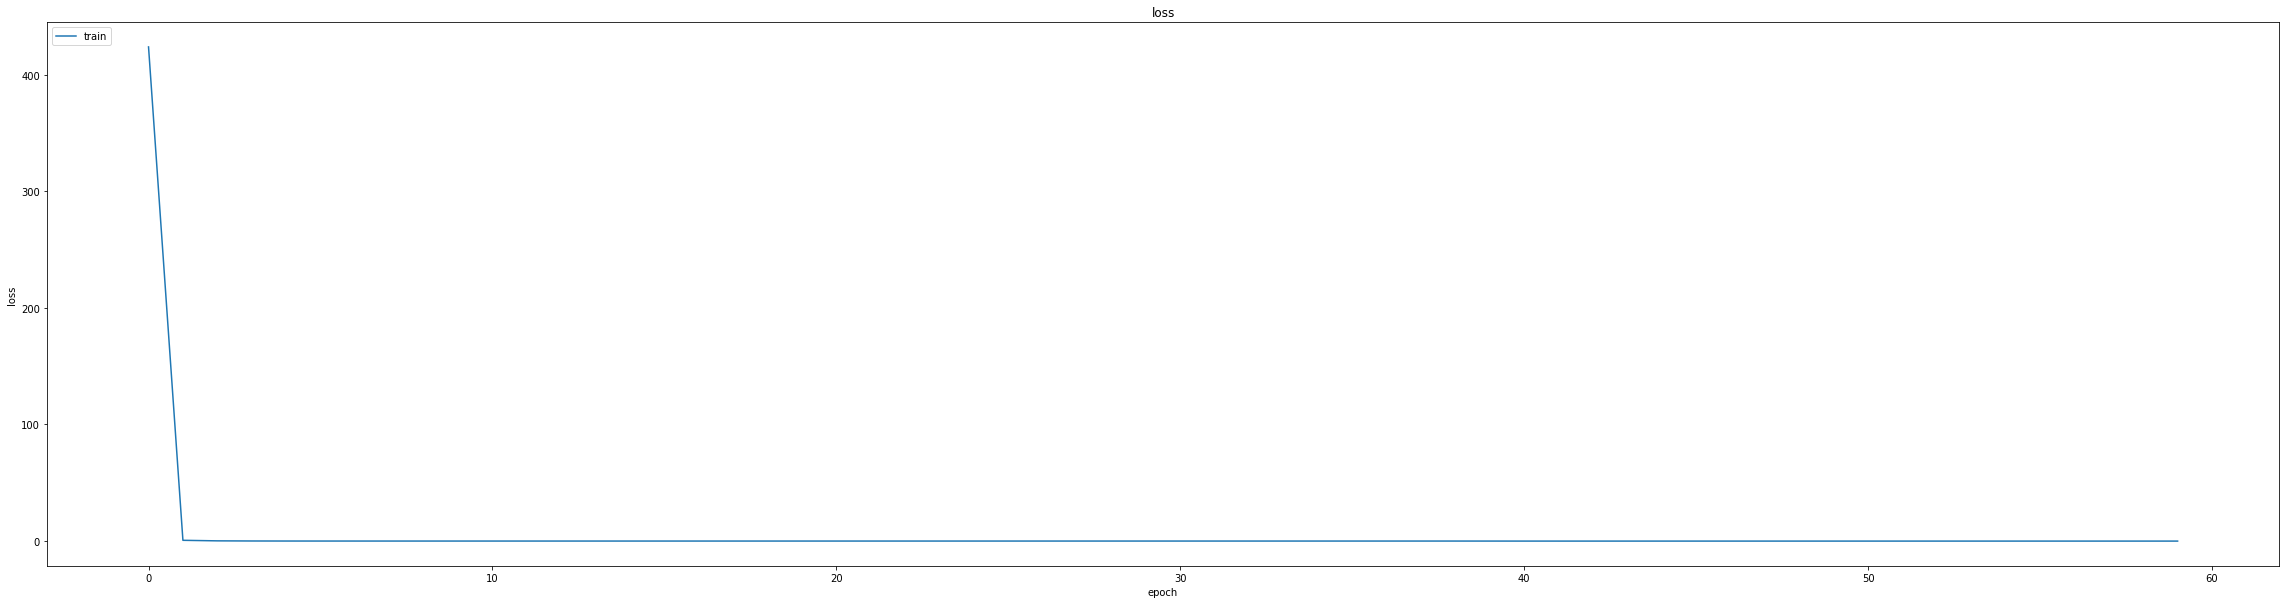

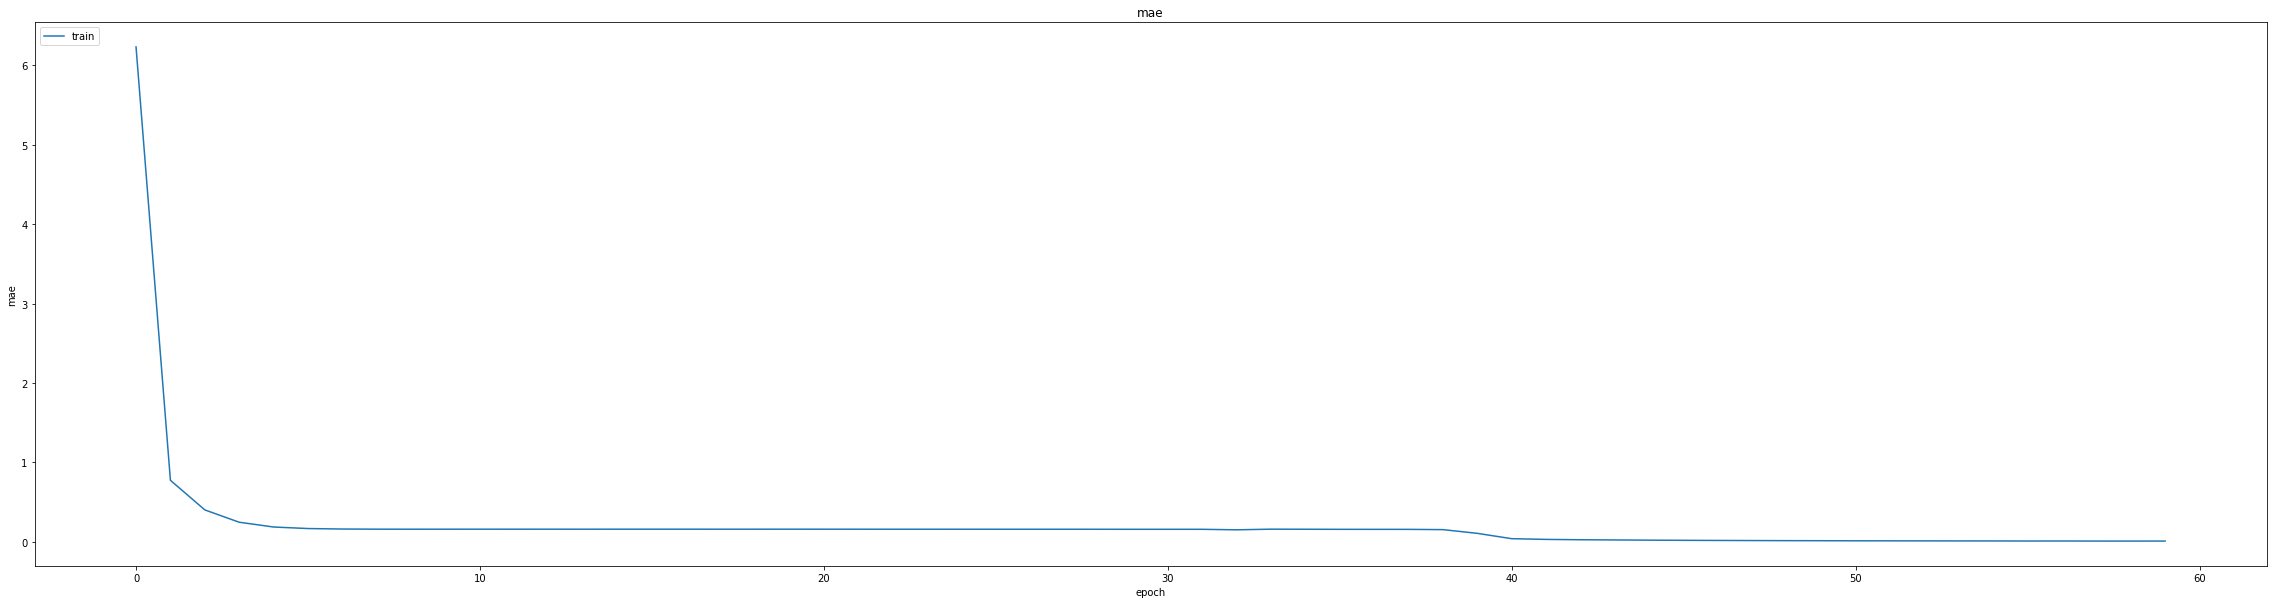

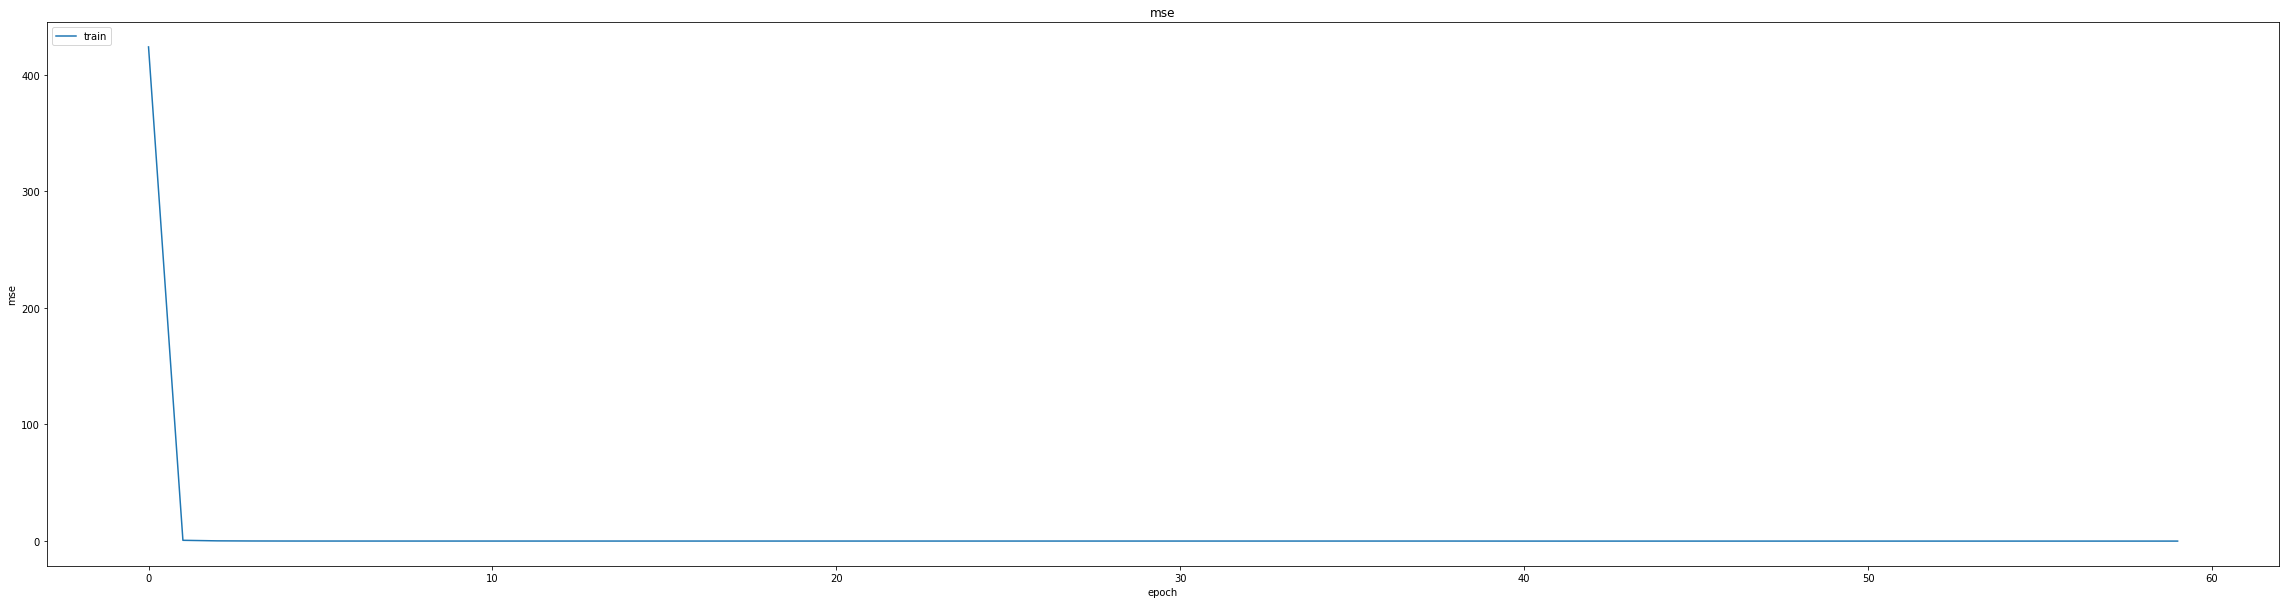

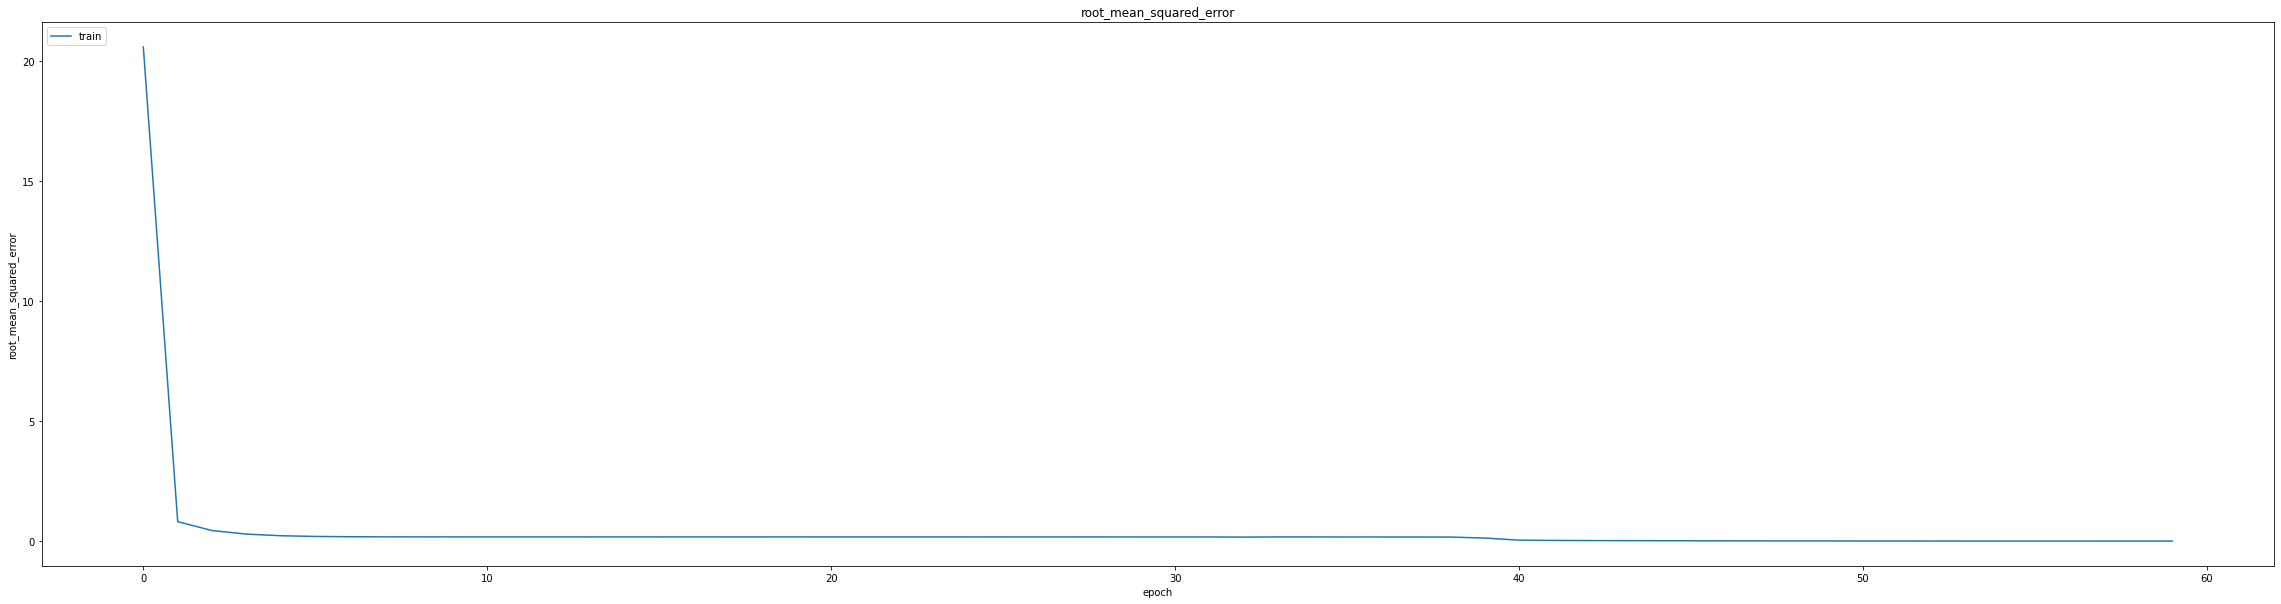

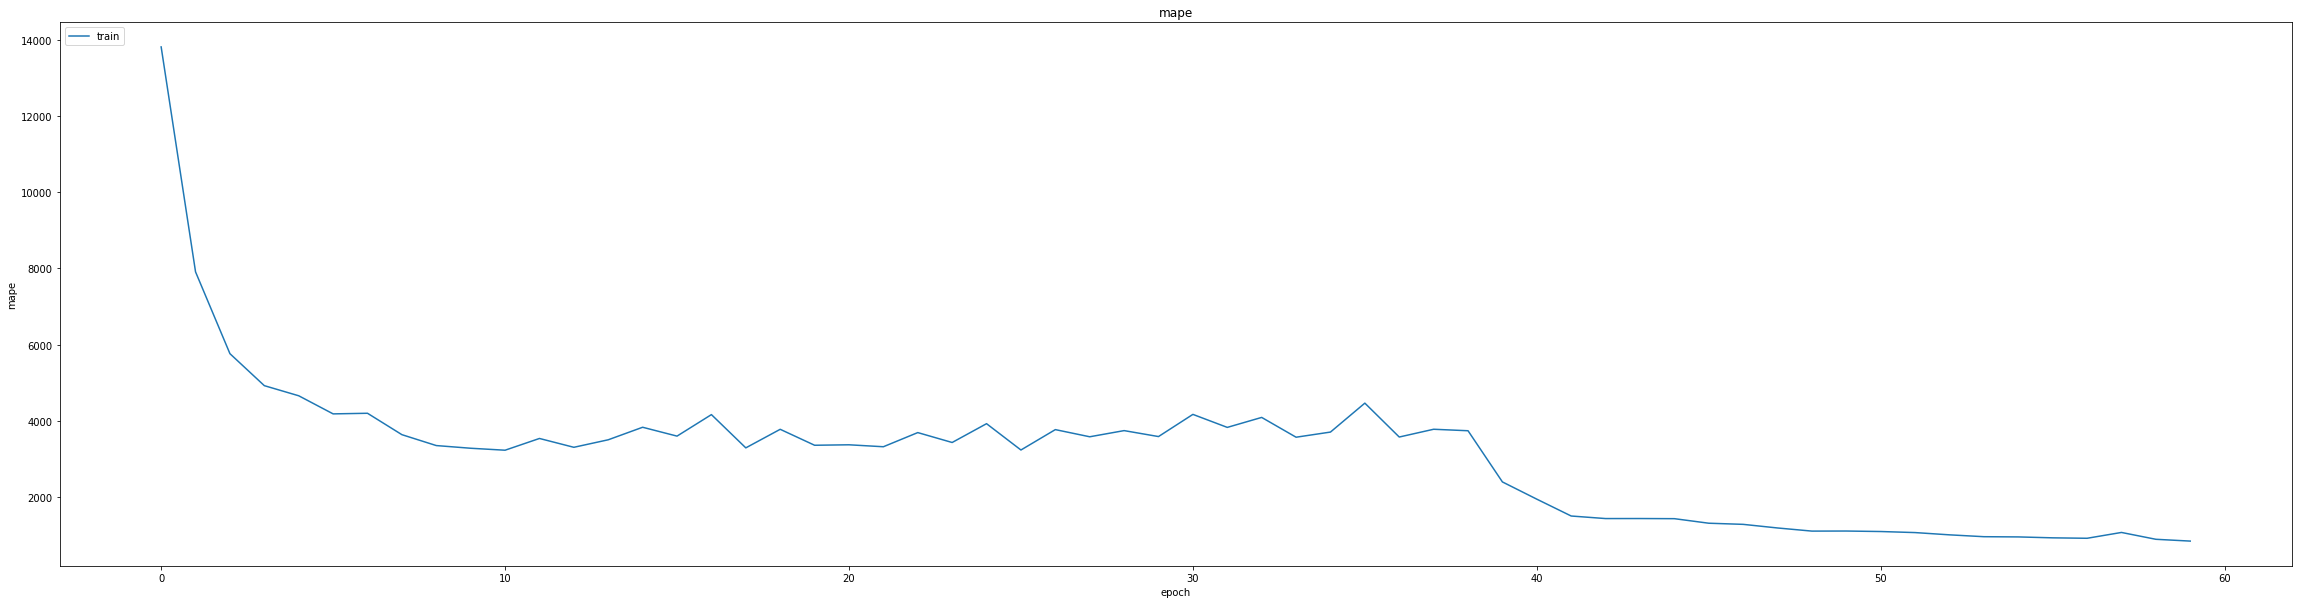

In [101]:
thesis.SummarizeHistory(history)

In [102]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.024753877893090248
0.03205779194831848
1392/1392 [==============================] - 9s 6ms/step
0.988885040451524


In [103]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [104]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
348/348 [==============================] - ETA: 0s - loss: 8.2883e-04 - mae: 0.0154 - mse: 8.2883e-04 - root_mean_squared_error: 0.0288 - mape: 1250.2235
Epoch 1: val_mse did not improve from 0.00103
348/348 [==============================] - 11s 19ms/step - loss: 8.2883e-04 - mae: 0.0154 - mse: 8.2883e-04 - root_mean_squared_error: 0.0288 - mape: 1250.2235 - val_loss: 0.0016 - val_mae: 0.0335 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0400 - val_mape: 2756.9917 - lr: 0.0010
Epoch 2/20
348/348 [==============================] - ETA: 0s - loss: 1.4830e-04 - mae: 0.0088 - mse: 1.4830e-04 - root_mean_squared_error: 0.0122 - mape: 886.6224
Epoch 2: val_mse improved from 0.00103 to 0.00089, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)


348/348 [==============================] - 22s 62ms/step - loss: 1.4830e-04 - mae: 0.0088 - mse: 1.4830e-04 - root_mean_squared_error: 0.0122 - mape: 886.6224 - val_loss: 8.8535e-04 - val_mae: 0.0233 - val_mse: 8.8535e-04 - val_root_mean_squared_error: 0.0298 - val_mape: 2470.6917 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
346/348 [============================>.] - ETA: 0s - loss: 1.3533e-04 - mae: 0.0084 - mse: 1.3533e-04 - root_mean_squared_error: 0.0116 - mape: 788.6072
Epoch 3: val_mse improved from 0.00089 to 0.00073, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)


348/348 [==============================] - 21s 61ms/step - loss: 1.3530e-04 - mae: 0.0084 - mse: 1.3530e-04 - root_mean_squared_error: 0.0116 - mape: 786.2060 - val_loss: 7.3008e-04 - val_mae: 0.0197 - val_mse: 7.3008e-04 - val_root_mean_squared_error: 0.0270 - val_mape: 2490.4033 - lr: 9.0000e-04
Epoch 4/20
345/348 [============================>.] - ETA: 0s - loss: 1.3994e-04 - mae: 0.0086 - mse: 1.3994e-04 - root_mean_squared_error: 0.0118 - mape: 752.0884
Epoch 4: val_mse improved from 0.00073 to 0.00062, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)


348/348 [==============================] - 17s 50ms/step - loss: 1.3991e-04 - mae: 0.0086 - mse: 1.3991e-04 - root_mean_squared_error: 0.0118 - mape: 747.6370 - val_loss: 6.1863e-04 - val_mae: 0.0182 - val_mse: 6.1863e-04 - val_root_mean_squared_error: 0.0249 - val_mape: 2199.0205 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
345/348 [============================>.] - ETA: 0s - loss: 1.3097e-04 - mae: 0.0082 - mse: 1.3097e-04 - root_mean_squared_error: 0.0114 - mape: 726.6348
Epoch 5: val_mse did not improve from 0.00062
348/348 [==============================] - 6s 17ms/step - loss: 1.3154e-04 - mae: 0.0082 - mse: 1.3154e-04 - root_mean_squared_error: 0.0115 - mape: 722.3397 - val_loss: 8.6579e-04 - val_mae: 0.0246 - val_mse: 8.6579e-04 - val_root_mean_squared_error: 0.0294 - val_mape: 2607.5466 - lr: 8.1000e-04
Epoch 6/20
347/348 [============================>.] - ETA: 0s - loss: 1.2569e-04 - mae: 0.0081 - mse: 1.2569e-04 - root_mean_squared_error: 0.0112 - mape: 67

348/348 [==============================] - 16s 47ms/step - loss: 1.2568e-04 - mae: 0.0081 - mse: 1.2568e-04 - root_mean_squared_error: 0.0112 - mape: 677.8368 - val_loss: 5.3929e-04 - val_mae: 0.0179 - val_mse: 5.3929e-04 - val_root_mean_squared_error: 0.0232 - val_mape: 2117.4197 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/20
347/348 [============================>.] - ETA: 0s - loss: 1.1563e-04 - mae: 0.0077 - mse: 1.1563e-04 - root_mean_squared_error: 0.0108 - mape: 612.8423
Epoch 7: val_mse did not improve from 0.00054
348/348 [==============================] - 6s 17ms/step - loss: 1.1562e-04 - mae: 0.0077 - mse: 1.1562e-04 - root_mean_squared_error: 0.0108 - mape: 612.7371 - val_loss: 0.0063 - val_mae: 0.0219 - val_mse: 0.0063 - val_root_mean_squared_error: 0.0792 - val_mape: 1863.9840 - lr: 7.2900e-04
Epoch 8/20
346/348 [============================>.] - ETA: 0s - loss: 1.1141e-04 - mae: 0.0075 - mse: 1.1141e-04 - root_mean_squared_error: 0.0106 - mape: 672.6467
E

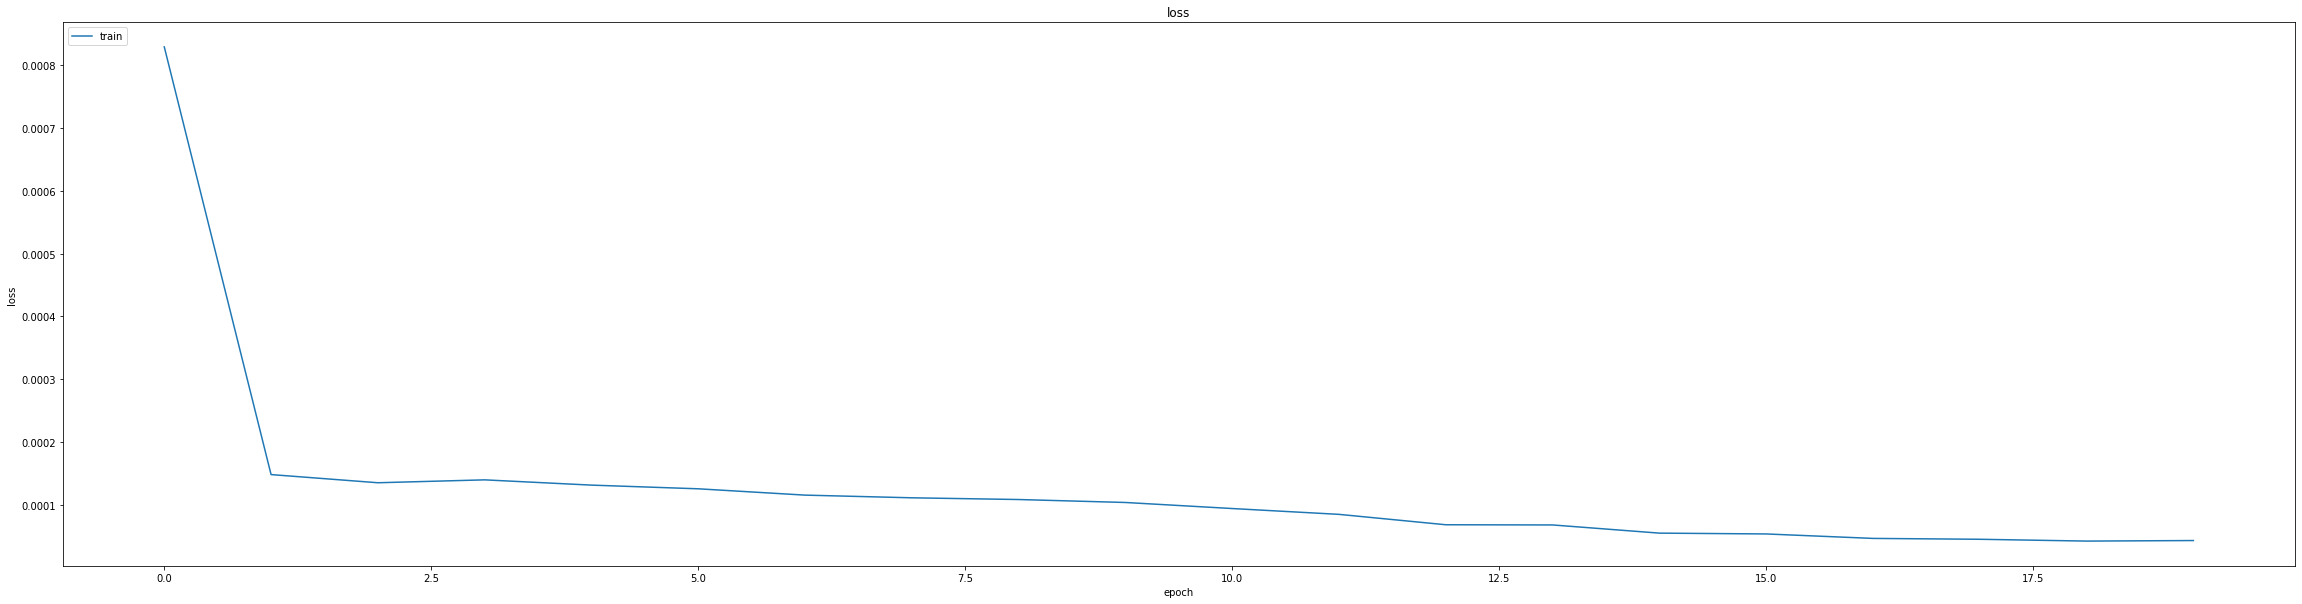

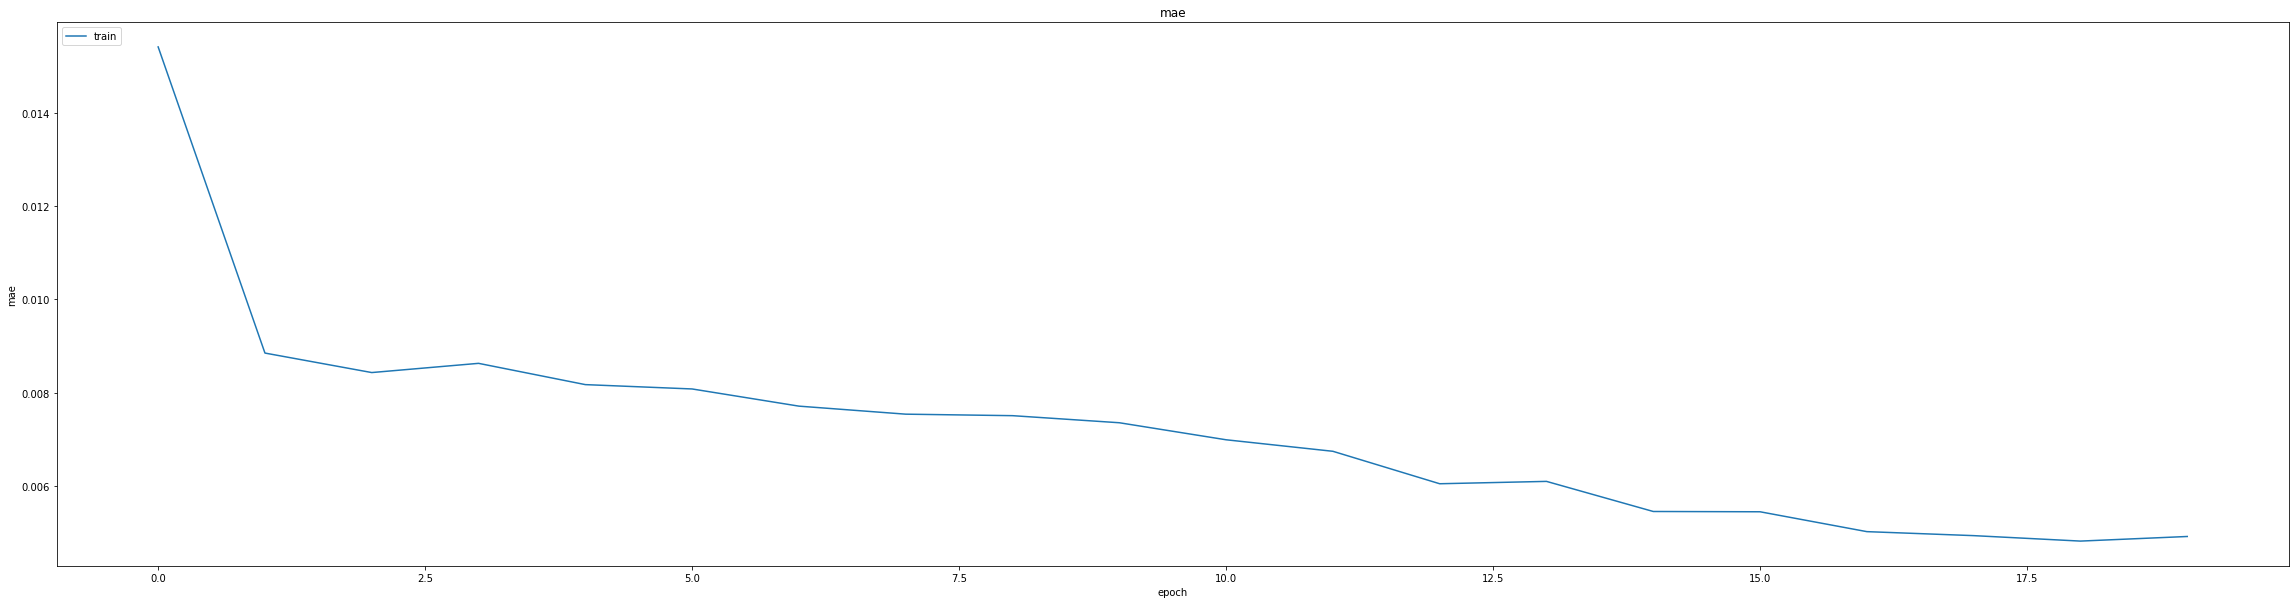

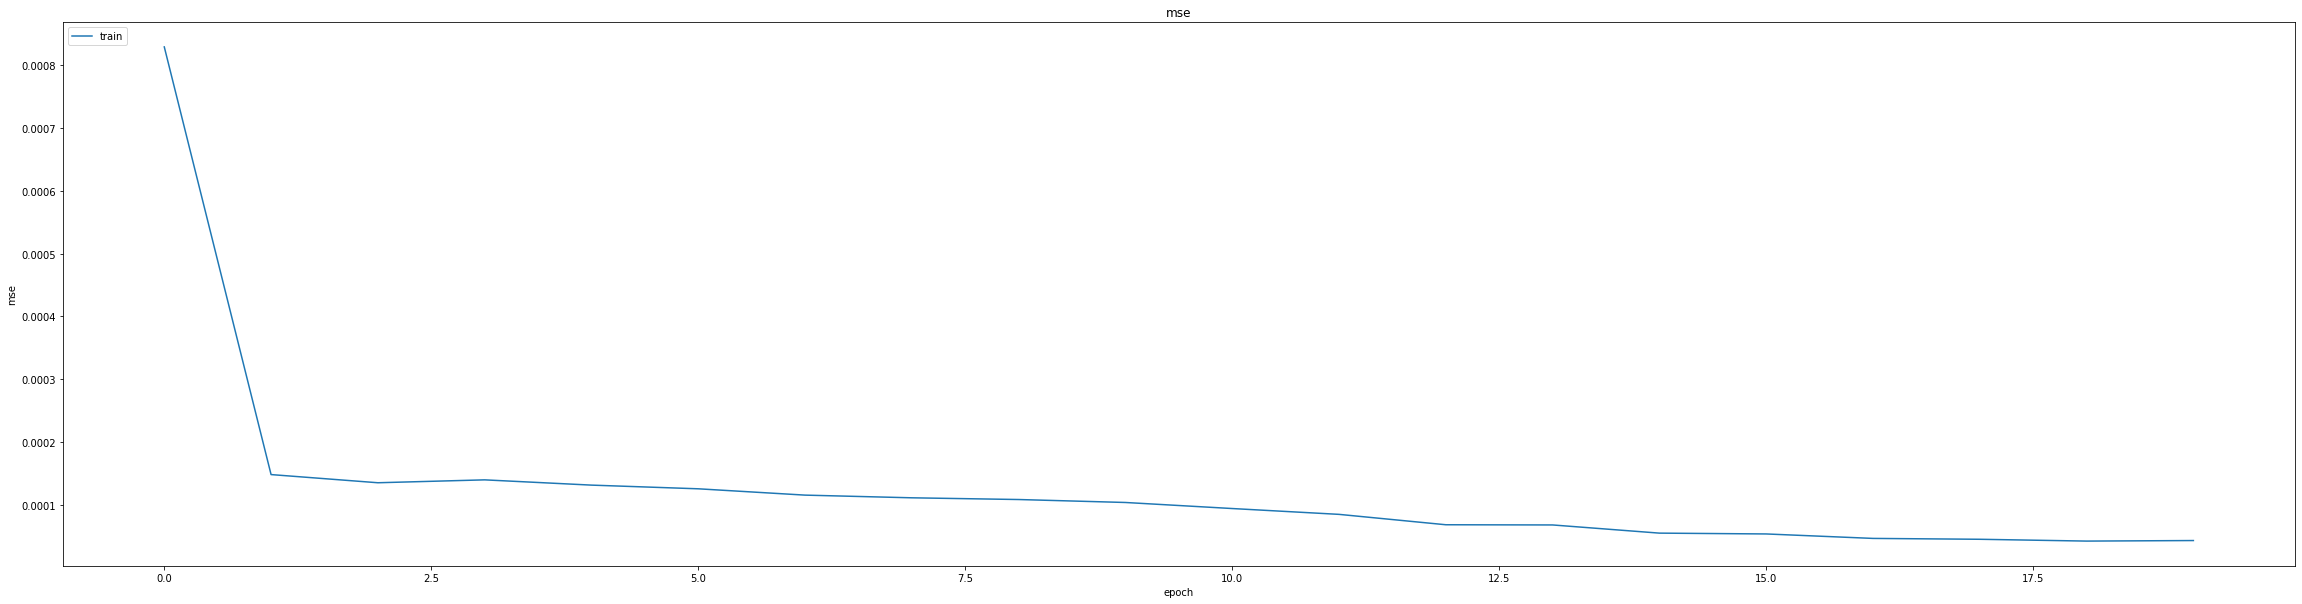

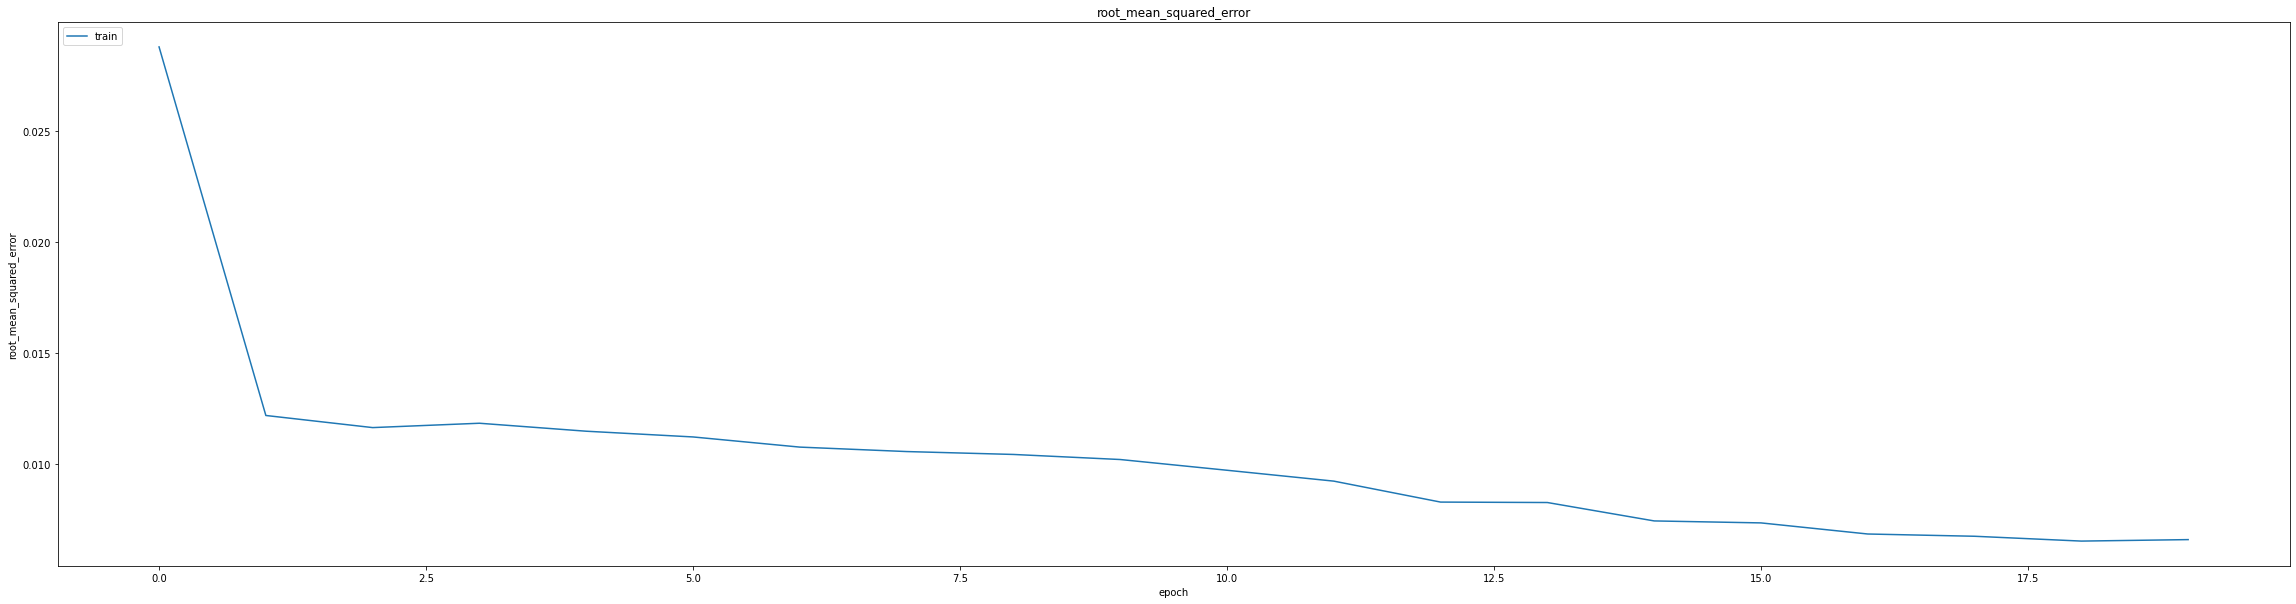

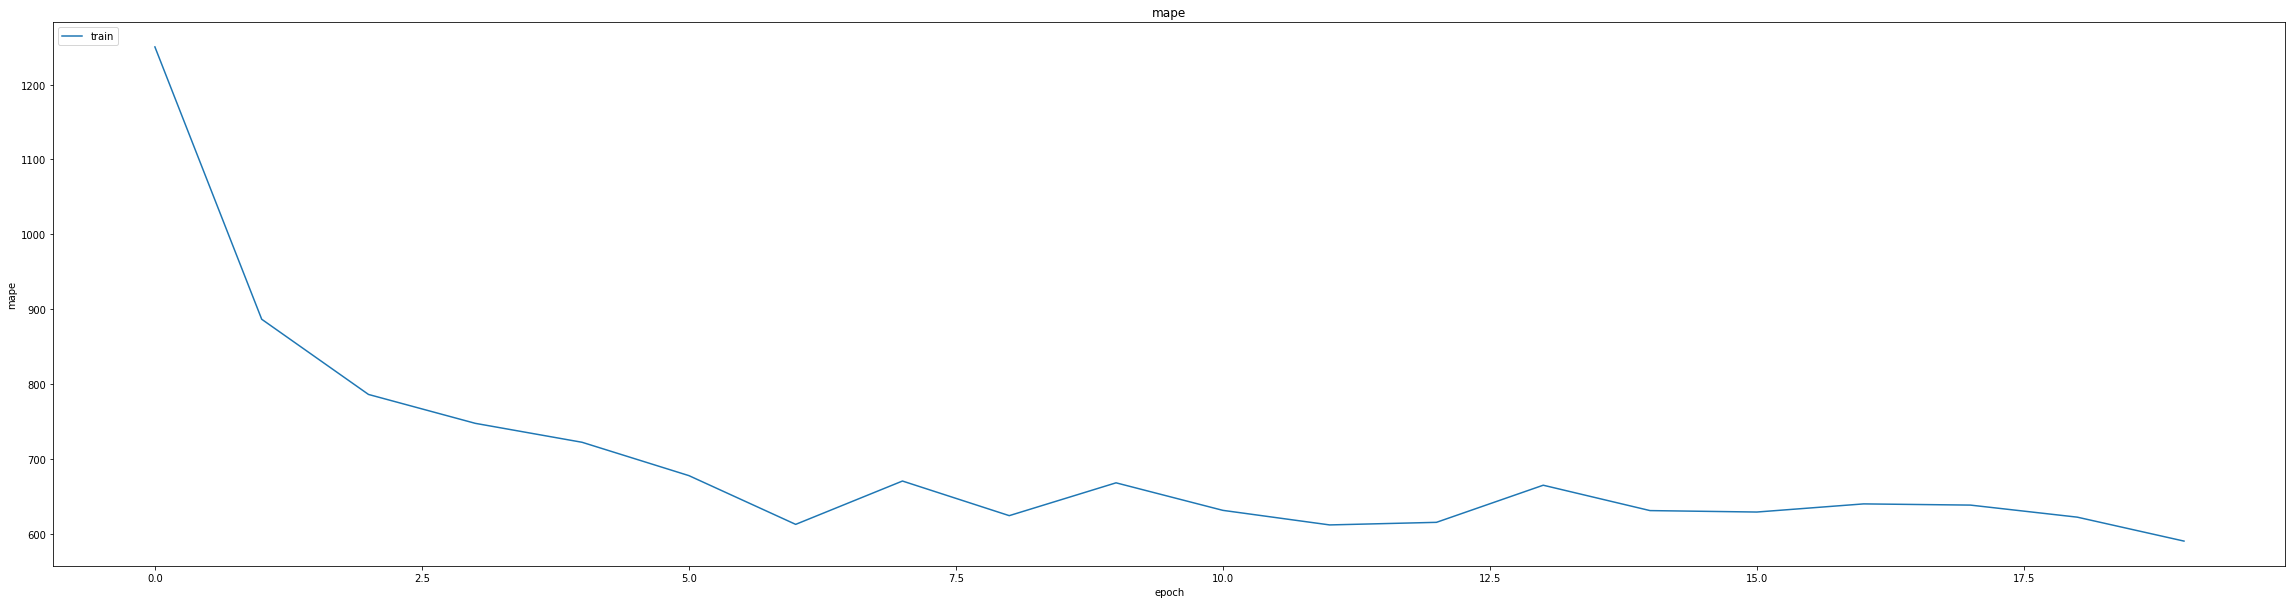

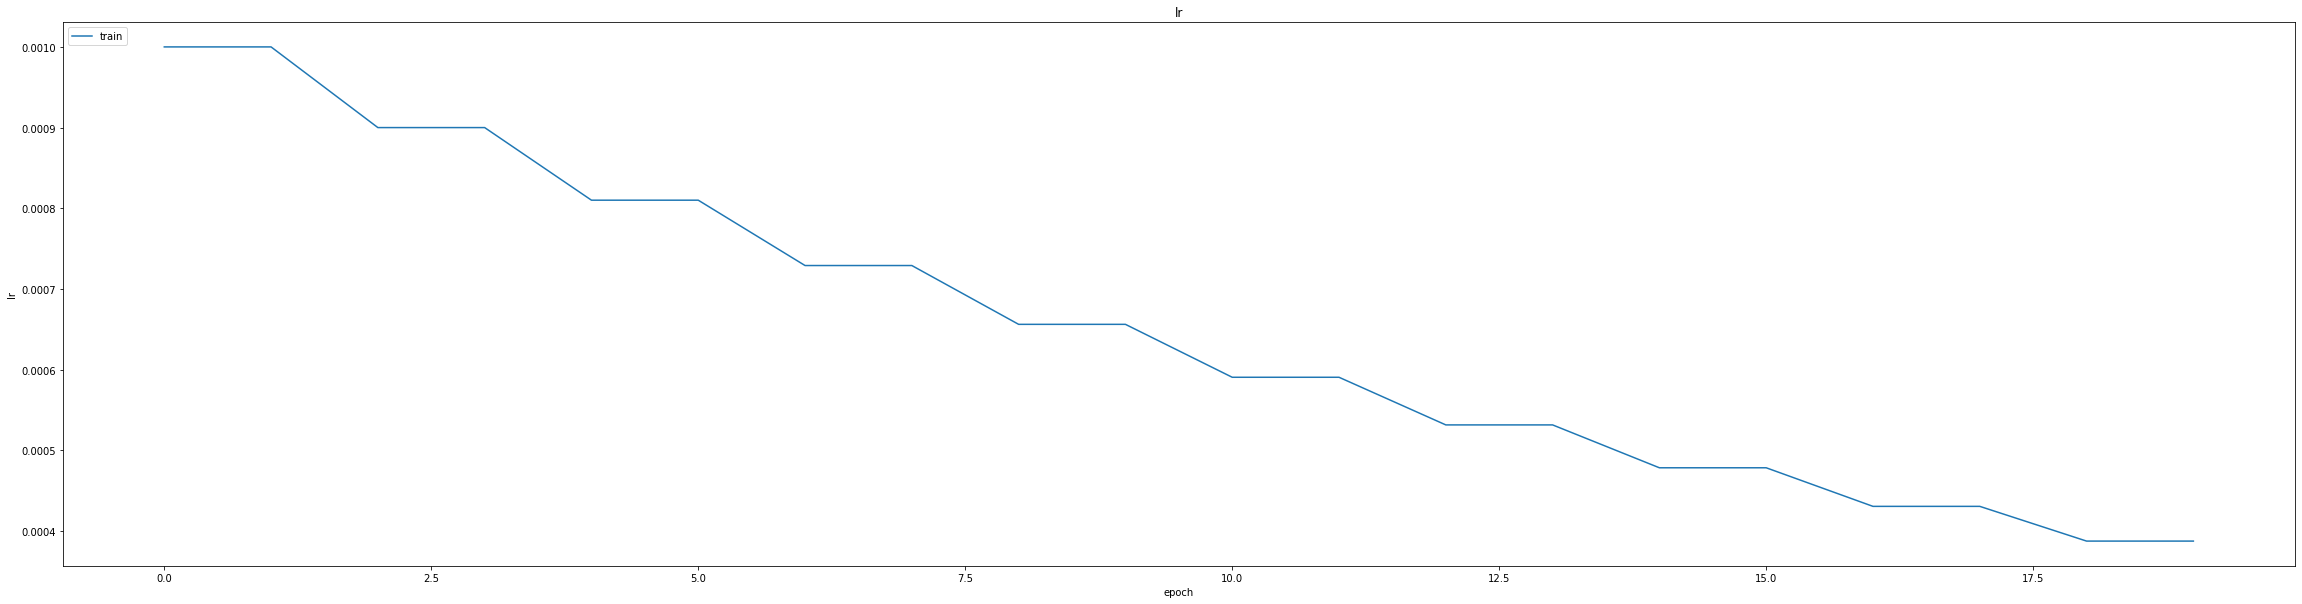

In [105]:
thesis.SummarizeHistory(history)

In [106]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.017946597188711166
0.02322271652519703
1392/1392 [==============================] - 7s 4ms/step
0.9894993053649018


1392/1392 [==============================] - 6s 4ms/step


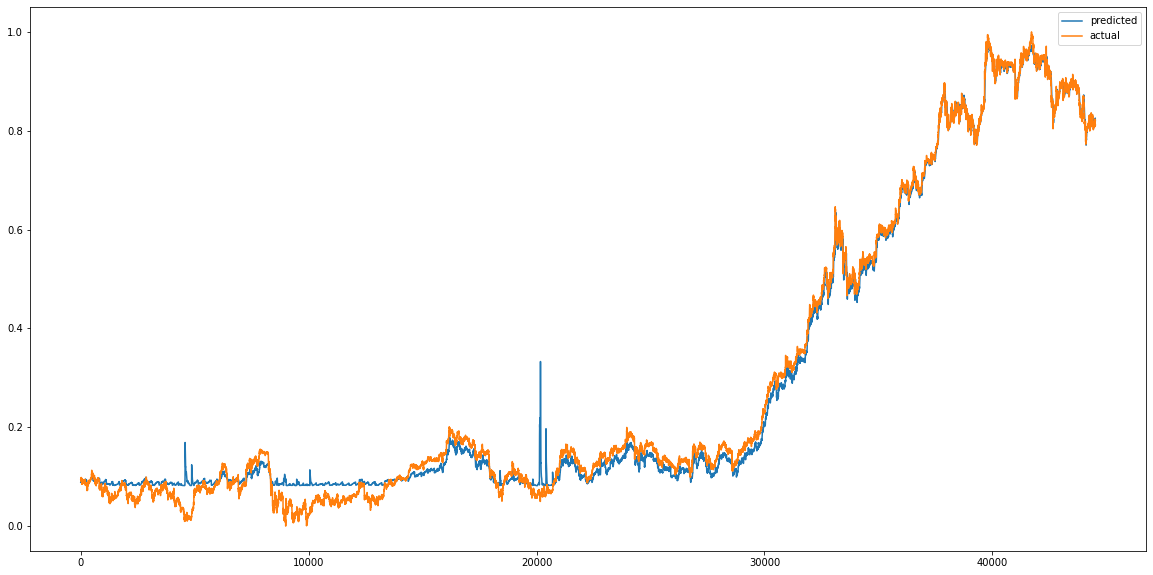

In [107]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


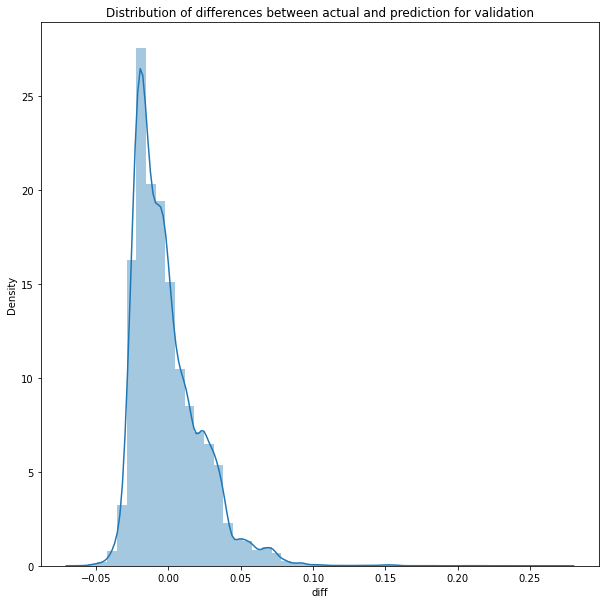

In [108]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1392/1392 [==============================] - 5s 4ms/step


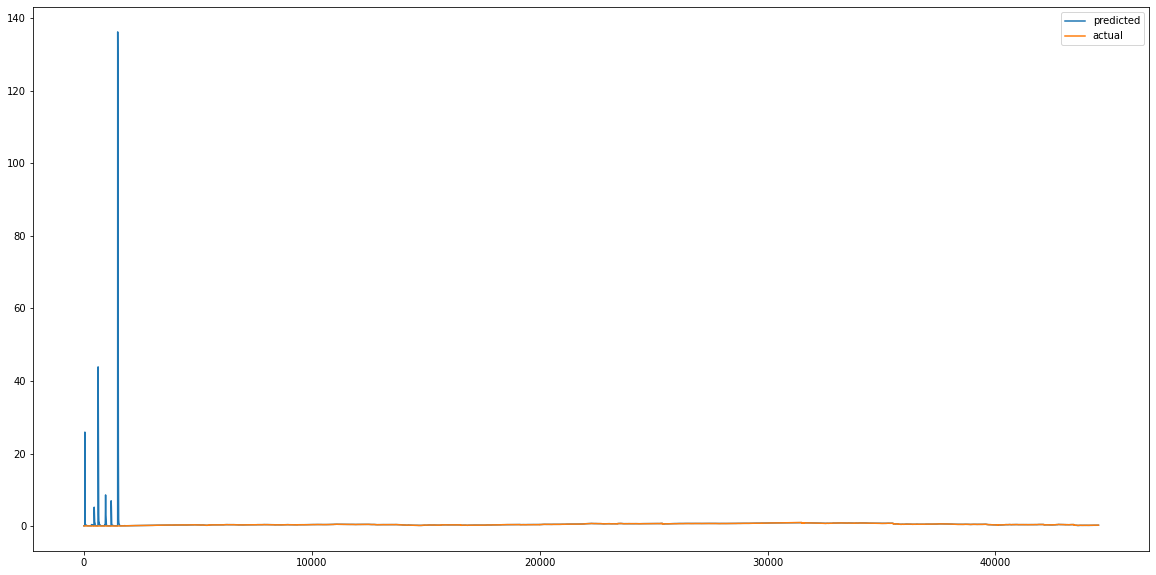

In [109]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


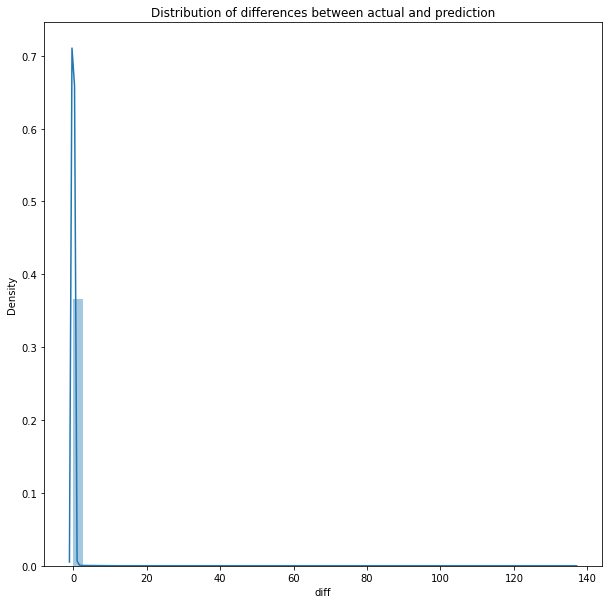

In [110]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  6.96245303660803
RMSE :  2.63864606126097
MAE :  0.10049969682292753
1392/1392 [==============================] - 5s 4ms/step
R2_Score  : -144.90458557981316


count    44524.000000
mean         0.094145
std          2.636996
min         -0.095136
25%         -0.003244
50%          0.003714
75%          0.009335
max        136.176202
Name: diff, dtype: float64

**GRU_MODEL**



In [112]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 24, 256)           207360    
                                                                 
 gru_5 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout_7 (Dropout)         (None, 24, 64)            0         
                                                                 
 gru_6 (GRU)                 (None, 16)                3936      
                                                                 
 dense_21 (Dense)            (None, 32)                544       
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 1)                

In [113]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [114]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [115]:
Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
345/348 [============================>.] - ETA: 0s - loss: 429.6001 - mae: 5.5353 - mse: 429.6001 - root_mean_squared_error: 20.7268 - mape: 14893.5742
Epoch 1: val_mse improved from inf to 0.35032, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 20s 46ms/step - loss: 427.0516 - mae: 5.5048 - mse: 427.0516 - root_mean_squared_error: 20.6652 - mape: 14805.9102 - val_loss: 0.3503 - val_mae: 0.5332 - val_mse: 0.3503 - val_root_mean_squared_error: 0.5919 - val_mape: 18735.7051
Epoch 2/60
347/348 [============================>.] - ETA: 0s - loss: 0.0750 - mae: 0.2191 - mse: 0.0750 - root_mean_squared_error: 0.2738 - mape: 4570.6753
Epoch 2: val_mse improved from 0.35032 to 0.14472, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0750 - mae: 0.2191 - mse: 0.0750 - root_mean_squared_error: 0.2738 - mape: 4569.8994 - val_loss: 0.1447 - val_mae: 0.3600 - val_mse: 0.1447 - val_root_mean_squared_error: 0.3804 - val_mape: 12184.8223
Epoch 3/60
346/348 [============================>.] - ETA: 0s - loss: 0.0360 - mae: 0.1593 - mse: 0.0360 - root_mean_squared_error: 0.1897 - mape: 4057.9478
Epoch 3: val_mse improved from 0.14472 to 0.12133, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 16s 46ms/step - loss: 0.0360 - mae: 0.1593 - mse: 0.0360 - root_mean_squared_error: 0.1897 - mape: 4045.7078 - val_loss: 0.1213 - val_mae: 0.3314 - val_mse: 0.1213 - val_root_mean_squared_error: 0.3483 - val_mape: 10801.6543
Epoch 4/60
346/348 [============================>.] - ETA: 0s - loss: 0.0341 - mae: 0.1578 - mse: 0.0341 - root_mean_squared_error: 0.1847 - mape: 3666.6533
Epoch 4: val_mse improved from 0.12133 to 0.11716, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0341 - mae: 0.1578 - mse: 0.0341 - root_mean_squared_error: 0.1847 - mape: 3655.5957 - val_loss: 0.1172 - val_mae: 0.3255 - val_mse: 0.1172 - val_root_mean_squared_error: 0.3423 - val_mape: 10502.4014
Epoch 5/60
345/348 [============================>.] - ETA: 0s - loss: 0.0340 - mae: 0.1579 - mse: 0.0340 - root_mean_squared_error: 0.1845 - mape: 3562.0110
Epoch 5: val_mse improved from 0.11716 to 0.11616, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 0.0340 - mae: 0.1579 - mse: 0.0340 - root_mean_squared_error: 0.1845 - mape: 3541.1509 - val_loss: 0.1162 - val_mae: 0.3241 - val_mse: 0.1162 - val_root_mean_squared_error: 0.3408 - val_mape: 10429.3047
Epoch 6/60
347/348 [============================>.] - ETA: 0s - loss: 0.0339 - mae: 0.1578 - mse: 0.0339 - root_mean_squared_error: 0.1842 - mape: 3599.1389
Epoch 6: val_mse improved from 0.11616 to 0.11611, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 0.0339 - mae: 0.1578 - mse: 0.0339 - root_mean_squared_error: 0.1842 - mape: 3598.5281 - val_loss: 0.1161 - val_mae: 0.3240 - val_mse: 0.1161 - val_root_mean_squared_error: 0.3408 - val_mape: 10428.4248
Epoch 7/60
347/348 [============================>.] - ETA: 0s - loss: 0.0339 - mae: 0.1578 - mse: 0.0339 - root_mean_squared_error: 0.1841 - mape: 3492.5925
Epoch 7: val_mse did not improve from 0.11611
348/348 [==============================] - 5s 15ms/step - loss: 0.0339 - mae: 0.1578 - mse: 0.0339 - root_mean_squared_error: 0.1841 - mape: 3491.9978 - val_loss: 0.1162 - val_mae: 0.3241 - val_mse: 0.1162 - val_root_mean_squared_error: 0.3408 - val_mape: 10435.2959
Epoch 8/60
348/348 [==============================] - ETA: 0s - loss: 0.0339 - mae: 0.1577 - mse: 0.0339 - root_mean_squared_error: 0.1841 - mape: 3818.4790
Epoch 8: val_mse did not improve from 0.11611
348/348 [==============================] - 5s 15ms/step - l

348/348 [==============================] - 14s 42ms/step - loss: 0.0338 - mae: 0.1575 - mse: 0.0338 - root_mean_squared_error: 0.1838 - mape: 3773.8926 - val_loss: 0.1160 - val_mae: 0.3238 - val_mse: 0.1160 - val_root_mean_squared_error: 0.3405 - val_mape: 10428.7666
Epoch 10/60
344/348 [============================>.] - ETA: 0s - loss: 0.0337 - mae: 0.1573 - mse: 0.0337 - root_mean_squared_error: 0.1836 - mape: 3611.7227
Epoch 10: val_mse improved from 0.11596 to 0.11581, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0337 - mae: 0.1573 - mse: 0.0337 - root_mean_squared_error: 0.1836 - mape: 3580.3020 - val_loss: 0.1158 - val_mae: 0.3236 - val_mse: 0.1158 - val_root_mean_squared_error: 0.3403 - val_mape: 10421.5176
Epoch 11/60
344/348 [============================>.] - ETA: 0s - loss: 0.0337 - mae: 0.1572 - mse: 0.0337 - root_mean_squared_error: 0.1835 - mape: 3604.9678
Epoch 11: val_mse did not improve from 0.11581
348/348 [==============================] - 5s 15ms/step - loss: 0.0337 - mae: 0.1572 - mse: 0.0337 - root_mean_squared_error: 0.1835 - mape: 3573.5933 - val_loss: 0.1158 - val_mae: 0.3236 - val_mse: 0.1158 - val_root_mean_squared_error: 0.3403 - val_mape: 10427.4629
Epoch 12/60
344/348 [============================>.] - ETA: 0s - loss: 0.0336 - mae: 0.1570 - mse: 0.0336 - root_mean_squared_error: 0.1833 - mape: 3619.8633
Epoch 12: val_mse did not improve from 0.11581
348/348 [==============================] - 5s 15ms/step

348/348 [==============================] - 15s 44ms/step - loss: 0.0335 - mae: 0.1569 - mse: 0.0335 - root_mean_squared_error: 0.1831 - mape: 3674.8403 - val_loss: 0.1156 - val_mae: 0.3233 - val_mse: 0.1156 - val_root_mean_squared_error: 0.3400 - val_mape: 10428.9922
Epoch 14/60
345/348 [============================>.] - ETA: 0s - loss: 0.0334 - mae: 0.1565 - mse: 0.0334 - root_mean_squared_error: 0.1827 - mape: 3742.8418
Epoch 14: val_mse improved from 0.11561 to 0.11472, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0334 - mae: 0.1565 - mse: 0.0334 - root_mean_squared_error: 0.1827 - mape: 3720.8933 - val_loss: 0.1147 - val_mae: 0.3221 - val_mse: 0.1147 - val_root_mean_squared_error: 0.3387 - val_mape: 10396.6006
Epoch 15/60
346/348 [============================>.] - ETA: 0s - loss: 0.0329 - mae: 0.1553 - mse: 0.0329 - root_mean_squared_error: 0.1813 - mape: 3442.7139
Epoch 15: val_mse improved from 0.11472 to 0.11230, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 0.0329 - mae: 0.1553 - mse: 0.0329 - root_mean_squared_error: 0.1813 - mape: 3432.3372 - val_loss: 0.1123 - val_mae: 0.3187 - val_mse: 0.1123 - val_root_mean_squared_error: 0.3351 - val_mape: 10283.8740
Epoch 16/60
346/348 [============================>.] - ETA: 0s - loss: 0.0295 - mae: 0.1462 - mse: 0.0295 - root_mean_squared_error: 0.1717 - mape: 3388.0605
Epoch 16: val_mse improved from 0.11230 to 0.08478, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0295 - mae: 0.1461 - mse: 0.0295 - root_mean_squared_error: 0.1717 - mape: 3377.8298 - val_loss: 0.0848 - val_mae: 0.2765 - val_mse: 0.0848 - val_root_mean_squared_error: 0.2912 - val_mape: 9124.7764
Epoch 17/60
345/348 [============================>.] - ETA: 0s - loss: 0.0126 - mae: 0.0879 - mse: 0.0126 - root_mean_squared_error: 0.1121 - mape: 2437.4995
Epoch 17: val_mse improved from 0.08478 to 0.03669, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 0.0125 - mae: 0.0877 - mse: 0.0125 - root_mean_squared_error: 0.1119 - mape: 2423.1321 - val_loss: 0.0367 - val_mae: 0.1758 - val_mse: 0.0367 - val_root_mean_squared_error: 0.1916 - val_mape: 6842.9507
Epoch 18/60
347/348 [============================>.] - ETA: 0s - loss: 0.0038 - mae: 0.0451 - mse: 0.0038 - root_mean_squared_error: 0.0613 - mape: 2481.8875
Epoch 18: val_mse improved from 0.03669 to 0.01889, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 17s 48ms/step - loss: 0.0038 - mae: 0.0451 - mse: 0.0038 - root_mean_squared_error: 0.0613 - mape: 2481.4619 - val_loss: 0.0189 - val_mae: 0.1243 - val_mse: 0.0189 - val_root_mean_squared_error: 0.1375 - val_mape: 5464.7671
Epoch 19/60
347/348 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0356 - mse: 0.0023 - root_mean_squared_error: 0.0475 - mape: 1835.1982
Epoch 19: val_mse improved from 0.01889 to 0.01361, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0023 - mae: 0.0356 - mse: 0.0023 - root_mean_squared_error: 0.0475 - mape: 1834.8840 - val_loss: 0.0136 - val_mae: 0.1047 - val_mse: 0.0136 - val_root_mean_squared_error: 0.1167 - val_mape: 4965.8491
Epoch 20/60
347/348 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0307 - mse: 0.0016 - root_mean_squared_error: 0.0406 - mape: 1776.0414
Epoch 20: val_mse improved from 0.01361 to 0.00968, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 0.0016 - mae: 0.0307 - mse: 0.0016 - root_mean_squared_error: 0.0406 - mape: 1775.7366 - val_loss: 0.0097 - val_mae: 0.0870 - val_mse: 0.0097 - val_root_mean_squared_error: 0.0984 - val_mape: 4609.2246
Epoch 21/60
345/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0270 - mse: 0.0013 - root_mean_squared_error: 0.0355 - mape: 1622.2168
Epoch 21: val_mse improved from 0.00968 to 0.00779, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 0.0013 - mae: 0.0270 - mse: 0.0013 - root_mean_squared_error: 0.0355 - mape: 1612.6285 - val_loss: 0.0078 - val_mae: 0.0764 - val_mse: 0.0078 - val_root_mean_squared_error: 0.0882 - val_mape: 4316.4404
Epoch 22/60
346/348 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0245 - mse: 0.0010 - root_mean_squared_error: 0.0323 - mape: 1581.5781
Epoch 22: val_mse improved from 0.00779 to 0.00620, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0010 - mae: 0.0245 - mse: 0.0010 - root_mean_squared_error: 0.0323 - mape: 1576.7708 - val_loss: 0.0062 - val_mae: 0.0676 - val_mse: 0.0062 - val_root_mean_squared_error: 0.0787 - val_mape: 4103.8101
Epoch 23/60
347/348 [============================>.] - ETA: 0s - loss: 8.5172e-04 - mae: 0.0222 - mse: 8.5172e-04 - root_mean_squared_error: 0.0292 - mape: 1495.1000
Epoch 23: val_mse improved from 0.00620 to 0.00561, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 8.5170e-04 - mae: 0.0222 - mse: 8.5170e-04 - root_mean_squared_error: 0.0292 - mape: 1494.8440 - val_loss: 0.0056 - val_mae: 0.0649 - val_mse: 0.0056 - val_root_mean_squared_error: 0.0749 - val_mape: 3889.8040
Epoch 24/60
347/348 [============================>.] - ETA: 0s - loss: 7.4270e-04 - mae: 0.0207 - mse: 7.4270e-04 - root_mean_squared_error: 0.0273 - mape: 1486.5464
Epoch 24: val_mse improved from 0.00561 to 0.00469, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 7.4270e-04 - mae: 0.0207 - mse: 7.4270e-04 - root_mean_squared_error: 0.0273 - mape: 1486.2915 - val_loss: 0.0047 - val_mae: 0.0566 - val_mse: 0.0047 - val_root_mean_squared_error: 0.0685 - val_mape: 3773.9290
Epoch 25/60
345/348 [============================>.] - ETA: 0s - loss: 6.6398e-04 - mae: 0.0195 - mse: 6.6398e-04 - root_mean_squared_error: 0.0258 - mape: 1343.4611
Epoch 25: val_mse improved from 0.00469 to 0.00433, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 6.6393e-04 - mae: 0.0195 - mse: 6.6393e-04 - root_mean_squared_error: 0.0258 - mape: 1335.5186 - val_loss: 0.0043 - val_mae: 0.0545 - val_mse: 0.0043 - val_root_mean_squared_error: 0.0658 - val_mape: 3673.3027
Epoch 26/60
345/348 [============================>.] - ETA: 0s - loss: 5.9650e-04 - mae: 0.0185 - mse: 5.9650e-04 - root_mean_squared_error: 0.0244 - mape: 1290.3276
Epoch 26: val_mse improved from 0.00433 to 0.00412, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 5.9618e-04 - mae: 0.0185 - mse: 5.9618e-04 - root_mean_squared_error: 0.0244 - mape: 1282.6974 - val_loss: 0.0041 - val_mae: 0.0538 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0642 - val_mape: 3573.2390
Epoch 27/60
344/348 [============================>.] - ETA: 0s - loss: 5.3771e-04 - mae: 0.0175 - mse: 5.3771e-04 - root_mean_squared_error: 0.0232 - mape: 1314.5635
Epoch 27: val_mse improved from 0.00412 to 0.00366, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 5.3775e-04 - mae: 0.0175 - mse: 5.3775e-04 - root_mean_squared_error: 0.0232 - mape: 1303.0140 - val_loss: 0.0037 - val_mae: 0.0497 - val_mse: 0.0037 - val_root_mean_squared_error: 0.0605 - val_mape: 3485.1028
Epoch 28/60
346/348 [============================>.] - ETA: 0s - loss: 4.8648e-04 - mae: 0.0166 - mse: 4.8648e-04 - root_mean_squared_error: 0.0221 - mape: 1214.9866
Epoch 28: val_mse improved from 0.00366 to 0.00334, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 4.8633e-04 - mae: 0.0166 - mse: 4.8633e-04 - root_mean_squared_error: 0.0221 - mape: 1211.2877 - val_loss: 0.0033 - val_mae: 0.0472 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0578 - val_mape: 3402.4104
Epoch 29/60
345/348 [============================>.] - ETA: 0s - loss: 4.4514e-04 - mae: 0.0159 - mse: 4.4514e-04 - root_mean_squared_error: 0.0211 - mape: 1125.4886
Epoch 29: val_mse improved from 0.00334 to 0.00294, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 4.4486e-04 - mae: 0.0159 - mse: 4.4486e-04 - root_mean_squared_error: 0.0211 - mape: 1118.8312 - val_loss: 0.0029 - val_mae: 0.0429 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0542 - val_mape: 3303.7678
Epoch 30/60
344/348 [============================>.] - ETA: 0s - loss: 4.0728e-04 - mae: 0.0152 - mse: 4.0728e-04 - root_mean_squared_error: 0.0202 - mape: 1235.9946
Epoch 30: val_mse improved from 0.00294 to 0.00280, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 4.0660e-04 - mae: 0.0152 - mse: 4.0660e-04 - root_mean_squared_error: 0.0202 - mape: 1225.1290 - val_loss: 0.0028 - val_mae: 0.0431 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0529 - val_mape: 3216.5955
Epoch 31/60
345/348 [============================>.] - ETA: 0s - loss: 3.7520e-04 - mae: 0.0146 - mse: 3.7520e-04 - root_mean_squared_error: 0.0194 - mape: 1197.6558
Epoch 31: val_mse improved from 0.00280 to 0.00253, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 16s 47ms/step - loss: 3.7522e-04 - mae: 0.0146 - mse: 3.7522e-04 - root_mean_squared_error: 0.0194 - mape: 1190.5721 - val_loss: 0.0025 - val_mae: 0.0395 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0503 - val_mape: 3157.0466
Epoch 32/60
345/348 [============================>.] - ETA: 0s - loss: 3.4897e-04 - mae: 0.0141 - mse: 3.4897e-04 - root_mean_squared_error: 0.0187 - mape: 1140.8344
Epoch 32: val_mse did not improve from 0.00253
348/348 [==============================] - 5s 15ms/step - loss: 3.4928e-04 - mae: 0.0141 - mse: 3.4928e-04 - root_mean_squared_error: 0.0187 - mape: 1134.0880 - val_loss: 0.0026 - val_mae: 0.0410 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0505 - val_mape: 3078.0225
Epoch 33/60
346/348 [============================>.] - ETA: 0s - loss: 3.1962e-04 - mae: 0.0135 - mse: 3.1962e-04 - root_mean_squared_error: 0.0179 - mape: 1096.3102
Epoch 33: val_mse improved from 0.00253 to 0.00222, saving model to /con

348/348 [==============================] - 15s 44ms/step - loss: 3.1980e-04 - mae: 0.0135 - mse: 3.1980e-04 - root_mean_squared_error: 0.0179 - mape: 1092.9734 - val_loss: 0.0022 - val_mae: 0.0371 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0471 - val_mape: 3018.4692
Epoch 34/60
345/348 [============================>.] - ETA: 0s - loss: 2.9741e-04 - mae: 0.0129 - mse: 2.9741e-04 - root_mean_squared_error: 0.0172 - mape: 1108.2874
Epoch 34: val_mse improved from 0.00222 to 0.00193, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 2.9731e-04 - mae: 0.0129 - mse: 2.9731e-04 - root_mean_squared_error: 0.0172 - mape: 1101.7297 - val_loss: 0.0019 - val_mae: 0.0339 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0439 - val_mape: 2934.3684
Epoch 35/60
346/348 [============================>.] - ETA: 0s - loss: 2.7534e-04 - mae: 0.0125 - mse: 2.7534e-04 - root_mean_squared_error: 0.0166 - mape: 1065.7969
Epoch 35: val_mse improved from 0.00193 to 0.00189, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 45ms/step - loss: 2.7532e-04 - mae: 0.0125 - mse: 2.7532e-04 - root_mean_squared_error: 0.0166 - mape: 1062.5515 - val_loss: 0.0019 - val_mae: 0.0348 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0435 - val_mape: 2839.1831
Epoch 36/60
348/348 [==============================] - ETA: 0s - loss: 2.6101e-04 - mae: 0.0121 - mse: 2.6101e-04 - root_mean_squared_error: 0.0162 - mape: 1011.3537
Epoch 36: val_mse improved from 0.00189 to 0.00165, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 2.6101e-04 - mae: 0.0121 - mse: 2.6101e-04 - root_mean_squared_error: 0.0162 - mape: 1011.3537 - val_loss: 0.0017 - val_mae: 0.0312 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0407 - val_mape: 2808.4131
Epoch 37/60
344/348 [============================>.] - ETA: 0s - loss: 2.4827e-04 - mae: 0.0118 - mse: 2.4827e-04 - root_mean_squared_error: 0.0158 - mape: 1071.6853
Epoch 37: val_mse improved from 0.00165 to 0.00164, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 2.4825e-04 - mae: 0.0118 - mse: 2.4825e-04 - root_mean_squared_error: 0.0158 - mape: 1062.2649 - val_loss: 0.0016 - val_mae: 0.0311 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0405 - val_mape: 2780.6580
Epoch 38/60
347/348 [============================>.] - ETA: 0s - loss: 2.3208e-04 - mae: 0.0114 - mse: 2.3208e-04 - root_mean_squared_error: 0.0152 - mape: 1010.0112
Epoch 38: val_mse improved from 0.00164 to 0.00143, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 2.3207e-04 - mae: 0.0114 - mse: 2.3207e-04 - root_mean_squared_error: 0.0152 - mape: 1009.8377 - val_loss: 0.0014 - val_mae: 0.0282 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0378 - val_mape: 2717.0957
Epoch 39/60
348/348 [==============================] - ETA: 0s - loss: 2.2760e-04 - mae: 0.0113 - mse: 2.2760e-04 - root_mean_squared_error: 0.0151 - mape: 999.3687 
Epoch 39: val_mse did not improve from 0.00143
348/348 [==============================] - 5s 15ms/step - loss: 2.2760e-04 - mae: 0.0113 - mse: 2.2760e-04 - root_mean_squared_error: 0.0151 - mape: 999.3687 - val_loss: 0.0015 - val_mae: 0.0314 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0386 - val_mape: 2632.9644
Epoch 40/60
347/348 [============================>.] - ETA: 0s - loss: 2.1593e-04 - mae: 0.0110 - mse: 2.1593e-04 - root_mean_squared_error: 0.0147 - mape: 977.0359
Epoch 40: val_mse improved from 0.00143 to 0.00128, saving model to /conte

348/348 [==============================] - 14s 42ms/step - loss: 2.1594e-04 - mae: 0.0110 - mse: 2.1594e-04 - root_mean_squared_error: 0.0147 - mape: 976.8683 - val_loss: 0.0013 - val_mae: 0.0271 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0357 - val_mape: 2630.2346
Epoch 41/60
344/348 [============================>.] - ETA: 0s - loss: 2.0555e-04 - mae: 0.0107 - mse: 2.0555e-04 - root_mean_squared_error: 0.0143 - mape: 944.0225
Epoch 41: val_mse improved from 0.00128 to 0.00126, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 45ms/step - loss: 2.0547e-04 - mae: 0.0107 - mse: 2.0547e-04 - root_mean_squared_error: 0.0143 - mape: 935.7238 - val_loss: 0.0013 - val_mae: 0.0277 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0356 - val_mape: 2581.7781
Epoch 42/60
347/348 [============================>.] - ETA: 0s - loss: 1.9618e-04 - mae: 0.0104 - mse: 1.9618e-04 - root_mean_squared_error: 0.0140 - mape: 891.3278
Epoch 42: val_mse improved from 0.00126 to 0.00106, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 1.9619e-04 - mae: 0.0104 - mse: 1.9619e-04 - root_mean_squared_error: 0.0140 - mape: 891.1748 - val_loss: 0.0011 - val_mae: 0.0226 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0326 - val_mape: 2570.9353
Epoch 43/60
347/348 [============================>.] - ETA: 0s - loss: 1.9905e-04 - mae: 0.0105 - mse: 1.9905e-04 - root_mean_squared_error: 0.0141 - mape: 949.3786
Epoch 43: val_mse improved from 0.00106 to 0.00103, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 1.9904e-04 - mae: 0.0105 - mse: 1.9904e-04 - root_mean_squared_error: 0.0141 - mape: 949.2155 - val_loss: 0.0010 - val_mae: 0.0217 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0321 - val_mape: 2556.8027
Epoch 44/60
346/348 [============================>.] - ETA: 0s - loss: 1.8667e-04 - mae: 0.0102 - mse: 1.8667e-04 - root_mean_squared_error: 0.0137 - mape: 878.1460
Epoch 44: val_mse improved from 0.00103 to 0.00100, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 1.8668e-04 - mae: 0.0102 - mse: 1.8668e-04 - root_mean_squared_error: 0.0137 - mape: 875.4728 - val_loss: 0.0010 - val_mae: 0.0219 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0316 - val_mape: 2532.6055
Epoch 45/60
347/348 [============================>.] - ETA: 0s - loss: 1.8530e-04 - mae: 0.0101 - mse: 1.8530e-04 - root_mean_squared_error: 0.0136 - mape: 910.1838
Epoch 45: val_mse did not improve from 0.00100
348/348 [==============================] - 7s 19ms/step - loss: 1.8532e-04 - mae: 0.0101 - mse: 1.8532e-04 - root_mean_squared_error: 0.0136 - mape: 910.0277 - val_loss: 0.0013 - val_mae: 0.0296 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0364 - val_mape: 2491.0269
Epoch 46/60
348/348 [==============================] - ETA: 0s - loss: 1.7831e-04 - mae: 0.0099 - mse: 1.7831e-04 - root_mean_squared_error: 0.0134 - mape: 852.4287
Epoch 46: val_mse improved from 0.00100 to 0.00097, saving model to /content

348/348 [==============================] - 20s 59ms/step - loss: 1.7831e-04 - mae: 0.0099 - mse: 1.7831e-04 - root_mean_squared_error: 0.0134 - mape: 852.4287 - val_loss: 9.6723e-04 - val_mae: 0.0212 - val_mse: 9.6723e-04 - val_root_mean_squared_error: 0.0311 - val_mape: 2510.4197
Epoch 47/60
347/348 [============================>.] - ETA: 0s - loss: 1.7479e-04 - mae: 0.0098 - mse: 1.7479e-04 - root_mean_squared_error: 0.0132 - mape: 867.2302
Epoch 47: val_mse did not improve from 0.00097
348/348 [==============================] - 7s 21ms/step - loss: 1.7478e-04 - mae: 0.0098 - mse: 1.7478e-04 - root_mean_squared_error: 0.0132 - mape: 867.0812 - val_loss: 0.0012 - val_mae: 0.0278 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0341 - val_mape: 2444.9988
Epoch 48/60
346/348 [============================>.] - ETA: 0s - loss: 1.7090e-04 - mae: 0.0097 - mse: 1.7090e-04 - root_mean_squared_error: 0.0131 - mape: 862.8441
Epoch 48: val_mse improved from 0.00097 to 0.00092, saving model to 

348/348 [==============================] - 17s 48ms/step - loss: 1.7091e-04 - mae: 0.0097 - mse: 1.7091e-04 - root_mean_squared_error: 0.0131 - mape: 860.2175 - val_loss: 9.2365e-04 - val_mae: 0.0219 - val_mse: 9.2365e-04 - val_root_mean_squared_error: 0.0304 - val_mape: 2453.3472
Epoch 49/60
346/348 [============================>.] - ETA: 0s - loss: 1.6096e-04 - mae: 0.0094 - mse: 1.6096e-04 - root_mean_squared_error: 0.0127 - mape: 943.0358
Epoch 49: val_mse did not improve from 0.00092
348/348 [==============================] - 5s 15ms/step - loss: 1.6093e-04 - mae: 0.0094 - mse: 1.6093e-04 - root_mean_squared_error: 0.0127 - mape: 940.1641 - val_loss: 9.3256e-04 - val_mae: 0.0232 - val_mse: 9.3256e-04 - val_root_mean_squared_error: 0.0305 - val_mape: 2424.6123
Epoch 50/60
344/348 [============================>.] - ETA: 0s - loss: 1.6546e-04 - mae: 0.0096 - mse: 1.6546e-04 - root_mean_squared_error: 0.0129 - mape: 879.7466
Epoch 50: val_mse did not improve from 0.00092
348/348 [====

348/348 [==============================] - 15s 44ms/step - loss: 1.6447e-04 - mae: 0.0095 - mse: 1.6447e-04 - root_mean_squared_error: 0.0128 - mape: 889.2833 - val_loss: 8.7045e-04 - val_mae: 0.0211 - val_mse: 8.7045e-04 - val_root_mean_squared_error: 0.0295 - val_mape: 2438.8738
Epoch 52/60
348/348 [==============================] - ETA: 0s - loss: 1.4938e-04 - mae: 0.0090 - mse: 1.4938e-04 - root_mean_squared_error: 0.0122 - mape: 817.6274
Epoch 52: val_mse improved from 0.00087 to 0.00087, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 1.4938e-04 - mae: 0.0090 - mse: 1.4938e-04 - root_mean_squared_error: 0.0122 - mape: 817.6274 - val_loss: 8.6563e-04 - val_mae: 0.0219 - val_mse: 8.6563e-04 - val_root_mean_squared_error: 0.0294 - val_mape: 2410.1599
Epoch 53/60
347/348 [============================>.] - ETA: 0s - loss: 1.4963e-04 - mae: 0.0090 - mse: 1.4963e-04 - root_mean_squared_error: 0.0122 - mape: 847.2341
Epoch 53: val_mse did not improve from 0.00087
348/348 [==============================] - 5s 15ms/step - loss: 1.4963e-04 - mae: 0.0090 - mse: 1.4963e-04 - root_mean_squared_error: 0.0122 - mape: 847.0885 - val_loss: 9.3403e-04 - val_mae: 0.0231 - val_mse: 9.3403e-04 - val_root_mean_squared_error: 0.0306 - val_mape: 2401.5295
Epoch 54/60
347/348 [============================>.] - ETA: 0s - loss: 1.4904e-04 - mae: 0.0090 - mse: 1.4904e-04 - root_mean_squared_error: 0.0122 - mape: 884.7198
Epoch 54: val_mse improved from 0.00087 to 0.00082, saving m

348/348 [==============================] - 15s 44ms/step - loss: 1.4903e-04 - mae: 0.0090 - mse: 1.4903e-04 - root_mean_squared_error: 0.0122 - mape: 884.5679 - val_loss: 8.1876e-04 - val_mae: 0.0206 - val_mse: 8.1876e-04 - val_root_mean_squared_error: 0.0286 - val_mape: 2384.5176
Epoch 55/60
344/348 [============================>.] - ETA: 0s - loss: 1.5823e-04 - mae: 0.0094 - mse: 1.5823e-04 - root_mean_squared_error: 0.0126 - mape: 816.8111
Epoch 55: val_mse improved from 0.00082 to 0.00078, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 1.5814e-04 - mae: 0.0094 - mse: 1.5814e-04 - root_mean_squared_error: 0.0126 - mape: 809.6312 - val_loss: 7.7993e-04 - val_mae: 0.0185 - val_mse: 7.7993e-04 - val_root_mean_squared_error: 0.0279 - val_mape: 2400.7102
Epoch 56/60
344/348 [============================>.] - ETA: 0s - loss: 1.6054e-04 - mae: 0.0094 - mse: 1.6054e-04 - root_mean_squared_error: 0.0127 - mape: 912.8452
Epoch 56: val_mse did not improve from 0.00078
348/348 [==============================] - 5s 15ms/step - loss: 1.6031e-04 - mae: 0.0094 - mse: 1.6031e-04 - root_mean_squared_error: 0.0127 - mape: 904.8170 - val_loss: 7.8741e-04 - val_mae: 0.0187 - val_mse: 7.8741e-04 - val_root_mean_squared_error: 0.0281 - val_mape: 2403.7742
Epoch 57/60
348/348 [==============================] - ETA: 0s - loss: 1.3560e-04 - mae: 0.0085 - mse: 1.3560e-04 - root_mean_squared_error: 0.0116 - mape: 837.8741
Epoch 57: val_mse improved from 0.00078 to 0.00075, saving m

348/348 [==============================] - 15s 42ms/step - loss: 1.3560e-04 - mae: 0.0085 - mse: 1.3560e-04 - root_mean_squared_error: 0.0116 - mape: 837.8741 - val_loss: 7.5392e-04 - val_mae: 0.0184 - val_mse: 7.5392e-04 - val_root_mean_squared_error: 0.0275 - val_mape: 2373.7700
Epoch 58/60
348/348 [==============================] - ETA: 0s - loss: 1.6725e-04 - mae: 0.0097 - mse: 1.6725e-04 - root_mean_squared_error: 0.0129 - mape: 828.8174
Epoch 58: val_mse did not improve from 0.00075
348/348 [==============================] - 5s 15ms/step - loss: 1.6725e-04 - mae: 0.0097 - mse: 1.6725e-04 - root_mean_squared_error: 0.0129 - mape: 828.8174 - val_loss: 8.8254e-04 - val_mae: 0.0226 - val_mse: 8.8254e-04 - val_root_mean_squared_error: 0.0297 - val_mape: 2395.7070
Epoch 59/60
344/348 [============================>.] - ETA: 0s - loss: 1.2783e-04 - mae: 0.0082 - mse: 1.2783e-04 - root_mean_squared_error: 0.0113 - mape: 861.6463
Epoch 59: val_mse did not improve from 0.00075
348/348 [====

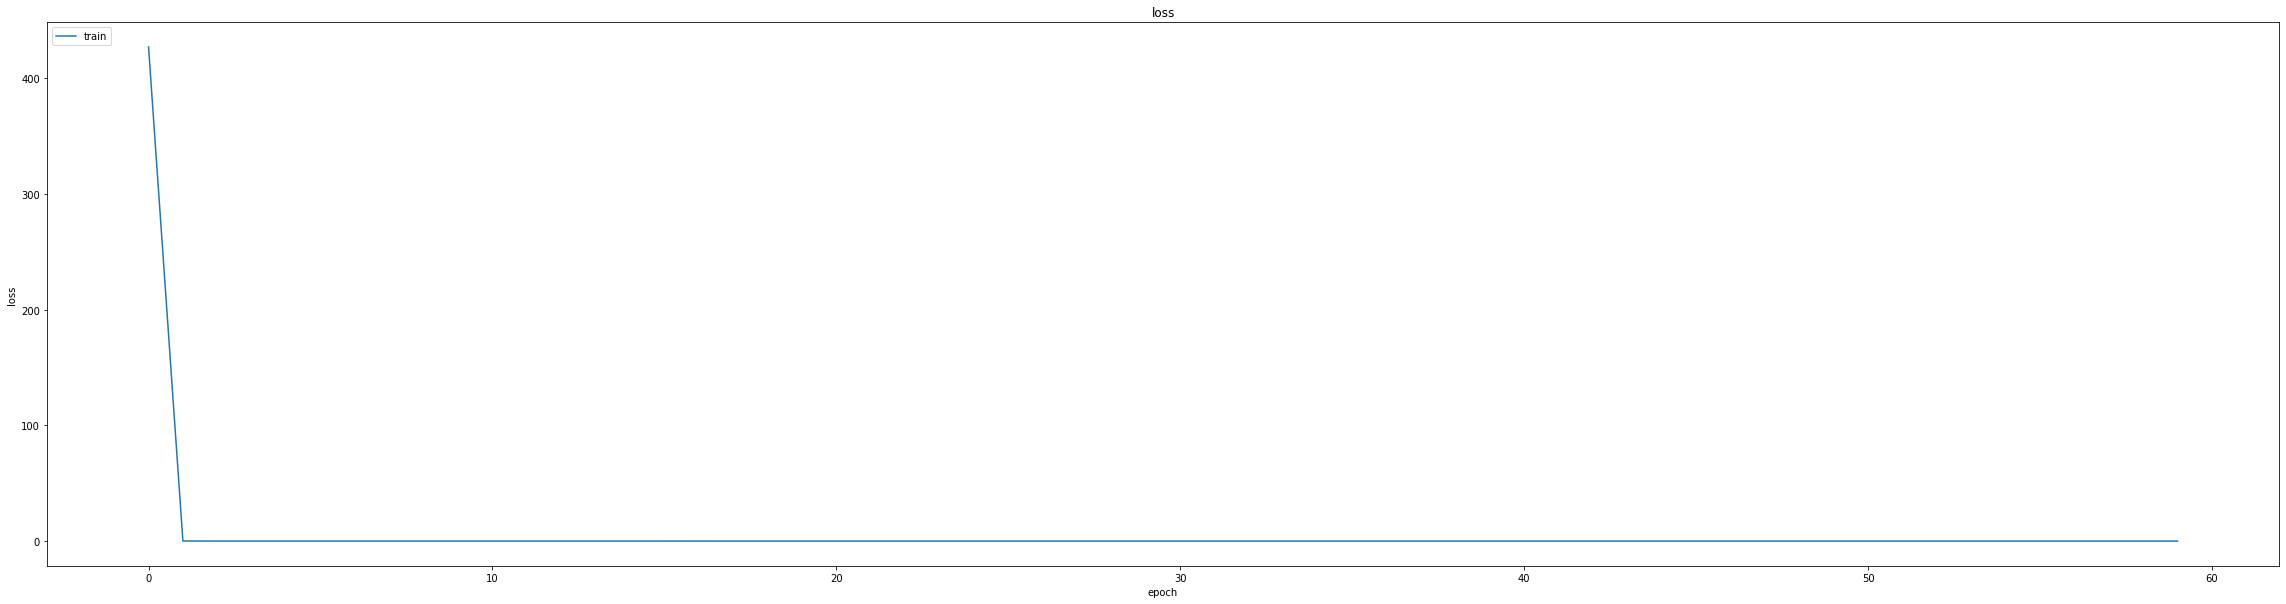

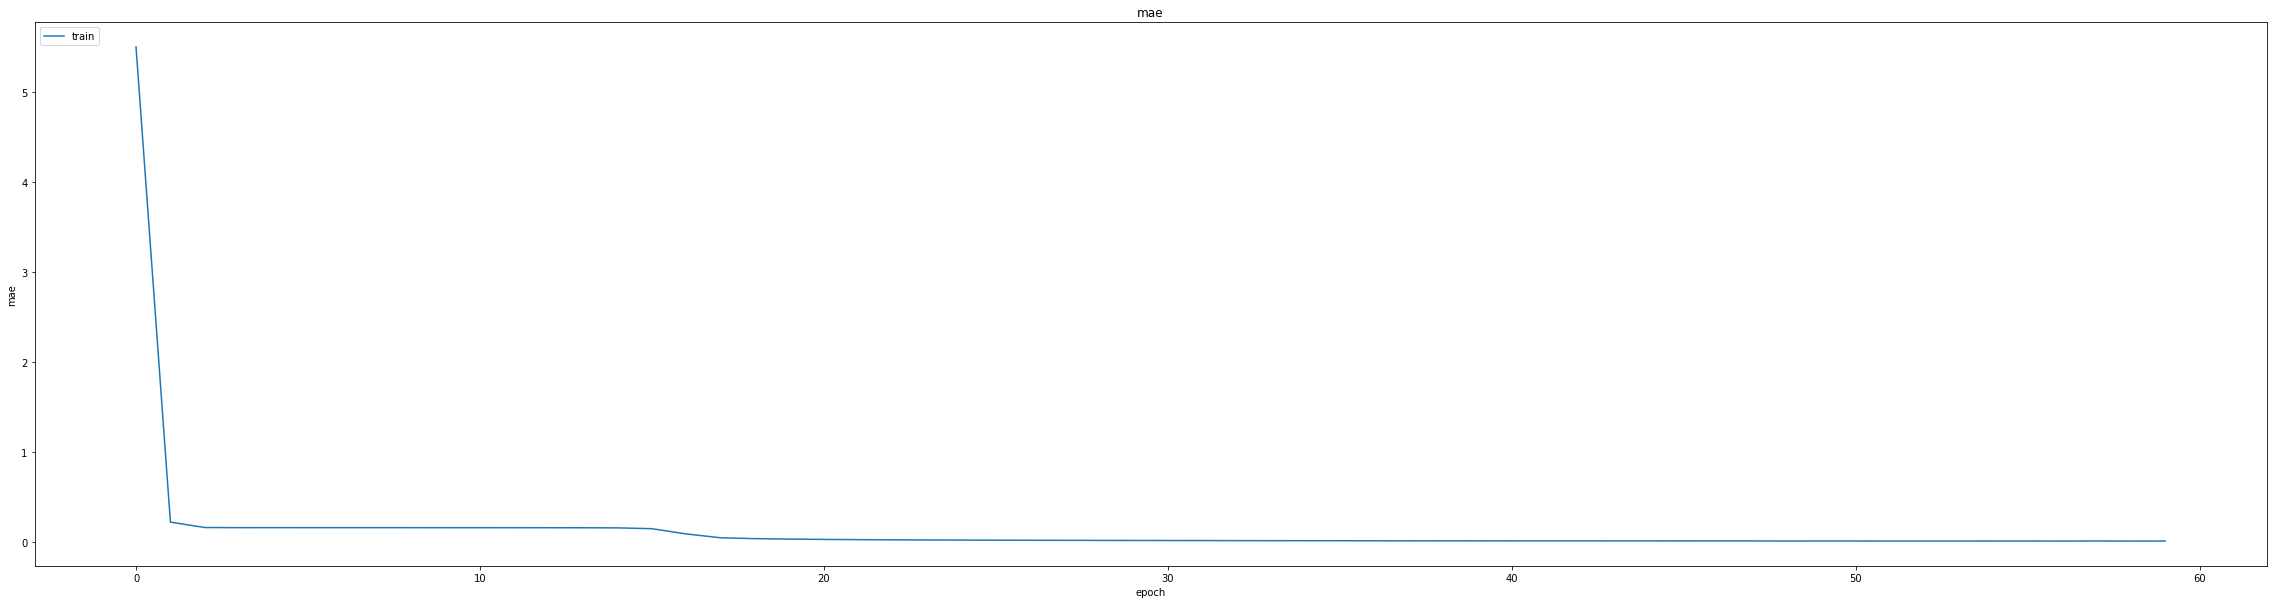

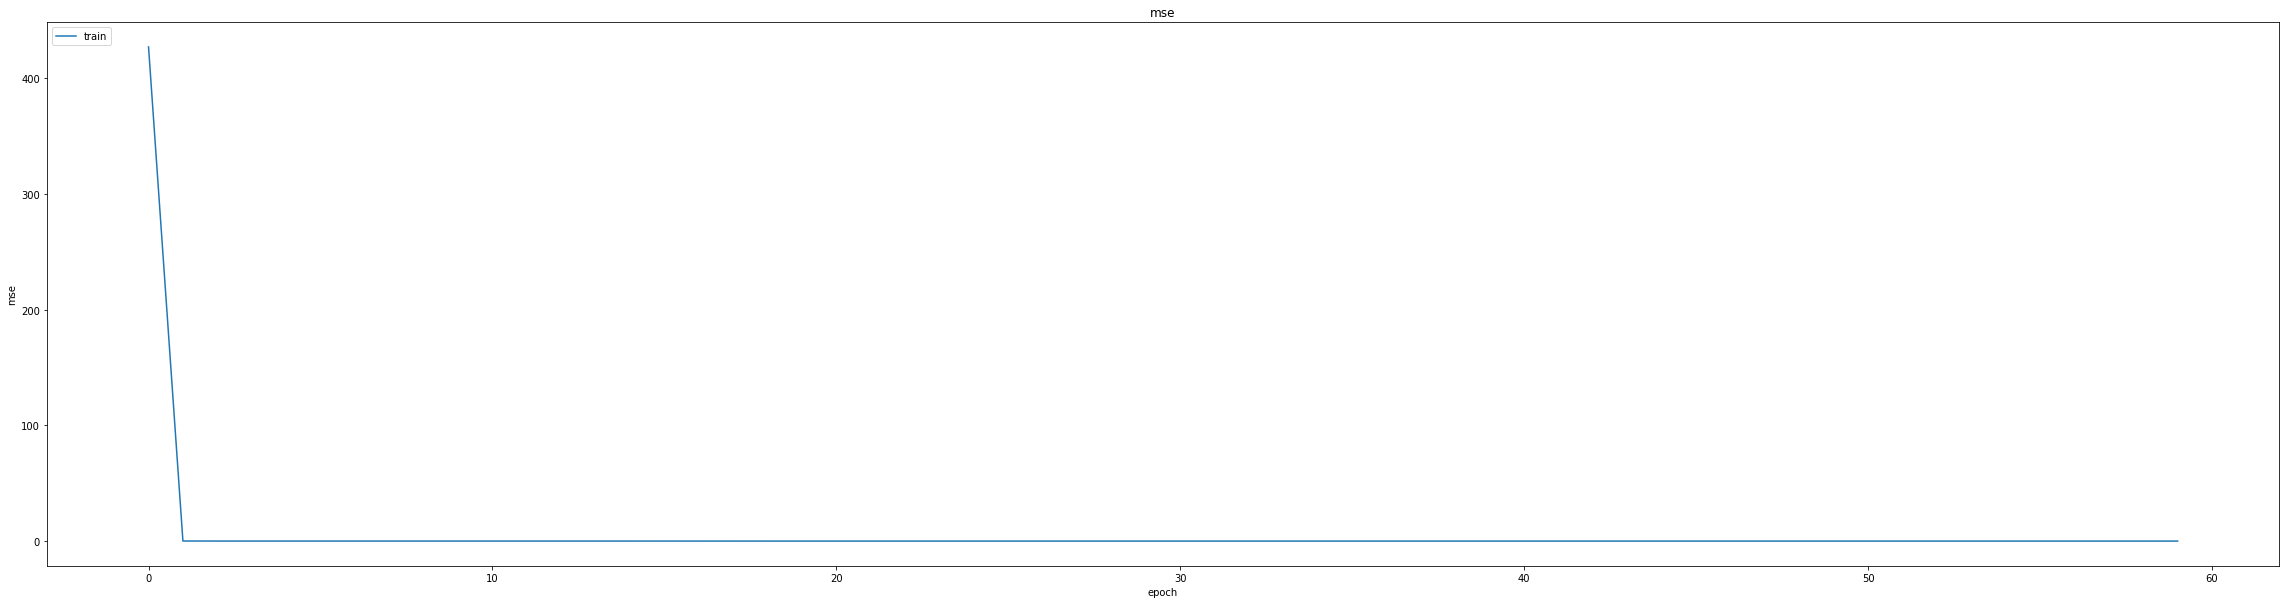

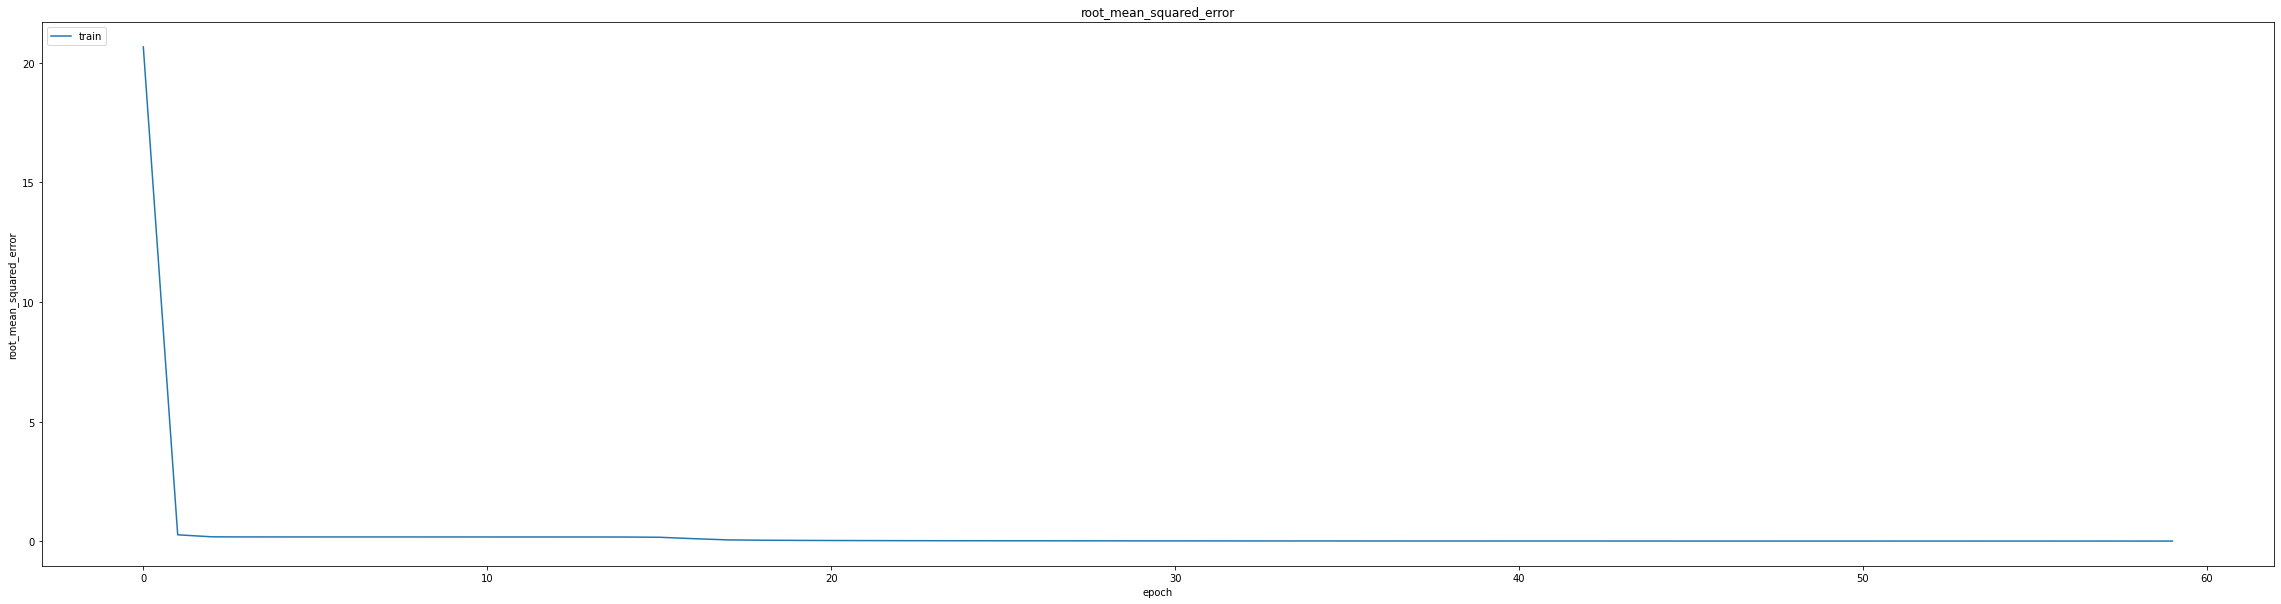

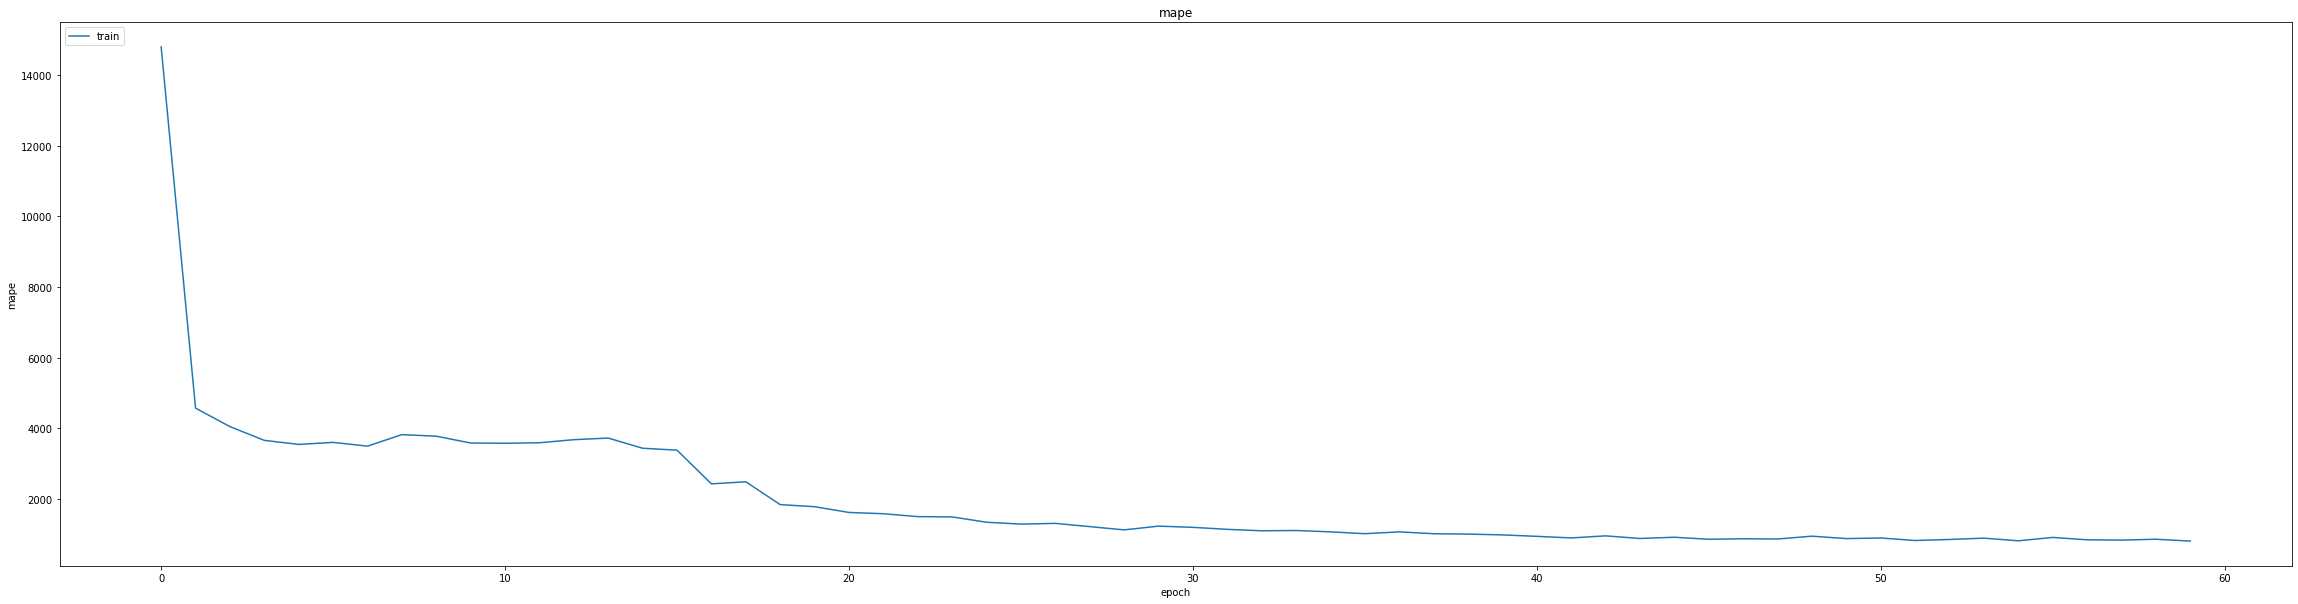

In [116]:
thesis.SummarizeHistory(history)

In [117]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.01843458227813244
0.01843458227813244
0.02745766192674637
1392/1392 [==============================] - 6s 4ms/step
0.9915999902368832


In [118]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [119]:


from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20


347/348 [============================>.] - ETA: 0s - loss: 7.4974e-04 - mae: 0.0135 - mse: 7.4974e-04 - root_mean_squared_error: 0.0274 - mape: 910.7634
Epoch 1: val_mse did not improve from 0.00075
348/348 [==============================] - 12s 18ms/step - loss: 7.4965e-04 - mae: 0.0135 - mse: 7.4965e-04 - root_mean_squared_error: 0.0274 - mape: 910.6070 - val_loss: 9.2356e-04 - val_mae: 0.0211 - val_mse: 9.2356e-04 - val_root_mean_squared_error: 0.0304 - val_mape: 2502.9053 - lr: 0.0010
Epoch 2/20
347/348 [============================>.] - ETA: 0s - loss: 1.2300e-04 - mae: 0.0080 - mse: 1.2300e-04 - root_mean_squared_error: 0.0111 - mape: 860.5987
Epoch 2: val_mse did not improve from 0.00075
348/348 [==============================] - 5s 15ms/step - loss: 1.2299e-04 - mae: 0.0080 - mse: 1.2299e-04 - root_mean_squared_error: 0.0111 - mape: 860.4509 - val_loss: 8.0550e-04 - val_mae: 0.0192 - val_mse: 8.0550e-04 - val_root_mean_squared_error: 0.0284 - val_mape: 2417.1282 - lr: 0.0010
lr

348/348 [==============================] - 15s 42ms/step - loss: 1.2238e-04 - mae: 0.0081 - mse: 1.2238e-04 - root_mean_squared_error: 0.0111 - mape: 844.1692 - val_loss: 7.2076e-04 - val_mae: 0.0178 - val_mse: 7.2076e-04 - val_root_mean_squared_error: 0.0268 - val_mape: 2348.1091 - lr: 8.1000e-04
Epoch 6/20
346/348 [============================>.] - ETA: 0s - loss: 1.1552e-04 - mae: 0.0079 - mse: 1.1552e-04 - root_mean_squared_error: 0.0107 - mape: 805.0139
Epoch 6: val_mse did not improve from 0.00072
348/348 [==============================] - 6s 17ms/step - loss: 1.1561e-04 - mae: 0.0079 - mse: 1.1561e-04 - root_mean_squared_error: 0.0108 - mape: 802.5630 - val_loss: 7.2454e-04 - val_mae: 0.0182 - val_mse: 7.2454e-04 - val_root_mean_squared_error: 0.0269 - val_mape: 2345.8669 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/20
344/348 [============================>.] - ETA: 0s - loss: 1.1400e-04 - mae: 0.0079 - mse: 1.1400e-04 - root_mean_squared_error: 0.0107 - mape: 80

348/348 [==============================] - 15s 44ms/step - loss: 1.1408e-04 - mae: 0.0079 - mse: 1.1408e-04 - root_mean_squared_error: 0.0107 - mape: 797.1456 - val_loss: 6.6407e-04 - val_mae: 0.0174 - val_mse: 6.6407e-04 - val_root_mean_squared_error: 0.0258 - val_mape: 2300.4258 - lr: 7.2900e-04
Epoch 8/20
345/348 [============================>.] - ETA: 0s - loss: 1.0748e-04 - mae: 0.0076 - mse: 1.0748e-04 - root_mean_squared_error: 0.0104 - mape: 815.1100
Epoch 8: val_mse did not improve from 0.00066
348/348 [==============================] - 5s 15ms/step - loss: 1.0773e-04 - mae: 0.0076 - mse: 1.0773e-04 - root_mean_squared_error: 0.0104 - mape: 810.2864 - val_loss: 0.0013 - val_mae: 0.0316 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0362 - val_mape: 2247.0312 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/20
345/348 [============================>.] - ETA: 0s - loss: 1.0393e-04 - mae: 0.0074 - mse: 1.0393e-04 - root_mean_squared_error: 0.0102 - mape: 782.6220
E

348/348 [==============================] - 15s 44ms/step - loss: 9.3780e-05 - mae: 0.0071 - mse: 9.3780e-05 - root_mean_squared_error: 0.0097 - mape: 777.1022 - val_loss: 5.7570e-04 - val_mae: 0.0166 - val_mse: 5.7570e-04 - val_root_mean_squared_error: 0.0240 - val_mape: 2222.8796 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/20
346/348 [============================>.] - ETA: 0s - loss: 8.6065e-05 - mae: 0.0068 - mse: 8.6065e-05 - root_mean_squared_error: 0.0093 - mape: 718.4742
Epoch 11: val_mse improved from 0.00058 to 0.00055, saving model to /content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 8.6025e-05 - mae: 0.0068 - mse: 8.6025e-05 - root_mean_squared_error: 0.0093 - mape: 716.2853 - val_loss: 5.4995e-04 - val_mae: 0.0159 - val_mse: 5.4995e-04 - val_root_mean_squared_error: 0.0235 - val_mape: 2200.9392 - lr: 5.9049e-04
Epoch 12/20
347/348 [============================>.] - ETA: 0s - loss: 8.7019e-05 - mae: 0.0069 - mse: 8.7019e-05 - root_mean_squared_error: 0.0093 - mape: 759.2031
Epoch 12: val_mse did not improve from 0.00055
348/348 [==============================] - 5s 15ms/step - loss: 8.7020e-05 - mae: 0.0069 - mse: 8.7020e-05 - root_mean_squared_error: 0.0093 - mape: 759.0728 - val_loss: 5.9826e-04 - val_mae: 0.0191 - val_mse: 5.9826e-04 - val_root_mean_squared_error: 0.0245 - val_mape: 2178.4646 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/20
347/348 [============================>.] - ETA: 0s - loss: 7.6542e-05 - mae: 0.0064 - mse: 7.6542e-05 - root_mean_squared_error: 0.0087 - mape:

348/348 [==============================] - 15s 42ms/step - loss: 5.3926e-05 - mae: 0.0054 - mse: 5.3926e-05 - root_mean_squared_error: 0.0073 - mape: 676.5958 - val_loss: 4.6785e-04 - val_mae: 0.0165 - val_mse: 4.6785e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 2094.5403 - lr: 4.3047e-04
lr changed to 0.00038742052274756136
Epoch 19/20
346/348 [============================>.] - ETA: 0s - loss: 5.1218e-05 - mae: 0.0053 - mse: 5.1218e-05 - root_mean_squared_error: 0.0072 - mape: 686.6164
Epoch 19: val_mse did not improve from 0.00047
348/348 [==============================] - 5s 15ms/step - loss: 5.1190e-05 - mae: 0.0053 - mse: 5.1190e-05 - root_mean_squared_error: 0.0072 - mape: 684.5236 - val_loss: 5.9502e-04 - val_mae: 0.0207 - val_mse: 5.9502e-04 - val_root_mean_squared_error: 0.0244 - val_mape: 2097.9775 - lr: 3.8742e-04
Epoch 20/20
346/348 [============================>.] - ETA: 0s - loss: 4.5508e-05 - mae: 0.0050 - mse: 4.5508e-05 - root_mean_squared_error: 0.0067 - mape

348/348 [==============================] - 15s 44ms/step - loss: 4.5509e-05 - mae: 0.0050 - mse: 4.5509e-05 - root_mean_squared_error: 0.0067 - mape: 733.8561 - val_loss: 4.5872e-04 - val_mae: 0.0162 - val_mse: 4.5872e-04 - val_root_mean_squared_error: 0.0214 - val_mape: 2071.5210 - lr: 3.8742e-04


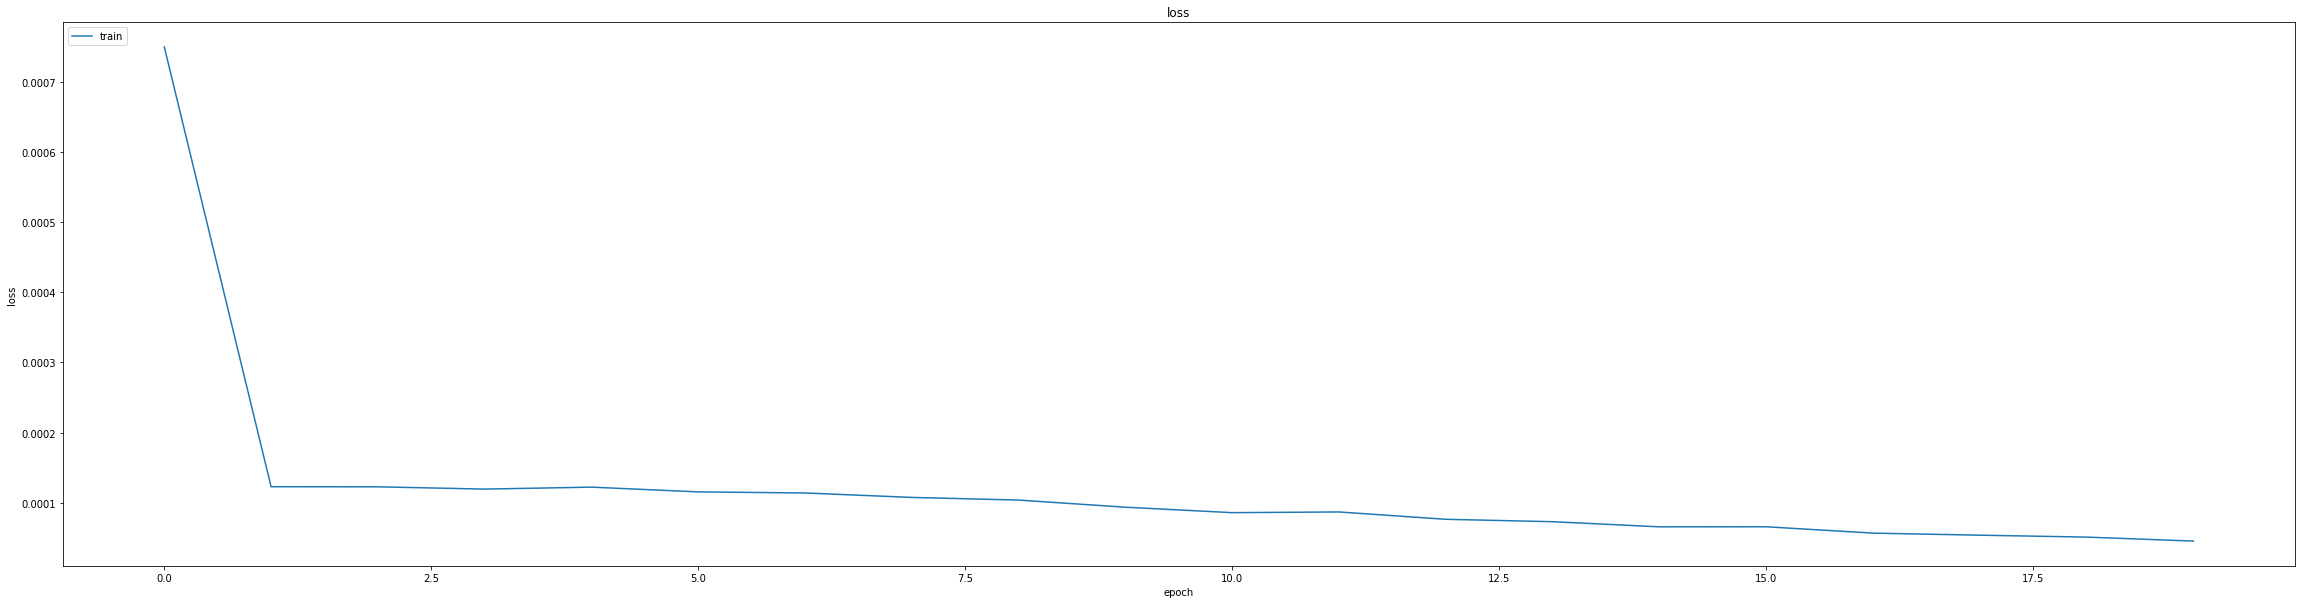

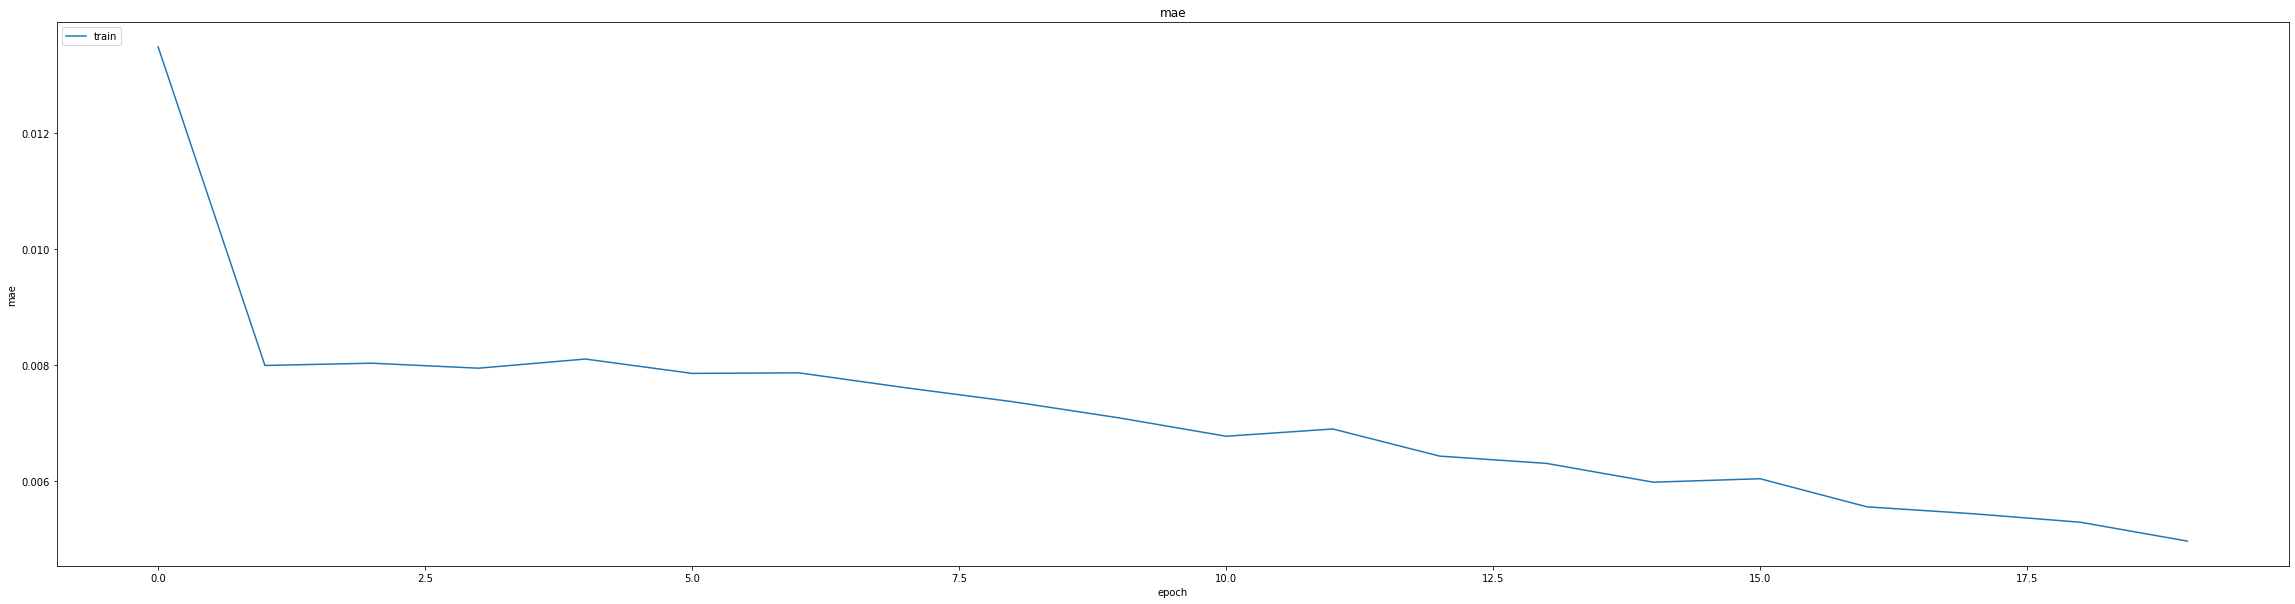

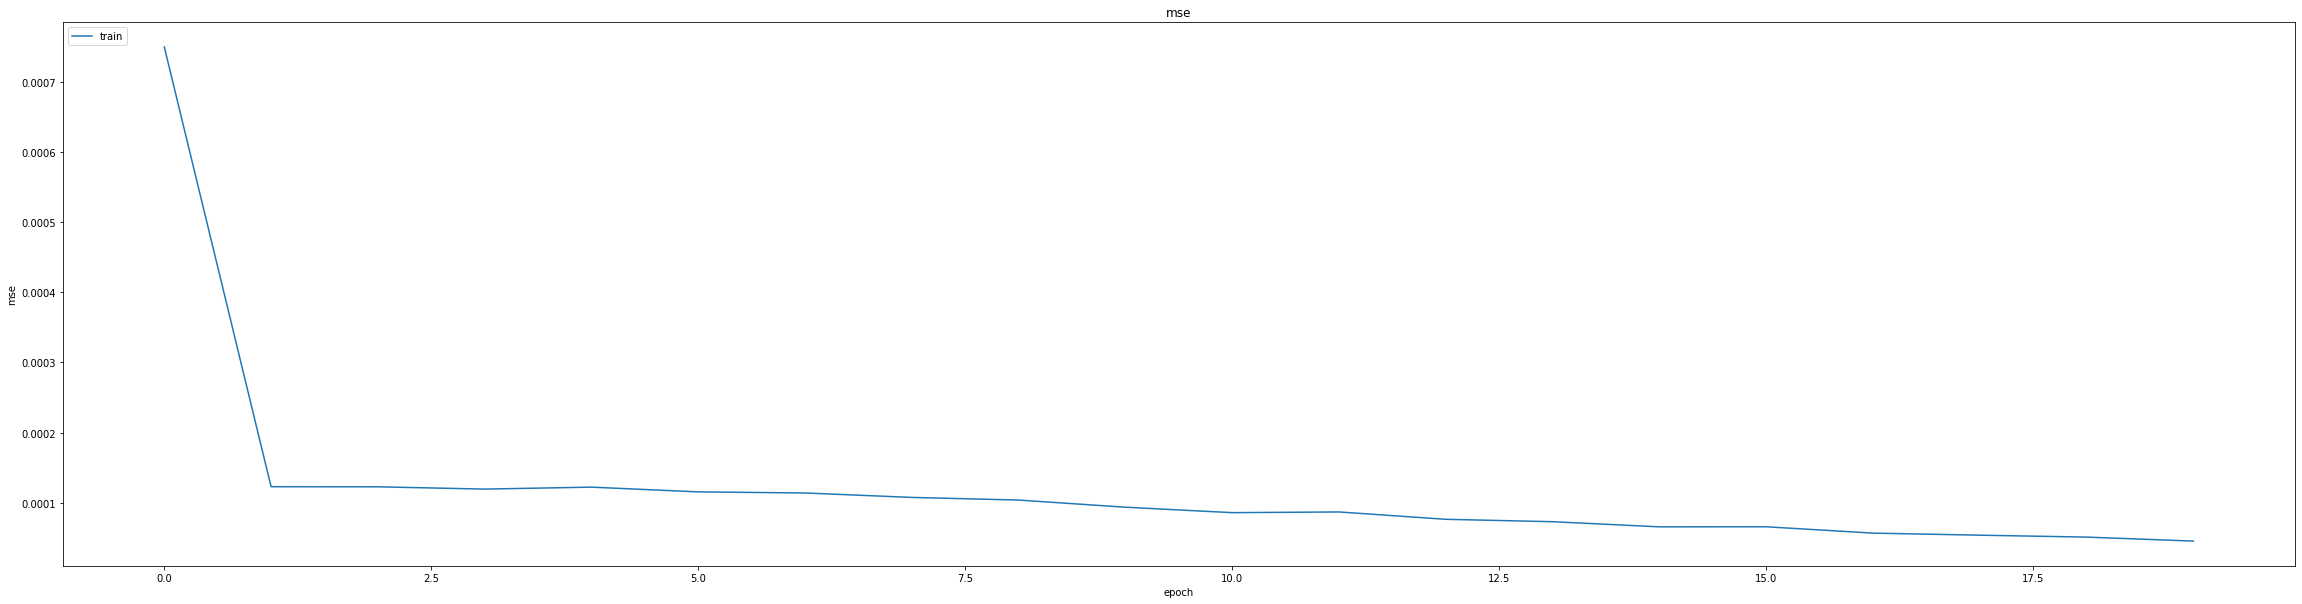

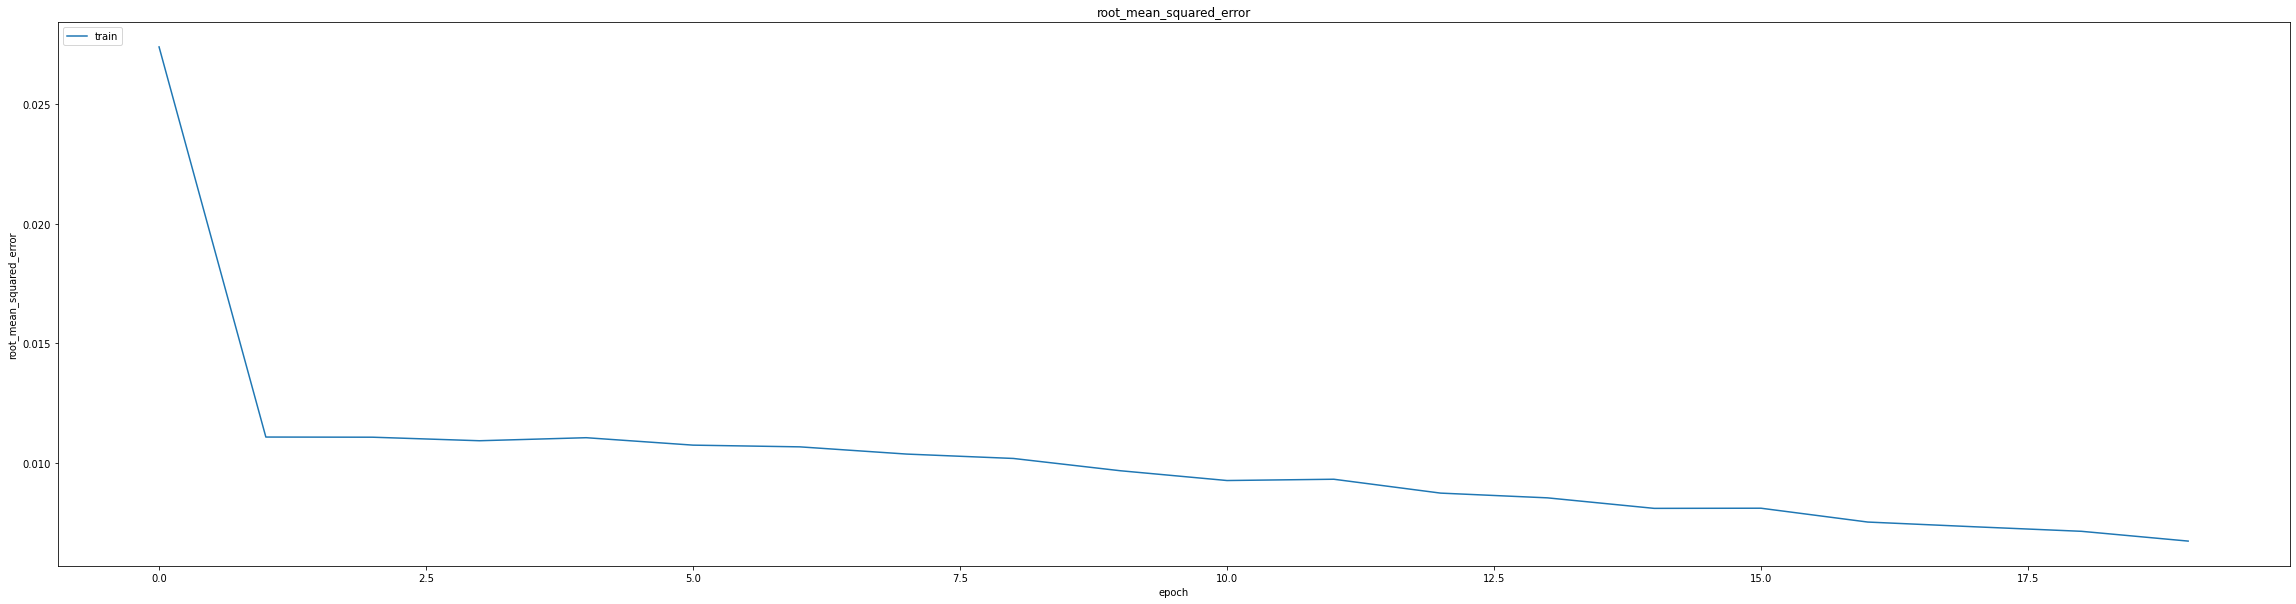

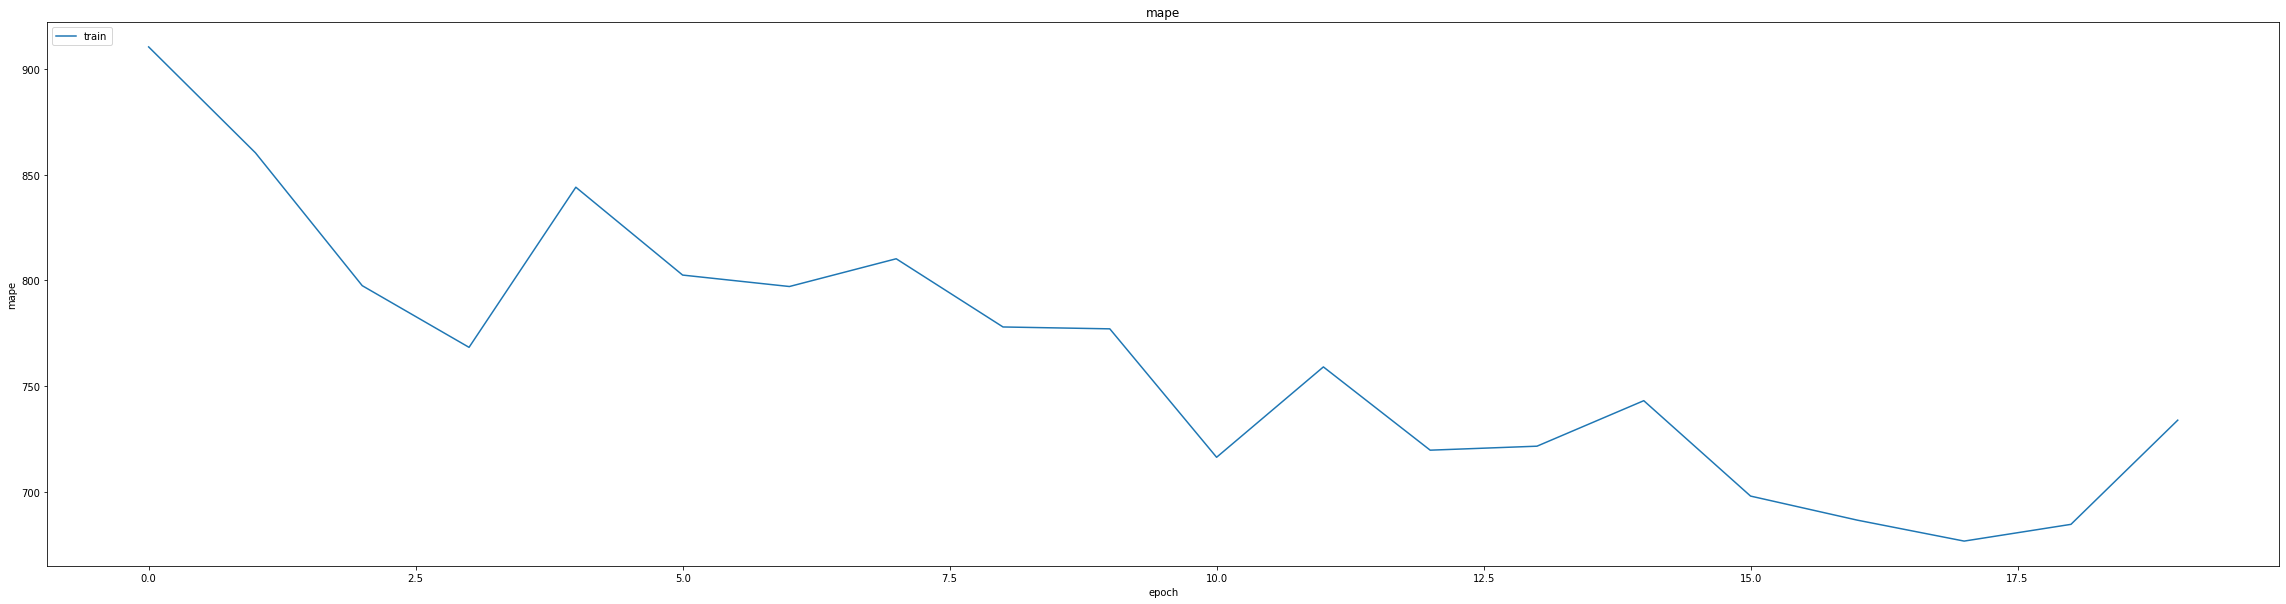

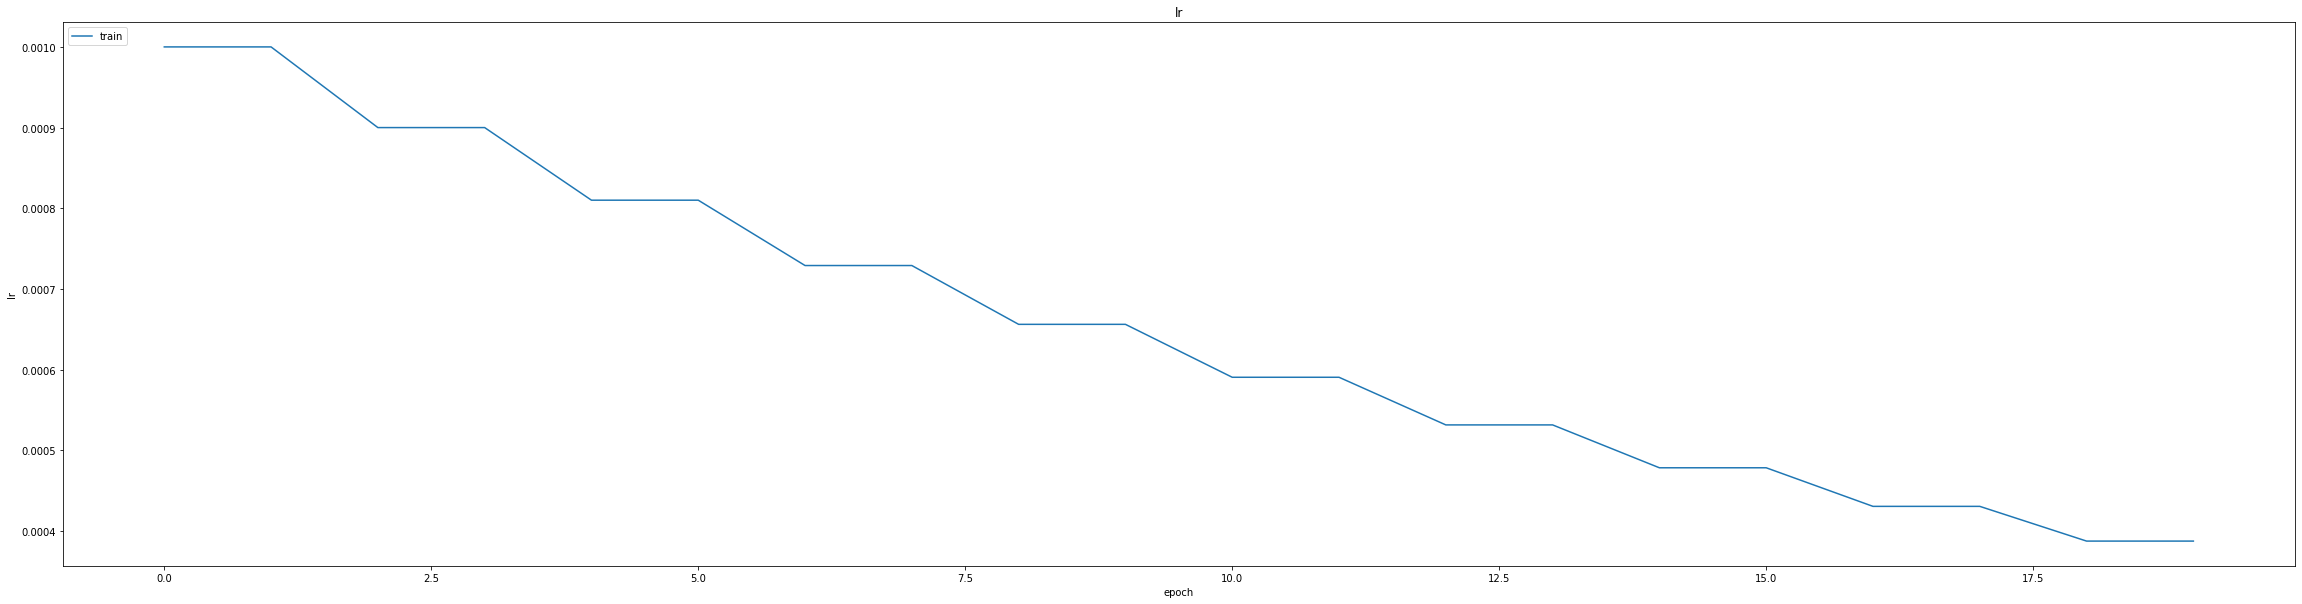

In [120]:
thesis.SummarizeHistory(history)

In [121]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.01594621129333973
0.01594621129333973
0.021417809650301933
1392/1392 [==============================] - 6s 4ms/step
0.995038754426411


In [122]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_5min_GRU(60-40)")

1392/1392 [==============================] - 5s 4ms/step


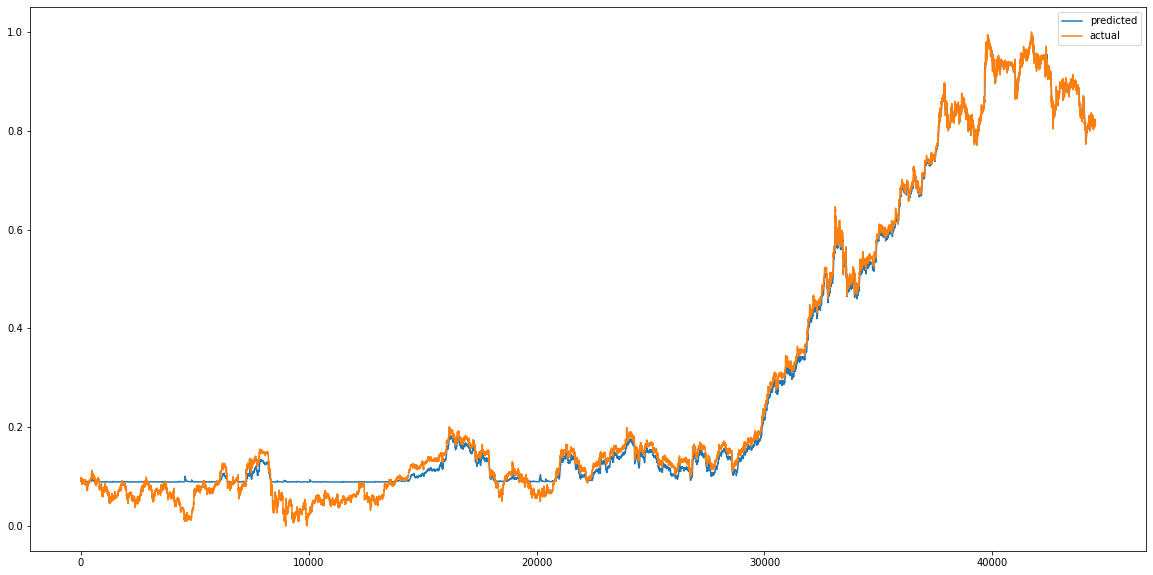

In [123]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


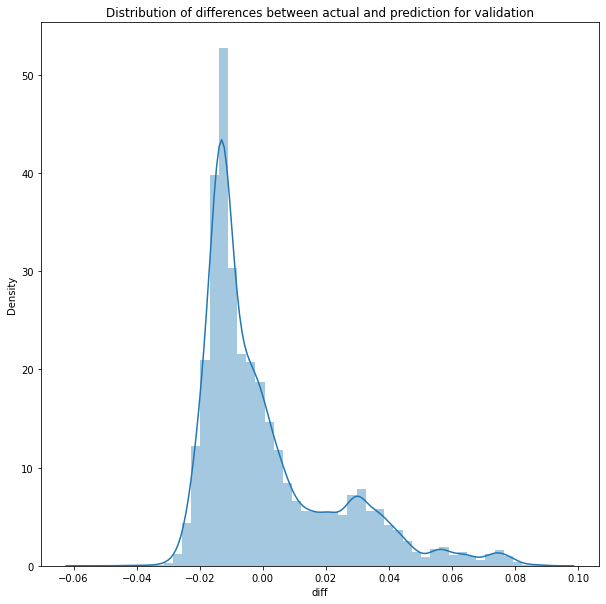

In [124]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1392/1392 [==============================] - 6s 4ms/step


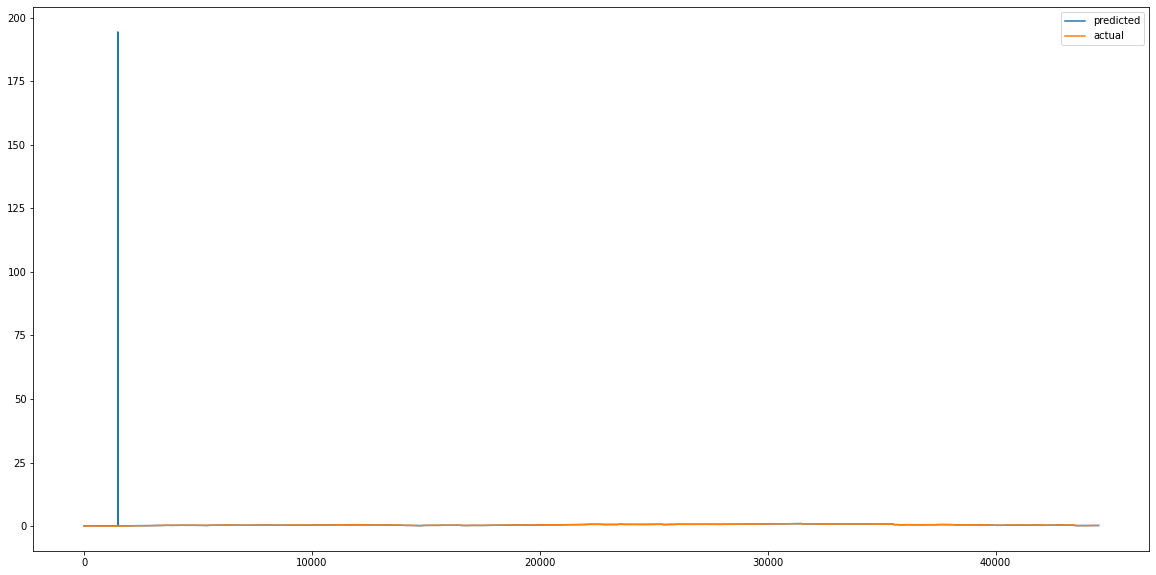

In [125]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


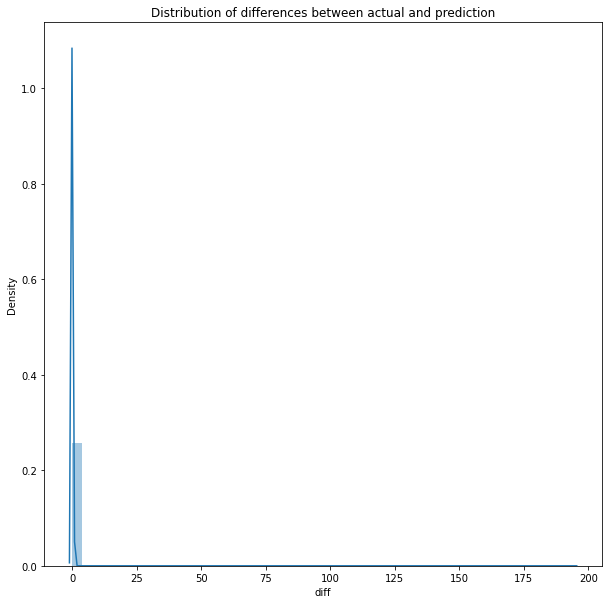

In [126]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [127]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  8.566592102405744
RMSE :  2.926874117963693
MAE :  0.057874740885461705
1392/1392 [==============================] - 5s 4ms/step
R2_Score  : -178.520794559479


count    44524.000000
mean         0.052590
std          2.926434
min         -0.077101
25%         -0.003059
50%          0.002395
75%          0.006535
max        194.432778
Name: diff, dtype: float64